# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 44026 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    0 of 44026) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 44026) |              | Elapsed Time: 0:00:25 ETA: 1 day, 7:20:59

  0% (   28 of 44026) |                    | Elapsed Time: 0:00:25 ETA: 11:16:49

  0% (   46 of 44026) |                     | Elapsed Time: 0:00:26 ETA: 6:55:04

  0% (   63 of 44026) |                     | Elapsed Time: 0:00:26 ETA: 5:05:24

  0% (   80 of 44026) |                     | Elapsed Time: 0:00:26 ETA: 0:08:40

  0% (   97 of 44026) |                     | Elapsed Time: 0:00:26 ETA: 0:08:55

  0% (  113 of 44026) |                     | Elapsed Time: 0:00:26 ETA: 0:09:08

  0% (  129 of 44026) |                     | Elapsed Time: 0:00:27 ETA: 0:09:22

  0% (  145 of 44026) |                     | Elapsed Time: 0:00:27 ETA: 0:09:22

  0% (  161 of 44026) |                     | Elapsed Time: 0:00:27 ETA: 0:09:28

  0% (  177 of 44026) |                     | Elapsed Time: 0:00:27 ETA: 0:09:35

  0% (  193 of 44026) |                     | Elapsed Time: 0:00:27 ETA: 0:09:42

  0% (  209 of 44026) |                     | Elapsed Time: 0:00:28 ETA: 0:09:47

  0% (  225 of 44026) |                     | Elapsed Time: 0:00:28 ETA: 0:09:50

  0% (  241 of 44026) |                     | Elapsed Time: 0:00:28 ETA: 0:09:50

  0% (  257 of 44026) |                     | Elapsed Time: 0:00:28 ETA: 0:09:46

  0% (  273 of 44026) |                     | Elapsed Time: 0:00:29 ETA: 0:09:43

  0% (  289 of 44026) |                     | Elapsed Time: 0:00:29 ETA: 0:09:44

  0% (  305 of 44026) |                     | Elapsed Time: 0:00:29 ETA: 0:09:40

  0% (  323 of 44026) |                     | Elapsed Time: 0:00:29 ETA: 0:09:27

  0% (  339 of 44026) |                     | Elapsed Time: 0:00:29 ETA: 0:09:23

  0% (  355 of 44026) |                     | Elapsed Time: 0:00:30 ETA: 0:09:14

  0% (  372 of 44026) |                     | Elapsed Time: 0:00:30 ETA: 0:09:11

  0% (  388 of 44026) |                     | Elapsed Time: 0:00:30 ETA: 0:09:15

  0% (  403 of 44026) |                     | Elapsed Time: 0:00:30 ETA: 0:09:31

  0% (  419 of 44026) |                     | Elapsed Time: 0:00:30 ETA: 0:09:33

  0% (  435 of 44026) |                     | Elapsed Time: 0:00:31 ETA: 0:09:35

  1% (  451 of 44026) |                     | Elapsed Time: 0:00:31 ETA: 0:09:40

  1% (  467 of 44026) |                     | Elapsed Time: 0:00:31 ETA: 0:09:36

  1% (  484 of 44026) |                     | Elapsed Time: 0:00:31 ETA: 0:09:27

  1% (  502 of 44026) |                     | Elapsed Time: 0:00:31 ETA: 0:09:15

  1% (  519 of 44026) |                     | Elapsed Time: 0:00:32 ETA: 0:09:13

  1% (  535 of 44026) |                     | Elapsed Time: 0:00:32 ETA: 0:09:11

  1% (  551 of 44026) |                     | Elapsed Time: 0:00:32 ETA: 0:09:11

  1% (  567 of 44026) |                     | Elapsed Time: 0:00:32 ETA: 0:09:17

  1% (  583 of 44026) |                     | Elapsed Time: 0:00:33 ETA: 0:09:25

  1% (  599 of 44026) |                     | Elapsed Time: 0:00:33 ETA: 0:09:18

  1% (  615 of 44026) |                     | Elapsed Time: 0:00:33 ETA: 0:09:19

  1% (  631 of 44026) |                     | Elapsed Time: 0:00:33 ETA: 0:09:18

  1% (  648 of 44026) |                     | Elapsed Time: 0:00:33 ETA: 0:09:16

  1% (  665 of 44026) |                     | Elapsed Time: 0:00:34 ETA: 0:09:13

  1% (  682 of 44026) |                     | Elapsed Time: 0:00:34 ETA: 0:09:10

  1% (  698 of 44026) |                     | Elapsed Time: 0:00:34 ETA: 0:09:06

  1% (  714 of 44026) |                     | Elapsed Time: 0:00:34 ETA: 0:09:05

  1% (  732 of 44026) |                     | Elapsed Time: 0:00:34 ETA: 0:09:02

  1% (  749 of 44026) |                     | Elapsed Time: 0:00:35 ETA: 0:09:04

  1% (  766 of 44026) |                     | Elapsed Time: 0:00:35 ETA: 0:09:00

  1% (  784 of 44026) |                     | Elapsed Time: 0:00:35 ETA: 0:08:55

  1% (  802 of 44026) |                     | Elapsed Time: 0:00:35 ETA: 0:08:49

  1% (  820 of 44026) |                     | Elapsed Time: 0:00:35 ETA: 0:08:47

  1% (  836 of 44026) |                     | Elapsed Time: 0:00:36 ETA: 0:08:46

  1% (  854 of 44026) |                     | Elapsed Time: 0:00:36 ETA: 0:08:47

  1% (  870 of 44026) |                     | Elapsed Time: 0:00:36 ETA: 0:08:52

  2% (  887 of 44026) |                     | Elapsed Time: 0:00:36 ETA: 0:08:57

  2% (  904 of 44026) |                     | Elapsed Time: 0:00:37 ETA: 0:08:57

  2% (  921 of 44026) |                     | Elapsed Time: 0:00:37 ETA: 0:08:54

  2% (  939 of 44026) |                     | Elapsed Time: 0:00:37 ETA: 0:08:52

  2% (  956 of 44026) |                     | Elapsed Time: 0:00:37 ETA: 0:08:50

  2% (  973 of 44026) |                     | Elapsed Time: 0:00:37 ETA: 0:08:51

  2% (  990 of 44026) |                     | Elapsed Time: 0:00:38 ETA: 0:08:51

  2% ( 1008 of 44026) |                     | Elapsed Time: 0:00:38 ETA: 0:08:51

  2% ( 1024 of 44026) |                     | Elapsed Time: 0:00:38 ETA: 0:08:55

  2% ( 1042 of 44026) |                     | Elapsed Time: 0:00:38 ETA: 0:08:49

  2% ( 1059 of 44026) |                     | Elapsed Time: 0:00:38 ETA: 0:08:47

  2% ( 1077 of 44026) |                     | Elapsed Time: 0:00:39 ETA: 0:08:47

  2% ( 1101 of 44026) |                     | Elapsed Time: 0:00:39 ETA: 0:08:47

  2% ( 1119 of 44026) |                     | Elapsed Time: 0:00:39 ETA: 0:08:45

  2% ( 1136 of 44026) |                     | Elapsed Time: 0:00:39 ETA: 0:08:51

  2% ( 1154 of 44026) |                     | Elapsed Time: 0:00:40 ETA: 0:08:49

  2% ( 1170 of 44026) |                     | Elapsed Time: 0:00:40 ETA: 0:08:52

  2% ( 1188 of 44026) |                     | Elapsed Time: 0:00:40 ETA: 0:08:54

  2% ( 1205 of 44026) |                     | Elapsed Time: 0:00:40 ETA: 0:08:50

  2% ( 1222 of 44026) |                     | Elapsed Time: 0:00:40 ETA: 0:08:49

  2% ( 1240 of 44026) |                     | Elapsed Time: 0:00:41 ETA: 0:08:43

  2% ( 1257 of 44026) |                     | Elapsed Time: 0:00:41 ETA: 0:08:42

  2% ( 1274 of 44026) |                     | Elapsed Time: 0:00:41 ETA: 0:08:42

  2% ( 1292 of 44026) |                     | Elapsed Time: 0:00:41 ETA: 0:08:38

  2% ( 1309 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:08:46

  3% ( 1326 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:08:45

  3% ( 1344 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:08:46

  3% ( 1362 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:08:42

  3% ( 1380 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:08:36

  3% ( 1398 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:08:27

  3% ( 1416 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:08:25

  3% ( 1434 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:08:25

  3% ( 1452 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:08:28

  3% ( 1467 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:08:49

  3% ( 1484 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:09:00

  3% ( 1499 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:09:20

  3% ( 1514 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:09:38

  3% ( 1530 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:09:51

  3% ( 1546 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:09:50

  3% ( 1562 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:10:00

  3% ( 1576 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:10:06

  3% ( 1590 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:10:10

  3% ( 1604 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:10:17

  3% ( 1618 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:10:25

  3% ( 1632 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:10:29

  3% ( 1651 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:10:29

  3% ( 1665 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:10:34

  3% ( 1679 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:10:35

  3% ( 1693 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:10:34

  3% ( 1707 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:10:32

  3% ( 1721 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:10:29

  3% ( 1735 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:10:24

  3% ( 1749 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:10:23

  4% ( 1763 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:10:20

  4% ( 1777 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:10:21

  4% ( 1792 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:10:18

  4% ( 1806 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:10:19

  4% ( 1820 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:10:19

  4% ( 1835 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:10:21

  4% ( 1850 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:10:18

  4% ( 1865 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:10:10

  4% ( 1879 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:10:10

  4% ( 1893 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:10:03

  4% ( 1907 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:10:06

  4% ( 1922 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:10:11

  4% ( 1936 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:10:14

  4% ( 1953 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:10:00

  4% ( 1969 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:09:47

  4% ( 1985 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:09:39

  4% ( 2001 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:09:19

  4% ( 2015 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:09:29

  4% ( 2032 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:09:25

  4% ( 2048 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:09:22

  4% ( 2066 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:09:12

  4% ( 2084 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:08:54

  4% ( 2100 of 44026) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:48

  4% ( 2116 of 44026) |#                    | Elapsed Time: 0:00:53 ETA: 0:08:54

  4% ( 2132 of 44026) |#                    | Elapsed Time: 0:00:53 ETA: 0:09:05

  4% ( 2148 of 44026) |#                    | Elapsed Time: 0:00:53 ETA: 0:09:09

  4% ( 2164 of 44026) |#                    | Elapsed Time: 0:00:53 ETA: 0:09:08

  4% ( 2180 of 44026) |#                    | Elapsed Time: 0:00:53 ETA: 0:09:05

  5% ( 2202 of 44026) |#                    | Elapsed Time: 0:00:54 ETA: 0:09:06

  5% ( 2218 of 44026) |#                    | Elapsed Time: 0:00:54 ETA: 0:09:07

  5% ( 2234 of 44026) |#                    | Elapsed Time: 0:00:54 ETA: 0:09:10

  5% ( 2250 of 44026) |#                    | Elapsed Time: 0:00:54 ETA: 0:09:11

  5% ( 2266 of 44026) |#                    | Elapsed Time: 0:00:55 ETA: 0:09:10

  5% ( 2282 of 44026) |#                    | Elapsed Time: 0:00:55 ETA: 0:09:06

  5% ( 2298 of 44026) |#                    | Elapsed Time: 0:00:55 ETA: 0:09:00

  5% ( 2314 of 44026) |#                    | Elapsed Time: 0:00:55 ETA: 0:08:58

  5% ( 2329 of 44026) |#                    | Elapsed Time: 0:00:55 ETA: 0:09:11

  5% ( 2345 of 44026) |#                    | Elapsed Time: 0:00:56 ETA: 0:09:10

  5% ( 2361 of 44026) |#                    | Elapsed Time: 0:00:56 ETA: 0:09:11

  5% ( 2377 of 44026) |#                    | Elapsed Time: 0:00:56 ETA: 0:09:08

  5% ( 2394 of 44026) |#                    | Elapsed Time: 0:00:56 ETA: 0:09:02

  5% ( 2412 of 44026) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:45

  5% ( 2430 of 44026) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:40

  5% ( 2447 of 44026) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:39

  5% ( 2464 of 44026) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:39

  5% ( 2481 of 44026) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:36

  5% ( 2497 of 44026) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:44

  5% ( 2514 of 44026) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:47

  5% ( 2531 of 44026) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:48

  5% ( 2547 of 44026) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:57

  5% ( 2564 of 44026) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:50

  5% ( 2582 of 44026) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:39

  5% ( 2598 of 44026) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:39

  5% ( 2615 of 44026) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:38

  5% ( 2631 of 44026) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:36

  6% ( 2648 of 44026) |#                    | Elapsed Time: 0:01:00 ETA: 0:08:41

  6% ( 2664 of 44026) |#                    | Elapsed Time: 0:01:00 ETA: 0:08:44

  6% ( 2680 of 44026) |#                    | Elapsed Time: 0:01:00 ETA: 0:08:46

  6% ( 2696 of 44026) |#                    | Elapsed Time: 0:01:00 ETA: 0:08:48

  6% ( 2712 of 44026) |#                    | Elapsed Time: 0:01:00 ETA: 0:08:46

  6% ( 2729 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:08:45

  6% ( 2752 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:08:44

  6% ( 2770 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:08:39

  6% ( 2786 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:08:35

  6% ( 2803 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:08:33

  6% ( 2821 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:08:30

  6% ( 2838 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:08:32

  6% ( 2855 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:08:33

  6% ( 2873 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:08:28

  6% ( 2891 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:08:28

  6% ( 2908 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:16:20

  6% ( 2925 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:16:13

  6% ( 2941 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:16:31

  6% ( 2957 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:16:52

  6% ( 2973 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:54

  6% ( 2989 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:57

  6% ( 3005 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:09:00

  6% ( 3022 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:54

  6% ( 3038 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:46

  6% ( 3056 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:08:38

  6% ( 3072 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:08:34

  7% ( 3088 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:08:34

  7% ( 3105 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:08:31

  7% ( 3121 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:08:32

  7% ( 3138 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:08:32

  7% ( 3154 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:08:30

  7% ( 3172 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:08:28

  7% ( 3189 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:08:29

  7% ( 3207 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:08:25

  7% ( 3225 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:08:22

  7% ( 3242 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:08:23

  7% ( 3260 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:08:19

  7% ( 3278 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:08:19

  7% ( 3302 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:08:23

  7% ( 3320 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:08:22

  7% ( 3337 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:08:21

  7% ( 3355 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:08:22

  7% ( 3371 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:08:25

  7% ( 3388 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:08:30

  7% ( 3406 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:08:27

  7% ( 3423 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:08:33

  7% ( 3440 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:08:32

  7% ( 3456 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:33

  7% ( 3472 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:34

  7% ( 3488 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:33

  7% ( 3504 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:34

  7% ( 3520 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:33

  8% ( 3537 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:32

  8% ( 3553 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:32

  8% ( 3570 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:30

  8% ( 3587 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:28

  8% ( 3603 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:36

  8% ( 3619 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:42

  8% ( 3635 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:54

  8% ( 3649 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:09:17

  8% ( 3664 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:09:34

  8% ( 3679 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:09:45

  8% ( 3695 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:09:41

  8% ( 3712 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:09:19

  8% ( 3730 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:08:52

  8% ( 3748 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:08:22

  8% ( 3764 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:16

  8% ( 3778 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:24

  8% ( 3792 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:48

  8% ( 3808 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:09:15

  8% ( 3823 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:09:45

  8% ( 3837 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:09:46

  8% ( 3853 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:09:39

  8% ( 3868 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:09:38

  8% ( 3883 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:09:39

  8% ( 3898 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:09:32

  8% ( 3913 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:09:31

  8% ( 3928 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:09:35

  8% ( 3942 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:09:36

  8% ( 3958 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:09:37

  9% ( 3973 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:35

  9% ( 3988 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:36

  9% ( 4004 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:30

  9% ( 4020 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:30

  9% ( 4034 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:29

  9% ( 4049 of 44026) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:27

  9% ( 4065 of 44026) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:25

  9% ( 4081 of 44026) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:22

  9% ( 4097 of 44026) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:19

  9% ( 4112 of 44026) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:22

  9% ( 4128 of 44026) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:24

  9% ( 4144 of 44026) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:13

  9% ( 4160 of 44026) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:08

  9% ( 4174 of 44026) |#                    | Elapsed Time: 0:01:20 ETA: 0:09:08

  9% ( 4187 of 44026) |#                    | Elapsed Time: 0:01:21 ETA: 0:09:21

  9% ( 4201 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:09:45

  9% ( 4217 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:09:56

  9% ( 4231 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:10:13

  9% ( 4245 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:10:02

  9% ( 4260 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:09:53

  9% ( 4274 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:09:57

  9% ( 4288 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:10:05

  9% ( 4303 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:10:02

  9% ( 4319 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:09:46

  9% ( 4335 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:09:25

  9% ( 4351 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:58

  9% ( 4367 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:39

  9% ( 4384 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:33

 10% ( 4403 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:26

 10% ( 4421 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:20

 10% ( 4437 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:22

 10% ( 4453 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:16

 10% ( 4469 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:30

 10% ( 4485 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:41

 10% ( 4501 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:48

 10% ( 4517 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:48

 10% ( 4533 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:46

 10% ( 4549 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:45

 10% ( 4565 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:44

 10% ( 4581 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:45

 10% ( 4597 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:44

 10% ( 4613 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:44

 10% ( 4629 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:43

 10% ( 4644 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:52

 10% ( 4659 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:54

 10% ( 4675 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:53

 10% ( 4690 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:59

 10% ( 4706 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:57

 10% ( 4724 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:35

 10% ( 4742 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:24

 10% ( 4759 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:13

 10% ( 4777 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:53

 10% ( 4794 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:49

 10% ( 4812 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:44

 10% ( 4830 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:38

 11% ( 4848 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:36

 11% ( 4866 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:32

 11% ( 4882 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:44

 11% ( 4898 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:59

 11% ( 4913 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:18

 11% ( 4929 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:08:34

 11% ( 4945 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:50

 11% ( 4961 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:41

 11% ( 4977 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:41

 11% ( 4993 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:32

 11% ( 5009 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:31

 11% ( 5025 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:31

 11% ( 5041 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:28

 11% ( 5057 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:30

 11% ( 5073 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:08:29

 11% ( 5089 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:32

 11% ( 5105 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:34

 11% ( 5121 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:34

 11% ( 5137 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:34

 11% ( 5153 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:32

 11% ( 5169 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:34

 11% ( 5185 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:31

 11% ( 5201 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:29

 11% ( 5217 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:25

 11% ( 5233 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:08:24

 11% ( 5249 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:22

 11% ( 5265 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:21

 11% ( 5281 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:22

 12% ( 5297 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:21

 12% ( 5313 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:22

 12% ( 5329 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:20

 12% ( 5345 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:23

 12% ( 5361 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:22

 12% ( 5377 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:21

 12% ( 5393 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:24

 12% ( 5409 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:24

 12% ( 5425 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:23

 12% ( 5441 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:23

 12% ( 5457 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:21

 12% ( 5473 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:25

 12% ( 5489 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:23

 12% ( 5512 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:21

 12% ( 5528 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:19

 12% ( 5544 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:08:15

 12% ( 5560 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:13

 12% ( 5577 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:10

 12% ( 5593 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:11

 12% ( 5609 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:11

 12% ( 5625 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:08:12

 12% ( 5641 of 44026) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:16

 12% ( 5658 of 44026) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:13

 12% ( 5674 of 44026) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:13

 12% ( 5690 of 44026) |##                   | Elapsed Time: 0:01:40 ETA: 0:08:11

 12% ( 5706 of 44026) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:14

 12% ( 5722 of 44026) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:18

 13% ( 5738 of 44026) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:20

 13% ( 5754 of 44026) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:21

 13% ( 5770 of 44026) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:17

 13% ( 5786 of 44026) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:15

 13% ( 5802 of 44026) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:11

 13% ( 5818 of 44026) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:10

 13% ( 5834 of 44026) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:09

 13% ( 5850 of 44026) |##                   | Elapsed Time: 0:01:42 ETA: 0:08:09

 13% ( 5866 of 44026) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:13

 13% ( 5882 of 44026) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:12

 13% ( 5898 of 44026) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:17

 13% ( 5914 of 44026) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:16

 13% ( 5930 of 44026) |##                   | Elapsed Time: 0:01:43 ETA: 0:08:15

 13% ( 5946 of 44026) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:14

 13% ( 5962 of 44026) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:13

 13% ( 5978 of 44026) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:10

 13% ( 5994 of 44026) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:09

 13% ( 6010 of 44026) |##                   | Elapsed Time: 0:01:44 ETA: 0:08:13

 13% ( 6026 of 44026) |##                   | Elapsed Time: 0:01:45 ETA: 0:08:14

 13% ( 6042 of 44026) |##                   | Elapsed Time: 0:01:45 ETA: 0:08:14

 13% ( 6062 of 44026) |##                   | Elapsed Time: 0:01:45 ETA: 0:08:13

 13% ( 6078 of 44026) |##                   | Elapsed Time: 0:01:45 ETA: 0:08:10

 13% ( 6094 of 44026) |##                   | Elapsed Time: 0:01:46 ETA: 0:08:11

 13% ( 6111 of 44026) |##                   | Elapsed Time: 0:01:46 ETA: 0:08:09

 13% ( 6127 of 44026) |##                   | Elapsed Time: 0:01:46 ETA: 0:08:07

 13% ( 6143 of 44026) |##                   | Elapsed Time: 0:01:46 ETA: 0:08:09

 13% ( 6160 of 44026) |##                   | Elapsed Time: 0:01:46 ETA: 0:08:06

 14% ( 6176 of 44026) |##                   | Elapsed Time: 0:01:47 ETA: 0:08:04

 14% ( 6192 of 44026) |##                   | Elapsed Time: 0:01:47 ETA: 0:08:06

 14% ( 6208 of 44026) |##                   | Elapsed Time: 0:01:47 ETA: 0:08:07

 14% ( 6224 of 44026) |##                   | Elapsed Time: 0:01:47 ETA: 0:08:05

 14% ( 6240 of 44026) |##                   | Elapsed Time: 0:01:47 ETA: 0:08:08

 14% ( 6256 of 44026) |##                   | Elapsed Time: 0:01:48 ETA: 0:08:07

 14% ( 6272 of 44026) |##                   | Elapsed Time: 0:01:48 ETA: 0:08:07

 14% ( 6288 of 44026) |##                   | Elapsed Time: 0:01:48 ETA: 0:08:04

 14% ( 6304 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:08:05

 14% ( 6320 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:08:06

 14% ( 6336 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:08:07

 14% ( 6352 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:08:07

 14% ( 6368 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:08:08

 14% ( 6384 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:08:05

 14% ( 6400 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:08:06

 14% ( 6416 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:08:05

 14% ( 6432 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:08:04

 14% ( 6448 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:08:05

 14% ( 6464 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:08:03

 14% ( 6480 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:08:07

 14% ( 6488 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:08:07

 14% ( 6504 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:17:49

 14% ( 6520 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:17:54

 14% ( 6536 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:18:01

 14% ( 6552 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:18:03

 14% ( 6568 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:08:30

 14% ( 6584 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:08:28

 15% ( 6604 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:08:27

 15% ( 6620 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:08:27

 15% ( 6636 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:08:25

 15% ( 6652 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:08:24

 15% ( 6668 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:08:23

 15% ( 6684 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:08:17

 15% ( 6700 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:08:16

 15% ( 6716 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:08:14

 15% ( 6732 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:08:10

 15% ( 6748 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:08:08

 15% ( 6764 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:08:06

 15% ( 6780 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:08:03

 15% ( 6796 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:08:05

 15% ( 6812 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:08:00

 15% ( 6828 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:08:01

 15% ( 6844 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:08:01

 15% ( 6862 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:56

 15% ( 6880 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:45

 15% ( 6898 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:33

 15% ( 6916 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:22

 15% ( 6932 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:07:28

 15% ( 6949 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:07:27

 15% ( 6967 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:07:30

 15% ( 6984 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:07:37

 15% ( 7000 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:07:42

 15% ( 7018 of 44026) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:39

 15% ( 7035 of 44026) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:44

 16% ( 7051 of 44026) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:52

 16% ( 7067 of 44026) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:53

 16% ( 7085 of 44026) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:48

 16% ( 7102 of 44026) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:49

 16% ( 7119 of 44026) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:48

 16% ( 7137 of 44026) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:40

 16% ( 7155 of 44026) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:37

 16% ( 7173 of 44026) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:36

 16% ( 7189 of 44026) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:40

 16% ( 7206 of 44026) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:37

 16% ( 7223 of 44026) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:42

 16% ( 7241 of 44026) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:40

 16% ( 7258 of 44026) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:37

 16% ( 7275 of 44026) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:35

 16% ( 7291 of 44026) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:49

 16% ( 7307 of 44026) |###                  | Elapsed Time: 0:02:02 ETA: 0:08:01

 16% ( 7324 of 44026) |###                  | Elapsed Time: 0:02:03 ETA: 0:08:01

 16% ( 7341 of 44026) |###                  | Elapsed Time: 0:02:03 ETA: 0:08:05

 16% ( 7358 of 44026) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:49

 16% ( 7376 of 44026) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:42

 16% ( 7392 of 44026) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:42

 16% ( 7410 of 44026) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:35

 16% ( 7427 of 44026) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:34

 16% ( 7444 of 44026) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:35

 16% ( 7462 of 44026) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:33

 16% ( 7480 of 44026) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:28

 17% ( 7495 of 44026) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:43

 17% ( 7512 of 44026) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:41

 17% ( 7530 of 44026) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:38

 17% ( 7547 of 44026) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:41

 17% ( 7565 of 44026) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:43

 17% ( 7583 of 44026) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:24

 17% ( 7601 of 44026) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:22

 17% ( 7619 of 44026) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:18

 17% ( 7636 of 44026) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:18

 17% ( 7653 of 44026) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:20

 17% ( 7671 of 44026) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:23

 17% ( 7689 of 44026) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:23

 17% ( 7713 of 44026) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:24

 17% ( 7730 of 44026) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:26

 17% ( 7746 of 44026) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:32

 17% ( 7762 of 44026) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:38

 17% ( 7778 of 44026) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:45

 17% ( 7794 of 44026) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:51

 17% ( 7810 of 44026) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:59

 17% ( 7827 of 44026) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:52

 17% ( 7844 of 44026) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:49

 17% ( 7860 of 44026) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:44

 17% ( 7877 of 44026) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:33

 17% ( 7894 of 44026) |###                  | Elapsed Time: 0:02:10 ETA: 0:07:32

 17% ( 7911 of 44026) |###                  | Elapsed Time: 0:02:10 ETA: 0:07:38

 18% ( 7929 of 44026) |###                  | Elapsed Time: 0:02:10 ETA: 0:07:29

 18% ( 7946 of 44026) |###                  | Elapsed Time: 0:02:10 ETA: 0:07:29

 18% ( 7963 of 44026) |###                  | Elapsed Time: 0:02:11 ETA: 0:07:24

 18% ( 7979 of 44026) |###                  | Elapsed Time: 0:02:11 ETA: 0:07:28

 18% ( 7995 of 44026) |###                  | Elapsed Time: 0:02:11 ETA: 0:07:39

 18% ( 8012 of 44026) |###                  | Elapsed Time: 0:02:11 ETA: 0:07:41

 18% ( 8029 of 44026) |###                  | Elapsed Time: 0:02:11 ETA: 0:07:42

 18% ( 8047 of 44026) |###                  | Elapsed Time: 0:02:12 ETA: 0:07:38

 18% ( 8065 of 44026) |###                  | Elapsed Time: 0:02:12 ETA: 0:07:33

 18% ( 8082 of 44026) |###                  | Elapsed Time: 0:02:12 ETA: 0:07:27

 18% ( 8098 of 44026) |###                  | Elapsed Time: 0:02:12 ETA: 0:07:24

 18% ( 8115 of 44026) |###                  | Elapsed Time: 0:02:12 ETA: 0:07:28

 18% ( 8132 of 44026) |###                  | Elapsed Time: 0:02:13 ETA: 0:07:31

 18% ( 8148 of 44026) |###                  | Elapsed Time: 0:02:13 ETA: 0:07:37

 18% ( 8166 of 44026) |###                  | Elapsed Time: 0:02:13 ETA: 0:07:36

 18% ( 8184 of 44026) |###                  | Elapsed Time: 0:02:13 ETA: 0:07:31

 18% ( 8201 of 44026) |###                  | Elapsed Time: 0:02:14 ETA: 0:07:26

 18% ( 8218 of 44026) |###                  | Elapsed Time: 0:02:14 ETA: 0:07:21

 18% ( 8234 of 44026) |###                  | Elapsed Time: 0:02:14 ETA: 0:07:23

 18% ( 8255 of 44026) |###                  | Elapsed Time: 0:02:14 ETA: 0:07:24

 18% ( 8272 of 44026) |###                  | Elapsed Time: 0:02:14 ETA: 0:07:24

 18% ( 8288 of 44026) |###                  | Elapsed Time: 0:02:15 ETA: 0:07:31

 18% ( 8305 of 44026) |###                  | Elapsed Time: 0:02:15 ETA: 0:07:38

 18% ( 8323 of 44026) |###                  | Elapsed Time: 0:02:15 ETA: 0:07:34

 18% ( 8340 of 44026) |###                  | Elapsed Time: 0:02:15 ETA: 0:07:37

 18% ( 8358 of 44026) |###                  | Elapsed Time: 0:02:15 ETA: 0:07:27

 19% ( 8375 of 44026) |###                  | Elapsed Time: 0:02:16 ETA: 0:07:29

 19% ( 8392 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:23

 19% ( 8408 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:30

 19% ( 8426 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:28

 19% ( 8443 of 44026) |####                 | Elapsed Time: 0:02:17 ETA: 0:07:32

 19% ( 8460 of 44026) |####                 | Elapsed Time: 0:02:17 ETA: 0:07:28

 19% ( 8478 of 44026) |####                 | Elapsed Time: 0:02:17 ETA: 0:07:20

 19% ( 8496 of 44026) |####                 | Elapsed Time: 0:02:17 ETA: 0:07:12

 19% ( 8514 of 44026) |####                 | Elapsed Time: 0:02:17 ETA: 0:07:14

 19% ( 8531 of 44026) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:14

 19% ( 8548 of 44026) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:10

 19% ( 8565 of 44026) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:14

 19% ( 8581 of 44026) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:20

 19% ( 8599 of 44026) |####                 | Elapsed Time: 0:02:18 ETA: 0:07:18

 19% ( 8616 of 44026) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:18

 19% ( 8633 of 44026) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:17

 19% ( 8651 of 44026) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:10

 19% ( 8669 of 44026) |####                 | Elapsed Time: 0:02:19 ETA: 0:07:06

 19% ( 8686 of 44026) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:07

 19% ( 8704 of 44026) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:05

 19% ( 8721 of 44026) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:08

 19% ( 8739 of 44026) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:12

 19% ( 8757 of 44026) |####                 | Elapsed Time: 0:02:20 ETA: 0:07:09

 19% ( 8774 of 44026) |####                 | Elapsed Time: 0:02:21 ETA: 0:07:12

 19% ( 8791 of 44026) |####                 | Elapsed Time: 0:02:21 ETA: 0:07:17

 20% ( 8815 of 44026) |####                 | Elapsed Time: 0:02:21 ETA: 0:07:17

 20% ( 8832 of 44026) |####                 | Elapsed Time: 0:02:21 ETA: 0:07:19

 20% ( 8848 of 44026) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:27

 20% ( 8865 of 44026) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:27

 20% ( 8883 of 44026) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:23

 20% ( 8900 of 44026) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:18

 20% ( 8917 of 44026) |####                 | Elapsed Time: 0:02:22 ETA: 0:07:15

 20% ( 8935 of 44026) |####                 | Elapsed Time: 0:02:23 ETA: 0:07:12

 20% ( 8953 of 44026) |####                 | Elapsed Time: 0:02:23 ETA: 0:07:07

 20% ( 8971 of 44026) |####                 | Elapsed Time: 0:02:23 ETA: 0:07:07

 20% ( 8989 of 44026) |####                 | Elapsed Time: 0:02:23 ETA: 0:07:05

 20% ( 9006 of 44026) |####                 | Elapsed Time: 0:02:23 ETA: 0:07:04

 20% ( 9023 of 44026) |####                 | Elapsed Time: 0:02:24 ETA: 0:07:08

 20% ( 9041 of 44026) |####                 | Elapsed Time: 0:02:24 ETA: 0:07:09

 20% ( 9059 of 44026) |####                 | Elapsed Time: 0:02:24 ETA: 0:07:09

 20% ( 9077 of 44026) |####                 | Elapsed Time: 0:02:24 ETA: 0:07:03

 20% ( 9094 of 44026) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:04

 20% ( 9112 of 44026) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:02

 20% ( 9130 of 44026) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:01

 20% ( 9148 of 44026) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:05

 20% ( 9166 of 44026) |####                 | Elapsed Time: 0:02:25 ETA: 0:07:02

 20% ( 9183 of 44026) |####                 | Elapsed Time: 0:02:26 ETA: 0:07:03

 20% ( 9201 of 44026) |####                 | Elapsed Time: 0:02:26 ETA: 0:07:02

 20% ( 9218 of 44026) |####                 | Elapsed Time: 0:02:26 ETA: 0:07:04

 20% ( 9235 of 44026) |####                 | Elapsed Time: 0:02:26 ETA: 0:07:08

 21% ( 9253 of 44026) |####                 | Elapsed Time: 0:02:27 ETA: 0:07:08

 21% ( 9271 of 44026) |####                 | Elapsed Time: 0:02:27 ETA: 0:07:05

 21% ( 9289 of 44026) |####                 | Elapsed Time: 0:02:27 ETA: 0:07:05

 21% ( 9307 of 44026) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:58

 21% ( 9325 of 44026) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:58

 21% ( 9342 of 44026) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:59

 21% ( 9365 of 44026) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:59

 21% ( 9383 of 44026) |####                 | Elapsed Time: 0:02:28 ETA: 0:07:00

 21% ( 9401 of 44026) |####                 | Elapsed Time: 0:02:28 ETA: 0:07:00

 21% ( 9418 of 44026) |####                 | Elapsed Time: 0:02:29 ETA: 0:07:00

 21% ( 9436 of 44026) |####                 | Elapsed Time: 0:02:29 ETA: 0:07:02

 21% ( 9454 of 44026) |####                 | Elapsed Time: 0:02:29 ETA: 0:07:02

 21% ( 9472 of 44026) |####                 | Elapsed Time: 0:02:29 ETA: 0:07:02

 21% ( 9490 of 44026) |####                 | Elapsed Time: 0:02:29 ETA: 0:07:01

 21% ( 9507 of 44026) |####                 | Elapsed Time: 0:02:30 ETA: 0:07:02

 21% ( 9525 of 44026) |####                 | Elapsed Time: 0:02:30 ETA: 0:07:01

 21% ( 9542 of 44026) |####                 | Elapsed Time: 0:02:30 ETA: 0:07:04

 21% ( 9560 of 44026) |####                 | Elapsed Time: 0:02:30 ETA: 0:07:03

 21% ( 9578 of 44026) |####                 | Elapsed Time: 0:02:30 ETA: 0:07:02

 21% ( 9595 of 44026) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:05

 21% ( 9613 of 44026) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:06

 21% ( 9631 of 44026) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:04

 21% ( 9648 of 44026) |####                 | Elapsed Time: 0:02:31 ETA: 0:07:05

 21% ( 9665 of 44026) |####                 | Elapsed Time: 0:02:32 ETA: 0:07:07

 21% ( 9683 of 44026) |####                 | Elapsed Time: 0:02:32 ETA: 0:07:00

 22% ( 9701 of 44026) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:55

 22% ( 9718 of 44026) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:54

 22% ( 9736 of 44026) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:52

 22% ( 9754 of 44026) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:53

 22% ( 9772 of 44026) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:53

 22% ( 9790 of 44026) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:49

 22% ( 9808 of 44026) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:49

 22% ( 9826 of 44026) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:48

 22% ( 9844 of 44026) |####                 | Elapsed Time: 0:02:34 ETA: 0:06:48

 22% ( 9862 of 44026) |####                 | Elapsed Time: 0:02:34 ETA: 0:06:48

 22% ( 9880 of 44026) |####                 | Elapsed Time: 0:02:34 ETA: 0:06:48

 22% ( 9898 of 44026) |####                 | Elapsed Time: 0:02:34 ETA: 0:06:47

 22% ( 9915 of 44026) |####                 | Elapsed Time: 0:02:35 ETA: 0:06:48

 22% ( 9933 of 44026) |####                 | Elapsed Time: 0:02:35 ETA: 0:06:50

 22% ( 9951 of 44026) |####                 | Elapsed Time: 0:02:35 ETA: 0:06:49

 22% ( 9968 of 44026) |####                 | Elapsed Time: 0:02:35 ETA: 0:06:53

 22% ( 9985 of 44026) |####                 | Elapsed Time: 0:02:35 ETA: 0:06:59

 22% (10001 of 44026) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:06

 22% (10019 of 44026) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:04

 22% (10036 of 44026) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:05

 22% (10054 of 44026) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:00

 22% (10072 of 44026) |####                 | Elapsed Time: 0:02:36 ETA: 0:06:52

 22% (10090 of 44026) |####                 | Elapsed Time: 0:02:37 ETA: 0:06:50

 22% (10107 of 44026) |####                 | Elapsed Time: 0:02:37 ETA: 0:06:52

 22% (10125 of 44026) |####                 | Elapsed Time: 0:02:37 ETA: 0:06:50

 23% (10141 of 44026) |####                 | Elapsed Time: 0:02:37 ETA: 0:06:55

 23% (10158 of 44026) |####                 | Elapsed Time: 0:02:38 ETA: 0:07:01

 23% (10175 of 44026) |####                 | Elapsed Time: 0:02:38 ETA: 0:07:04

 23% (10192 of 44026) |####                 | Elapsed Time: 0:02:38 ETA: 0:07:04

 23% (10210 of 44026) |####                 | Elapsed Time: 0:02:38 ETA: 0:07:03

 23% (10226 of 44026) |####                 | Elapsed Time: 0:02:38 ETA: 0:07:06

 23% (10243 of 44026) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:05

 23% (10260 of 44026) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:06

 23% (10278 of 44026) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:01

 23% (10294 of 44026) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:05

 23% (10311 of 44026) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:02

 23% (10329 of 44026) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:02

 23% (10346 of 44026) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:02

 23% (10363 of 44026) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:06

 23% (10380 of 44026) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:00

 23% (10396 of 44026) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:00

 23% (10413 of 44026) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:03

 23% (10431 of 44026) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:01

 23% (10447 of 44026) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:02

 23% (10465 of 44026) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:03

 23% (10481 of 44026) |####                 | Elapsed Time: 0:02:42 ETA: 0:07:04

 23% (10499 of 44026) |#####                | Elapsed Time: 0:02:42 ETA: 0:07:02

 23% (10517 of 44026) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:55

 23% (10535 of 44026) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:47

 23% (10553 of 44026) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:40

 24% (10570 of 44026) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:43

 24% (10586 of 44026) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:55

 24% (10602 of 44026) |#####                | Elapsed Time: 0:02:43 ETA: 0:07:06

 24% (10618 of 44026) |#####                | Elapsed Time: 0:02:43 ETA: 0:07:21

 24% (10634 of 44026) |#####                | Elapsed Time: 0:02:44 ETA: 0:07:31

 24% (10651 of 44026) |#####                | Elapsed Time: 0:02:44 ETA: 0:07:19

 24% (10667 of 44026) |#####                | Elapsed Time: 0:02:44 ETA: 0:07:15

 24% (10683 of 44026) |#####                | Elapsed Time: 0:02:44 ETA: 0:07:16

 24% (10699 of 44026) |#####                | Elapsed Time: 0:02:44 ETA: 0:07:17

 24% (10715 of 44026) |#####                | Elapsed Time: 0:02:45 ETA: 0:07:21

 24% (10731 of 44026) |#####                | Elapsed Time: 0:02:45 ETA: 0:07:24

 24% (10747 of 44026) |#####                | Elapsed Time: 0:02:45 ETA: 0:07:29

 24% (10763 of 44026) |#####                | Elapsed Time: 0:02:45 ETA: 0:07:29

 24% (10779 of 44026) |#####                | Elapsed Time: 0:02:45 ETA: 0:07:26

 24% (10795 of 44026) |#####                | Elapsed Time: 0:02:46 ETA: 0:07:23

 24% (10811 of 44026) |#####                | Elapsed Time: 0:02:46 ETA: 0:07:23

 24% (10827 of 44026) |#####                | Elapsed Time: 0:02:46 ETA: 0:07:20

 24% (10843 of 44026) |#####                | Elapsed Time: 0:02:46 ETA: 0:07:23

 24% (10859 of 44026) |#####                | Elapsed Time: 0:02:47 ETA: 0:07:26

 24% (10875 of 44026) |#####                | Elapsed Time: 0:02:47 ETA: 0:07:28

 24% (10891 of 44026) |#####                | Elapsed Time: 0:02:47 ETA: 0:07:28

 24% (10907 of 44026) |#####                | Elapsed Time: 0:02:47 ETA: 0:07:29

 24% (10923 of 44026) |#####                | Elapsed Time: 0:02:47 ETA: 0:07:29

 24% (10939 of 44026) |#####                | Elapsed Time: 0:02:48 ETA: 0:07:31

 24% (10955 of 44026) |#####                | Elapsed Time: 0:02:48 ETA: 0:07:32

 24% (10963 of 44026) |#####                | Elapsed Time: 0:02:48 ETA: 0:07:32

 24% (10973 of 44026) |#####                | Elapsed Time: 0:02:50 ETA: 0:19:31

 24% (10987 of 44026) |#####                | Elapsed Time: 0:02:50 ETA: 0:19:58

 25% (11007 of 44026) |#####                | Elapsed Time: 0:02:50 ETA: 0:20:14

 25% (11021 of 44026) |#####                | Elapsed Time: 0:02:50 ETA: 0:19:45

 25% (11036 of 44026) |#####                | Elapsed Time: 0:02:50 ETA: 0:07:49

 25% (11052 of 44026) |#####                | Elapsed Time: 0:02:51 ETA: 0:07:42

 25% (11068 of 44026) |#####                | Elapsed Time: 0:02:51 ETA: 0:07:36

 25% (11084 of 44026) |#####                | Elapsed Time: 0:02:51 ETA: 0:07:30

 25% (11100 of 44026) |#####                | Elapsed Time: 0:02:51 ETA: 0:07:26

 25% (11116 of 44026) |#####                | Elapsed Time: 0:02:52 ETA: 0:07:26

 25% (11132 of 44026) |#####                | Elapsed Time: 0:02:52 ETA: 0:07:28

 25% (11148 of 44026) |#####                | Elapsed Time: 0:02:52 ETA: 0:07:26

 25% (11164 of 44026) |#####                | Elapsed Time: 0:02:52 ETA: 0:07:25

 25% (11180 of 44026) |#####                | Elapsed Time: 0:02:52 ETA: 0:07:25

 25% (11195 of 44026) |#####                | Elapsed Time: 0:02:53 ETA: 0:07:24

 25% (11211 of 44026) |#####                | Elapsed Time: 0:02:53 ETA: 0:07:21

 25% (11227 of 44026) |#####                | Elapsed Time: 0:02:53 ETA: 0:07:22

 25% (11243 of 44026) |#####                | Elapsed Time: 0:02:53 ETA: 0:07:22

 25% (11259 of 44026) |#####                | Elapsed Time: 0:02:53 ETA: 0:07:18

 25% (11275 of 44026) |#####                | Elapsed Time: 0:02:54 ETA: 0:07:23

 25% (11292 of 44026) |#####                | Elapsed Time: 0:02:54 ETA: 0:07:21

 25% (11308 of 44026) |#####                | Elapsed Time: 0:02:54 ETA: 0:07:18

 25% (11324 of 44026) |#####                | Elapsed Time: 0:02:54 ETA: 0:07:22

 25% (11340 of 44026) |#####                | Elapsed Time: 0:02:55 ETA: 0:07:20

 25% (11355 of 44026) |#####                | Elapsed Time: 0:02:55 ETA: 0:07:23

 25% (11371 of 44026) |#####                | Elapsed Time: 0:02:55 ETA: 0:07:30

 25% (11387 of 44026) |#####                | Elapsed Time: 0:02:55 ETA: 0:07:33

 25% (11403 of 44026) |#####                | Elapsed Time: 0:02:55 ETA: 0:07:35

 25% (11419 of 44026) |#####                | Elapsed Time: 0:02:56 ETA: 0:07:31

 25% (11435 of 44026) |#####                | Elapsed Time: 0:02:56 ETA: 0:07:27

 26% (11451 of 44026) |#####                | Elapsed Time: 0:02:56 ETA: 0:07:24

 26% (11467 of 44026) |#####                | Elapsed Time: 0:02:56 ETA: 0:07:17

 26% (11483 of 44026) |#####                | Elapsed Time: 0:02:57 ETA: 0:07:17

 26% (11499 of 44026) |#####                | Elapsed Time: 0:02:57 ETA: 0:07:16

 26% (11515 of 44026) |#####                | Elapsed Time: 0:02:57 ETA: 0:07:13

 26% (11531 of 44026) |#####                | Elapsed Time: 0:02:57 ETA: 0:07:10

 26% (11547 of 44026) |#####                | Elapsed Time: 0:02:57 ETA: 0:07:10

 26% (11565 of 44026) |#####                | Elapsed Time: 0:02:58 ETA: 0:07:06

 26% (11581 of 44026) |#####                | Elapsed Time: 0:02:58 ETA: 0:07:06

 26% (11597 of 44026) |#####                | Elapsed Time: 0:02:58 ETA: 0:07:07

 26% (11613 of 44026) |#####                | Elapsed Time: 0:02:58 ETA: 0:07:06

 26% (11629 of 44026) |#####                | Elapsed Time: 0:02:58 ETA: 0:07:06

 26% (11645 of 44026) |#####                | Elapsed Time: 0:02:59 ETA: 0:07:06

 26% (11661 of 44026) |#####                | Elapsed Time: 0:02:59 ETA: 0:07:06

 26% (11677 of 44026) |#####                | Elapsed Time: 0:02:59 ETA: 0:07:04

 26% (11693 of 44026) |#####                | Elapsed Time: 0:02:59 ETA: 0:07:04

 26% (11709 of 44026) |#####                | Elapsed Time: 0:02:59 ETA: 0:07:03

 26% (11725 of 44026) |#####                | Elapsed Time: 0:03:00 ETA: 0:07:02

 26% (11742 of 44026) |#####                | Elapsed Time: 0:03:00 ETA: 0:06:56

 26% (11760 of 44026) |#####                | Elapsed Time: 0:03:00 ETA: 0:06:51

 26% (11776 of 44026) |#####                | Elapsed Time: 0:03:00 ETA: 0:06:48

 26% (11793 of 44026) |#####                | Elapsed Time: 0:03:01 ETA: 0:06:45

 26% (11810 of 44026) |#####                | Elapsed Time: 0:03:01 ETA: 0:06:44

 26% (11828 of 44026) |#####                | Elapsed Time: 0:03:01 ETA: 0:06:41

 26% (11846 of 44026) |#####                | Elapsed Time: 0:03:01 ETA: 0:06:39

 26% (11864 of 44026) |#####                | Elapsed Time: 0:03:01 ETA: 0:06:34

 26% (11881 of 44026) |#####                | Elapsed Time: 0:03:02 ETA: 0:06:33

 27% (11899 of 44026) |#####                | Elapsed Time: 0:03:02 ETA: 0:06:32

 27% (11916 of 44026) |#####                | Elapsed Time: 0:03:02 ETA: 0:06:34

 27% (11934 of 44026) |#####                | Elapsed Time: 0:03:02 ETA: 0:06:33

 27% (11950 of 44026) |#####                | Elapsed Time: 0:03:02 ETA: 0:06:36

 27% (11968 of 44026) |#####                | Elapsed Time: 0:03:03 ETA: 0:06:34

 27% (11986 of 44026) |#####                | Elapsed Time: 0:03:03 ETA: 0:06:32

 27% (12004 of 44026) |#####                | Elapsed Time: 0:03:03 ETA: 0:06:31

 27% (12022 of 44026) |#####                | Elapsed Time: 0:03:03 ETA: 0:06:30

 27% (12039 of 44026) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:30

 27% (12057 of 44026) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:32

 27% (12074 of 44026) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:35

 27% (12092 of 44026) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:34

 27% (12116 of 44026) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:34

 27% (12134 of 44026) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:32

 27% (12152 of 44026) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:31

 27% (12170 of 44026) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:28

 27% (12188 of 44026) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:28

 27% (12205 of 44026) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:27

 27% (12223 of 44026) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:27

 27% (12241 of 44026) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:26

 27% (12259 of 44026) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:26

 27% (12277 of 44026) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:26

 27% (12295 of 44026) |#####                | Elapsed Time: 0:03:07 ETA: 0:06:26

 27% (12313 of 44026) |#####                | Elapsed Time: 0:03:07 ETA: 0:06:28

 28% (12330 of 44026) |#####                | Elapsed Time: 0:03:07 ETA: 0:06:29

 28% (12348 of 44026) |#####                | Elapsed Time: 0:03:07 ETA: 0:06:28

 28% (12365 of 44026) |#####                | Elapsed Time: 0:03:08 ETA: 0:06:28

 28% (12383 of 44026) |#####                | Elapsed Time: 0:03:08 ETA: 0:06:28

 28% (12401 of 44026) |#####                | Elapsed Time: 0:03:08 ETA: 0:06:26

 28% (12419 of 44026) |#####                | Elapsed Time: 0:03:08 ETA: 0:06:26

 28% (12437 of 44026) |#####                | Elapsed Time: 0:03:08 ETA: 0:06:25

 28% (12454 of 44026) |#####                | Elapsed Time: 0:03:09 ETA: 0:06:26

 28% (12471 of 44026) |#####                | Elapsed Time: 0:03:09 ETA: 0:06:29

 28% (12487 of 44026) |#####                | Elapsed Time: 0:03:09 ETA: 0:06:36

 28% (12503 of 44026) |#####                | Elapsed Time: 0:03:09 ETA: 0:06:41

 28% (12519 of 44026) |#####                | Elapsed Time: 0:03:09 ETA: 0:06:46

 28% (12535 of 44026) |#####                | Elapsed Time: 0:03:10 ETA: 0:06:51

 28% (12551 of 44026) |#####                | Elapsed Time: 0:03:10 ETA: 0:06:54

 28% (12567 of 44026) |#####                | Elapsed Time: 0:03:10 ETA: 0:06:56

 28% (12583 of 44026) |######               | Elapsed Time: 0:03:10 ETA: 0:06:56

 28% (12599 of 44026) |######               | Elapsed Time: 0:03:11 ETA: 0:06:56

 28% (12615 of 44026) |######               | Elapsed Time: 0:03:11 ETA: 0:06:56

 28% (12631 of 44026) |######               | Elapsed Time: 0:03:11 ETA: 0:06:54

 28% (12647 of 44026) |######               | Elapsed Time: 0:03:11 ETA: 0:06:53

 28% (12666 of 44026) |######               | Elapsed Time: 0:03:11 ETA: 0:06:58

 28% (12682 of 44026) |######               | Elapsed Time: 0:03:12 ETA: 0:06:57

 28% (12698 of 44026) |######               | Elapsed Time: 0:03:12 ETA: 0:06:53

 28% (12714 of 44026) |######               | Elapsed Time: 0:03:12 ETA: 0:06:52

 28% (12730 of 44026) |######               | Elapsed Time: 0:03:12 ETA: 0:06:50

 28% (12746 of 44026) |######               | Elapsed Time: 0:03:12 ETA: 0:06:48

 28% (12762 of 44026) |######               | Elapsed Time: 0:03:13 ETA: 0:06:49

 29% (12778 of 44026) |######               | Elapsed Time: 0:03:13 ETA: 0:06:51

 29% (12794 of 44026) |######               | Elapsed Time: 0:03:13 ETA: 0:06:52

 29% (12811 of 44026) |######               | Elapsed Time: 0:03:13 ETA: 0:06:48

 29% (12828 of 44026) |######               | Elapsed Time: 0:03:14 ETA: 0:06:44

 29% (12846 of 44026) |######               | Elapsed Time: 0:03:14 ETA: 0:06:38

 29% (12864 of 44026) |######               | Elapsed Time: 0:03:14 ETA: 0:06:31

 29% (12881 of 44026) |######               | Elapsed Time: 0:03:14 ETA: 0:06:26

 29% (12897 of 44026) |######               | Elapsed Time: 0:03:14 ETA: 0:06:28

 29% (12913 of 44026) |######               | Elapsed Time: 0:03:15 ETA: 0:06:33

 29% (12929 of 44026) |######               | Elapsed Time: 0:03:15 ETA: 0:06:43

 29% (12945 of 44026) |######               | Elapsed Time: 0:03:15 ETA: 0:06:46

 29% (12963 of 44026) |######               | Elapsed Time: 0:03:15 ETA: 0:06:39

 29% (12979 of 44026) |######               | Elapsed Time: 0:03:15 ETA: 0:06:40

 29% (12996 of 44026) |######               | Elapsed Time: 0:03:16 ETA: 0:06:36

 29% (13012 of 44026) |######               | Elapsed Time: 0:03:16 ETA: 0:06:31

 29% (13029 of 44026) |######               | Elapsed Time: 0:03:16 ETA: 0:06:31

 29% (13045 of 44026) |######               | Elapsed Time: 0:03:16 ETA: 0:06:33

 29% (13062 of 44026) |######               | Elapsed Time: 0:03:17 ETA: 0:06:30

 29% (13079 of 44026) |######               | Elapsed Time: 0:03:17 ETA: 0:06:32

 29% (13096 of 44026) |######               | Elapsed Time: 0:03:17 ETA: 0:06:34

 29% (13113 of 44026) |######               | Elapsed Time: 0:03:17 ETA: 0:06:32

 29% (13131 of 44026) |######               | Elapsed Time: 0:03:17 ETA: 0:06:26

 29% (13147 of 44026) |######               | Elapsed Time: 0:03:18 ETA: 0:06:28

 29% (13163 of 44026) |######               | Elapsed Time: 0:03:18 ETA: 0:06:29

 29% (13179 of 44026) |######               | Elapsed Time: 0:03:18 ETA: 0:06:29

 29% (13195 of 44026) |######               | Elapsed Time: 0:03:18 ETA: 0:06:38

 30% (13216 of 44026) |######               | Elapsed Time: 0:03:19 ETA: 0:06:50

 30% (13234 of 44026) |######               | Elapsed Time: 0:03:19 ETA: 0:06:46

 30% (13252 of 44026) |######               | Elapsed Time: 0:03:19 ETA: 0:06:43

 30% (13269 of 44026) |######               | Elapsed Time: 0:03:19 ETA: 0:06:42

 30% (13285 of 44026) |######               | Elapsed Time: 0:03:19 ETA: 0:06:25

 30% (13302 of 44026) |######               | Elapsed Time: 0:03:20 ETA: 0:06:24

 30% (13318 of 44026) |######               | Elapsed Time: 0:03:20 ETA: 0:06:28

 30% (13334 of 44026) |######               | Elapsed Time: 0:03:20 ETA: 0:06:33

 30% (13350 of 44026) |######               | Elapsed Time: 0:03:20 ETA: 0:06:31

 30% (13366 of 44026) |######               | Elapsed Time: 0:03:20 ETA: 0:06:29

 30% (13382 of 44026) |######               | Elapsed Time: 0:03:21 ETA: 0:06:32

 30% (13398 of 44026) |######               | Elapsed Time: 0:03:21 ETA: 0:06:30

 30% (13414 of 44026) |######               | Elapsed Time: 0:03:21 ETA: 0:06:29

 30% (13431 of 44026) |######               | Elapsed Time: 0:03:21 ETA: 0:06:29

 30% (13447 of 44026) |######               | Elapsed Time: 0:03:21 ETA: 0:06:27

 30% (13464 of 44026) |######               | Elapsed Time: 0:03:22 ETA: 0:06:25

 30% (13481 of 44026) |######               | Elapsed Time: 0:03:22 ETA: 0:06:24

 30% (13498 of 44026) |######               | Elapsed Time: 0:03:22 ETA: 0:06:22

 30% (13515 of 44026) |######               | Elapsed Time: 0:03:22 ETA: 0:06:21

 30% (13531 of 44026) |######               | Elapsed Time: 0:03:23 ETA: 0:06:22

 30% (13547 of 44026) |######               | Elapsed Time: 0:03:23 ETA: 0:06:24

 30% (13565 of 44026) |######               | Elapsed Time: 0:03:23 ETA: 0:06:24

 30% (13581 of 44026) |######               | Elapsed Time: 0:03:23 ETA: 0:06:24

 30% (13598 of 44026) |######               | Elapsed Time: 0:03:23 ETA: 0:06:23

 30% (13614 of 44026) |######               | Elapsed Time: 0:03:24 ETA: 0:06:24

 30% (13630 of 44026) |######               | Elapsed Time: 0:03:24 ETA: 0:06:26

 30% (13647 of 44026) |######               | Elapsed Time: 0:03:24 ETA: 0:06:27

 31% (13664 of 44026) |######               | Elapsed Time: 0:03:24 ETA: 0:06:26

 31% (13681 of 44026) |######               | Elapsed Time: 0:03:24 ETA: 0:06:22

 31% (13699 of 44026) |######               | Elapsed Time: 0:03:25 ETA: 0:06:17

 31% (13717 of 44026) |######               | Elapsed Time: 0:03:25 ETA: 0:06:09

 31% (13735 of 44026) |######               | Elapsed Time: 0:03:25 ETA: 0:06:03

 31% (13759 of 44026) |######               | Elapsed Time: 0:03:25 ETA: 0:05:57

 31% (13776 of 44026) |######               | Elapsed Time: 0:03:26 ETA: 0:05:59

 31% (13792 of 44026) |######               | Elapsed Time: 0:03:26 ETA: 0:06:06

 31% (13808 of 44026) |######               | Elapsed Time: 0:03:26 ETA: 0:06:13

 31% (13825 of 44026) |######               | Elapsed Time: 0:03:26 ETA: 0:06:17

 31% (13842 of 44026) |######               | Elapsed Time: 0:03:26 ETA: 0:06:22

 31% (13858 of 44026) |######               | Elapsed Time: 0:03:27 ETA: 0:06:23

 31% (13875 of 44026) |######               | Elapsed Time: 0:03:27 ETA: 0:06:20

 31% (13893 of 44026) |######               | Elapsed Time: 0:03:27 ETA: 0:06:14

 31% (13909 of 44026) |######               | Elapsed Time: 0:03:27 ETA: 0:06:20

 31% (13925 of 44026) |######               | Elapsed Time: 0:03:27 ETA: 0:06:20

 31% (13939 of 44026) |######               | Elapsed Time: 0:03:28 ETA: 0:06:38

 31% (13955 of 44026) |######               | Elapsed Time: 0:03:28 ETA: 0:06:43

 31% (13971 of 44026) |######               | Elapsed Time: 0:03:28 ETA: 0:06:42

 31% (13987 of 44026) |######               | Elapsed Time: 0:03:28 ETA: 0:06:47

 31% (14003 of 44026) |######               | Elapsed Time: 0:03:28 ETA: 0:06:34

 31% (14019 of 44026) |######               | Elapsed Time: 0:03:29 ETA: 0:06:33

 31% (14036 of 44026) |######               | Elapsed Time: 0:03:29 ETA: 0:06:31

 31% (14053 of 44026) |######               | Elapsed Time: 0:03:29 ETA: 0:06:27

 31% (14070 of 44026) |######               | Elapsed Time: 0:03:29 ETA: 0:06:23

 31% (14086 of 44026) |######               | Elapsed Time: 0:03:30 ETA: 0:06:18

 32% (14102 of 44026) |######               | Elapsed Time: 0:03:30 ETA: 0:06:18

 32% (14118 of 44026) |######               | Elapsed Time: 0:03:30 ETA: 0:06:24

 32% (14135 of 44026) |######               | Elapsed Time: 0:03:30 ETA: 0:06:24

 32% (14153 of 44026) |######               | Elapsed Time: 0:03:30 ETA: 0:06:21

 32% (14170 of 44026) |######               | Elapsed Time: 0:03:31 ETA: 0:06:19

 32% (14187 of 44026) |######               | Elapsed Time: 0:03:31 ETA: 0:06:16

 32% (14204 of 44026) |######               | Elapsed Time: 0:03:31 ETA: 0:06:12

 32% (14221 of 44026) |######               | Elapsed Time: 0:03:31 ETA: 0:06:13

 32% (14239 of 44026) |######               | Elapsed Time: 0:03:31 ETA: 0:06:09

 32% (14257 of 44026) |######               | Elapsed Time: 0:03:32 ETA: 0:06:08

 32% (14275 of 44026) |######               | Elapsed Time: 0:03:32 ETA: 0:06:07

 32% (14293 of 44026) |######               | Elapsed Time: 0:03:32 ETA: 0:06:04

 32% (14318 of 44026) |######               | Elapsed Time: 0:03:32 ETA: 0:06:00

 32% (14336 of 44026) |######               | Elapsed Time: 0:03:33 ETA: 0:05:54

 32% (14354 of 44026) |######               | Elapsed Time: 0:03:33 ETA: 0:05:54

 32% (14373 of 44026) |######               | Elapsed Time: 0:03:33 ETA: 0:05:47

 32% (14393 of 44026) |######               | Elapsed Time: 0:03:33 ETA: 0:05:39

 32% (14411 of 44026) |######               | Elapsed Time: 0:03:33 ETA: 0:05:38

 32% (14427 of 44026) |######               | Elapsed Time: 0:03:34 ETA: 0:05:47

 32% (14443 of 44026) |######               | Elapsed Time: 0:03:34 ETA: 0:05:53

 32% (14459 of 44026) |######               | Elapsed Time: 0:03:34 ETA: 0:06:03

 32% (14476 of 44026) |######               | Elapsed Time: 0:03:34 ETA: 0:06:17

 32% (14491 of 44026) |######               | Elapsed Time: 0:03:35 ETA: 0:06:25

 32% (14507 of 44026) |######               | Elapsed Time: 0:03:35 ETA: 0:06:25

 32% (14523 of 44026) |######               | Elapsed Time: 0:03:35 ETA: 0:06:27

 33% (14541 of 44026) |######               | Elapsed Time: 0:03:35 ETA: 0:06:18

 33% (14558 of 44026) |######               | Elapsed Time: 0:03:35 ETA: 0:06:12

 33% (14573 of 44026) |######               | Elapsed Time: 0:03:36 ETA: 0:06:36

 33% (14591 of 44026) |######               | Elapsed Time: 0:03:36 ETA: 0:06:29

 33% (14609 of 44026) |######               | Elapsed Time: 0:03:36 ETA: 0:06:20

 33% (14627 of 44026) |######               | Elapsed Time: 0:03:36 ETA: 0:06:22

 33% (14645 of 44026) |######               | Elapsed Time: 0:03:36 ETA: 0:05:46

 33% (14663 of 44026) |######               | Elapsed Time: 0:03:37 ETA: 0:05:45

 33% (14681 of 44026) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:46

 33% (14699 of 44026) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:46

 33% (14717 of 44026) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:46

 33% (14735 of 44026) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:45

 33% (14753 of 44026) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:44

 33% (14771 of 44026) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:42

 33% (14789 of 44026) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:44

 33% (14807 of 44026) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:45

 33% (14825 of 44026) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:48

 33% (14842 of 44026) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:50

 33% (14859 of 44026) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:51

 33% (14876 of 44026) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:55

 33% (14894 of 44026) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:58

 33% (14912 of 44026) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:56

 33% (14929 of 44026) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:57

 33% (14946 of 44026) |#######              | Elapsed Time: 0:03:40 ETA: 0:06:00

 33% (14964 of 44026) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:50

 34% (14983 of 44026) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:46

 34% (15001 of 44026) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:43

 34% (15019 of 44026) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:39

 34% (15037 of 44026) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:42

 34% (15055 of 44026) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:45

 34% (15072 of 44026) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:47

 34% (15089 of 44026) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:53

 34% (15106 of 44026) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:52

 34% (15124 of 44026) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:54

 34% (15141 of 44026) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:59

 34% (15156 of 44026) |#######              | Elapsed Time: 0:03:43 ETA: 0:06:10

 34% (15173 of 44026) |#######              | Elapsed Time: 0:03:43 ETA: 0:06:08

 34% (15190 of 44026) |#######              | Elapsed Time: 0:03:43 ETA: 0:06:13

 34% (15208 of 44026) |#######              | Elapsed Time: 0:03:43 ETA: 0:06:06

 34% (15225 of 44026) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:56

 34% (15242 of 44026) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:54

 34% (15259 of 44026) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:54

 34% (15277 of 44026) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:55

 34% (15294 of 44026) |#######              | Elapsed Time: 0:03:44 ETA: 0:06:02

 34% (15311 of 44026) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:57

 34% (15328 of 44026) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:57

 34% (15346 of 44026) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:55

 34% (15363 of 44026) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:53

 34% (15381 of 44026) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:49

 34% (15398 of 44026) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:49

 35% (15418 of 44026) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:51

 35% (15433 of 44026) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:59

 35% (15449 of 44026) |#######              | Elapsed Time: 0:03:46 ETA: 0:06:09

 35% (15465 of 44026) |#######              | Elapsed Time: 0:03:47 ETA: 0:06:14

 35% (15481 of 44026) |#######              | Elapsed Time: 0:03:47 ETA: 0:06:17

 35% (15497 of 44026) |#######              | Elapsed Time: 0:03:47 ETA: 0:06:14

 35% (15513 of 44026) |#######              | Elapsed Time: 0:03:47 ETA: 0:06:13

 35% (15529 of 44026) |#######              | Elapsed Time: 0:03:47 ETA: 0:06:14

 35% (15545 of 44026) |#######              | Elapsed Time: 0:03:48 ETA: 0:06:16

 35% (15561 of 44026) |#######              | Elapsed Time: 0:03:48 ETA: 0:06:18

 35% (15577 of 44026) |#######              | Elapsed Time: 0:03:48 ETA: 0:06:18

 35% (15593 of 44026) |#######              | Elapsed Time: 0:03:48 ETA: 0:06:17

 35% (15609 of 44026) |#######              | Elapsed Time: 0:03:48 ETA: 0:06:13

 35% (15625 of 44026) |#######              | Elapsed Time: 0:03:49 ETA: 0:06:10

 35% (15642 of 44026) |#######              | Elapsed Time: 0:03:49 ETA: 0:06:06

 35% (15657 of 44026) |#######              | Elapsed Time: 0:03:49 ETA: 0:06:10

 35% (15672 of 44026) |#######              | Elapsed Time: 0:03:49 ETA: 0:06:14

 35% (15688 of 44026) |#######              | Elapsed Time: 0:03:49 ETA: 0:06:11

 35% (15704 of 44026) |#######              | Elapsed Time: 0:03:50 ETA: 0:06:12

 35% (15720 of 44026) |#######              | Elapsed Time: 0:03:50 ETA: 0:06:05

 35% (15736 of 44026) |#######              | Elapsed Time: 0:03:50 ETA: 0:06:01

 35% (15752 of 44026) |#######              | Elapsed Time: 0:03:50 ETA: 0:06:01

 35% (15768 of 44026) |#######              | Elapsed Time: 0:03:51 ETA: 0:06:02

 35% (15784 of 44026) |#######              | Elapsed Time: 0:03:51 ETA: 0:06:04

 35% (15800 of 44026) |#######              | Elapsed Time: 0:03:51 ETA: 0:06:03

 35% (15818 of 44026) |#######              | Elapsed Time: 0:03:51 ETA: 0:06:00

 35% (15835 of 44026) |#######              | Elapsed Time: 0:03:51 ETA: 0:05:58

 36% (15859 of 44026) |#######              | Elapsed Time: 0:03:52 ETA: 0:05:53

 36% (15877 of 44026) |#######              | Elapsed Time: 0:03:52 ETA: 0:05:50

 36% (15894 of 44026) |#######              | Elapsed Time: 0:03:52 ETA: 0:05:50

 36% (15909 of 44026) |#######              | Elapsed Time: 0:03:52 ETA: 0:06:01

 36% (15923 of 44026) |#######              | Elapsed Time: 0:03:53 ETA: 0:06:17

 36% (15940 of 44026) |#######              | Elapsed Time: 0:03:53 ETA: 0:06:20

 36% (15960 of 44026) |#######              | Elapsed Time: 0:03:53 ETA: 0:06:15

 36% (15978 of 44026) |#######              | Elapsed Time: 0:03:53 ETA: 0:06:04

 36% (15995 of 44026) |#######              | Elapsed Time: 0:03:53 ETA: 0:05:52

 36% (16012 of 44026) |#######              | Elapsed Time: 0:03:54 ETA: 0:05:40

 36% (16029 of 44026) |#######              | Elapsed Time: 0:03:54 ETA: 0:05:43

 36% (16047 of 44026) |#######              | Elapsed Time: 0:03:54 ETA: 0:05:43

 36% (16063 of 44026) |#######              | Elapsed Time: 0:03:54 ETA: 0:05:46

 36% (16080 of 44026) |#######              | Elapsed Time: 0:03:54 ETA: 0:05:50

 36% (16097 of 44026) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:49

 36% (16115 of 44026) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:47

 36% (16132 of 44026) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:43

 36% (16148 of 44026) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:45

 36% (16165 of 44026) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:40

 36% (16182 of 44026) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:47

 36% (16199 of 44026) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:51

 36% (16217 of 44026) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:38

 36% (16233 of 44026) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:42

 36% (16250 of 44026) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:39

 36% (16267 of 44026) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:41

 36% (16284 of 44026) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:44

 37% (16302 of 44026) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:43

 37% (16320 of 44026) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:38

 37% (16338 of 44026) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:34

 37% (16356 of 44026) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:31

 37% (16374 of 44026) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:29

 37% (16392 of 44026) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:31

 37% (16410 of 44026) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:31

 37% (16428 of 44026) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:28

 37% (16446 of 44026) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:27

 37% (16459 of 44026) |#######              | Elapsed Time: 0:04:01 ETA: 0:16:24

 37% (16476 of 44026) |#######              | Elapsed Time: 0:04:01 ETA: 0:16:35

 37% (16492 of 44026) |#######              | Elapsed Time: 0:04:01 ETA: 0:17:00

 37% (16510 of 44026) |#######              | Elapsed Time: 0:04:02 ETA: 0:17:16

 37% (16526 of 44026) |#######              | Elapsed Time: 0:04:02 ETA: 0:05:56

 37% (16542 of 44026) |#######              | Elapsed Time: 0:04:02 ETA: 0:05:54

 37% (16558 of 44026) |#######              | Elapsed Time: 0:04:02 ETA: 0:06:00

 37% (16574 of 44026) |#######              | Elapsed Time: 0:04:02 ETA: 0:06:03

 37% (16588 of 44026) |#######              | Elapsed Time: 0:04:03 ETA: 0:06:16

 37% (16601 of 44026) |#######              | Elapsed Time: 0:04:03 ETA: 0:06:37

 37% (16613 of 44026) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:00

 37% (16626 of 44026) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:16

 37% (16639 of 44026) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:35

 37% (16651 of 44026) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:40

 37% (16666 of 44026) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:28

 37% (16679 of 44026) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:26

 37% (16694 of 44026) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:08

 37% (16710 of 44026) |#######              | Elapsed Time: 0:04:05 ETA: 0:06:41

 37% (16726 of 44026) |#######              | Elapsed Time: 0:04:05 ETA: 0:06:19

 38% (16742 of 44026) |#######              | Elapsed Time: 0:04:05 ETA: 0:06:09

 38% (16758 of 44026) |#######              | Elapsed Time: 0:04:05 ETA: 0:05:56

 38% (16774 of 44026) |########             | Elapsed Time: 0:04:05 ETA: 0:06:03

 38% (16790 of 44026) |########             | Elapsed Time: 0:04:06 ETA: 0:06:04

 38% (16806 of 44026) |########             | Elapsed Time: 0:04:06 ETA: 0:06:04

 38% (16822 of 44026) |########             | Elapsed Time: 0:04:06 ETA: 0:06:12

 38% (16838 of 44026) |########             | Elapsed Time: 0:04:06 ETA: 0:06:09

 38% (16854 of 44026) |########             | Elapsed Time: 0:04:06 ETA: 0:06:08

 38% (16870 of 44026) |########             | Elapsed Time: 0:04:07 ETA: 0:06:11

 38% (16886 of 44026) |########             | Elapsed Time: 0:04:07 ETA: 0:06:10

 38% (16902 of 44026) |########             | Elapsed Time: 0:04:07 ETA: 0:06:08

 38% (16918 of 44026) |########             | Elapsed Time: 0:04:07 ETA: 0:06:09

 38% (16934 of 44026) |########             | Elapsed Time: 0:04:08 ETA: 0:06:09

 38% (16950 of 44026) |########             | Elapsed Time: 0:04:08 ETA: 0:06:08

 38% (16966 of 44026) |########             | Elapsed Time: 0:04:08 ETA: 0:06:08

 38% (16982 of 44026) |########             | Elapsed Time: 0:04:08 ETA: 0:06:09

 38% (16998 of 44026) |########             | Elapsed Time: 0:04:08 ETA: 0:06:03

 38% (17015 of 44026) |########             | Elapsed Time: 0:04:09 ETA: 0:05:58

 38% (17031 of 44026) |########             | Elapsed Time: 0:04:09 ETA: 0:05:55

 38% (17047 of 44026) |########             | Elapsed Time: 0:04:09 ETA: 0:05:49

 38% (17069 of 44026) |########             | Elapsed Time: 0:04:09 ETA: 0:05:45

 38% (17085 of 44026) |########             | Elapsed Time: 0:04:10 ETA: 0:05:44

 38% (17101 of 44026) |########             | Elapsed Time: 0:04:10 ETA: 0:05:47

 38% (17118 of 44026) |########             | Elapsed Time: 0:04:10 ETA: 0:05:44

 38% (17136 of 44026) |########             | Elapsed Time: 0:04:10 ETA: 0:05:40

 38% (17153 of 44026) |########             | Elapsed Time: 0:04:10 ETA: 0:05:40

 38% (17170 of 44026) |########             | Elapsed Time: 0:04:11 ETA: 0:05:38

 39% (17186 of 44026) |########             | Elapsed Time: 0:04:11 ETA: 0:05:39

 39% (17203 of 44026) |########             | Elapsed Time: 0:04:11 ETA: 0:05:40

 39% (17218 of 44026) |########             | Elapsed Time: 0:04:11 ETA: 0:05:48

 39% (17234 of 44026) |########             | Elapsed Time: 0:04:11 ETA: 0:05:50

 39% (17250 of 44026) |########             | Elapsed Time: 0:04:12 ETA: 0:05:49

 39% (17267 of 44026) |########             | Elapsed Time: 0:04:12 ETA: 0:05:46

 39% (17283 of 44026) |########             | Elapsed Time: 0:04:12 ETA: 0:05:44

 39% (17301 of 44026) |########             | Elapsed Time: 0:04:12 ETA: 0:05:40

 39% (17317 of 44026) |########             | Elapsed Time: 0:04:13 ETA: 0:05:37

 39% (17333 of 44026) |########             | Elapsed Time: 0:04:13 ETA: 0:05:41

 39% (17351 of 44026) |########             | Elapsed Time: 0:04:13 ETA: 0:05:38

 39% (17367 of 44026) |########             | Elapsed Time: 0:04:13 ETA: 0:05:41

 39% (17383 of 44026) |########             | Elapsed Time: 0:04:13 ETA: 0:05:47

 39% (17399 of 44026) |########             | Elapsed Time: 0:04:14 ETA: 0:05:48

 39% (17415 of 44026) |########             | Elapsed Time: 0:04:14 ETA: 0:05:52

 39% (17431 of 44026) |########             | Elapsed Time: 0:04:14 ETA: 0:05:55

 39% (17447 of 44026) |########             | Elapsed Time: 0:04:14 ETA: 0:05:55

 39% (17463 of 44026) |########             | Elapsed Time: 0:04:14 ETA: 0:05:51

 39% (17479 of 44026) |########             | Elapsed Time: 0:04:15 ETA: 0:05:51

 39% (17495 of 44026) |########             | Elapsed Time: 0:04:15 ETA: 0:05:49

 39% (17511 of 44026) |########             | Elapsed Time: 0:04:15 ETA: 0:05:45

 39% (17529 of 44026) |########             | Elapsed Time: 0:04:15 ETA: 0:05:38

 39% (17547 of 44026) |########             | Elapsed Time: 0:04:15 ETA: 0:05:30

 39% (17564 of 44026) |########             | Elapsed Time: 0:04:16 ETA: 0:05:23

 39% (17582 of 44026) |########             | Elapsed Time: 0:04:16 ETA: 0:05:16

 39% (17600 of 44026) |########             | Elapsed Time: 0:04:16 ETA: 0:05:15

 40% (17620 of 44026) |########             | Elapsed Time: 0:04:16 ETA: 0:05:16

 40% (17637 of 44026) |########             | Elapsed Time: 0:04:17 ETA: 0:05:17

 40% (17655 of 44026) |########             | Elapsed Time: 0:04:17 ETA: 0:05:17

 40% (17673 of 44026) |########             | Elapsed Time: 0:04:17 ETA: 0:05:16

 40% (17691 of 44026) |########             | Elapsed Time: 0:04:17 ETA: 0:05:16

 40% (17708 of 44026) |########             | Elapsed Time: 0:04:17 ETA: 0:05:15

 40% (17725 of 44026) |########             | Elapsed Time: 0:04:18 ETA: 0:05:16

 40% (17743 of 44026) |########             | Elapsed Time: 0:04:18 ETA: 0:05:20

 40% (17761 of 44026) |########             | Elapsed Time: 0:04:18 ETA: 0:05:23

 40% (17779 of 44026) |########             | Elapsed Time: 0:04:18 ETA: 0:05:26

 40% (17796 of 44026) |########             | Elapsed Time: 0:04:19 ETA: 0:05:23

 40% (17813 of 44026) |########             | Elapsed Time: 0:04:19 ETA: 0:05:26

 40% (17831 of 44026) |########             | Elapsed Time: 0:04:19 ETA: 0:05:26

 40% (17849 of 44026) |########             | Elapsed Time: 0:04:19 ETA: 0:05:26

 40% (17864 of 44026) |########             | Elapsed Time: 0:04:19 ETA: 0:05:33

 40% (17880 of 44026) |########             | Elapsed Time: 0:04:20 ETA: 0:05:35

 40% (17896 of 44026) |########             | Elapsed Time: 0:04:20 ETA: 0:05:40

 40% (17913 of 44026) |########             | Elapsed Time: 0:04:20 ETA: 0:05:40

 40% (17931 of 44026) |########             | Elapsed Time: 0:04:20 ETA: 0:05:30

 40% (17949 of 44026) |########             | Elapsed Time: 0:04:20 ETA: 0:05:21

 40% (17965 of 44026) |########             | Elapsed Time: 0:04:21 ETA: 0:05:17

 40% (17981 of 44026) |########             | Elapsed Time: 0:04:21 ETA: 0:05:21

 40% (17997 of 44026) |########             | Elapsed Time: 0:04:21 ETA: 0:05:31

 40% (18013 of 44026) |########             | Elapsed Time: 0:04:21 ETA: 0:05:45

 40% (18028 of 44026) |########             | Elapsed Time: 0:04:22 ETA: 0:05:57

 40% (18044 of 44026) |########             | Elapsed Time: 0:04:22 ETA: 0:06:00

 41% (18060 of 44026) |########             | Elapsed Time: 0:04:22 ETA: 0:06:00

 41% (18076 of 44026) |########             | Elapsed Time: 0:04:22 ETA: 0:05:59

 41% (18092 of 44026) |########             | Elapsed Time: 0:04:22 ETA: 0:05:55

 41% (18108 of 44026) |########             | Elapsed Time: 0:04:23 ETA: 0:05:55

 41% (18124 of 44026) |########             | Elapsed Time: 0:04:23 ETA: 0:05:56

 41% (18140 of 44026) |########             | Elapsed Time: 0:04:23 ETA: 0:05:54

 41% (18161 of 44026) |########             | Elapsed Time: 0:04:23 ETA: 0:05:53

 41% (18177 of 44026) |########             | Elapsed Time: 0:04:24 ETA: 0:05:51

 41% (18193 of 44026) |########             | Elapsed Time: 0:04:24 ETA: 0:05:49

 41% (18209 of 44026) |########             | Elapsed Time: 0:04:24 ETA: 0:05:45

 41% (18225 of 44026) |########             | Elapsed Time: 0:04:24 ETA: 0:05:45

 41% (18241 of 44026) |########             | Elapsed Time: 0:04:24 ETA: 0:05:42

 41% (18258 of 44026) |########             | Elapsed Time: 0:04:25 ETA: 0:05:36

 41% (18276 of 44026) |########             | Elapsed Time: 0:04:25 ETA: 0:05:28

 41% (18293 of 44026) |########             | Elapsed Time: 0:04:25 ETA: 0:05:23

 41% (18309 of 44026) |########             | Elapsed Time: 0:04:25 ETA: 0:05:19

 41% (18327 of 44026) |########             | Elapsed Time: 0:04:25 ETA: 0:05:12

 41% (18345 of 44026) |########             | Elapsed Time: 0:04:26 ETA: 0:05:12

 41% (18364 of 44026) |########             | Elapsed Time: 0:04:26 ETA: 0:05:06

 41% (18383 of 44026) |########             | Elapsed Time: 0:04:26 ETA: 0:04:55

 41% (18401 of 44026) |########             | Elapsed Time: 0:04:26 ETA: 0:04:54

 41% (18419 of 44026) |########             | Elapsed Time: 0:04:27 ETA: 0:04:52

 41% (18436 of 44026) |########             | Elapsed Time: 0:04:27 ETA: 0:04:58

 41% (18454 of 44026) |########             | Elapsed Time: 0:04:27 ETA: 0:05:03

 41% (18472 of 44026) |########             | Elapsed Time: 0:04:27 ETA: 0:05:04

 41% (18490 of 44026) |########             | Elapsed Time: 0:04:27 ETA: 0:05:04

 42% (18505 of 44026) |########             | Elapsed Time: 0:04:28 ETA: 0:05:12

 42% (18522 of 44026) |########             | Elapsed Time: 0:04:28 ETA: 0:05:14

 42% (18541 of 44026) |########             | Elapsed Time: 0:04:28 ETA: 0:05:11

 42% (18559 of 44026) |########             | Elapsed Time: 0:04:28 ETA: 0:05:09

 42% (18578 of 44026) |########             | Elapsed Time: 0:04:28 ETA: 0:05:00

 42% (18594 of 44026) |########             | Elapsed Time: 0:04:29 ETA: 0:04:59

 42% (18618 of 44026) |########             | Elapsed Time: 0:04:29 ETA: 0:05:08

 42% (18635 of 44026) |########             | Elapsed Time: 0:04:29 ETA: 0:05:15

 42% (18653 of 44026) |########             | Elapsed Time: 0:04:29 ETA: 0:05:18

 42% (18670 of 44026) |########             | Elapsed Time: 0:04:30 ETA: 0:05:15

 42% (18687 of 44026) |########             | Elapsed Time: 0:04:30 ETA: 0:05:14

 42% (18712 of 44026) |########             | Elapsed Time: 0:04:30 ETA: 0:05:15

 42% (18730 of 44026) |########             | Elapsed Time: 0:04:30 ETA: 0:05:16

 42% (18747 of 44026) |########             | Elapsed Time: 0:04:31 ETA: 0:05:14

 42% (18764 of 44026) |########             | Elapsed Time: 0:04:31 ETA: 0:05:15

 42% (18781 of 44026) |########             | Elapsed Time: 0:04:31 ETA: 0:05:14

 42% (18798 of 44026) |########             | Elapsed Time: 0:04:31 ETA: 0:05:14

 42% (18815 of 44026) |########             | Elapsed Time: 0:04:31 ETA: 0:05:16

 42% (18831 of 44026) |########             | Elapsed Time: 0:04:32 ETA: 0:05:15

 42% (18848 of 44026) |########             | Elapsed Time: 0:04:32 ETA: 0:05:14

 42% (18866 of 44026) |########             | Elapsed Time: 0:04:32 ETA: 0:05:13

 42% (18884 of 44026) |#########            | Elapsed Time: 0:04:32 ETA: 0:05:05

 42% (18902 of 44026) |#########            | Elapsed Time: 0:04:32 ETA: 0:05:00

 42% (18920 of 44026) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:55

 43% (18938 of 44026) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:54

 43% (18956 of 44026) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:55

 43% (18974 of 44026) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:55

 43% (18992 of 44026) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:52

 43% (19009 of 44026) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:55

 43% (19027 of 44026) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:55

 43% (19045 of 44026) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:55

 43% (19063 of 44026) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:55

 43% (19081 of 44026) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:55

 43% (19098 of 44026) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:57

 43% (19116 of 44026) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:57

 43% (19134 of 44026) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:57

 43% (19152 of 44026) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:56

 43% (19170 of 44026) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:52

 43% (19188 of 44026) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:52

 43% (19206 of 44026) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:52

 43% (19224 of 44026) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:52

 43% (19242 of 44026) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:50

 43% (19262 of 44026) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:51

 43% (19280 of 44026) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:51

 43% (19298 of 44026) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:50

 43% (19316 of 44026) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:49

 43% (19334 of 44026) |#########            | Elapsed Time: 0:04:38 ETA: 0:04:50

 43% (19351 of 44026) |#########            | Elapsed Time: 0:04:38 ETA: 0:04:57

 43% (19368 of 44026) |#########            | Elapsed Time: 0:04:38 ETA: 0:05:01

 44% (19386 of 44026) |#########            | Elapsed Time: 0:04:38 ETA: 0:05:04

 44% (19403 of 44026) |#########            | Elapsed Time: 0:04:38 ETA: 0:05:10

 44% (19421 of 44026) |#########            | Elapsed Time: 0:04:39 ETA: 0:05:07

 44% (19439 of 44026) |#########            | Elapsed Time: 0:04:39 ETA: 0:05:05

 44% (19455 of 44026) |#########            | Elapsed Time: 0:04:39 ETA: 0:05:08

 44% (19473 of 44026) |#########            | Elapsed Time: 0:04:39 ETA: 0:05:02

 44% (19491 of 44026) |#########            | Elapsed Time: 0:04:40 ETA: 0:05:02

 44% (19508 of 44026) |#########            | Elapsed Time: 0:04:40 ETA: 0:05:05

 44% (19524 of 44026) |#########            | Elapsed Time: 0:04:40 ETA: 0:05:07

 44% (19542 of 44026) |#########            | Elapsed Time: 0:04:40 ETA: 0:05:07

 44% (19567 of 44026) |#########            | Elapsed Time: 0:04:40 ETA: 0:05:09

 44% (19583 of 44026) |#########            | Elapsed Time: 0:04:41 ETA: 0:05:11

 44% (19599 of 44026) |#########            | Elapsed Time: 0:04:41 ETA: 0:05:14

 44% (19616 of 44026) |#########            | Elapsed Time: 0:04:41 ETA: 0:05:15

 44% (19634 of 44026) |#########            | Elapsed Time: 0:04:41 ETA: 0:05:15

 44% (19650 of 44026) |#########            | Elapsed Time: 0:04:42 ETA: 0:05:13

 44% (19667 of 44026) |#########            | Elapsed Time: 0:04:42 ETA: 0:05:08

 44% (19683 of 44026) |#########            | Elapsed Time: 0:04:42 ETA: 0:05:11

 44% (19699 of 44026) |#########            | Elapsed Time: 0:04:42 ETA: 0:05:15

 44% (19715 of 44026) |#########            | Elapsed Time: 0:04:42 ETA: 0:05:17

 44% (19731 of 44026) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:17

 44% (19747 of 44026) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:18

 44% (19763 of 44026) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:17

 44% (19779 of 44026) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:16

 44% (19796 of 44026) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:12

 45% (19822 of 44026) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:59

 45% (19841 of 44026) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:50

 45% (19857 of 44026) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:50

 45% (19875 of 44026) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:45

 45% (19891 of 44026) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:49

 45% (19908 of 44026) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:58

 45% (19926 of 44026) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:54

 45% (19944 of 44026) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:52

 45% (19962 of 44026) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:49

 45% (19979 of 44026) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:46

 45% (19995 of 44026) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:52

 45% (20011 of 44026) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:57

 45% (20027 of 44026) |#########            | Elapsed Time: 0:04:46 ETA: 0:05:07

 45% (20044 of 44026) |#########            | Elapsed Time: 0:04:46 ETA: 0:05:11

 45% (20061 of 44026) |#########            | Elapsed Time: 0:04:47 ETA: 0:05:11

 45% (20078 of 44026) |#########            | Elapsed Time: 0:04:47 ETA: 0:05:09

 45% (20096 of 44026) |#########            | Elapsed Time: 0:04:47 ETA: 0:05:02

 45% (20114 of 44026) |#########            | Elapsed Time: 0:04:47 ETA: 0:04:59

 45% (20130 of 44026) |#########            | Elapsed Time: 0:04:48 ETA: 0:04:58

 45% (20147 of 44026) |#########            | Elapsed Time: 0:04:48 ETA: 0:04:58

 45% (20164 of 44026) |#########            | Elapsed Time: 0:04:48 ETA: 0:04:58

 45% (20181 of 44026) |#########            | Elapsed Time: 0:04:48 ETA: 0:04:58

 45% (20199 of 44026) |#########            | Elapsed Time: 0:04:48 ETA: 0:04:57

 45% (20216 of 44026) |#########            | Elapsed Time: 0:04:49 ETA: 0:04:58

 45% (20233 of 44026) |#########            | Elapsed Time: 0:04:49 ETA: 0:04:58

 45% (20250 of 44026) |#########            | Elapsed Time: 0:04:49 ETA: 0:04:57

 46% (20267 of 44026) |#########            | Elapsed Time: 0:04:49 ETA: 0:04:57

 46% (20285 of 44026) |#########            | Elapsed Time: 0:04:49 ETA: 0:04:58

 46% (20302 of 44026) |#########            | Elapsed Time: 0:04:50 ETA: 0:04:57

 46% (20319 of 44026) |#########            | Elapsed Time: 0:04:50 ETA: 0:04:57

 46% (20337 of 44026) |#########            | Elapsed Time: 0:04:50 ETA: 0:04:56

 46% (20355 of 44026) |#########            | Elapsed Time: 0:04:50 ETA: 0:04:56

 46% (20371 of 44026) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:57

 46% (20388 of 44026) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:57

 46% (20405 of 44026) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:57

 46% (20422 of 44026) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:58

 46% (20439 of 44026) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:57

 46% (20456 of 44026) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:52

 46% (20474 of 44026) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:48

 46% (20492 of 44026) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:42

 46% (20510 of 44026) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:37

 46% (20528 of 44026) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:37

 46% (20546 of 44026) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:36

 46% (20564 of 44026) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:36

 46% (20582 of 44026) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:35

 46% (20600 of 44026) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:35

 46% (20618 of 44026) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:33

 46% (20635 of 44026) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:37

 46% (20652 of 44026) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:40

 46% (20670 of 44026) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:40

 46% (20688 of 44026) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:42

 47% (20704 of 44026) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:43

 47% (20721 of 44026) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:42

 47% (20739 of 44026) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:43

 47% (20757 of 44026) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:44

 47% (20775 of 44026) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:39

 47% (20792 of 44026) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:42

 47% (20808 of 44026) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:51

 47% (20824 of 44026) |#########            | Elapsed Time: 0:04:56 ETA: 0:05:00

 47% (20839 of 44026) |#########            | Elapsed Time: 0:04:56 ETA: 0:05:11

 47% (20855 of 44026) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:23

 47% (20871 of 44026) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:20

 47% (20887 of 44026) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:19

 47% (20902 of 44026) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:18

 47% (20921 of 44026) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:19

 47% (20937 of 44026) |#########            | Elapsed Time: 0:04:58 ETA: 0:05:19

 47% (20953 of 44026) |#########            | Elapsed Time: 0:04:58 ETA: 0:05:19

 47% (20969 of 44026) |##########           | Elapsed Time: 0:04:58 ETA: 0:05:16

 47% (20985 of 44026) |##########           | Elapsed Time: 0:04:58 ETA: 0:05:16

 47% (21001 of 44026) |##########           | Elapsed Time: 0:04:59 ETA: 0:05:17

 47% (21017 of 44026) |##########           | Elapsed Time: 0:04:59 ETA: 0:05:17

 47% (21033 of 44026) |##########           | Elapsed Time: 0:04:59 ETA: 0:05:17

 47% (21049 of 44026) |##########           | Elapsed Time: 0:04:59 ETA: 0:05:17

 47% (21065 of 44026) |##########           | Elapsed Time: 0:04:59 ETA: 0:05:16

 47% (21080 of 44026) |##########           | Elapsed Time: 0:05:00 ETA: 0:05:15

 47% (21095 of 44026) |##########           | Elapsed Time: 0:05:00 ETA: 0:05:16

 47% (21113 of 44026) |##########           | Elapsed Time: 0:05:00 ETA: 0:05:08

 47% (21131 of 44026) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:59

 48% (21149 of 44026) |##########           | Elapsed Time: 0:05:01 ETA: 0:04:46

 48% (21166 of 44026) |##########           | Elapsed Time: 0:05:01 ETA: 0:04:44

 48% (21182 of 44026) |##########           | Elapsed Time: 0:05:01 ETA: 0:04:49

 48% (21197 of 44026) |##########           | Elapsed Time: 0:05:01 ETA: 0:04:56

 48% (21213 of 44026) |##########           | Elapsed Time: 0:05:01 ETA: 0:05:09

 48% (21228 of 44026) |##########           | Elapsed Time: 0:05:02 ETA: 0:05:23

 48% (21243 of 44026) |##########           | Elapsed Time: 0:05:02 ETA: 0:05:22

 48% (21260 of 44026) |##########           | Elapsed Time: 0:05:02 ETA: 0:05:13

 48% (21278 of 44026) |##########           | Elapsed Time: 0:05:02 ETA: 0:05:03

 48% (21295 of 44026) |##########           | Elapsed Time: 0:05:02 ETA: 0:04:56

 48% (21313 of 44026) |##########           | Elapsed Time: 0:05:03 ETA: 0:04:42

 48% (21331 of 44026) |##########           | Elapsed Time: 0:05:03 ETA: 0:04:36

 48% (21349 of 44026) |##########           | Elapsed Time: 0:05:03 ETA: 0:04:35

 48% (21367 of 44026) |##########           | Elapsed Time: 0:05:03 ETA: 0:04:33

 48% (21385 of 44026) |##########           | Elapsed Time: 0:05:04 ETA: 0:04:27

 48% (21402 of 44026) |##########           | Elapsed Time: 0:05:04 ETA: 0:04:30

 48% (21420 of 44026) |##########           | Elapsed Time: 0:05:04 ETA: 0:04:29

 48% (21438 of 44026) |##########           | Elapsed Time: 0:05:04 ETA: 0:04:27

 48% (21463 of 44026) |##########           | Elapsed Time: 0:05:04 ETA: 0:04:26

 48% (21480 of 44026) |##########           | Elapsed Time: 0:05:05 ETA: 0:04:26

 48% (21498 of 44026) |##########           | Elapsed Time: 0:05:05 ETA: 0:04:28

 48% (21516 of 44026) |##########           | Elapsed Time: 0:05:05 ETA: 0:04:29

 48% (21534 of 44026) |##########           | Elapsed Time: 0:05:05 ETA: 0:04:29

 48% (21552 of 44026) |##########           | Elapsed Time: 0:05:06 ETA: 0:04:29

 48% (21569 of 44026) |##########           | Elapsed Time: 0:05:06 ETA: 0:04:28

 49% (21587 of 44026) |##########           | Elapsed Time: 0:05:06 ETA: 0:04:26

 49% (21604 of 44026) |##########           | Elapsed Time: 0:05:06 ETA: 0:04:32

 49% (21620 of 44026) |##########           | Elapsed Time: 0:05:06 ETA: 0:04:37

 49% (21636 of 44026) |##########           | Elapsed Time: 0:05:07 ETA: 0:04:41

 49% (21652 of 44026) |##########           | Elapsed Time: 0:05:07 ETA: 0:04:49

 49% (21668 of 44026) |##########           | Elapsed Time: 0:05:07 ETA: 0:04:57

 49% (21684 of 44026) |##########           | Elapsed Time: 0:05:07 ETA: 0:04:55

 49% (21701 of 44026) |##########           | Elapsed Time: 0:05:07 ETA: 0:04:52

 49% (21718 of 44026) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:45

 49% (21735 of 44026) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:40

 49% (21753 of 44026) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:32

 49% (21769 of 44026) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:33

 49% (21785 of 44026) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:41

 49% (21801 of 44026) |##########           | Elapsed Time: 0:05:09 ETA: 0:04:44

 49% (21817 of 44026) |##########           | Elapsed Time: 0:05:09 ETA: 0:04:49

 49% (21833 of 44026) |##########           | Elapsed Time: 0:05:09 ETA: 0:04:58

 49% (21849 of 44026) |##########           | Elapsed Time: 0:05:09 ETA: 0:05:01

 49% (21867 of 44026) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:52

 49% (21885 of 44026) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:45

 49% (21901 of 44026) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:45

 49% (21918 of 44026) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:40

 49% (21933 of 44026) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:45

 49% (21948 of 44026) |##########           | Elapsed Time: 0:05:11 ETA: 0:04:54

 49% (21965 of 44026) |##########           | Elapsed Time: 0:05:11 ETA: 0:04:52

 49% (21983 of 44026) |##########           | Elapsed Time: 0:05:11 ETA: 0:04:49

 49% (22001 of 44026) |##########           | Elapsed Time: 0:05:11 ETA: 0:04:43

 50% (22022 of 44026) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:38

 50% (22040 of 44026) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:33

 50% (22058 of 44026) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:30

 50% (22076 of 44026) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:29

 50% (22093 of 44026) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:28

 50% (22110 of 44026) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:28

 50% (22128 of 44026) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:27

 50% (22146 of 44026) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:30

 50% (22164 of 44026) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:29

 50% (22182 of 44026) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:28

 50% (22198 of 44026) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:29

 50% (22216 of 44026) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:29

 50% (22233 of 44026) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:29

 50% (22250 of 44026) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:31

 50% (22265 of 44026) |##########           | Elapsed Time: 0:05:15 ETA: 0:04:38

 50% (22279 of 44026) |##########           | Elapsed Time: 0:05:15 ETA: 0:04:48

 50% (22295 of 44026) |##########           | Elapsed Time: 0:05:15 ETA: 0:04:55

 50% (22310 of 44026) |##########           | Elapsed Time: 0:05:15 ETA: 0:05:03

 50% (22324 of 44026) |##########           | Elapsed Time: 0:05:15 ETA: 0:05:13

 50% (22340 of 44026) |##########           | Elapsed Time: 0:05:16 ETA: 0:05:02

 50% (22356 of 44026) |##########           | Elapsed Time: 0:05:16 ETA: 0:05:01

 50% (22372 of 44026) |##########           | Elapsed Time: 0:05:16 ETA: 0:04:58

 50% (22388 of 44026) |##########           | Elapsed Time: 0:05:16 ETA: 0:04:52

 50% (22406 of 44026) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:44

 50% (22422 of 44026) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:41

 50% (22440 of 44026) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:31

 51% (22457 of 44026) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:26

 51% (22473 of 44026) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:30

 51% (22490 of 44026) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:31

 51% (22507 of 44026) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:32

 51% (22525 of 44026) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:32

 51% (22543 of 44026) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:31

 51% (22564 of 44026) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:24

 51% (22582 of 44026) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:20

 51% (22600 of 44026) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:19

 51% (22618 of 44026) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:16

 51% (22636 of 44026) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:12

 51% (22654 of 44026) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:11

 51% (22671 of 44026) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:14

 51% (22689 of 44026) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:15

 51% (22707 of 44026) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:14

 51% (22725 of 44026) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:15

 51% (22743 of 44026) |##########           | Elapsed Time: 0:05:21 ETA: 0:04:13

 51% (22760 of 44026) |##########           | Elapsed Time: 0:05:21 ETA: 0:04:17

 51% (22778 of 44026) |##########           | Elapsed Time: 0:05:21 ETA: 0:04:18

 51% (22795 of 44026) |##########           | Elapsed Time: 0:05:21 ETA: 0:04:20

 51% (22815 of 44026) |##########           | Elapsed Time: 0:05:21 ETA: 0:04:15

 51% (22832 of 44026) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:11

 51% (22849 of 44026) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:12

 51% (22864 of 44026) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:17

 51% (22880 of 44026) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:25

 52% (22896 of 44026) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:36

 52% (22912 of 44026) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:40

 52% (22928 of 44026) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:37

 52% (22944 of 44026) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:37

 52% (22960 of 44026) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:36

 52% (22976 of 44026) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:35

 52% (22991 of 44026) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:36

 52% (23007 of 44026) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:36

 52% (23025 of 44026) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:30

 52% (23043 of 44026) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:25

 52% (23061 of 44026) |##########           | Elapsed Time: 0:05:25 ETA: 0:04:17

 52% (23078 of 44026) |###########          | Elapsed Time: 0:05:25 ETA: 0:04:15

 52% (23095 of 44026) |###########          | Elapsed Time: 0:05:25 ETA: 0:04:15

 52% (23114 of 44026) |###########          | Elapsed Time: 0:05:25 ETA: 0:04:14

 52% (23132 of 44026) |###########          | Elapsed Time: 0:05:26 ETA: 0:04:13

 52% (23149 of 44026) |###########          | Elapsed Time: 0:05:26 ETA: 0:04:16

 52% (23167 of 44026) |###########          | Elapsed Time: 0:05:26 ETA: 0:04:15

 52% (23183 of 44026) |###########          | Elapsed Time: 0:05:26 ETA: 0:04:16

 52% (23200 of 44026) |###########          | Elapsed Time: 0:05:26 ETA: 0:04:19

 52% (23216 of 44026) |###########          | Elapsed Time: 0:05:29 ETA: 0:14:44

 52% (23232 of 44026) |###########          | Elapsed Time: 0:05:29 ETA: 0:15:07

 52% (23249 of 44026) |###########          | Elapsed Time: 0:05:29 ETA: 0:15:07

 52% (23265 of 44026) |###########          | Elapsed Time: 0:05:29 ETA: 0:15:07

 52% (23281 of 44026) |###########          | Elapsed Time: 0:05:30 ETA: 0:04:33

 52% (23297 of 44026) |###########          | Elapsed Time: 0:05:30 ETA: 0:04:31

 52% (23313 of 44026) |###########          | Elapsed Time: 0:05:30 ETA: 0:04:31

 52% (23328 of 44026) |###########          | Elapsed Time: 0:05:30 ETA: 0:04:37

 53% (23344 of 44026) |###########          | Elapsed Time: 0:05:31 ETA: 0:04:37

 53% (23360 of 44026) |###########          | Elapsed Time: 0:05:31 ETA: 0:04:38

 53% (23376 of 44026) |###########          | Elapsed Time: 0:05:31 ETA: 0:04:37

 53% (23392 of 44026) |###########          | Elapsed Time: 0:05:31 ETA: 0:04:37

 53% (23408 of 44026) |###########          | Elapsed Time: 0:05:31 ETA: 0:04:39

 53% (23423 of 44026) |###########          | Elapsed Time: 0:05:32 ETA: 0:04:42

 53% (23438 of 44026) |###########          | Elapsed Time: 0:05:32 ETA: 0:04:46

 53% (23455 of 44026) |###########          | Elapsed Time: 0:05:32 ETA: 0:04:42

 53% (23473 of 44026) |###########          | Elapsed Time: 0:05:32 ETA: 0:04:33

 53% (23490 of 44026) |###########          | Elapsed Time: 0:05:32 ETA: 0:04:26

 53% (23508 of 44026) |###########          | Elapsed Time: 0:05:33 ETA: 0:04:15

 53% (23526 of 44026) |###########          | Elapsed Time: 0:05:33 ETA: 0:04:11

 53% (23544 of 44026) |###########          | Elapsed Time: 0:05:33 ETA: 0:04:10

 53% (23562 of 44026) |###########          | Elapsed Time: 0:05:33 ETA: 0:04:08

 53% (23580 of 44026) |###########          | Elapsed Time: 0:05:34 ETA: 0:04:06

 53% (23598 of 44026) |###########          | Elapsed Time: 0:05:34 ETA: 0:04:07

 53% (23616 of 44026) |###########          | Elapsed Time: 0:05:34 ETA: 0:04:08

 53% (23634 of 44026) |###########          | Elapsed Time: 0:05:34 ETA: 0:04:09

 53% (23652 of 44026) |###########          | Elapsed Time: 0:05:34 ETA: 0:04:09

 53% (23673 of 44026) |###########          | Elapsed Time: 0:05:35 ETA: 0:04:08

 53% (23690 of 44026) |###########          | Elapsed Time: 0:05:35 ETA: 0:04:08

 53% (23708 of 44026) |###########          | Elapsed Time: 0:05:35 ETA: 0:04:08

 53% (23726 of 44026) |###########          | Elapsed Time: 0:05:35 ETA: 0:04:07

 53% (23744 of 44026) |###########          | Elapsed Time: 0:05:36 ETA: 0:04:07

 53% (23762 of 44026) |###########          | Elapsed Time: 0:05:36 ETA: 0:04:06

 54% (23780 of 44026) |###########          | Elapsed Time: 0:05:36 ETA: 0:04:06

 54% (23798 of 44026) |###########          | Elapsed Time: 0:05:36 ETA: 0:04:06

 54% (23816 of 44026) |###########          | Elapsed Time: 0:05:36 ETA: 0:04:05

 54% (23834 of 44026) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:05

 54% (23852 of 44026) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:06

 54% (23870 of 44026) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:05

 54% (23888 of 44026) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:04

 54% (23905 of 44026) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:04

 54% (23922 of 44026) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:05

 54% (23939 of 44026) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:06

 54% (23957 of 44026) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:06

 54% (23974 of 44026) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:06

 54% (23992 of 44026) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:04

 54% (24010 of 44026) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:04

 54% (24028 of 44026) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:04

 54% (24046 of 44026) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:04

 54% (24064 of 44026) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:02

 54% (24081 of 44026) |###########          | Elapsed Time: 0:05:40 ETA: 0:04:03

 54% (24099 of 44026) |###########          | Elapsed Time: 0:05:40 ETA: 0:04:01

 54% (24117 of 44026) |###########          | Elapsed Time: 0:05:40 ETA: 0:03:59

 54% (24135 of 44026) |###########          | Elapsed Time: 0:05:40 ETA: 0:03:57

 54% (24153 of 44026) |###########          | Elapsed Time: 0:05:41 ETA: 0:03:54

 54% (24171 of 44026) |###########          | Elapsed Time: 0:05:41 ETA: 0:03:52

 54% (24189 of 44026) |###########          | Elapsed Time: 0:05:41 ETA: 0:03:52

 54% (24207 of 44026) |###########          | Elapsed Time: 0:05:41 ETA: 0:03:52

 55% (24224 of 44026) |###########          | Elapsed Time: 0:05:41 ETA: 0:03:54

 55% (24242 of 44026) |###########          | Elapsed Time: 0:05:42 ETA: 0:03:55

 55% (24259 of 44026) |###########          | Elapsed Time: 0:05:42 ETA: 0:03:56

 55% (24277 of 44026) |###########          | Elapsed Time: 0:05:42 ETA: 0:03:57

 55% (24294 of 44026) |###########          | Elapsed Time: 0:05:42 ETA: 0:04:02

 55% (24309 of 44026) |###########          | Elapsed Time: 0:05:42 ETA: 0:04:11

 55% (24325 of 44026) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:18

 55% (24341 of 44026) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:28

 55% (24357 of 44026) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:37

 55% (24373 of 44026) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:37

 55% (24388 of 44026) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:36

 55% (24403 of 44026) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:37

 55% (24418 of 44026) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:37

 55% (24435 of 44026) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:32

 55% (24452 of 44026) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:25

 55% (24470 of 44026) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:16

 55% (24488 of 44026) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:07

 55% (24505 of 44026) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:00

 55% (24521 of 44026) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:03

 55% (24538 of 44026) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:03

 55% (24556 of 44026) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:04

 55% (24572 of 44026) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:06

 55% (24588 of 44026) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:06

 55% (24604 of 44026) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:06

 55% (24621 of 44026) |###########          | Elapsed Time: 0:05:47 ETA: 0:04:06

 55% (24635 of 44026) |###########          | Elapsed Time: 0:05:47 ETA: 0:04:19

 55% (24649 of 44026) |###########          | Elapsed Time: 0:05:47 ETA: 0:04:31

 56% (24663 of 44026) |###########          | Elapsed Time: 0:05:47 ETA: 0:04:43

 56% (24677 of 44026) |###########          | Elapsed Time: 0:05:47 ETA: 0:04:58

 56% (24691 of 44026) |###########          | Elapsed Time: 0:05:48 ETA: 0:05:05

 56% (24704 of 44026) |###########          | Elapsed Time: 0:05:48 ETA: 0:05:05

 56% (24718 of 44026) |###########          | Elapsed Time: 0:05:48 ETA: 0:05:07

 56% (24731 of 44026) |###########          | Elapsed Time: 0:05:48 ETA: 0:05:09

 56% (24745 of 44026) |###########          | Elapsed Time: 0:05:49 ETA: 0:05:07

 56% (24765 of 44026) |###########          | Elapsed Time: 0:05:49 ETA: 0:05:01

 56% (24779 of 44026) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:56

 56% (24796 of 44026) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:37

 56% (24814 of 44026) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:22

 56% (24831 of 44026) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:11

 56% (24849 of 44026) |###########          | Elapsed Time: 0:05:50 ETA: 0:03:57

 56% (24867 of 44026) |###########          | Elapsed Time: 0:05:50 ETA: 0:03:46

 56% (24885 of 44026) |###########          | Elapsed Time: 0:05:50 ETA: 0:03:44

 56% (24903 of 44026) |###########          | Elapsed Time: 0:05:51 ETA: 0:03:39

 56% (24921 of 44026) |###########          | Elapsed Time: 0:05:51 ETA: 0:03:38

 56% (24938 of 44026) |###########          | Elapsed Time: 0:05:51 ETA: 0:03:41

 56% (24954 of 44026) |###########          | Elapsed Time: 0:05:51 ETA: 0:03:52

 56% (24969 of 44026) |###########          | Elapsed Time: 0:05:51 ETA: 0:04:03

 56% (24985 of 44026) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:11

 56% (25000 of 44026) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:22

 56% (25015 of 44026) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:24

 56% (25031 of 44026) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:22

 56% (25046 of 44026) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:24

 56% (25062 of 44026) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:21

 56% (25077 of 44026) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:21

 56% (25093 of 44026) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:23

 57% (25109 of 44026) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:21

 57% (25126 of 44026) |###########          | Elapsed Time: 0:05:54 ETA: 0:04:16

 57% (25144 of 44026) |###########          | Elapsed Time: 0:05:54 ETA: 0:04:08

 57% (25162 of 44026) |############         | Elapsed Time: 0:05:54 ETA: 0:04:01

 57% (25180 of 44026) |############         | Elapsed Time: 0:05:54 ETA: 0:03:56

 57% (25197 of 44026) |############         | Elapsed Time: 0:05:54 ETA: 0:03:52

 57% (25215 of 44026) |############         | Elapsed Time: 0:05:55 ETA: 0:03:51

 57% (25232 of 44026) |############         | Elapsed Time: 0:05:55 ETA: 0:03:52

 57% (25250 of 44026) |############         | Elapsed Time: 0:05:55 ETA: 0:03:52

 57% (25268 of 44026) |############         | Elapsed Time: 0:05:55 ETA: 0:03:52

 57% (25286 of 44026) |############         | Elapsed Time: 0:05:55 ETA: 0:03:51

 57% (25304 of 44026) |############         | Elapsed Time: 0:05:56 ETA: 0:03:50

 57% (25323 of 44026) |############         | Elapsed Time: 0:05:56 ETA: 0:03:50

 57% (25341 of 44026) |############         | Elapsed Time: 0:05:56 ETA: 0:03:51

 57% (25359 of 44026) |############         | Elapsed Time: 0:05:56 ETA: 0:03:50

 57% (25377 of 44026) |############         | Elapsed Time: 0:05:57 ETA: 0:03:50

 57% (25394 of 44026) |############         | Elapsed Time: 0:05:57 ETA: 0:03:50

 57% (25412 of 44026) |############         | Elapsed Time: 0:05:57 ETA: 0:03:50

 57% (25430 of 44026) |############         | Elapsed Time: 0:05:57 ETA: 0:03:49

 57% (25447 of 44026) |############         | Elapsed Time: 0:05:57 ETA: 0:03:50

 57% (25465 of 44026) |############         | Elapsed Time: 0:05:58 ETA: 0:03:48

 57% (25482 of 44026) |############         | Elapsed Time: 0:05:58 ETA: 0:03:47

 57% (25500 of 44026) |############         | Elapsed Time: 0:05:58 ETA: 0:03:46

 57% (25518 of 44026) |############         | Elapsed Time: 0:05:58 ETA: 0:03:44

 58% (25536 of 44026) |############         | Elapsed Time: 0:05:59 ETA: 0:03:42

 58% (25552 of 44026) |############         | Elapsed Time: 0:05:59 ETA: 0:03:47

 58% (25568 of 44026) |############         | Elapsed Time: 0:05:59 ETA: 0:03:50

 58% (25584 of 44026) |############         | Elapsed Time: 0:05:59 ETA: 0:03:55

 58% (25601 of 44026) |############         | Elapsed Time: 0:05:59 ETA: 0:03:57

 58% (25619 of 44026) |############         | Elapsed Time: 0:06:00 ETA: 0:03:51

 58% (25636 of 44026) |############         | Elapsed Time: 0:06:00 ETA: 0:03:48

 58% (25654 of 44026) |############         | Elapsed Time: 0:06:00 ETA: 0:03:44

 58% (25672 of 44026) |############         | Elapsed Time: 0:06:00 ETA: 0:03:39

 58% (25690 of 44026) |############         | Elapsed Time: 0:06:00 ETA: 0:03:40

 58% (25708 of 44026) |############         | Elapsed Time: 0:06:01 ETA: 0:03:40

 58% (25726 of 44026) |############         | Elapsed Time: 0:06:01 ETA: 0:03:39

 58% (25744 of 44026) |############         | Elapsed Time: 0:06:01 ETA: 0:03:38

 58% (25762 of 44026) |############         | Elapsed Time: 0:06:01 ETA: 0:03:37

 58% (25780 of 44026) |############         | Elapsed Time: 0:06:02 ETA: 0:03:37

 58% (25798 of 44026) |############         | Elapsed Time: 0:06:02 ETA: 0:03:35

 58% (25816 of 44026) |############         | Elapsed Time: 0:06:02 ETA: 0:03:34

 58% (25834 of 44026) |############         | Elapsed Time: 0:06:02 ETA: 0:03:34

 58% (25852 of 44026) |############         | Elapsed Time: 0:06:02 ETA: 0:03:34

 58% (25875 of 44026) |############         | Elapsed Time: 0:06:03 ETA: 0:03:35

 58% (25893 of 44026) |############         | Elapsed Time: 0:06:03 ETA: 0:03:35

 58% (25911 of 44026) |############         | Elapsed Time: 0:06:03 ETA: 0:03:34

 58% (25929 of 44026) |############         | Elapsed Time: 0:06:03 ETA: 0:03:34

 58% (25947 of 44026) |############         | Elapsed Time: 0:06:04 ETA: 0:03:33

 58% (25964 of 44026) |############         | Elapsed Time: 0:06:04 ETA: 0:03:33

 59% (25982 of 44026) |############         | Elapsed Time: 0:06:04 ETA: 0:03:33

 59% (25999 of 44026) |############         | Elapsed Time: 0:06:04 ETA: 0:03:38

 59% (26017 of 44026) |############         | Elapsed Time: 0:06:04 ETA: 0:03:40

 59% (26034 of 44026) |############         | Elapsed Time: 0:06:05 ETA: 0:03:43

 59% (26049 of 44026) |############         | Elapsed Time: 0:06:05 ETA: 0:03:48

 59% (26064 of 44026) |############         | Elapsed Time: 0:06:05 ETA: 0:03:51

 59% (26079 of 44026) |############         | Elapsed Time: 0:06:05 ETA: 0:03:57

 59% (26096 of 44026) |############         | Elapsed Time: 0:06:05 ETA: 0:03:59

 59% (26113 of 44026) |############         | Elapsed Time: 0:06:06 ETA: 0:03:55

 59% (26129 of 44026) |############         | Elapsed Time: 0:06:06 ETA: 0:03:53

 59% (26146 of 44026) |############         | Elapsed Time: 0:06:06 ETA: 0:03:49

 59% (26163 of 44026) |############         | Elapsed Time: 0:06:06 ETA: 0:03:49

 59% (26179 of 44026) |############         | Elapsed Time: 0:06:06 ETA: 0:03:49

 59% (26196 of 44026) |############         | Elapsed Time: 0:06:07 ETA: 0:03:47

 59% (26212 of 44026) |############         | Elapsed Time: 0:06:07 ETA: 0:03:45

 59% (26231 of 44026) |############         | Elapsed Time: 0:06:07 ETA: 0:03:43

 59% (26248 of 44026) |############         | Elapsed Time: 0:06:07 ETA: 0:03:43

 59% (26266 of 44026) |############         | Elapsed Time: 0:06:08 ETA: 0:03:40

 59% (26284 of 44026) |############         | Elapsed Time: 0:06:08 ETA: 0:03:35

 59% (26302 of 44026) |############         | Elapsed Time: 0:06:08 ETA: 0:03:32

 59% (26319 of 44026) |############         | Elapsed Time: 0:06:08 ETA: 0:03:32

 59% (26337 of 44026) |############         | Elapsed Time: 0:06:08 ETA: 0:03:28

 59% (26355 of 44026) |############         | Elapsed Time: 0:06:09 ETA: 0:03:27

 59% (26372 of 44026) |############         | Elapsed Time: 0:06:09 ETA: 0:03:30

 59% (26390 of 44026) |############         | Elapsed Time: 0:06:09 ETA: 0:03:27

 60% (26416 of 44026) |############         | Elapsed Time: 0:06:09 ETA: 0:03:24

 60% (26434 of 44026) |############         | Elapsed Time: 0:06:10 ETA: 0:03:25

 60% (26450 of 44026) |############         | Elapsed Time: 0:06:10 ETA: 0:03:28

 60% (26466 of 44026) |############         | Elapsed Time: 0:06:10 ETA: 0:03:34

 60% (26482 of 44026) |############         | Elapsed Time: 0:06:10 ETA: 0:03:39

 60% (26499 of 44026) |############         | Elapsed Time: 0:06:10 ETA: 0:03:45

 60% (26516 of 44026) |############         | Elapsed Time: 0:06:11 ETA: 0:03:44

 60% (26533 of 44026) |############         | Elapsed Time: 0:06:11 ETA: 0:03:41

 60% (26551 of 44026) |############         | Elapsed Time: 0:06:11 ETA: 0:03:34

 60% (26569 of 44026) |############         | Elapsed Time: 0:06:11 ETA: 0:03:30

 60% (26587 of 44026) |############         | Elapsed Time: 0:06:11 ETA: 0:03:26

 60% (26605 of 44026) |############         | Elapsed Time: 0:06:12 ETA: 0:03:20

 60% (26623 of 44026) |############         | Elapsed Time: 0:06:12 ETA: 0:03:20

 60% (26640 of 44026) |############         | Elapsed Time: 0:06:12 ETA: 0:03:23

 60% (26658 of 44026) |############         | Elapsed Time: 0:06:12 ETA: 0:03:25

 60% (26676 of 44026) |############         | Elapsed Time: 0:06:12 ETA: 0:03:27

 60% (26693 of 44026) |############         | Elapsed Time: 0:06:13 ETA: 0:03:32

 60% (26711 of 44026) |############         | Elapsed Time: 0:06:13 ETA: 0:03:29

 60% (26729 of 44026) |############         | Elapsed Time: 0:06:13 ETA: 0:03:28

 60% (26747 of 44026) |############         | Elapsed Time: 0:06:13 ETA: 0:03:26

 60% (26765 of 44026) |############         | Elapsed Time: 0:06:14 ETA: 0:03:24

 60% (26783 of 44026) |############         | Elapsed Time: 0:06:14 ETA: 0:03:21

 60% (26801 of 44026) |############         | Elapsed Time: 0:06:14 ETA: 0:03:21

 60% (26819 of 44026) |############         | Elapsed Time: 0:06:14 ETA: 0:03:20

 60% (26837 of 44026) |############         | Elapsed Time: 0:06:14 ETA: 0:03:20

 60% (26855 of 44026) |############         | Elapsed Time: 0:06:15 ETA: 0:03:19

 61% (26873 of 44026) |############         | Elapsed Time: 0:06:15 ETA: 0:03:20

 61% (26891 of 44026) |############         | Elapsed Time: 0:06:15 ETA: 0:03:20

 61% (26909 of 44026) |############         | Elapsed Time: 0:06:15 ETA: 0:03:19

 61% (26927 of 44026) |############         | Elapsed Time: 0:06:15 ETA: 0:03:18

 61% (26945 of 44026) |############         | Elapsed Time: 0:06:16 ETA: 0:03:18

 61% (26966 of 44026) |############         | Elapsed Time: 0:06:16 ETA: 0:03:20

 61% (26984 of 44026) |############         | Elapsed Time: 0:06:16 ETA: 0:03:19

 61% (26999 of 44026) |############         | Elapsed Time: 0:06:16 ETA: 0:03:28

 61% (27015 of 44026) |############         | Elapsed Time: 0:06:17 ETA: 0:03:37

 61% (27030 of 44026) |############         | Elapsed Time: 0:06:17 ETA: 0:03:44

 61% (27045 of 44026) |############         | Elapsed Time: 0:06:17 ETA: 0:03:55

 61% (27069 of 44026) |############         | Elapsed Time: 0:06:17 ETA: 0:03:50

 61% (27087 of 44026) |############         | Elapsed Time: 0:06:17 ETA: 0:03:39

 61% (27103 of 44026) |############         | Elapsed Time: 0:06:18 ETA: 0:03:36

 61% (27121 of 44026) |############         | Elapsed Time: 0:06:18 ETA: 0:03:25

 61% (27141 of 44026) |############         | Elapsed Time: 0:06:18 ETA: 0:03:16

 61% (27160 of 44026) |############         | Elapsed Time: 0:06:18 ETA: 0:03:15

 61% (27177 of 44026) |############         | Elapsed Time: 0:06:19 ETA: 0:03:14

 61% (27192 of 44026) |############         | Elapsed Time: 0:06:19 ETA: 0:03:18

 61% (27208 of 44026) |############         | Elapsed Time: 0:06:19 ETA: 0:03:25

 61% (27224 of 44026) |############         | Elapsed Time: 0:06:19 ETA: 0:03:33

 61% (27240 of 44026) |############         | Elapsed Time: 0:06:19 ETA: 0:03:41

 61% (27256 of 44026) |#############        | Elapsed Time: 0:06:20 ETA: 0:03:38

 61% (27272 of 44026) |#############        | Elapsed Time: 0:06:20 ETA: 0:03:38

 61% (27290 of 44026) |#############        | Elapsed Time: 0:06:20 ETA: 0:03:32

 62% (27308 of 44026) |#############        | Elapsed Time: 0:06:20 ETA: 0:03:26

 62% (27326 of 44026) |#############        | Elapsed Time: 0:06:20 ETA: 0:03:20

 62% (27344 of 44026) |#############        | Elapsed Time: 0:06:21 ETA: 0:03:16

 62% (27360 of 44026) |#############        | Elapsed Time: 0:06:21 ETA: 0:03:18

 62% (27377 of 44026) |#############        | Elapsed Time: 0:06:21 ETA: 0:03:20

 62% (27395 of 44026) |#############        | Elapsed Time: 0:06:21 ETA: 0:03:23

 62% (27412 of 44026) |#############        | Elapsed Time: 0:06:21 ETA: 0:03:26

 62% (27429 of 44026) |#############        | Elapsed Time: 0:06:22 ETA: 0:03:25

 62% (27446 of 44026) |#############        | Elapsed Time: 0:06:22 ETA: 0:03:26

 62% (27462 of 44026) |#############        | Elapsed Time: 0:06:22 ETA: 0:03:29

 62% (27478 of 44026) |#############        | Elapsed Time: 0:06:22 ETA: 0:03:30

 62% (27494 of 44026) |#############        | Elapsed Time: 0:06:23 ETA: 0:03:34

 62% (27509 of 44026) |#############        | Elapsed Time: 0:06:23 ETA: 0:03:43

 62% (27525 of 44026) |#############        | Elapsed Time: 0:06:23 ETA: 0:03:42

 62% (27541 of 44026) |#############        | Elapsed Time: 0:06:23 ETA: 0:03:45

 62% (27557 of 44026) |#############        | Elapsed Time: 0:06:23 ETA: 0:03:46

 62% (27573 of 44026) |#############        | Elapsed Time: 0:06:24 ETA: 0:03:46

 62% (27589 of 44026) |#############        | Elapsed Time: 0:06:24 ETA: 0:03:41

 62% (27607 of 44026) |#############        | Elapsed Time: 0:06:24 ETA: 0:03:35

 62% (27624 of 44026) |#############        | Elapsed Time: 0:06:24 ETA: 0:03:30

 62% (27640 of 44026) |#############        | Elapsed Time: 0:06:24 ETA: 0:03:30

 62% (27656 of 44026) |#############        | Elapsed Time: 0:06:25 ETA: 0:03:29

 62% (27672 of 44026) |#############        | Elapsed Time: 0:06:25 ETA: 0:03:34

 62% (27688 of 44026) |#############        | Elapsed Time: 0:06:25 ETA: 0:03:37

 62% (27705 of 44026) |#############        | Elapsed Time: 0:06:25 ETA: 0:03:37

 62% (27723 of 44026) |#############        | Elapsed Time: 0:06:26 ETA: 0:03:29

 63% (27741 of 44026) |#############        | Elapsed Time: 0:06:26 ETA: 0:03:23

 63% (27759 of 44026) |#############        | Elapsed Time: 0:06:26 ETA: 0:03:16

 63% (27777 of 44026) |#############        | Elapsed Time: 0:06:26 ETA: 0:03:12

 63% (27795 of 44026) |#############        | Elapsed Time: 0:06:26 ETA: 0:03:12

 63% (27813 of 44026) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:11

 63% (27831 of 44026) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:11

 63% (27849 of 44026) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:10

 63% (27866 of 44026) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:12

 63% (27884 of 44026) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:13

 63% (27901 of 44026) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:15

 63% (27920 of 44026) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:15

 63% (27940 of 44026) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:10

 63% (27958 of 44026) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:10

 63% (27976 of 44026) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:07

 63% (27993 of 44026) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:08

 63% (28010 of 44026) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:13

 63% (28027 of 44026) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:17

 63% (28045 of 44026) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:17

 63% (28067 of 44026) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:16

 63% (28085 of 44026) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:15

 63% (28103 of 44026) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:15

 63% (28121 of 44026) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:12

 63% (28139 of 44026) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:10

 63% (28157 of 44026) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:08

 63% (28175 of 44026) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:06

 64% (28192 of 44026) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:08

 64% (28210 of 44026) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:09

 64% (28228 of 44026) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:10

 64% (28246 of 44026) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:11

 64% (28264 of 44026) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:12

 64% (28281 of 44026) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:10

 64% (28299 of 44026) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:11

 64% (28317 of 44026) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:11

 64% (28334 of 44026) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:12

 64% (28352 of 44026) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:10

 64% (28370 of 44026) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:09

 64% (28388 of 44026) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:09

 64% (28405 of 44026) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:08

 64% (28423 of 44026) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:08

 64% (28441 of 44026) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:07

 64% (28459 of 44026) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:07

 64% (28477 of 44026) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:06

 64% (28495 of 44026) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:04

 64% (28513 of 44026) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:04

 64% (28531 of 44026) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:05

 64% (28549 of 44026) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:06

 64% (28567 of 44026) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:06

 64% (28585 of 44026) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:06

 64% (28604 of 44026) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:04

 65% (28626 of 44026) |#############        | Elapsed Time: 0:06:36 ETA: 0:02:59

 65% (28641 of 44026) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:07

 65% (28656 of 44026) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:13

 65% (28672 of 44026) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:17

 65% (28688 of 44026) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:27

 65% (28704 of 44026) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:33

 65% (28720 of 44026) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:31

 65% (28736 of 44026) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:30

 65% (28751 of 44026) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:32

 65% (28768 of 44026) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:28

 65% (28785 of 44026) |#############        | Elapsed Time: 0:06:39 ETA: 0:03:23

 65% (28801 of 44026) |#############        | Elapsed Time: 0:06:39 ETA: 0:03:22

 65% (28817 of 44026) |#############        | Elapsed Time: 0:06:39 ETA: 0:03:18

 65% (28833 of 44026) |#############        | Elapsed Time: 0:06:39 ETA: 0:03:18

 65% (28851 of 44026) |#############        | Elapsed Time: 0:06:39 ETA: 0:03:16

 65% (28867 of 44026) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:15

 65% (28883 of 44026) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:13

 65% (28900 of 44026) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:10

 65% (28918 of 44026) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:05

 65% (28936 of 44026) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:03

 65% (28954 of 44026) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:00

 65% (28972 of 44026) |#############        | Elapsed Time: 0:06:41 ETA: 0:02:57

 65% (28990 of 44026) |#############        | Elapsed Time: 0:06:41 ETA: 0:02:56

 65% (29008 of 44026) |#############        | Elapsed Time: 0:06:41 ETA: 0:02:56

 65% (29024 of 44026) |#############        | Elapsed Time: 0:06:42 ETA: 0:02:59

 65% (29042 of 44026) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:00

 66% (29060 of 44026) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:02

 66% (29075 of 44026) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:08

 66% (29092 of 44026) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:09

 66% (29108 of 44026) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:10

 66% (29123 of 44026) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:14

 66% (29137 of 44026) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:42

 66% (29155 of 44026) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:38

 66% (29177 of 44026) |#############        | Elapsed Time: 0:06:44 ETA: 0:03:31

 66% (29195 of 44026) |#############        | Elapsed Time: 0:06:44 ETA: 0:03:23

 66% (29213 of 44026) |#############        | Elapsed Time: 0:06:44 ETA: 0:02:51

 66% (29231 of 44026) |#############        | Elapsed Time: 0:06:44 ETA: 0:02:50

 66% (29249 of 44026) |#############        | Elapsed Time: 0:06:44 ETA: 0:02:50

 66% (29267 of 44026) |#############        | Elapsed Time: 0:06:45 ETA: 0:02:50

 66% (29285 of 44026) |#############        | Elapsed Time: 0:06:45 ETA: 0:02:51

 66% (29303 of 44026) |#############        | Elapsed Time: 0:06:45 ETA: 0:02:52

 66% (29321 of 44026) |#############        | Elapsed Time: 0:06:45 ETA: 0:02:53

 66% (29340 of 44026) |#############        | Elapsed Time: 0:06:45 ETA: 0:02:51

 66% (29358 of 44026) |##############       | Elapsed Time: 0:06:46 ETA: 0:02:49

 66% (29376 of 44026) |##############       | Elapsed Time: 0:06:46 ETA: 0:02:50

 66% (29394 of 44026) |##############       | Elapsed Time: 0:06:46 ETA: 0:02:49

 66% (29412 of 44026) |##############       | Elapsed Time: 0:06:46 ETA: 0:02:48

 66% (29430 of 44026) |##############       | Elapsed Time: 0:06:47 ETA: 0:02:49

 66% (29448 of 44026) |##############       | Elapsed Time: 0:06:47 ETA: 0:02:49

 66% (29465 of 44026) |##############       | Elapsed Time: 0:06:47 ETA: 0:02:50

 66% (29482 of 44026) |##############       | Elapsed Time: 0:06:47 ETA: 0:02:53

 67% (29500 of 44026) |##############       | Elapsed Time: 0:06:47 ETA: 0:02:55

 67% (29518 of 44026) |##############       | Elapsed Time: 0:06:48 ETA: 0:02:57

 67% (29536 of 44026) |##############       | Elapsed Time: 0:06:48 ETA: 0:02:56

 67% (29552 of 44026) |##############       | Elapsed Time: 0:06:48 ETA: 0:02:59

 67% (29570 of 44026) |##############       | Elapsed Time: 0:06:48 ETA: 0:02:58

 67% (29587 of 44026) |##############       | Elapsed Time: 0:06:48 ETA: 0:02:59

 67% (29605 of 44026) |##############       | Elapsed Time: 0:06:49 ETA: 0:02:58

 67% (29623 of 44026) |##############       | Elapsed Time: 0:06:49 ETA: 0:02:54

 67% (29641 of 44026) |##############       | Elapsed Time: 0:06:49 ETA: 0:02:53

 67% (29659 of 44026) |##############       | Elapsed Time: 0:06:49 ETA: 0:02:52

 67% (29675 of 44026) |##############       | Elapsed Time: 0:06:50 ETA: 0:02:53

 67% (29693 of 44026) |##############       | Elapsed Time: 0:06:50 ETA: 0:02:54

 67% (29709 of 44026) |##############       | Elapsed Time: 0:06:50 ETA: 0:02:57

 67% (29726 of 44026) |##############       | Elapsed Time: 0:06:50 ETA: 0:03:02

 67% (29743 of 44026) |##############       | Elapsed Time: 0:06:50 ETA: 0:03:01

 67% (29760 of 44026) |##############       | Elapsed Time: 0:06:51 ETA: 0:03:03

 67% (29776 of 44026) |##############       | Elapsed Time: 0:06:51 ETA: 0:03:05

 67% (29794 of 44026) |##############       | Elapsed Time: 0:06:51 ETA: 0:03:00

 67% (29812 of 44026) |##############       | Elapsed Time: 0:06:51 ETA: 0:02:55

 67% (29830 of 44026) |##############       | Elapsed Time: 0:06:51 ETA: 0:02:51

 67% (29849 of 44026) |##############       | Elapsed Time: 0:06:52 ETA: 0:02:45

 67% (29867 of 44026) |##############       | Elapsed Time: 0:06:52 ETA: 0:02:45

 67% (29884 of 44026) |##############       | Elapsed Time: 0:06:52 ETA: 0:02:48

 67% (29900 of 44026) |##############       | Elapsed Time: 0:06:52 ETA: 0:02:52

 67% (29916 of 44026) |##############       | Elapsed Time: 0:06:53 ETA: 0:02:59

 67% (29932 of 44026) |##############       | Elapsed Time: 0:06:53 ETA: 0:03:00

 68% (29947 of 44026) |##############       | Elapsed Time: 0:06:53 ETA: 0:03:07

 68% (29964 of 44026) |##############       | Elapsed Time: 0:06:53 ETA: 0:03:04

 68% (29982 of 44026) |##############       | Elapsed Time: 0:06:53 ETA: 0:02:58

 68% (30000 of 44026) |##############       | Elapsed Time: 0:06:54 ETA: 0:02:55

 68% (30016 of 44026) |##############       | Elapsed Time: 0:06:54 ETA: 0:02:54

 68% (30034 of 44026) |##############       | Elapsed Time: 0:06:54 ETA: 0:02:48

 68% (30052 of 44026) |##############       | Elapsed Time: 0:06:54 ETA: 0:02:49

 68% (30070 of 44026) |##############       | Elapsed Time: 0:06:54 ETA: 0:02:50

 68% (30088 of 44026) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:51

 68% (30106 of 44026) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:48

 68% (30124 of 44026) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:46

 68% (30141 of 44026) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:47

 68% (30158 of 44026) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:48

 68% (30175 of 44026) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:48

 68% (30192 of 44026) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:51

 68% (30210 of 44026) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:50

 68% (30227 of 44026) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:49

 68% (30245 of 44026) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:49

 68% (30268 of 44026) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:46

 68% (30284 of 44026) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:51

 68% (30299 of 44026) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:56

 68% (30313 of 44026) |##############       | Elapsed Time: 0:06:57 ETA: 0:03:02

 68% (30328 of 44026) |##############       | Elapsed Time: 0:06:58 ETA: 0:03:08

 68% (30344 of 44026) |##############       | Elapsed Time: 0:06:58 ETA: 0:03:09

 68% (30360 of 44026) |##############       | Elapsed Time: 0:06:58 ETA: 0:03:04

 68% (30376 of 44026) |##############       | Elapsed Time: 0:06:58 ETA: 0:03:04

 69% (30393 of 44026) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:59

 69% (30409 of 44026) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:56

 69% (30425 of 44026) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:55

 69% (30441 of 44026) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:55

 69% (30457 of 44026) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:54

 69% (30473 of 44026) |##############       | Elapsed Time: 0:07:00 ETA: 0:02:54

 69% (30489 of 44026) |##############       | Elapsed Time: 0:07:00 ETA: 0:02:53

 69% (30505 of 44026) |##############       | Elapsed Time: 0:07:00 ETA: 0:02:54

 69% (30524 of 44026) |##############       | Elapsed Time: 0:07:00 ETA: 0:02:49

 69% (30539 of 44026) |##############       | Elapsed Time: 0:07:00 ETA: 0:02:53

 69% (30554 of 44026) |##############       | Elapsed Time: 0:07:01 ETA: 0:02:56

 69% (30570 of 44026) |##############       | Elapsed Time: 0:07:01 ETA: 0:02:55

 69% (30586 of 44026) |##############       | Elapsed Time: 0:07:01 ETA: 0:02:57

 69% (30602 of 44026) |##############       | Elapsed Time: 0:07:01 ETA: 0:02:56

 69% (30618 of 44026) |##############       | Elapsed Time: 0:07:01 ETA: 0:02:52

 69% (30634 of 44026) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:51

 69% (30651 of 44026) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:49

 69% (30669 of 44026) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:46

 69% (30687 of 44026) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:44

 69% (30704 of 44026) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:43

 69% (30721 of 44026) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:41

 69% (30738 of 44026) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:43

 69% (30756 of 44026) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:44

 69% (30773 of 44026) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:46

 69% (30791 of 44026) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:43

 69% (30809 of 44026) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:42

 70% (30827 of 44026) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:43

 70% (30845 of 44026) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:40

 70% (30863 of 44026) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:40

 70% (30881 of 44026) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:39

 70% (30898 of 44026) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:39

 70% (30916 of 44026) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:38

 70% (30931 of 44026) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:45

 70% (30947 of 44026) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:51

 70% (30962 of 44026) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:57

 70% (30976 of 44026) |##############       | Elapsed Time: 0:07:06 ETA: 0:03:05

 70% (30990 of 44026) |##############       | Elapsed Time: 0:07:06 ETA: 0:03:09

 70% (31004 of 44026) |##############       | Elapsed Time: 0:07:06 ETA: 0:03:11

 70% (31018 of 44026) |##############       | Elapsed Time: 0:07:07 ETA: 0:03:14

 70% (31032 of 44026) |##############       | Elapsed Time: 0:07:07 ETA: 0:03:15

 70% (31046 of 44026) |##############       | Elapsed Time: 0:07:07 ETA: 0:03:15

 70% (31064 of 44026) |##############       | Elapsed Time: 0:07:07 ETA: 0:03:04

 70% (31082 of 44026) |##############       | Elapsed Time: 0:07:07 ETA: 0:02:54

 70% (31099 of 44026) |##############       | Elapsed Time: 0:07:08 ETA: 0:02:46

 70% (31117 of 44026) |##############       | Elapsed Time: 0:07:08 ETA: 0:02:37

 70% (31136 of 44026) |##############       | Elapsed Time: 0:07:08 ETA: 0:02:31

 70% (31154 of 44026) |##############       | Elapsed Time: 0:07:08 ETA: 0:02:31

 70% (31172 of 44026) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:30

 70% (31190 of 44026) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:31

 70% (31207 of 44026) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:32

 70% (31225 of 44026) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:35

 70% (31241 of 44026) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:37

 70% (31257 of 44026) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:39

 71% (31274 of 44026) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:39

 71% (31292 of 44026) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:38

 71% (31310 of 44026) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:36

 71% (31328 of 44026) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:33

 71% (31346 of 44026) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:31

 71% (31369 of 44026) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:31

 71% (31385 of 44026) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:35

 71% (31401 of 44026) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:39

 71% (31418 of 44026) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:41

 71% (31434 of 44026) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:46

 71% (31450 of 44026) |###############      | Elapsed Time: 0:07:12 ETA: 0:02:46

 71% (31468 of 44026) |###############      | Elapsed Time: 0:07:12 ETA: 0:02:42

 71% (31485 of 44026) |###############      | Elapsed Time: 0:07:12 ETA: 0:02:38

 71% (31501 of 44026) |###############      | Elapsed Time: 0:07:13 ETA: 0:02:38

 71% (31517 of 44026) |###############      | Elapsed Time: 0:07:13 ETA: 0:02:37

 71% (31533 of 44026) |###############      | Elapsed Time: 0:07:13 ETA: 0:02:36

 71% (31549 of 44026) |###############      | Elapsed Time: 0:07:13 ETA: 0:02:41

 71% (31567 of 44026) |###############      | Elapsed Time: 0:07:13 ETA: 0:02:38

 71% (31584 of 44026) |###############      | Elapsed Time: 0:07:17 ETA: 0:10:41

 71% (31599 of 44026) |###############      | Elapsed Time: 0:07:17 ETA: 0:10:51

 71% (31614 of 44026) |###############      | Elapsed Time: 0:07:17 ETA: 0:11:01

 71% (31629 of 44026) |###############      | Elapsed Time: 0:07:17 ETA: 0:11:19

 71% (31643 of 44026) |###############      | Elapsed Time: 0:07:17 ETA: 0:02:55

 71% (31658 of 44026) |###############      | Elapsed Time: 0:07:18 ETA: 0:02:58

 71% (31673 of 44026) |###############      | Elapsed Time: 0:07:18 ETA: 0:02:58

 71% (31688 of 44026) |###############      | Elapsed Time: 0:07:18 ETA: 0:02:57

 72% (31705 of 44026) |###############      | Elapsed Time: 0:07:18 ETA: 0:02:52

 72% (31722 of 44026) |###############      | Elapsed Time: 0:07:19 ETA: 0:02:46

 72% (31738 of 44026) |###############      | Elapsed Time: 0:07:19 ETA: 0:02:41

 72% (31754 of 44026) |###############      | Elapsed Time: 0:07:19 ETA: 0:02:38

 72% (31771 of 44026) |###############      | Elapsed Time: 0:07:19 ETA: 0:02:36

 72% (31795 of 44026) |###############      | Elapsed Time: 0:07:19 ETA: 0:02:35

 72% (31811 of 44026) |###############      | Elapsed Time: 0:07:20 ETA: 0:02:35

 72% (31827 of 44026) |###############      | Elapsed Time: 0:07:20 ETA: 0:02:35

 72% (31843 of 44026) |###############      | Elapsed Time: 0:07:20 ETA: 0:02:36

 72% (31859 of 44026) |###############      | Elapsed Time: 0:07:20 ETA: 0:02:39

 72% (31875 of 44026) |###############      | Elapsed Time: 0:07:21 ETA: 0:02:41

 72% (31891 of 44026) |###############      | Elapsed Time: 0:07:21 ETA: 0:02:42

 72% (31907 of 44026) |###############      | Elapsed Time: 0:07:21 ETA: 0:02:43

 72% (31928 of 44026) |###############      | Elapsed Time: 0:07:21 ETA: 0:02:40

 72% (31946 of 44026) |###############      | Elapsed Time: 0:07:21 ETA: 0:02:35

 72% (31963 of 44026) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:33

 72% (31979 of 44026) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:30

 72% (31997 of 44026) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:28

 72% (32013 of 44026) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:29

 72% (32029 of 44026) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:30

 72% (32047 of 44026) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:30

 72% (32064 of 44026) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:29

 72% (32081 of 44026) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:29

 72% (32098 of 44026) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:29

 72% (32114 of 44026) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:29

 72% (32132 of 44026) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:28

 73% (32150 of 44026) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:27

 73% (32168 of 44026) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:26

 73% (32185 of 44026) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:25

 73% (32203 of 44026) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:22

 73% (32221 of 44026) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:21

 73% (32239 of 44026) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:20

 73% (32256 of 44026) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:19

 73% (32274 of 44026) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:20

 73% (32292 of 44026) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:21

 73% (32309 of 44026) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:22

 73% (32326 of 44026) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:25

 73% (32342 of 44026) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:28

 73% (32358 of 44026) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:31

 73% (32376 of 44026) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:31

 73% (32393 of 44026) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:30

 73% (32411 of 44026) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:28

 73% (32427 of 44026) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:25

 73% (32443 of 44026) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:28

 73% (32461 of 44026) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:25

 73% (32478 of 44026) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:26

 73% (32495 of 44026) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:29

 73% (32512 of 44026) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:24

 73% (32528 of 44026) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:26

 73% (32546 of 44026) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:25

 73% (32564 of 44026) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:22

 74% (32581 of 44026) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:21

 74% (32597 of 44026) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:22

 74% (32613 of 44026) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:24

 74% (32629 of 44026) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:28

 74% (32645 of 44026) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:31

 74% (32661 of 44026) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:31

 74% (32677 of 44026) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:30

 74% (32693 of 44026) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:28

 74% (32711 of 44026) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:23

 74% (32727 of 44026) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:23

 74% (32743 of 44026) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:24

 74% (32761 of 44026) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:21

 74% (32778 of 44026) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:20

 74% (32796 of 44026) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:18

 74% (32812 of 44026) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:18

 74% (32826 of 44026) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:23

 74% (32841 of 44026) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:26

 74% (32859 of 44026) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:27

 74% (32877 of 44026) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:26

 74% (32895 of 44026) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:17

 74% (32912 of 44026) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:13

 74% (32929 of 44026) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:12

 74% (32946 of 44026) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:14

 74% (32964 of 44026) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:14

 74% (32979 of 44026) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:18

 74% (32996 of 44026) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:20

 75% (33020 of 44026) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:20

 75% (33038 of 44026) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:17

 75% (33056 of 44026) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:15

 75% (33074 of 44026) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:11

 75% (33092 of 44026) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:10

 75% (33110 of 44026) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:10

 75% (33128 of 44026) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:10

 75% (33146 of 44026) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:08

 75% (33165 of 44026) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:06

 75% (33183 of 44026) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:04

 75% (33200 of 44026) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:06

 75% (33216 of 44026) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:11

 75% (33232 of 44026) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:15

 75% (33250 of 44026) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:18

 75% (33268 of 44026) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:17

 75% (33286 of 44026) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:13

 75% (33303 of 44026) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:12

 75% (33319 of 44026) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:12

 75% (33337 of 44026) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:12

 75% (33355 of 44026) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:11

 75% (33373 of 44026) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:09

 75% (33391 of 44026) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:07

 75% (33406 of 44026) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:10

 75% (33423 of 44026) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:11

 75% (33439 of 44026) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:13

 75% (33457 of 44026) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:13

 76% (33475 of 44026) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:10

 76% (33493 of 44026) |###############      | Elapsed Time: 0:07:41 ETA: 0:02:07

 76% (33511 of 44026) |###############      | Elapsed Time: 0:07:41 ETA: 0:02:07

 76% (33529 of 44026) |###############      | Elapsed Time: 0:07:41 ETA: 0:02:05

 76% (33547 of 44026) |################     | Elapsed Time: 0:07:41 ETA: 0:02:05

 76% (33570 of 44026) |################     | Elapsed Time: 0:07:42 ETA: 0:02:04

 76% (33588 of 44026) |################     | Elapsed Time: 0:07:42 ETA: 0:02:04

 76% (33606 of 44026) |################     | Elapsed Time: 0:07:42 ETA: 0:02:04

 76% (33624 of 44026) |################     | Elapsed Time: 0:07:42 ETA: 0:02:05

 76% (33641 of 44026) |################     | Elapsed Time: 0:07:42 ETA: 0:02:05

 76% (33658 of 44026) |################     | Elapsed Time: 0:07:43 ETA: 0:02:08

 76% (33674 of 44026) |################     | Elapsed Time: 0:07:43 ETA: 0:02:10

 76% (33691 of 44026) |################     | Elapsed Time: 0:07:43 ETA: 0:02:10

 76% (33709 of 44026) |################     | Elapsed Time: 0:07:43 ETA: 0:02:10

 76% (33727 of 44026) |################     | Elapsed Time: 0:07:44 ETA: 0:02:07

 76% (33745 of 44026) |################     | Elapsed Time: 0:07:44 ETA: 0:02:03

 76% (33763 of 44026) |################     | Elapsed Time: 0:07:44 ETA: 0:01:59

 76% (33780 of 44026) |################     | Elapsed Time: 0:07:44 ETA: 0:02:00

 76% (33797 of 44026) |################     | Elapsed Time: 0:07:44 ETA: 0:02:02

 76% (33815 of 44026) |################     | Elapsed Time: 0:07:45 ETA: 0:02:02

 76% (33833 of 44026) |################     | Elapsed Time: 0:07:45 ETA: 0:02:03

 76% (33851 of 44026) |################     | Elapsed Time: 0:07:45 ETA: 0:02:04

 76% (33867 of 44026) |################     | Elapsed Time: 0:07:45 ETA: 0:02:06

 76% (33883 of 44026) |################     | Elapsed Time: 0:07:45 ETA: 0:02:10

 76% (33899 of 44026) |################     | Elapsed Time: 0:07:46 ETA: 0:02:16

 77% (33915 of 44026) |################     | Elapsed Time: 0:07:46 ETA: 0:02:22

 77% (33932 of 44026) |################     | Elapsed Time: 0:07:46 ETA: 0:02:20

 77% (33947 of 44026) |################     | Elapsed Time: 0:07:46 ETA: 0:02:20

 77% (33963 of 44026) |################     | Elapsed Time: 0:07:47 ETA: 0:02:19

 77% (33979 of 44026) |################     | Elapsed Time: 0:07:47 ETA: 0:02:18

 77% (33996 of 44026) |################     | Elapsed Time: 0:07:47 ETA: 0:02:15

 77% (34012 of 44026) |################     | Elapsed Time: 0:07:47 ETA: 0:02:13

 77% (34028 of 44026) |################     | Elapsed Time: 0:07:47 ETA: 0:02:11

 77% (34044 of 44026) |################     | Elapsed Time: 0:07:48 ETA: 0:02:09

 77% (34062 of 44026) |################     | Elapsed Time: 0:07:48 ETA: 0:02:06

 77% (34080 of 44026) |################     | Elapsed Time: 0:07:48 ETA: 0:02:04

 77% (34098 of 44026) |################     | Elapsed Time: 0:07:48 ETA: 0:02:02

 77% (34121 of 44026) |################     | Elapsed Time: 0:07:49 ETA: 0:01:57

 77% (34138 of 44026) |################     | Elapsed Time: 0:07:49 ETA: 0:01:57

 77% (34156 of 44026) |################     | Elapsed Time: 0:07:49 ETA: 0:01:58

 77% (34173 of 44026) |################     | Elapsed Time: 0:07:49 ETA: 0:02:00

 77% (34189 of 44026) |################     | Elapsed Time: 0:07:49 ETA: 0:02:02

 77% (34207 of 44026) |################     | Elapsed Time: 0:07:50 ETA: 0:02:02

 77% (34225 of 44026) |################     | Elapsed Time: 0:07:50 ETA: 0:02:03

 77% (34242 of 44026) |################     | Elapsed Time: 0:07:50 ETA: 0:02:03

 77% (34259 of 44026) |################     | Elapsed Time: 0:07:50 ETA: 0:02:01

 77% (34275 of 44026) |################     | Elapsed Time: 0:07:51 ETA: 0:02:04

 77% (34289 of 44026) |################     | Elapsed Time: 0:07:51 ETA: 0:02:10

 77% (34303 of 44026) |################     | Elapsed Time: 0:07:51 ETA: 0:02:13

 77% (34317 of 44026) |################     | Elapsed Time: 0:07:51 ETA: 0:02:21

 77% (34334 of 44026) |################     | Elapsed Time: 0:07:51 ETA: 0:02:18

 78% (34350 of 44026) |################     | Elapsed Time: 0:07:52 ETA: 0:02:13

 78% (34366 of 44026) |################     | Elapsed Time: 0:07:52 ETA: 0:02:08

 78% (34383 of 44026) |################     | Elapsed Time: 0:07:52 ETA: 0:02:03

 78% (34401 of 44026) |################     | Elapsed Time: 0:07:52 ETA: 0:02:00

 78% (34419 of 44026) |################     | Elapsed Time: 0:07:52 ETA: 0:02:00

 78% (34437 of 44026) |################     | Elapsed Time: 0:07:53 ETA: 0:01:59

 78% (34453 of 44026) |################     | Elapsed Time: 0:07:53 ETA: 0:02:01

 78% (34469 of 44026) |################     | Elapsed Time: 0:07:53 ETA: 0:02:03

 78% (34486 of 44026) |################     | Elapsed Time: 0:07:53 ETA: 0:02:04

 78% (34504 of 44026) |################     | Elapsed Time: 0:07:54 ETA: 0:02:03

 78% (34520 of 44026) |################     | Elapsed Time: 0:07:54 ETA: 0:02:02

 78% (34536 of 44026) |################     | Elapsed Time: 0:07:54 ETA: 0:02:03

 78% (34552 of 44026) |################     | Elapsed Time: 0:07:54 ETA: 0:02:02

 78% (34570 of 44026) |################     | Elapsed Time: 0:07:54 ETA: 0:02:00

 78% (34588 of 44026) |################     | Elapsed Time: 0:07:55 ETA: 0:01:57

 78% (34607 of 44026) |################     | Elapsed Time: 0:07:55 ETA: 0:01:52

 78% (34624 of 44026) |################     | Elapsed Time: 0:07:55 ETA: 0:01:50

 78% (34640 of 44026) |################     | Elapsed Time: 0:07:55 ETA: 0:01:52

 78% (34657 of 44026) |################     | Elapsed Time: 0:07:55 ETA: 0:01:54

 78% (34680 of 44026) |################     | Elapsed Time: 0:07:56 ETA: 0:01:55

 78% (34698 of 44026) |################     | Elapsed Time: 0:07:56 ETA: 0:01:57

 78% (34716 of 44026) |################     | Elapsed Time: 0:07:56 ETA: 0:01:54

 78% (34734 of 44026) |################     | Elapsed Time: 0:07:56 ETA: 0:01:51

 78% (34751 of 44026) |################     | Elapsed Time: 0:07:57 ETA: 0:01:52

 78% (34769 of 44026) |################     | Elapsed Time: 0:07:57 ETA: 0:01:51

 79% (34786 of 44026) |################     | Elapsed Time: 0:07:57 ETA: 0:01:51

 79% (34804 of 44026) |################     | Elapsed Time: 0:07:57 ETA: 0:01:52

 79% (34819 of 44026) |################     | Elapsed Time: 0:07:57 ETA: 0:01:56

 79% (34833 of 44026) |################     | Elapsed Time: 0:07:58 ETA: 0:02:00

 79% (34847 of 44026) |################     | Elapsed Time: 0:07:58 ETA: 0:02:05

 79% (34863 of 44026) |################     | Elapsed Time: 0:07:58 ETA: 0:02:07

 79% (34879 of 44026) |################     | Elapsed Time: 0:07:58 ETA: 0:02:07

 79% (34895 of 44026) |################     | Elapsed Time: 0:07:58 ETA: 0:02:02

 79% (34911 of 44026) |################     | Elapsed Time: 0:07:59 ETA: 0:01:58

 79% (34927 of 44026) |################     | Elapsed Time: 0:07:59 ETA: 0:01:56

 79% (34945 of 44026) |################     | Elapsed Time: 0:07:59 ETA: 0:01:54

 79% (34962 of 44026) |################     | Elapsed Time: 0:07:59 ETA: 0:01:54

 79% (34980 of 44026) |################     | Elapsed Time: 0:08:00 ETA: 0:01:53

 79% (34997 of 44026) |################     | Elapsed Time: 0:08:00 ETA: 0:01:52

 79% (35015 of 44026) |################     | Elapsed Time: 0:08:00 ETA: 0:01:52

 79% (35031 of 44026) |################     | Elapsed Time: 0:08:00 ETA: 0:01:52

 79% (35047 of 44026) |################     | Elapsed Time: 0:08:00 ETA: 0:01:53

 79% (35063 of 44026) |################     | Elapsed Time: 0:08:01 ETA: 0:01:52

 79% (35081 of 44026) |################     | Elapsed Time: 0:08:01 ETA: 0:01:52

 79% (35099 of 44026) |################     | Elapsed Time: 0:08:01 ETA: 0:01:51

 79% (35116 of 44026) |################     | Elapsed Time: 0:08:01 ETA: 0:01:49

 79% (35133 of 44026) |################     | Elapsed Time: 0:08:01 ETA: 0:01:48

 79% (35151 of 44026) |################     | Elapsed Time: 0:08:02 ETA: 0:01:47

 79% (35168 of 44026) |################     | Elapsed Time: 0:08:02 ETA: 0:01:47

 79% (35186 of 44026) |################     | Elapsed Time: 0:08:02 ETA: 0:01:47

 79% (35204 of 44026) |################     | Elapsed Time: 0:08:02 ETA: 0:01:48

 80% (35221 of 44026) |################     | Elapsed Time: 0:08:03 ETA: 0:01:47

 80% (35239 of 44026) |################     | Elapsed Time: 0:08:03 ETA: 0:01:48

 80% (35256 of 44026) |################     | Elapsed Time: 0:08:03 ETA: 0:01:47

 80% (35273 of 44026) |################     | Elapsed Time: 0:08:03 ETA: 0:01:47

 80% (35288 of 44026) |################     | Elapsed Time: 0:08:03 ETA: 0:01:49

 80% (35304 of 44026) |################     | Elapsed Time: 0:08:04 ETA: 0:01:52

 80% (35320 of 44026) |################     | Elapsed Time: 0:08:04 ETA: 0:01:53

 80% (35335 of 44026) |################     | Elapsed Time: 0:08:04 ETA: 0:01:55

 80% (35351 of 44026) |################     | Elapsed Time: 0:08:04 ETA: 0:01:58

 80% (35367 of 44026) |################     | Elapsed Time: 0:08:04 ETA: 0:01:56

 80% (35385 of 44026) |################     | Elapsed Time: 0:08:05 ETA: 0:01:52

 80% (35401 of 44026) |################     | Elapsed Time: 0:08:05 ETA: 0:01:51

 80% (35418 of 44026) |################     | Elapsed Time: 0:08:05 ETA: 0:01:49

 80% (35436 of 44026) |################     | Elapsed Time: 0:08:05 ETA: 0:01:47

 80% (35453 of 44026) |################     | Elapsed Time: 0:08:06 ETA: 0:01:48

 80% (35470 of 44026) |################     | Elapsed Time: 0:08:06 ETA: 0:01:49

 80% (35487 of 44026) |################     | Elapsed Time: 0:08:06 ETA: 0:01:47

 80% (35503 of 44026) |################     | Elapsed Time: 0:08:06 ETA: 0:01:48

 80% (35519 of 44026) |################     | Elapsed Time: 0:08:06 ETA: 0:01:48

 80% (35535 of 44026) |################     | Elapsed Time: 0:08:07 ETA: 0:01:48

 80% (35551 of 44026) |################     | Elapsed Time: 0:08:07 ETA: 0:01:51

 80% (35568 of 44026) |################     | Elapsed Time: 0:08:07 ETA: 0:01:48

 80% (35586 of 44026) |################     | Elapsed Time: 0:08:07 ETA: 0:01:45

 80% (35604 of 44026) |################     | Elapsed Time: 0:08:07 ETA: 0:01:41

 80% (35622 of 44026) |################     | Elapsed Time: 0:08:08 ETA: 0:01:39

 80% (35640 of 44026) |################     | Elapsed Time: 0:08:08 ETA: 0:01:37

 80% (35658 of 44026) |#################    | Elapsed Time: 0:08:08 ETA: 0:01:37

 81% (35674 of 44026) |#################    | Elapsed Time: 0:08:08 ETA: 0:01:39

 81% (35691 of 44026) |#################    | Elapsed Time: 0:08:08 ETA: 0:01:40

 81% (35706 of 44026) |#################    | Elapsed Time: 0:08:09 ETA: 0:01:45

 81% (35720 of 44026) |#################    | Elapsed Time: 0:08:09 ETA: 0:01:51

 81% (35734 of 44026) |#################    | Elapsed Time: 0:08:09 ETA: 0:01:56

 81% (35748 of 44026) |#################    | Elapsed Time: 0:08:09 ETA: 0:02:03

 81% (35763 of 44026) |#################    | Elapsed Time: 0:08:10 ETA: 0:02:03

 81% (35781 of 44026) |#################    | Elapsed Time: 0:08:10 ETA: 0:01:57

 81% (35799 of 44026) |#################    | Elapsed Time: 0:08:10 ETA: 0:01:50

 81% (35816 of 44026) |#################    | Elapsed Time: 0:08:10 ETA: 0:01:45

 81% (35834 of 44026) |#################    | Elapsed Time: 0:08:10 ETA: 0:01:41

 81% (35850 of 44026) |#################    | Elapsed Time: 0:08:11 ETA: 0:01:41

 81% (35866 of 44026) |#################    | Elapsed Time: 0:08:11 ETA: 0:01:43

 81% (35882 of 44026) |#################    | Elapsed Time: 0:08:11 ETA: 0:01:47

 81% (35898 of 44026) |#################    | Elapsed Time: 0:08:11 ETA: 0:01:49

 81% (35914 of 44026) |#################    | Elapsed Time: 0:08:11 ETA: 0:01:50

 81% (35930 of 44026) |#################    | Elapsed Time: 0:08:12 ETA: 0:01:50

 81% (35946 of 44026) |#################    | Elapsed Time: 0:08:12 ETA: 0:01:50

 81% (35964 of 44026) |#################    | Elapsed Time: 0:08:12 ETA: 0:01:46

 81% (35982 of 44026) |#################    | Elapsed Time: 0:08:12 ETA: 0:01:42

 81% (36000 of 44026) |#################    | Elapsed Time: 0:08:13 ETA: 0:01:39

 81% (36018 of 44026) |#################    | Elapsed Time: 0:08:13 ETA: 0:01:35

 81% (36035 of 44026) |#################    | Elapsed Time: 0:08:13 ETA: 0:01:34

 81% (36053 of 44026) |#################    | Elapsed Time: 0:08:13 ETA: 0:01:34

 81% (36071 of 44026) |#################    | Elapsed Time: 0:08:13 ETA: 0:01:34

 81% (36089 of 44026) |#################    | Elapsed Time: 0:08:14 ETA: 0:01:34

 82% (36107 of 44026) |#################    | Elapsed Time: 0:08:14 ETA: 0:01:33

 82% (36123 of 44026) |#################    | Elapsed Time: 0:08:14 ETA: 0:01:35

 82% (36139 of 44026) |#################    | Elapsed Time: 0:08:14 ETA: 0:01:36

 82% (36155 of 44026) |#################    | Elapsed Time: 0:08:14 ETA: 0:01:38

 82% (36171 of 44026) |#################    | Elapsed Time: 0:08:15 ETA: 0:01:40

 82% (36187 of 44026) |#################    | Elapsed Time: 0:08:15 ETA: 0:01:41

 82% (36205 of 44026) |#################    | Elapsed Time: 0:08:15 ETA: 0:01:39

 82% (36222 of 44026) |#################    | Elapsed Time: 0:08:15 ETA: 0:01:39

 82% (36238 of 44026) |#################    | Elapsed Time: 0:08:15 ETA: 0:01:39

 82% (36254 of 44026) |#################    | Elapsed Time: 0:08:16 ETA: 0:01:40

 82% (36270 of 44026) |#################    | Elapsed Time: 0:08:16 ETA: 0:01:43

 82% (36286 of 44026) |#################    | Elapsed Time: 0:08:16 ETA: 0:01:44

 82% (36301 of 44026) |#################    | Elapsed Time: 0:08:16 ETA: 0:01:46

 82% (36322 of 44026) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:45

 82% (36338 of 44026) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:43

 82% (36354 of 44026) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:41

 82% (36370 of 44026) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:40

 82% (36386 of 44026) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:40

 82% (36403 of 44026) |#################    | Elapsed Time: 0:08:18 ETA: 0:01:39

 82% (36421 of 44026) |#################    | Elapsed Time: 0:08:18 ETA: 0:01:37

 82% (36439 of 44026) |#################    | Elapsed Time: 0:08:18 ETA: 0:01:35

 82% (36457 of 44026) |#################    | Elapsed Time: 0:08:18 ETA: 0:01:33

 82% (36474 of 44026) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:32

 82% (36492 of 44026) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:30

 82% (36510 of 44026) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:30

 82% (36527 of 44026) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:30

 83% (36543 of 44026) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:31

 83% (36559 of 44026) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:32

 83% (36575 of 44026) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:33

 83% (36591 of 44026) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:34

 83% (36608 of 44026) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:34

 83% (36624 of 44026) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:33

 83% (36641 of 44026) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:33

 83% (36659 of 44026) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:31

 83% (36678 of 44026) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:28

 83% (36695 of 44026) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:28

 83% (36711 of 44026) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:28

 83% (36727 of 44026) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:30

 83% (36743 of 44026) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:32

 83% (36759 of 44026) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:35

 83% (36776 of 44026) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:33

 83% (36794 of 44026) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:31

 83% (36810 of 44026) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:30

 83% (36828 of 44026) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:27

 83% (36846 of 44026) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:26

 83% (36863 of 44026) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:27

 83% (36879 of 44026) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:29

 83% (36894 of 44026) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:31

 83% (36913 of 44026) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:30

 83% (36930 of 44026) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:30

 83% (36948 of 44026) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:28

 83% (36965 of 44026) |#################    | Elapsed Time: 0:08:25 ETA: 0:01:25

 84% (36982 of 44026) |#################    | Elapsed Time: 0:08:25 ETA: 0:01:25

 84% (37000 of 44026) |#################    | Elapsed Time: 0:08:25 ETA: 0:01:24

 84% (37017 of 44026) |#################    | Elapsed Time: 0:08:25 ETA: 0:01:25

 84% (37035 of 44026) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:26

 84% (37051 of 44026) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:27

 84% (37069 of 44026) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:26

 84% (37086 of 44026) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:27

 84% (37104 of 44026) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:25

 84% (37122 of 44026) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:24

 84% (37140 of 44026) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:23

 84% (37157 of 44026) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:22

 84% (37173 of 44026) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:24

 84% (37188 of 44026) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:28

 84% (37204 of 44026) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:31

 84% (37221 of 44026) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:32

 84% (37239 of 44026) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:31

 84% (37256 of 44026) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:28

 84% (37273 of 44026) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:26

 84% (37288 of 44026) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:27

 84% (37305 of 44026) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:27

 84% (37322 of 44026) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:26

 84% (37339 of 44026) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:26

 84% (37357 of 44026) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:23

 84% (37375 of 44026) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:20

 84% (37391 of 44026) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:21

 84% (37407 of 44026) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:20

 85% (37431 of 44026) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:21

 85% (37449 of 44026) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:21

 85% (37467 of 44026) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:20

 85% (37485 of 44026) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:18

 85% (37502 of 44026) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:18

 85% (37518 of 44026) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:19

 85% (37535 of 44026) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:20

 85% (37554 of 44026) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:19

 85% (37570 of 44026) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:19

 85% (37586 of 44026) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:20

 85% (37603 of 44026) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:18

 85% (37619 of 44026) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:20

 85% (37634 of 44026) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:23

 85% (37650 of 44026) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:25

 85% (37668 of 44026) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:22

 85% (37685 of 44026) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:22

 85% (37702 of 44026) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:20

 85% (37718 of 44026) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:18

 85% (37735 of 44026) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:18

 85% (37752 of 44026) |##################   | Elapsed Time: 0:08:35 ETA: 0:01:19

 85% (37769 of 44026) |##################   | Elapsed Time: 0:08:35 ETA: 0:01:19

 85% (37785 of 44026) |##################   | Elapsed Time: 0:08:35 ETA: 0:01:18

 85% (37803 of 44026) |##################   | Elapsed Time: 0:08:35 ETA: 0:01:18

 85% (37820 of 44026) |##################   | Elapsed Time: 0:08:35 ETA: 0:01:18

 85% (37838 of 44026) |##################   | Elapsed Time: 0:08:36 ETA: 0:01:15

 85% (37856 of 44026) |##################   | Elapsed Time: 0:08:36 ETA: 0:01:15

 86% (37872 of 44026) |##################   | Elapsed Time: 0:08:36 ETA: 0:01:16

 86% (37890 of 44026) |##################   | Elapsed Time: 0:08:36 ETA: 0:01:14

 86% (37906 of 44026) |##################   | Elapsed Time: 0:08:36 ETA: 0:01:15

 86% (37922 of 44026) |##################   | Elapsed Time: 0:08:37 ETA: 0:01:17

 86% (37938 of 44026) |##################   | Elapsed Time: 0:08:37 ETA: 0:01:18

 86% (37956 of 44026) |##################   | Elapsed Time: 0:08:37 ETA: 0:01:16

 86% (37973 of 44026) |##################   | Elapsed Time: 0:08:37 ETA: 0:01:17

 86% (37992 of 44026) |##################   | Elapsed Time: 0:08:38 ETA: 0:01:13

 86% (38012 of 44026) |##################   | Elapsed Time: 0:08:38 ETA: 0:01:10

 86% (38030 of 44026) |##################   | Elapsed Time: 0:08:38 ETA: 0:01:08

 86% (38046 of 44026) |##################   | Elapsed Time: 0:08:38 ETA: 0:01:09

 86% (38063 of 44026) |##################   | Elapsed Time: 0:08:38 ETA: 0:01:10

 86% (38081 of 44026) |##################   | Elapsed Time: 0:08:39 ETA: 0:01:11

 86% (38098 of 44026) |##################   | Elapsed Time: 0:08:39 ETA: 0:01:12

 86% (38116 of 44026) |##################   | Elapsed Time: 0:08:39 ETA: 0:01:12

 86% (38133 of 44026) |##################   | Elapsed Time: 0:08:39 ETA: 0:01:11

 86% (38150 of 44026) |##################   | Elapsed Time: 0:08:39 ETA: 0:01:12

 86% (38168 of 44026) |##################   | Elapsed Time: 0:08:40 ETA: 0:01:10

 86% (38186 of 44026) |##################   | Elapsed Time: 0:08:40 ETA: 0:01:10

 86% (38204 of 44026) |##################   | Elapsed Time: 0:08:40 ETA: 0:01:09

 86% (38221 of 44026) |##################   | Elapsed Time: 0:08:40 ETA: 0:01:10

 86% (38239 of 44026) |##################   | Elapsed Time: 0:08:40 ETA: 0:01:10

 86% (38256 of 44026) |##################   | Elapsed Time: 0:08:41 ETA: 0:01:11

 86% (38272 of 44026) |##################   | Elapsed Time: 0:08:41 ETA: 0:01:12

 86% (38289 of 44026) |##################   | Elapsed Time: 0:08:41 ETA: 0:01:13

 87% (38307 of 44026) |##################   | Elapsed Time: 0:08:41 ETA: 0:01:12

 87% (38325 of 44026) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:11

 87% (38342 of 44026) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:10

 87% (38359 of 44026) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:09

 87% (38376 of 44026) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:08

 87% (38394 of 44026) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:07

 87% (38413 of 44026) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:06

 87% (38432 of 44026) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:04

 87% (38450 of 44026) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:03

 87% (38468 of 44026) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:03

 87% (38486 of 44026) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:03

 87% (38504 of 44026) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:03

 87% (38523 of 44026) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:05

 87% (38539 of 44026) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:06

 87% (38555 of 44026) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:07

 87% (38571 of 44026) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:10

 87% (38585 of 44026) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:14

 87% (38602 of 44026) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:13

 87% (38619 of 44026) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:13

 87% (38636 of 44026) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:11

 87% (38654 of 44026) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:07

 87% (38672 of 44026) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:04

 87% (38689 of 44026) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:04

 87% (38704 of 44026) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:05

 87% (38720 of 44026) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:07

 87% (38738 of 44026) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:06

 88% (38754 of 44026) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:08

 88% (38770 of 44026) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:07

 88% (38788 of 44026) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:04

 88% (38806 of 44026) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:03

 88% (38824 of 44026) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:02

 88% (38842 of 44026) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:00

 88% (38859 of 44026) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:01

 88% (38876 of 44026) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:02

 88% (38894 of 44026) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:02

 88% (38912 of 44026) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:02

 88% (38928 of 44026) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:04

 88% (38944 of 44026) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:04

 88% (38961 of 44026) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:04

 88% (38979 of 44026) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:04

 88% (38997 of 44026) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:03

 88% (39015 of 44026) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:00

 88% (39033 of 44026) |##################   | Elapsed Time: 0:08:50 ETA: 0:00:59

 88% (39051 of 44026) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:58

 88% (39074 of 44026) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:58

 88% (39092 of 44026) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:57

 88% (39110 of 44026) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:56

 88% (39126 of 44026) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:58

 88% (39142 of 44026) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:59

 88% (39159 of 44026) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:59

 88% (39177 of 44026) |##################   | Elapsed Time: 0:08:52 ETA: 0:01:00

 89% (39195 of 44026) |##################   | Elapsed Time: 0:08:52 ETA: 0:01:00

 89% (39213 of 44026) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:58

 89% (39231 of 44026) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:57

 89% (39249 of 44026) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:58

 89% (39265 of 44026) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:59

 89% (39282 of 44026) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:59

 89% (39298 of 44026) |##################   | Elapsed Time: 0:08:54 ETA: 0:01:00

 89% (39314 of 44026) |##################   | Elapsed Time: 0:08:54 ETA: 0:01:02

 89% (39329 of 44026) |##################   | Elapsed Time: 0:08:54 ETA: 0:01:03

 89% (39346 of 44026) |##################   | Elapsed Time: 0:08:54 ETA: 0:01:02

 89% (39364 of 44026) |##################   | Elapsed Time: 0:08:54 ETA: 0:01:01

 89% (39382 of 44026) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:58

 89% (39400 of 44026) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:56

 89% (39418 of 44026) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:54

 89% (39435 of 44026) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:54

 89% (39452 of 44026) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:55

 89% (39470 of 44026) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:55

 89% (39488 of 44026) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:54

 89% (39504 of 44026) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:55

 89% (39520 of 44026) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:56

 89% (39535 of 44026) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:57

 89% (39548 of 44026) |##################   | Elapsed Time: 0:08:57 ETA: 0:01:02

 89% (39561 of 44026) |##################   | Elapsed Time: 0:08:57 ETA: 0:01:06

 89% (39577 of 44026) |##################   | Elapsed Time: 0:08:57 ETA: 0:01:06

 89% (39594 of 44026) |##################   | Elapsed Time: 0:08:57 ETA: 0:01:04

 89% (39612 of 44026) |##################   | Elapsed Time: 0:08:58 ETA: 0:01:00

 90% (39631 of 44026) |##################   | Elapsed Time: 0:08:58 ETA: 0:00:59

 90% (39647 of 44026) |##################   | Elapsed Time: 0:08:58 ETA: 0:00:56

 90% (39664 of 44026) |##################   | Elapsed Time: 0:08:58 ETA: 0:00:56

 90% (39682 of 44026) |##################   | Elapsed Time: 0:08:59 ETA: 0:00:55

 90% (39700 of 44026) |##################   | Elapsed Time: 0:08:59 ETA: 0:00:53

 90% (39718 of 44026) |##################   | Elapsed Time: 0:08:59 ETA: 0:00:51

 90% (39736 of 44026) |##################   | Elapsed Time: 0:08:59 ETA: 0:00:50

 90% (39752 of 44026) |##################   | Elapsed Time: 0:08:59 ETA: 0:00:51

 90% (39768 of 44026) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:53

 90% (39784 of 44026) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:54

 90% (39801 of 44026) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:54

 90% (39817 of 44026) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:55

 90% (39832 of 44026) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:55

 90% (39847 of 44026) |###################  | Elapsed Time: 0:09:01 ETA: 0:00:56

 90% (39863 of 44026) |###################  | Elapsed Time: 0:09:01 ETA: 0:00:55

 90% (39880 of 44026) |###################  | Elapsed Time: 0:09:01 ETA: 0:00:55

 90% (39898 of 44026) |###################  | Elapsed Time: 0:09:01 ETA: 0:00:53

 90% (39915 of 44026) |###################  | Elapsed Time: 0:09:01 ETA: 0:00:51

 90% (39932 of 44026) |###################  | Elapsed Time: 0:09:02 ETA: 0:00:51

 90% (39950 of 44026) |###################  | Elapsed Time: 0:09:02 ETA: 0:00:50

 90% (39968 of 44026) |###################  | Elapsed Time: 0:09:02 ETA: 0:00:49

 90% (39985 of 44026) |###################  | Elapsed Time: 0:09:02 ETA: 0:00:50

 90% (40001 of 44026) |###################  | Elapsed Time: 0:09:03 ETA: 0:00:50

 90% (40019 of 44026) |###################  | Elapsed Time: 0:09:03 ETA: 0:00:50

 90% (40036 of 44026) |###################  | Elapsed Time: 0:09:03 ETA: 0:00:50

 90% (40053 of 44026) |###################  | Elapsed Time: 0:09:03 ETA: 0:00:49

 91% (40068 of 44026) |###################  | Elapsed Time: 0:09:03 ETA: 0:00:50

 91% (40084 of 44026) |###################  | Elapsed Time: 0:09:04 ETA: 0:00:51

 91% (40100 of 44026) |###################  | Elapsed Time: 0:09:04 ETA: 0:00:50

 91% (40118 of 44026) |###################  | Elapsed Time: 0:09:04 ETA: 0:00:49

 91% (40135 of 44026) |###################  | Elapsed Time: 0:09:04 ETA: 0:00:48

 91% (40151 of 44026) |###################  | Elapsed Time: 0:09:04 ETA: 0:00:48

 91% (40174 of 44026) |###################  | Elapsed Time: 0:09:05 ETA: 0:00:48

 91% (40190 of 44026) |###################  | Elapsed Time: 0:09:05 ETA: 0:00:48

 91% (40207 of 44026) |###################  | Elapsed Time: 0:09:05 ETA: 0:00:49

 91% (40225 of 44026) |###################  | Elapsed Time: 0:09:05 ETA: 0:00:48

 91% (40243 of 44026) |###################  | Elapsed Time: 0:09:06 ETA: 0:00:47

 91% (40260 of 44026) |###################  | Elapsed Time: 0:09:06 ETA: 0:00:46

 91% (40275 of 44026) |###################  | Elapsed Time: 0:09:06 ETA: 0:00:47

 91% (40291 of 44026) |###################  | Elapsed Time: 0:09:06 ETA: 0:00:47

 91% (40307 of 44026) |###################  | Elapsed Time: 0:09:06 ETA: 0:00:48

 91% (40323 of 44026) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:49

 91% (40338 of 44026) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:49

 91% (40356 of 44026) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:47

 91% (40373 of 44026) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:47

 91% (40388 of 44026) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:48

 91% (40404 of 44026) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:46

 91% (40420 of 44026) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:46

 91% (40436 of 44026) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:47

 91% (40453 of 44026) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:46

 91% (40471 of 44026) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:45

 91% (40489 of 44026) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:44

 92% (40507 of 44026) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:42

 92% (40524 of 44026) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:42

 92% (40540 of 44026) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:43

 92% (40554 of 44026) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:46

 92% (40569 of 44026) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:48

 92% (40584 of 44026) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:49

 92% (40599 of 44026) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:51

 92% (40615 of 44026) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:48

 92% (40631 of 44026) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:46

 92% (40647 of 44026) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:45

 92% (40665 of 44026) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:43

 92% (40683 of 44026) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:42

 92% (40701 of 44026) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:41

 92% (40725 of 44026) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:40

 92% (40742 of 44026) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:40

 92% (40758 of 44026) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:40

 92% (40776 of 44026) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:40

 92% (40793 of 44026) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:40

 92% (40810 of 44026) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:40

 92% (40826 of 44026) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:41

 92% (40843 of 44026) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:40

 92% (40860 of 44026) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:40

 92% (40878 of 44026) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:39

 92% (40896 of 44026) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:38

 92% (40914 of 44026) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:37

 92% (40932 of 44026) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:36

 93% (40949 of 44026) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:36

 93% (40965 of 44026) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:36

 93% (40980 of 44026) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:37

 93% (40997 of 44026) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:38

 93% (41015 of 44026) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:38

 93% (41032 of 44026) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:38

 93% (41050 of 44026) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:37

 93% (41068 of 44026) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:35

 93% (41084 of 44026) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:36

 93% (41100 of 44026) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:36

 93% (41118 of 44026) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:35

 93% (41135 of 44026) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:36

 93% (41151 of 44026) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:36

 93% (41167 of 44026) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:36

 93% (41183 of 44026) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:36

 93% (41199 of 44026) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:36

 93% (41217 of 44026) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:35

 93% (41236 of 44026) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:33

 93% (41255 of 44026) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:32

 93% (41275 of 44026) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:32

 93% (41291 of 44026) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:33

 93% (41307 of 44026) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:34

 93% (41324 of 44026) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:35

 93% (41340 of 44026) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:34

 93% (41357 of 44026) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:33

 93% (41374 of 44026) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:33

 94% (41390 of 44026) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:33

 94% (41406 of 44026) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:33

 94% (41422 of 44026) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:33

 94% (41439 of 44026) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:33

 94% (41456 of 44026) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:32

 94% (41474 of 44026) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:31

 94% (41492 of 44026) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:31

 94% (41510 of 44026) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:30

 94% (41526 of 44026) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:30

 94% (41542 of 44026) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:31

 94% (41558 of 44026) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:31

 94% (41576 of 44026) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:31

 94% (41593 of 44026) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:30

 94% (41610 of 44026) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:30

 94% (41628 of 44026) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:29

 94% (41645 of 44026) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:29

 94% (41662 of 44026) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 94% (41679 of 44026) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 94% (41696 of 44026) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 94% (41712 of 44026) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 94% (41729 of 44026) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 94% (41745 of 44026) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:29

 94% (41761 of 44026) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:29

 94% (41778 of 44026) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:29

 94% (41786 of 44026) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:28

 94% (41797 of 44026) |###################  | Elapsed Time: 0:09:29 ETA: 0:02:28

 94% (41813 of 44026) |###################  | Elapsed Time: 0:09:29 ETA: 0:02:27

 95% (41832 of 44026) |###################  | Elapsed Time: 0:09:29 ETA: 0:02:20

 95% (41848 of 44026) |###################  | Elapsed Time: 0:09:30 ETA: 0:02:21

 95% (41864 of 44026) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:29

 95% (41879 of 44026) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:28

 95% (41895 of 44026) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:28

 95% (41911 of 44026) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:28

 95% (41927 of 44026) |###################  | Elapsed Time: 0:09:31 ETA: 0:00:28

 95% (41944 of 44026) |#################### | Elapsed Time: 0:09:31 ETA: 0:00:27

 95% (41959 of 44026) |#################### | Elapsed Time: 0:09:31 ETA: 0:00:27

 95% (41975 of 44026) |#################### | Elapsed Time: 0:09:31 ETA: 0:00:27

 95% (41992 of 44026) |#################### | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (42009 of 44026) |#################### | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (42024 of 44026) |#################### | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (42039 of 44026) |#################### | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (42055 of 44026) |#################### | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (42070 of 44026) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:26

 95% (42087 of 44026) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:26

 95% (42103 of 44026) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:25

 95% (42118 of 44026) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:25

 95% (42134 of 44026) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:25

 95% (42150 of 44026) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:25

 95% (42166 of 44026) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:25

 95% (42182 of 44026) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:24

 95% (42198 of 44026) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:24

 95% (42215 of 44026) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:24

 95% (42231 of 44026) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:24

 95% (42247 of 44026) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:23

 95% (42263 of 44026) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:23

 96% (42279 of 44026) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:23

 96% (42295 of 44026) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:23

 96% (42311 of 44026) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:22

 96% (42327 of 44026) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:22

 96% (42342 of 44026) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:22

 96% (42359 of 44026) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:21

 96% (42376 of 44026) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:21

 96% (42393 of 44026) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:20

 96% (42411 of 44026) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:19

 96% (42428 of 44026) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:19

 96% (42445 of 44026) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:18

 96% (42462 of 44026) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:18

 96% (42480 of 44026) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:18

 96% (42497 of 44026) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:19

 96% (42515 of 44026) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:18

 96% (42534 of 44026) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:18

 96% (42552 of 44026) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:17

 96% (42569 of 44026) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:17

 96% (42587 of 44026) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:17

 96% (42603 of 44026) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:17

 96% (42621 of 44026) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (42638 of 44026) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (42655 of 44026) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (42671 of 44026) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (42688 of 44026) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 96% (42704 of 44026) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (42720 of 44026) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (42736 of 44026) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (42753 of 44026) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (42771 of 44026) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:16

 97% (42789 of 44026) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:15

 97% (42807 of 44026) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:15

 97% (42823 of 44026) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:15

 97% (42840 of 44026) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:14

 97% (42857 of 44026) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (42874 of 44026) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (42890 of 44026) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (42906 of 44026) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (42926 of 44026) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:14

 97% (42943 of 44026) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:14

 97% (42959 of 44026) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:13

 97% (42977 of 44026) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:13

 97% (42995 of 44026) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:12

 97% (43012 of 44026) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (43030 of 44026) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (43047 of 44026) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:11

 97% (43063 of 44026) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:11

 97% (43080 of 44026) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:11

 97% (43097 of 44026) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:11

 97% (43113 of 44026) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:11

 97% (43129 of 44026) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:11

 97% (43145 of 44026) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:11

 98% (43162 of 44026) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:11

 98% (43180 of 44026) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:11

 98% (43196 of 44026) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:10

 98% (43214 of 44026) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:10

 98% (43232 of 44026) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:09

 98% (43249 of 44026) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:09

 98% (43266 of 44026) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:09

 98% (43283 of 44026) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:09

 98% (43299 of 44026) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:09

 98% (43315 of 44026) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:09

 98% (43333 of 44026) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (43350 of 44026) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (43366 of 44026) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (43383 of 44026) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (43399 of 44026) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:08

 98% (43417 of 44026) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:07

 98% (43433 of 44026) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:07

 98% (43451 of 44026) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:07

 98% (43468 of 44026) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:06

 98% (43484 of 44026) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (43501 of 44026) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (43516 of 44026) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (43530 of 44026) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (43546 of 44026) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (43563 of 44026) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:06

 98% (43581 of 44026) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:05

 99% (43597 of 44026) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:05

 99% (43614 of 44026) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:05

 99% (43632 of 44026) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (43648 of 44026) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (43664 of 44026) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (43683 of 44026) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (43701 of 44026) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (43717 of 44026) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (43735 of 44026) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (43753 of 44026) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (43769 of 44026) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (43786 of 44026) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:02

 99% (43804 of 44026) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (43820 of 44026) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (43835 of 44026) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (43850 of 44026) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (43867 of 44026) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:02

 99% (43884 of 44026) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (43901 of 44026) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (43918 of 44026) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (43934 of 44026) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (43952 of 44026) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

 99% (43968 of 44026) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

 99% (43984 of 44026) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

 99% (44001 of 44026) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:09:58 Time: 0:09:58


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | ns. | *** | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | **  |
H_00 | *** | **  | *** | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | ns. | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | *** | **  |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |


H_00 | *** | **  | *   | *** |


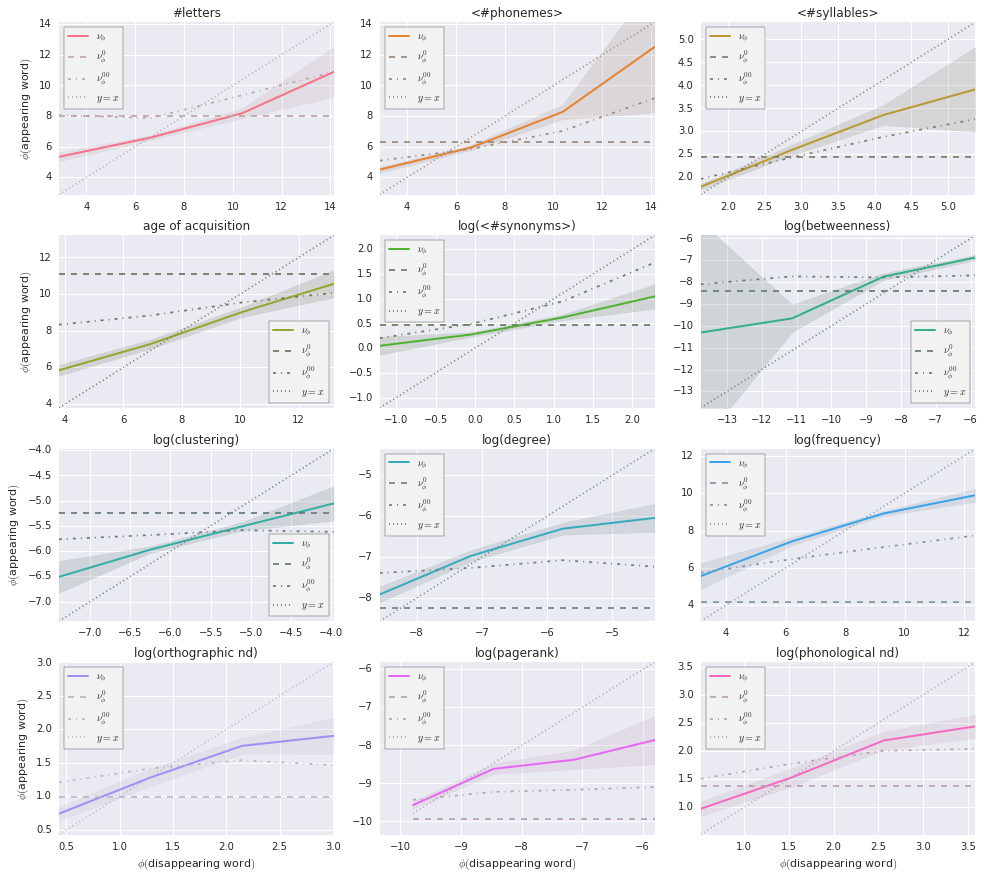

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

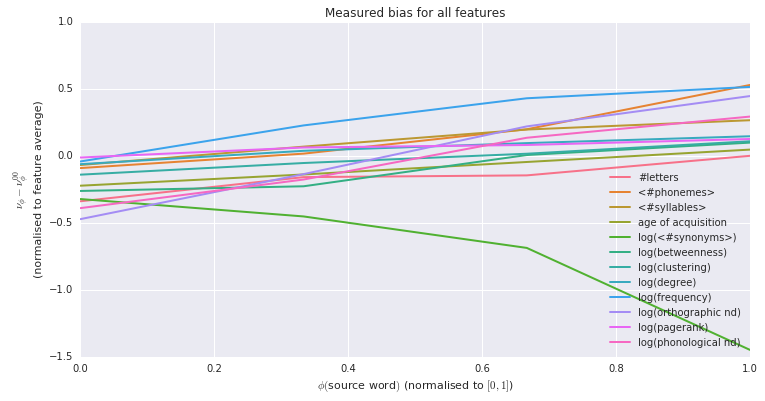

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | *** | **  |


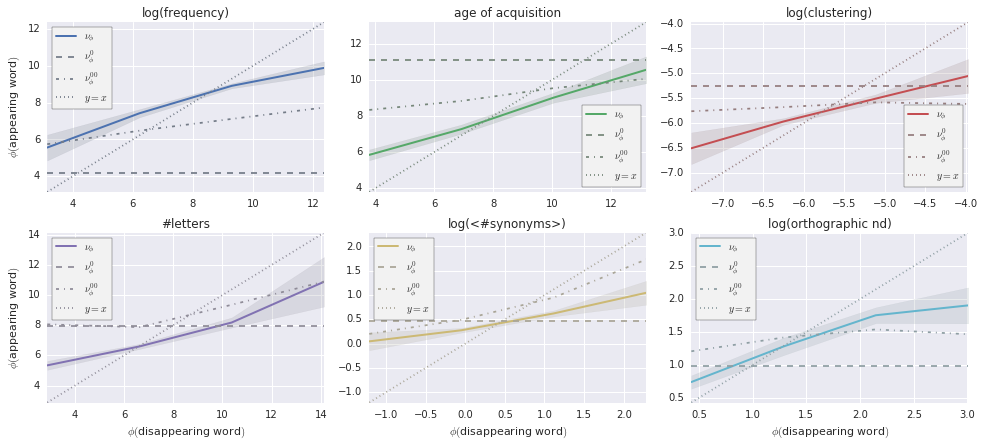

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

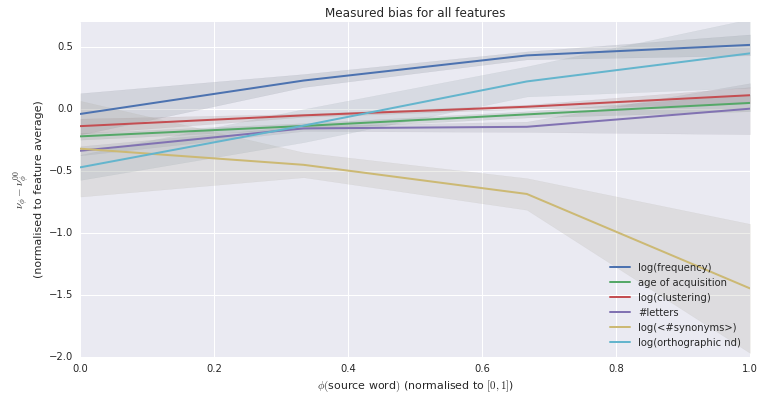

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |


H_00 | *** | ns. | ns. | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | ns. | *** |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | **  | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |


H_00 | *** | **  | ns. | *** |


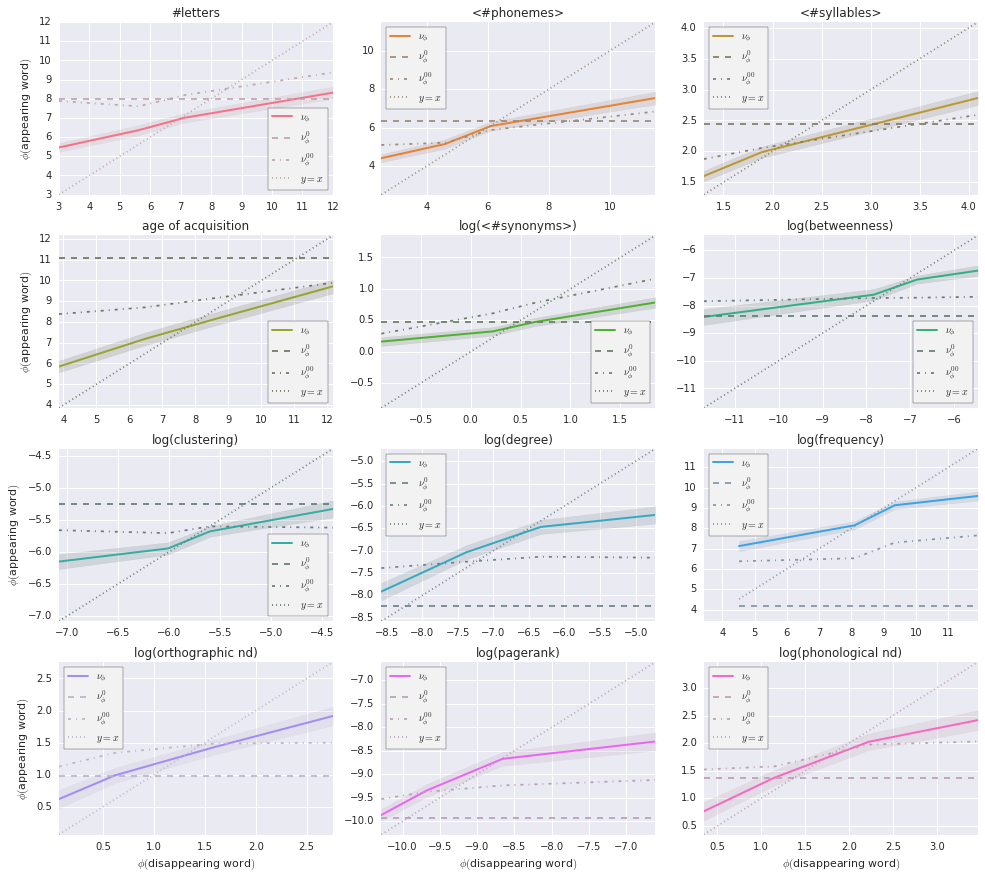

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

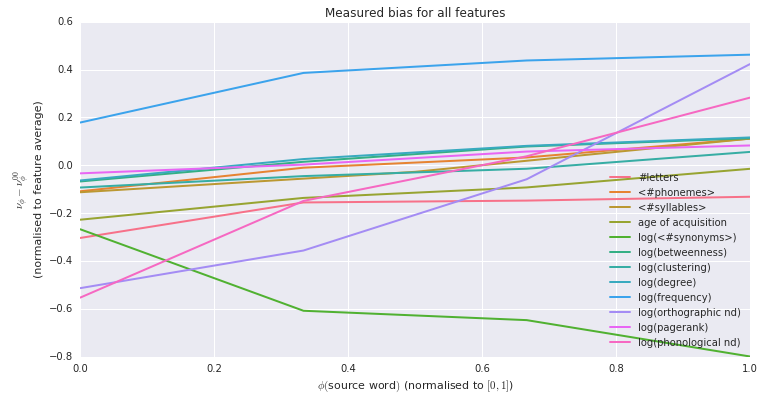

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |


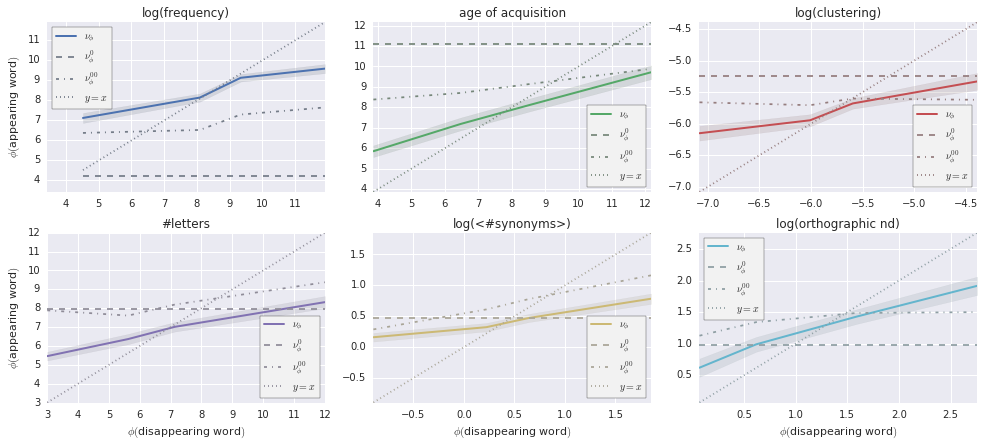

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

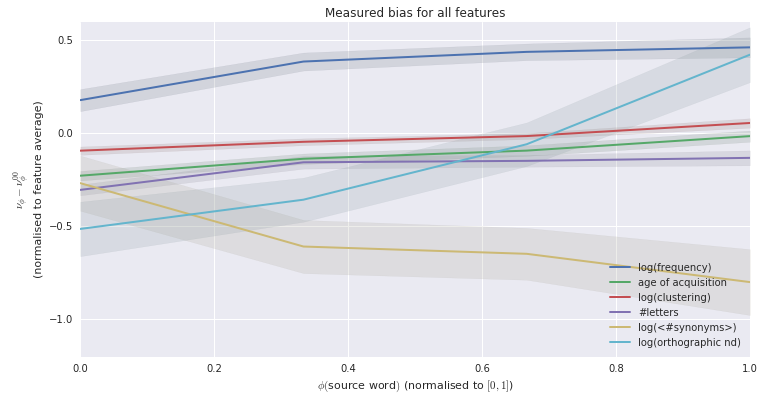

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | ns. | **  | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | **  | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | **  | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *   | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | *** | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *** |
H_00 | *** | *** | *   | ns. |


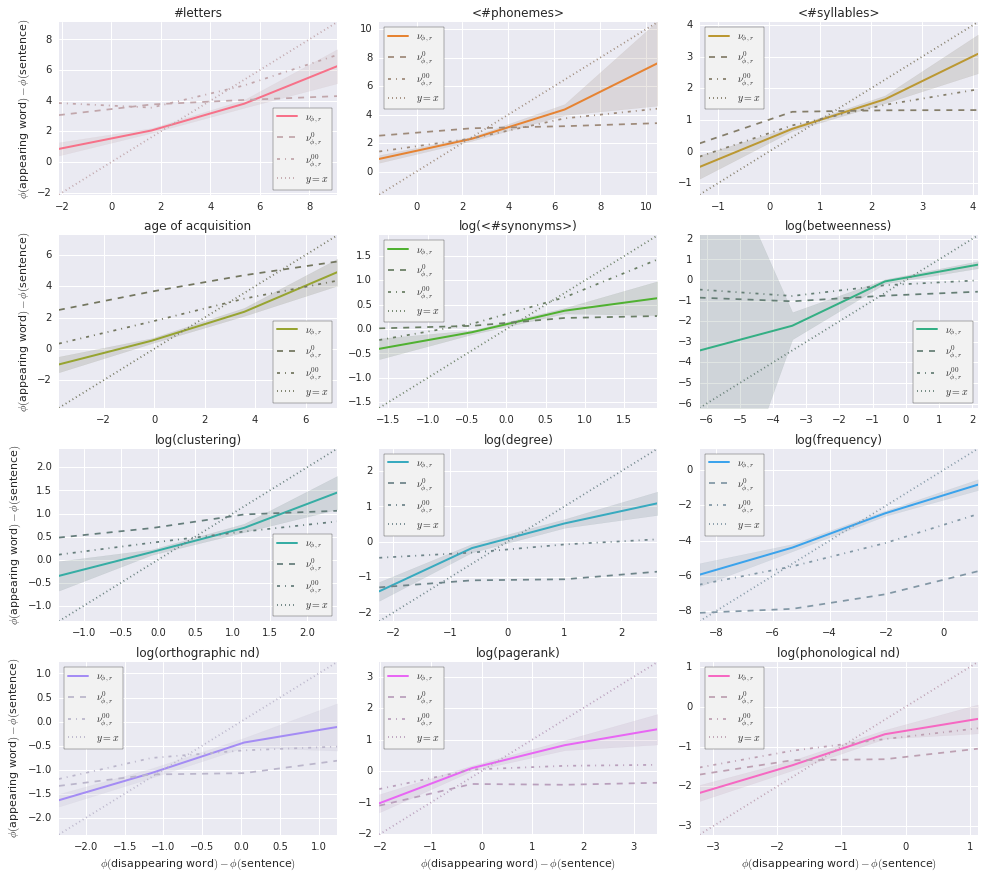

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

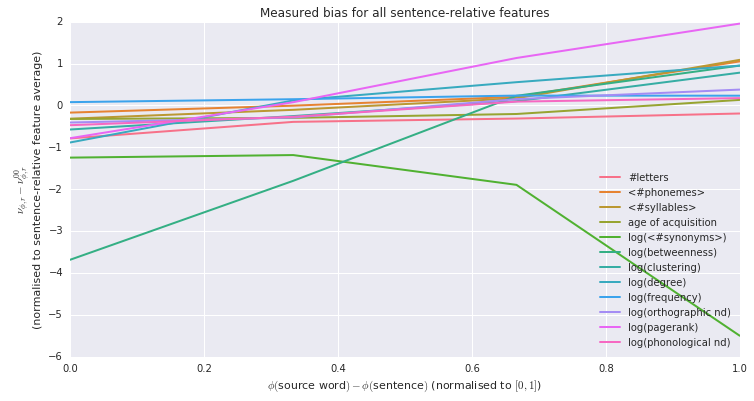

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | **  | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | *** | **  | ns. |


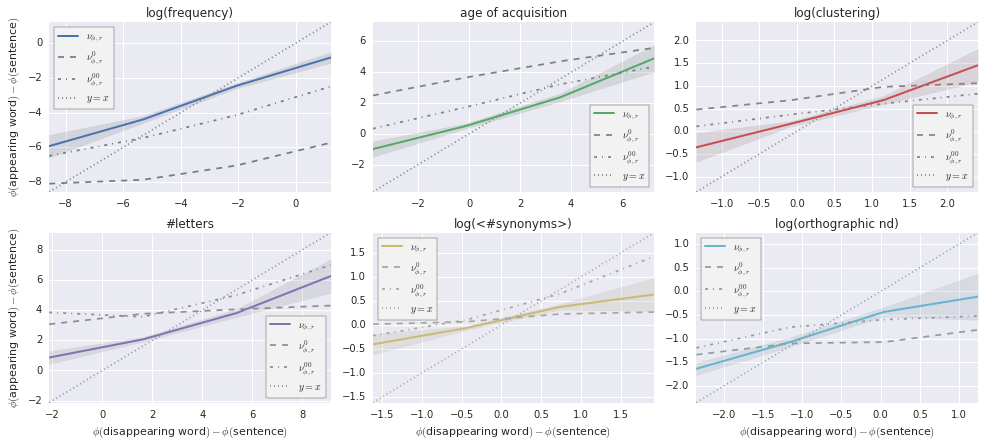

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

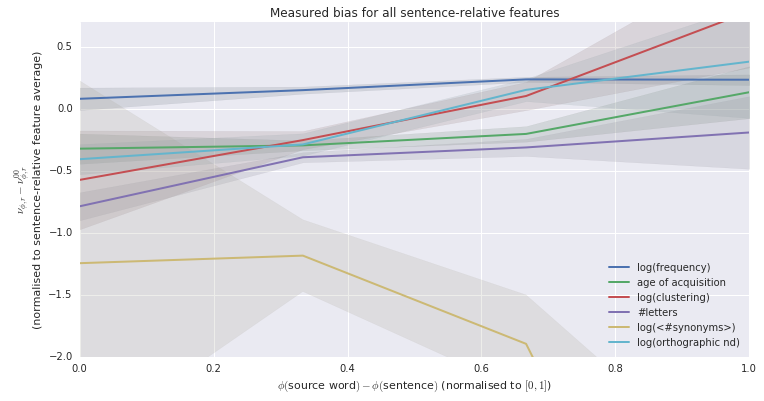

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |


H_00 | *** | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | *** | *** |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | *   | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | **  |


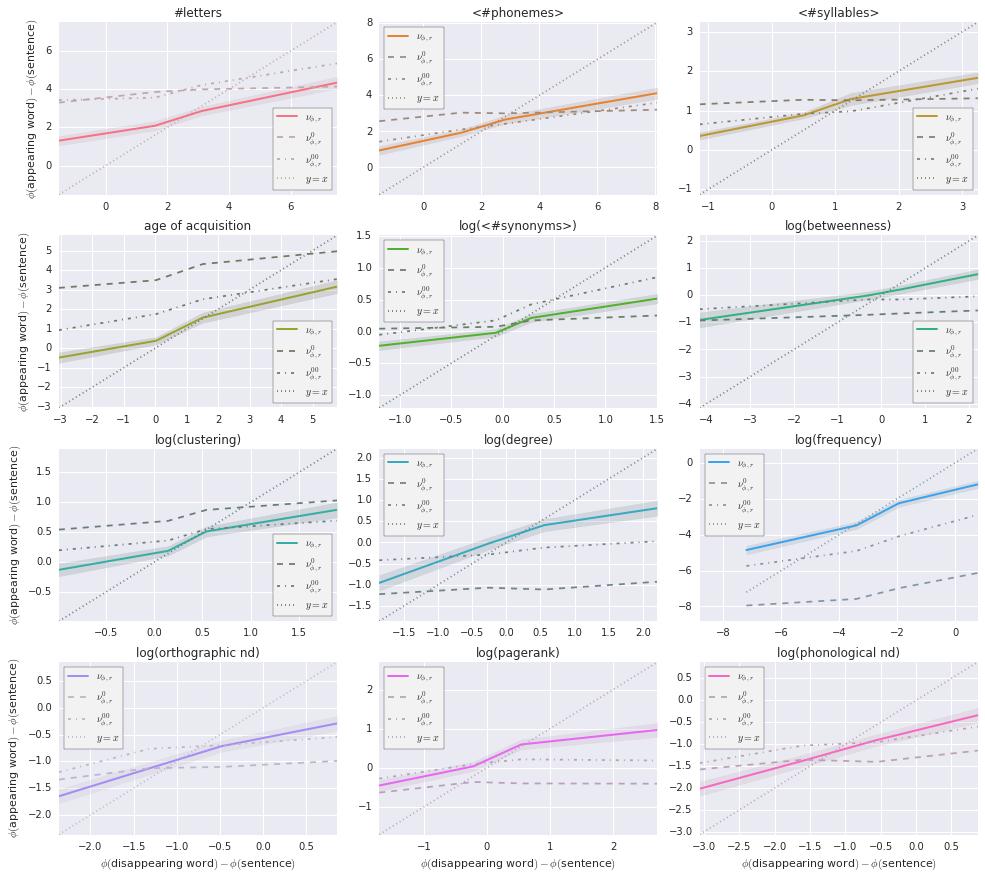

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

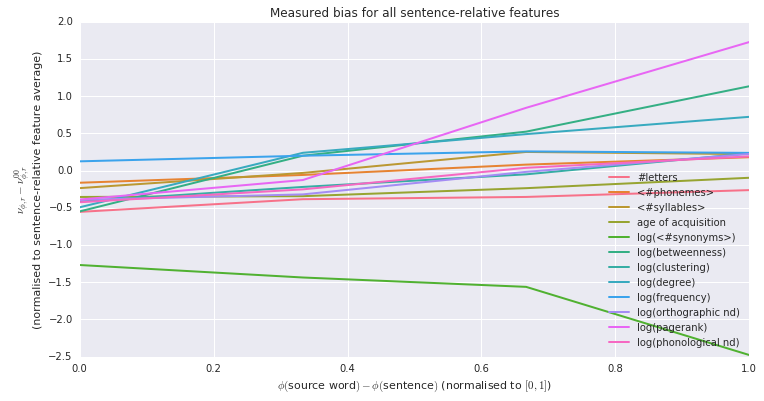

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |


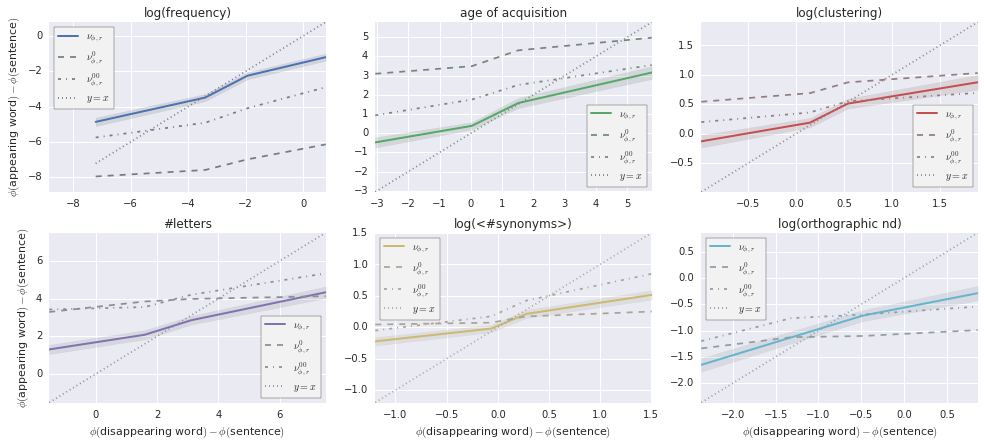

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

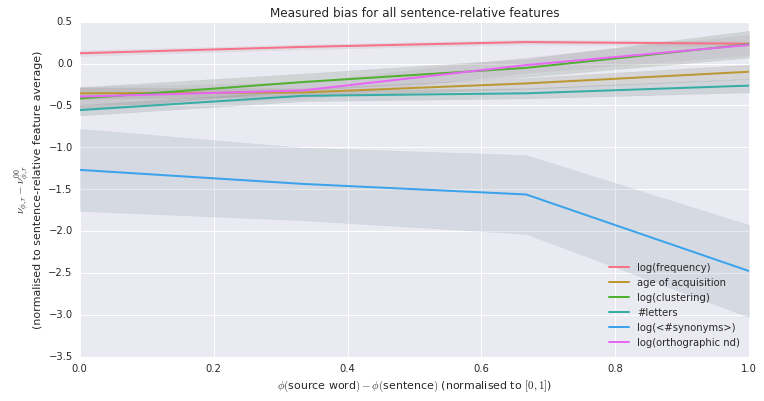

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


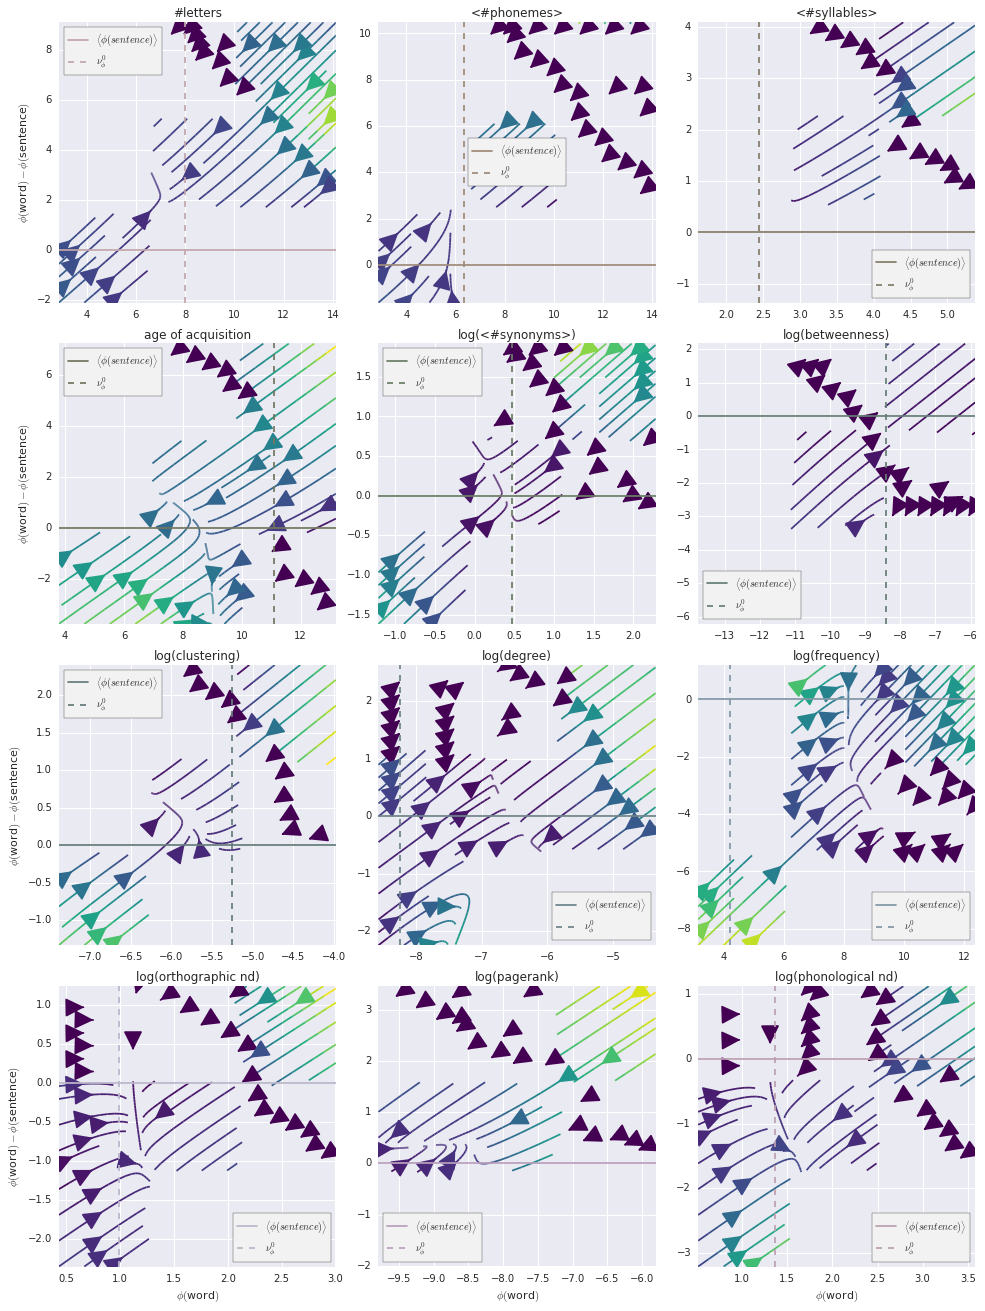

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


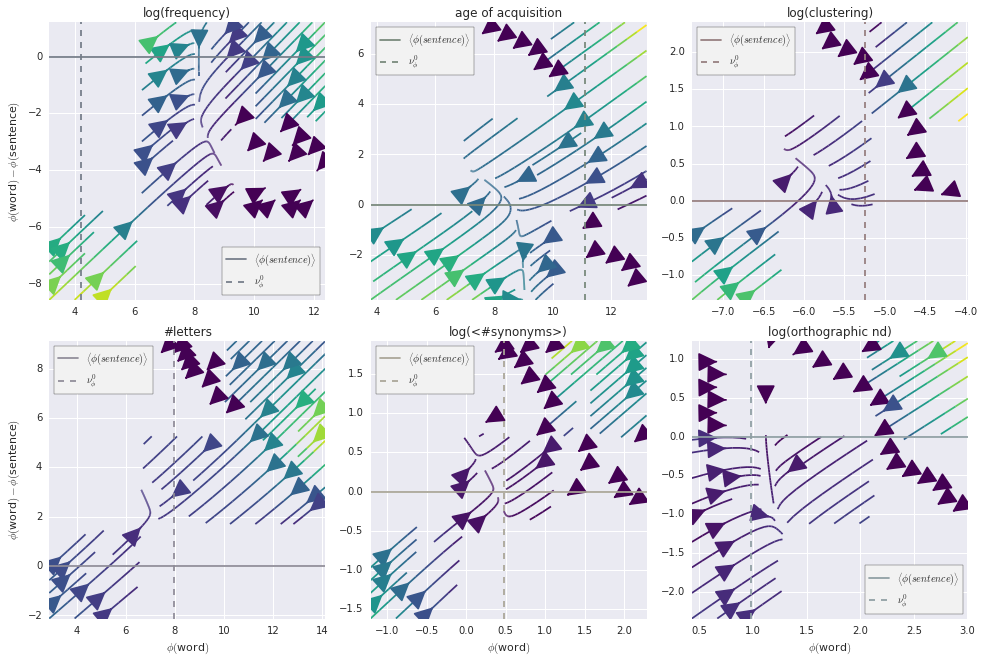

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51942384  0.18695104  0.08285583  0.07190614  0.03608469  0.02768275
  0.02047687  0.01876023  0.01457781  0.00929253  0.00691246]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0  0.520881    -0.220351    0.070375 -0.211860  -0.212291   
Component-1  0.420499    -0.342730    0.118748 -0.299205  -0.240911   
Component-2  0.457062     0.634376   -0.087370  0.252691  -0.481003   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0       0.444163             -0.212616 -0.239523        0.416014   
Component-1      -0.415728              0.130980 -0.285275       -0.452841   
Component-2      -0.093363             -0.005193  0.263490       -0.038947   

             phonological_density  syllables_count  synonyms_count  
Component-0             -0.286982         0.173024        0.001444  
Component-1              0.194741        -0.167909        0.038784  
Component-2              0.046433        -0.044208       -0.044873

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 44026) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 44026) |             | Elapsed Time: 0:00:41 ETA: 2 days, 2:39:17

  0% (   38 of 44026) |                    | Elapsed Time: 0:00:41 ETA: 13:23:22

  0% (   63 of 44026) |                     | Elapsed Time: 0:00:41 ETA: 8:06:41

  0% (   89 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 5:46:05

  0% (  113 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:06:11

  0% (  136 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:06:08

  0% (  160 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:06:20

  0% (  184 of 44026) |                     | Elapsed Time: 0:00:42 ETA: 0:06:22

  0% (  208 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:06:26

  0% (  231 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:06:29

  0% (  255 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:06:27

  0% (  280 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:06:22

  0% (  305 of 44026) |                     | Elapsed Time: 0:00:43 ETA: 0:06:19

  0% (  330 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:06:10

  0% (  353 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:06:14

  0% (  378 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:06:12

  0% (  403 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:06:10

  0% (  428 of 44026) |                     | Elapsed Time: 0:00:44 ETA: 0:06:13

  1% (  452 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:06:10

  1% (  476 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:06:09

  1% (  501 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:06:10

  1% (  525 of 44026) |                     | Elapsed Time: 0:00:45 ETA: 0:06:14

  1% (  551 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:06:13

  1% (  574 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:06:13

  1% (  599 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:06:12

  1% (  623 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:06:16

  1% (  648 of 44026) |                     | Elapsed Time: 0:00:46 ETA: 0:06:12

  1% (  673 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:06:07

  1% (  697 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:06:10

  1% (  722 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:06:08

  1% (  747 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:06:06

  1% (  773 of 44026) |                     | Elapsed Time: 0:00:47 ETA: 0:05:58

  1% (  799 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:05:55

  1% (  825 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:05:47

  1% (  850 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:05:47

  1% (  876 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:05:43

  2% (  902 of 44026) |                     | Elapsed Time: 0:00:48 ETA: 0:05:44

  2% (  929 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:05:42

  2% (  957 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:05:37

  2% (  982 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:05:39

  2% ( 1010 of 44026) |                     | Elapsed Time: 0:00:49 ETA: 0:05:35

  2% ( 1036 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:05:37

  2% ( 1063 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:05:36

  2% ( 1101 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:05:33

  2% ( 1128 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:05:34

  2% ( 1156 of 44026) |                     | Elapsed Time: 0:00:50 ETA: 0:05:28

  2% ( 1181 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:05:31

  2% ( 1207 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:05:34

  2% ( 1239 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:05:19

  2% ( 1270 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:05:08

  2% ( 1301 of 44026) |                     | Elapsed Time: 0:00:51 ETA: 0:04:58

  3% ( 1332 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:04:45

  3% ( 1363 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:04:39

  3% ( 1398 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:04:35

  3% ( 1430 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:04:30

  3% ( 1457 of 44026) |                     | Elapsed Time: 0:00:52 ETA: 0:04:37

  3% ( 1481 of 44026) |                     | Elapsed Time: 0:00:53 ETA: 0:04:54

  3% ( 1497 of 44026) |                     | Elapsed Time: 0:00:53 ETA: 0:05:41

  3% ( 1511 of 44026) |                     | Elapsed Time: 0:00:53 ETA: 0:06:53

  3% ( 1525 of 44026) |                     | Elapsed Time: 0:00:53 ETA: 0:08:32

  3% ( 1539 of 44026) |                     | Elapsed Time: 0:00:54 ETA: 0:09:50

  3% ( 1553 of 44026) |                     | Elapsed Time: 0:00:54 ETA: 0:10:37

  3% ( 1567 of 44026) |                     | Elapsed Time: 0:00:54 ETA: 0:10:42

  3% ( 1581 of 44026) |                     | Elapsed Time: 0:00:54 ETA: 0:10:47

  3% ( 1595 of 44026) |                     | Elapsed Time: 0:00:54 ETA: 0:10:52

  3% ( 1609 of 44026) |                     | Elapsed Time: 0:00:55 ETA: 0:11:01

  3% ( 1623 of 44026) |                     | Elapsed Time: 0:00:55 ETA: 0:11:09

  3% ( 1637 of 44026) |                     | Elapsed Time: 0:00:55 ETA: 0:11:08

  3% ( 1651 of 44026) |                     | Elapsed Time: 0:00:55 ETA: 0:11:09

  3% ( 1665 of 44026) |                     | Elapsed Time: 0:00:56 ETA: 0:11:13

  3% ( 1679 of 44026) |                     | Elapsed Time: 0:00:56 ETA: 0:11:12

  3% ( 1693 of 44026) |                     | Elapsed Time: 0:00:56 ETA: 0:11:11

  3% ( 1707 of 44026) |                     | Elapsed Time: 0:00:56 ETA: 0:11:07

  3% ( 1721 of 44026) |                     | Elapsed Time: 0:00:56 ETA: 0:11:09

  3% ( 1735 of 44026) |                     | Elapsed Time: 0:00:57 ETA: 0:11:05

  3% ( 1749 of 44026) |                     | Elapsed Time: 0:00:57 ETA: 0:11:03

  4% ( 1763 of 44026) |                     | Elapsed Time: 0:00:57 ETA: 0:11:04

  4% ( 1777 of 44026) |                     | Elapsed Time: 0:00:57 ETA: 0:11:08

  4% ( 1791 of 44026) |                     | Elapsed Time: 0:00:58 ETA: 0:11:09

  4% ( 1805 of 44026) |                     | Elapsed Time: 0:00:58 ETA: 0:11:10

  4% ( 1819 of 44026) |                     | Elapsed Time: 0:00:58 ETA: 0:11:11

  4% ( 1833 of 44026) |                     | Elapsed Time: 0:00:58 ETA: 0:11:09

  4% ( 1847 of 44026) |                     | Elapsed Time: 0:00:58 ETA: 0:11:05

  4% ( 1866 of 44026) |                     | Elapsed Time: 0:00:59 ETA: 0:10:08

  4% ( 1880 of 44026) |                     | Elapsed Time: 0:00:59 ETA: 0:10:05

  4% ( 1894 of 44026) |                     | Elapsed Time: 0:00:59 ETA: 0:10:05

  4% ( 1908 of 44026) |                     | Elapsed Time: 0:00:59 ETA: 0:10:05

  4% ( 1923 of 44026) |                     | Elapsed Time: 0:00:59 ETA: 0:10:24

  4% ( 1945 of 44026) |                     | Elapsed Time: 0:01:00 ETA: 0:09:34

  4% ( 1973 of 44026) |                     | Elapsed Time: 0:01:00 ETA: 0:07:57

  4% ( 2001 of 44026) |                     | Elapsed Time: 0:01:00 ETA: 0:06:46

  4% ( 2029 of 44026) |                     | Elapsed Time: 0:01:00 ETA: 0:05:56

  4% ( 2055 of 44026) |                     | Elapsed Time: 0:01:01 ETA: 0:05:19

  4% ( 2082 of 44026) |                     | Elapsed Time: 0:01:01 ETA: 0:05:21

  4% ( 2108 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:23

  4% ( 2136 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:21

  4% ( 2163 of 44026) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:21

  4% ( 2189 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:05:22

  5% ( 2216 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:05:19

  5% ( 2242 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:05:25

  5% ( 2268 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:05:27

  5% ( 2294 of 44026) |#                    | Elapsed Time: 0:01:02 ETA: 0:05:29

  5% ( 2320 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:05:29

  5% ( 2346 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:05:30

  5% ( 2371 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:05:32

  5% ( 2397 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:05:33

  5% ( 2422 of 44026) |#                    | Elapsed Time: 0:01:03 ETA: 0:05:34

  5% ( 2449 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:05:33

  5% ( 2478 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:05:24

  5% ( 2506 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:05:17

  5% ( 2534 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:05:11

  5% ( 2561 of 44026) |#                    | Elapsed Time: 0:01:04 ETA: 0:05:08

  5% ( 2588 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:05:08

  5% ( 2616 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:05:11

  6% ( 2643 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:05:14

  6% ( 2670 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:05:14

  6% ( 2697 of 44026) |#                    | Elapsed Time: 0:01:05 ETA: 0:05:14

  6% ( 2723 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:05:17

  6% ( 2752 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:05:15

  6% ( 2778 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:05:17

  6% ( 2805 of 44026) |#                    | Elapsed Time: 0:01:06 ETA: 0:05:18

  6% ( 2833 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:17

  6% ( 2861 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:16

  6% ( 2889 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:14

  6% ( 2917 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:10

  6% ( 2946 of 44026) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:04

  6% ( 2974 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:05:02

  6% ( 3002 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:05:02

  6% ( 3030 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:05:01

  6% ( 3058 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:05:03

  7% ( 3086 of 44026) |#                    | Elapsed Time: 0:01:08 ETA: 0:05:04

  7% ( 3114 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:05:03

  7% ( 3142 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:05:03

  7% ( 3170 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:05:03

  7% ( 3198 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:05:03

  7% ( 3227 of 44026) |#                    | Elapsed Time: 0:01:09 ETA: 0:05:00

  7% ( 3254 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:05:01

  7% ( 3282 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:05:00

  7% ( 3316 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:04:59

  7% ( 3343 of 44026) |#                    | Elapsed Time: 0:01:10 ETA: 0:05:03

  7% ( 3370 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:05:05

  7% ( 3396 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:05:07

  7% ( 3419 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:05:20

  7% ( 3439 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:05:42

  7% ( 3458 of 44026) |#                    | Elapsed Time: 0:01:11 ETA: 0:06:13

  7% ( 3478 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:39

  7% ( 3498 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:07

  7% ( 3518 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:05

  8% ( 3537 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:05

  8% ( 3557 of 44026) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:01

  8% ( 3577 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:01

  8% ( 3598 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:06:58

  8% ( 3615 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:08

  8% ( 3627 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:01

  8% ( 3639 of 44026) |#                    | Elapsed Time: 0:01:13 ETA: 0:09:07

  8% ( 3649 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:10:36

  8% ( 3661 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:12:17

  8% ( 3673 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:13

  8% ( 3685 of 44026) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:18

  8% ( 3707 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:10:48

  8% ( 3743 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:07:38

  8% ( 3773 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:06:12

  8% ( 3798 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:05:21

  8% ( 3824 of 44026) |#                    | Elapsed Time: 0:01:15 ETA: 0:04:47

  8% ( 3853 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:05:02

  8% ( 3879 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:05:24

  8% ( 3905 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:05:21

  8% ( 3931 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:05:21

  8% ( 3957 of 44026) |#                    | Elapsed Time: 0:01:16 ETA: 0:05:19

  9% ( 3983 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:05:16

  9% ( 4022 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:05:13

  9% ( 4048 of 44026) |#                    | Elapsed Time: 0:01:17 ETA: 0:05:11

  9% ( 4088 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:05:09

  9% ( 4114 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:05:09

  9% ( 4146 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:04:55

  9% ( 4173 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:04:58

  9% ( 4185 of 44026) |#                    | Elapsed Time: 0:01:18 ETA: 0:05:49

  9% ( 4197 of 44026) |##                   | Elapsed Time: 0:01:19 ETA: 0:06:55

  9% ( 4210 of 44026) |##                   | Elapsed Time: 0:01:19 ETA: 0:08:17

  9% ( 4223 of 44026) |##                   | Elapsed Time: 0:01:19 ETA: 0:11:40

  9% ( 4235 of 44026) |##                   | Elapsed Time: 0:01:19 ETA: 0:12:07

  9% ( 4248 of 44026) |##                   | Elapsed Time: 0:01:20 ETA: 0:11:42

  9% ( 4261 of 44026) |##                   | Elapsed Time: 0:01:20 ETA: 0:11:48

  9% ( 4273 of 44026) |##                   | Elapsed Time: 0:01:20 ETA: 0:12:04

  9% ( 4285 of 44026) |##                   | Elapsed Time: 0:01:20 ETA: 0:12:02

  9% ( 4303 of 44026) |##                   | Elapsed Time: 0:01:20 ETA: 0:10:41

  9% ( 4325 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:09:17

  9% ( 4347 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:56

  9% ( 4367 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:00

 10% ( 4403 of 44026) |##                   | Elapsed Time: 0:01:21 ETA: 0:06:02

 10% ( 4430 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:05:41

 10% ( 4448 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:05:52

 10% ( 4468 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:06:05

 10% ( 4486 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:06:08

 10% ( 4506 of 44026) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:04

 10% ( 4525 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:17

 10% ( 4543 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:18

 10% ( 4563 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:15

 10% ( 4582 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:16

 10% ( 4602 of 44026) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:11

 10% ( 4621 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:07:09

 10% ( 4646 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:06:40

 10% ( 4682 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:05:37

 10% ( 4718 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:04:50

 10% ( 4752 of 44026) |##                   | Elapsed Time: 0:01:24 ETA: 0:04:20

 10% ( 4781 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:04:05

 10% ( 4811 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:04:11

 10% ( 4841 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:04:23

 11% ( 4866 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:04:45

 11% ( 4886 of 44026) |##                   | Elapsed Time: 0:01:25 ETA: 0:05:09

 11% ( 4904 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:05:41

 11% ( 4923 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:06:19

 11% ( 4942 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:06:51

 11% ( 4963 of 44026) |##                   | Elapsed Time: 0:01:26 ETA: 0:07:12

 11% ( 4983 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:07:06

 11% ( 5002 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:07:01

 11% ( 5025 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:06:49

 11% ( 5045 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:06:49

 11% ( 5065 of 44026) |##                   | Elapsed Time: 0:01:27 ETA: 0:06:46

 11% ( 5085 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:06:44

 11% ( 5105 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:06:46

 11% ( 5125 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:06:47

 11% ( 5145 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:06:48

 11% ( 5165 of 44026) |##                   | Elapsed Time: 0:01:28 ETA: 0:06:46

 11% ( 5185 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:06:46

 11% ( 5205 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:06:46

 11% ( 5225 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:06:48

 11% ( 5245 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:06:42

 11% ( 5265 of 44026) |##                   | Elapsed Time: 0:01:29 ETA: 0:06:40

 12% ( 5285 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:06:40

 12% ( 5305 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:06:37

 12% ( 5325 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:06:36

 12% ( 5345 of 44026) |##                   | Elapsed Time: 0:01:30 ETA: 0:06:37

 12% ( 5365 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:06:38

 12% ( 5385 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:06:34

 12% ( 5415 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:06:33

 12% ( 5436 of 44026) |##                   | Elapsed Time: 0:01:31 ETA: 0:06:32

 12% ( 5466 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:06:31

 12% ( 5486 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:06:32

 12% ( 5515 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:06:24

 12% ( 5535 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:06:23

 12% ( 5557 of 44026) |##                   | Elapsed Time: 0:01:32 ETA: 0:06:16

 12% ( 5578 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:06:12

 12% ( 5600 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:06:09

 12% ( 5621 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:06:10

 12% ( 5642 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:06:13

 12% ( 5664 of 44026) |##                   | Elapsed Time: 0:01:33 ETA: 0:06:12

 12% ( 5685 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:06:12

 12% ( 5706 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:06:10

 13% ( 5727 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:06:13

 13% ( 5749 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:06:10

 13% ( 5770 of 44026) |##                   | Elapsed Time: 0:01:34 ETA: 0:06:14

 13% ( 5791 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:06:13

 13% ( 5813 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:06:13

 13% ( 5834 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:06:12

 13% ( 5854 of 44026) |##                   | Elapsed Time: 0:01:35 ETA: 0:06:11

 13% ( 5876 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:06:11

 13% ( 5897 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:06:11

 13% ( 5918 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:06:10

 13% ( 5940 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:06:10

 13% ( 5961 of 44026) |##                   | Elapsed Time: 0:01:36 ETA: 0:06:09

 13% ( 5982 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:06:08

 13% ( 6004 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:06:08

 13% ( 6025 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:06:08

 13% ( 6054 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:06:07

 13% ( 6076 of 44026) |##                   | Elapsed Time: 0:01:37 ETA: 0:06:08

 13% ( 6097 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:06:07

 13% ( 6118 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:06:05

 13% ( 6139 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:06:07

 14% ( 6165 of 44026) |##                   | Elapsed Time: 0:01:38 ETA: 0:05:56

 14% ( 6186 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:05:55

 14% ( 6208 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:05:54

 14% ( 6229 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:05:56

 14% ( 6250 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:06:06

 14% ( 6272 of 44026) |##                   | Elapsed Time: 0:01:39 ETA: 0:06:07

 14% ( 6293 of 44026) |###                  | Elapsed Time: 0:01:40 ETA: 0:06:09

 14% ( 6314 of 44026) |###                  | Elapsed Time: 0:01:40 ETA: 0:06:10

 14% ( 6336 of 44026) |###                  | Elapsed Time: 0:01:40 ETA: 0:06:11

 14% ( 6357 of 44026) |###                  | Elapsed Time: 0:01:40 ETA: 0:06:10

 14% ( 6378 of 44026) |###                  | Elapsed Time: 0:01:40 ETA: 0:06:10

 14% ( 6400 of 44026) |###                  | Elapsed Time: 0:01:41 ETA: 0:06:08

 14% ( 6421 of 44026) |###                  | Elapsed Time: 0:01:41 ETA: 0:06:06

 14% ( 6442 of 44026) |###                  | Elapsed Time: 0:01:41 ETA: 0:06:05

 14% ( 6464 of 44026) |###                  | Elapsed Time: 0:01:41 ETA: 0:06:05

 14% ( 6486 of 44026) |###                  | Elapsed Time: 0:01:41 ETA: 0:06:03

 14% ( 6508 of 44026) |###                  | Elapsed Time: 0:01:42 ETA: 0:06:00

 14% ( 6540 of 44026) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:57

 14% ( 6561 of 44026) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:59

 14% ( 6583 of 44026) |###                  | Elapsed Time: 0:01:42 ETA: 0:06:01

 15% ( 6604 of 44026) |###                  | Elapsed Time: 0:01:43 ETA: 0:06:00

 15% ( 6625 of 44026) |###                  | Elapsed Time: 0:01:43 ETA: 0:06:02

 15% ( 6646 of 44026) |###                  | Elapsed Time: 0:01:43 ETA: 0:06:04

 15% ( 6666 of 44026) |###                  | Elapsed Time: 0:01:43 ETA: 0:06:07

 15% ( 6689 of 44026) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:58

 15% ( 6711 of 44026) |###                  | Elapsed Time: 0:01:44 ETA: 0:06:00

 15% ( 6734 of 44026) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:51

 15% ( 6756 of 44026) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:52

 15% ( 6779 of 44026) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:48

 15% ( 6801 of 44026) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:49

 15% ( 6824 of 44026) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:44

 15% ( 6846 of 44026) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:46

 15% ( 6875 of 44026) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:26

 15% ( 6902 of 44026) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:10

 15% ( 6930 of 44026) |###                  | Elapsed Time: 0:01:45 ETA: 0:04:57

 15% ( 6955 of 44026) |###                  | Elapsed Time: 0:01:46 ETA: 0:04:48

 15% ( 6980 of 44026) |###                  | Elapsed Time: 0:01:46 ETA: 0:04:46

 15% ( 7003 of 44026) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:00

 15% ( 7028 of 44026) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:11

 16% ( 7054 of 44026) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:11

 16% ( 7079 of 44026) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:15

 16% ( 7105 of 44026) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:09

 16% ( 7130 of 44026) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:07

 16% ( 7168 of 44026) |###                  | Elapsed Time: 0:01:47 ETA: 0:04:58

 16% ( 7192 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:04:58

 16% ( 7216 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:04:58

 16% ( 7244 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:04:51

 16% ( 7268 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:00

 16% ( 7294 of 44026) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:04

 16% ( 7319 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:03

 16% ( 7345 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:04

 16% ( 7372 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:03

 16% ( 7397 of 44026) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:03

 16% ( 7422 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:04:58

 16% ( 7449 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:00

 16% ( 7477 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:04:51

 17% ( 7502 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:04:59

 17% ( 7527 of 44026) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:00

 17% ( 7553 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:04:54

 17% ( 7580 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:04:55

 17% ( 7606 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:04:54

 17% ( 7632 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:04:47

 17% ( 7655 of 44026) |###                  | Elapsed Time: 0:01:51 ETA: 0:04:51

 17% ( 7683 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:04:50

 17% ( 7716 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:04:55

 17% ( 7738 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:05:03

 17% ( 7758 of 44026) |###                  | Elapsed Time: 0:01:52 ETA: 0:05:11

 17% ( 7781 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:05:24

 17% ( 7801 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:05:50

 17% ( 7821 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:06:05

 17% ( 7844 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:06:00

 17% ( 7864 of 44026) |###                  | Elapsed Time: 0:01:53 ETA: 0:06:09

 17% ( 7885 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:06:02

 17% ( 7910 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:39

 18% ( 7935 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:43

 18% ( 7959 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:24

 18% ( 7979 of 44026) |###                  | Elapsed Time: 0:01:54 ETA: 0:05:34

 18% ( 7996 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:50

 18% ( 8018 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:06:00

 18% ( 8042 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:51

 18% ( 8065 of 44026) |###                  | Elapsed Time: 0:01:55 ETA: 0:05:51

 18% ( 8089 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:34

 18% ( 8111 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:33

 18% ( 8131 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:30

 18% ( 8150 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:49

 18% ( 8175 of 44026) |###                  | Elapsed Time: 0:01:56 ETA: 0:05:39

 18% ( 8210 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:34

 18% ( 8234 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:23

 18% ( 8268 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:03

 18% ( 8288 of 44026) |###                  | Elapsed Time: 0:01:57 ETA: 0:05:17

 18% ( 8307 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:37

 18% ( 8329 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:45

 18% ( 8352 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:44

 19% ( 8374 of 44026) |###                  | Elapsed Time: 0:01:58 ETA: 0:05:50

 19% ( 8396 of 44026) |####                 | Elapsed Time: 0:01:58 ETA: 0:05:47

 19% ( 8416 of 44026) |####                 | Elapsed Time: 0:01:59 ETA: 0:05:55

 19% ( 8441 of 44026) |####                 | Elapsed Time: 0:01:59 ETA: 0:05:41

 19% ( 8462 of 44026) |####                 | Elapsed Time: 0:01:59 ETA: 0:05:51

 19% ( 8489 of 44026) |####                 | Elapsed Time: 0:01:59 ETA: 0:05:28

 19% ( 8515 of 44026) |####                 | Elapsed Time: 0:01:59 ETA: 0:05:04

 19% ( 8539 of 44026) |####                 | Elapsed Time: 0:02:00 ETA: 0:05:05

 19% ( 8564 of 44026) |####                 | Elapsed Time: 0:02:00 ETA: 0:05:04

 19% ( 8584 of 44026) |####                 | Elapsed Time: 0:02:00 ETA: 0:05:08

 19% ( 8607 of 44026) |####                 | Elapsed Time: 0:02:00 ETA: 0:05:16

 19% ( 8634 of 44026) |####                 | Elapsed Time: 0:02:01 ETA: 0:05:15

 19% ( 8661 of 44026) |####                 | Elapsed Time: 0:02:01 ETA: 0:05:00

 19% ( 8682 of 44026) |####                 | Elapsed Time: 0:02:01 ETA: 0:05:02

 19% ( 8708 of 44026) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:55

 19% ( 8731 of 44026) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:55

 19% ( 8756 of 44026) |####                 | Elapsed Time: 0:02:02 ETA: 0:05:01

 19% ( 8777 of 44026) |####                 | Elapsed Time: 0:02:02 ETA: 0:05:19

 20% ( 8806 of 44026) |####                 | Elapsed Time: 0:02:02 ETA: 0:05:21

 20% ( 8824 of 44026) |####                 | Elapsed Time: 0:02:02 ETA: 0:05:47

 20% ( 8846 of 44026) |####                 | Elapsed Time: 0:02:02 ETA: 0:05:50

 20% ( 8871 of 44026) |####                 | Elapsed Time: 0:02:03 ETA: 0:05:52

 20% ( 8897 of 44026) |####                 | Elapsed Time: 0:02:03 ETA: 0:05:34

 20% ( 8924 of 44026) |####                 | Elapsed Time: 0:02:03 ETA: 0:05:18

 20% ( 8951 of 44026) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:58

 20% ( 8975 of 44026) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:52

 20% ( 9002 of 44026) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:45

 20% ( 9027 of 44026) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:45

 20% ( 9053 of 44026) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:46

 20% ( 9081 of 44026) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:41

 20% ( 9105 of 44026) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:45

 20% ( 9133 of 44026) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:36

 20% ( 9157 of 44026) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:42

 20% ( 9182 of 44026) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:48

 20% ( 9208 of 44026) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:44

 20% ( 9228 of 44026) |####                 | Elapsed Time: 0:02:06 ETA: 0:05:04

 21% ( 9254 of 44026) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:59

 21% ( 9280 of 44026) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:58

 21% ( 9307 of 44026) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:50

 21% ( 9332 of 44026) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:42

 21% ( 9356 of 44026) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:36

 21% ( 9382 of 44026) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:38

 21% ( 9407 of 44026) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:39

 21% ( 9431 of 44026) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:47

 21% ( 9459 of 44026) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:42

 21% ( 9487 of 44026) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:35

 21% ( 9512 of 44026) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:35

 21% ( 9540 of 44026) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:29

 21% ( 9567 of 44026) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:26

 21% ( 9590 of 44026) |####                 | Elapsed Time: 0:02:09 ETA: 0:04:37

 21% ( 9617 of 44026) |####                 | Elapsed Time: 0:02:09 ETA: 0:04:35

 21% ( 9639 of 44026) |####                 | Elapsed Time: 0:02:09 ETA: 0:04:48

 21% ( 9663 of 44026) |####                 | Elapsed Time: 0:02:09 ETA: 0:04:55

 22% ( 9689 of 44026) |####                 | Elapsed Time: 0:02:09 ETA: 0:04:55

 22% ( 9712 of 44026) |####                 | Elapsed Time: 0:02:10 ETA: 0:04:52

 22% ( 9739 of 44026) |####                 | Elapsed Time: 0:02:10 ETA: 0:04:49

 22% ( 9766 of 44026) |####                 | Elapsed Time: 0:02:10 ETA: 0:04:39

 22% ( 9793 of 44026) |####                 | Elapsed Time: 0:02:10 ETA: 0:04:31

 22% ( 9820 of 44026) |####                 | Elapsed Time: 0:02:10 ETA: 0:04:30

 22% ( 9846 of 44026) |####                 | Elapsed Time: 0:02:11 ETA: 0:04:24

 22% ( 9872 of 44026) |####                 | Elapsed Time: 0:02:11 ETA: 0:04:25

 22% ( 9906 of 44026) |####                 | Elapsed Time: 0:02:11 ETA: 0:04:27

 22% ( 9931 of 44026) |####                 | Elapsed Time: 0:02:11 ETA: 0:04:33

 22% ( 9956 of 44026) |####                 | Elapsed Time: 0:02:12 ETA: 0:04:36

 22% ( 9980 of 44026) |####                 | Elapsed Time: 0:02:12 ETA: 0:04:40

 22% (10004 of 44026) |####                 | Elapsed Time: 0:02:12 ETA: 0:04:45

 22% (10029 of 44026) |####                 | Elapsed Time: 0:02:12 ETA: 0:04:48

 22% (10053 of 44026) |####                 | Elapsed Time: 0:02:12 ETA: 0:04:51

 22% (10079 of 44026) |####                 | Elapsed Time: 0:02:13 ETA: 0:04:40

 22% (10103 of 44026) |####                 | Elapsed Time: 0:02:13 ETA: 0:04:43

 23% (10128 of 44026) |####                 | Elapsed Time: 0:02:13 ETA: 0:04:43

 23% (10151 of 44026) |####                 | Elapsed Time: 0:02:13 ETA: 0:04:47

 23% (10176 of 44026) |####                 | Elapsed Time: 0:02:13 ETA: 0:04:47

 23% (10201 of 44026) |####                 | Elapsed Time: 0:02:14 ETA: 0:04:48

 23% (10222 of 44026) |####                 | Elapsed Time: 0:02:14 ETA: 0:04:57

 23% (10244 of 44026) |####                 | Elapsed Time: 0:02:14 ETA: 0:05:03

 23% (10271 of 44026) |####                 | Elapsed Time: 0:02:14 ETA: 0:05:00

 23% (10291 of 44026) |####                 | Elapsed Time: 0:02:14 ETA: 0:05:11

 23% (10314 of 44026) |####                 | Elapsed Time: 0:02:15 ETA: 0:05:17

 23% (10339 of 44026) |####                 | Elapsed Time: 0:02:15 ETA: 0:04:58

 23% (10364 of 44026) |####                 | Elapsed Time: 0:02:15 ETA: 0:04:53

 23% (10390 of 44026) |####                 | Elapsed Time: 0:02:15 ETA: 0:05:01

 23% (10416 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:04:39

 23% (10441 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:04:40

 23% (10469 of 44026) |####                 | Elapsed Time: 0:02:16 ETA: 0:04:46

 23% (10493 of 44026) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:48

 23% (10527 of 44026) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:29

 23% (10562 of 44026) |#####                | Elapsed Time: 0:02:17 ETA: 0:04:08

 24% (10592 of 44026) |#####                | Elapsed Time: 0:02:17 ETA: 0:03:55

 24% (10623 of 44026) |#####                | Elapsed Time: 0:02:17 ETA: 0:03:39

 24% (10656 of 44026) |#####                | Elapsed Time: 0:02:17 ETA: 0:03:30

 24% (10687 of 44026) |#####                | Elapsed Time: 0:02:17 ETA: 0:03:38

 24% (10718 of 44026) |#####                | Elapsed Time: 0:02:18 ETA: 0:03:40

 24% (10748 of 44026) |#####                | Elapsed Time: 0:02:18 ETA: 0:03:40

 24% (10779 of 44026) |#####                | Elapsed Time: 0:02:18 ETA: 0:03:41

 24% (10810 of 44026) |#####                | Elapsed Time: 0:02:18 ETA: 0:03:42

 24% (10841 of 44026) |#####                | Elapsed Time: 0:02:18 ETA: 0:03:42

 24% (10872 of 44026) |#####                | Elapsed Time: 0:02:19 ETA: 0:03:42

 24% (10901 of 44026) |#####                | Elapsed Time: 0:02:19 ETA: 0:03:43

 24% (10930 of 44026) |#####                | Elapsed Time: 0:02:19 ETA: 0:03:49

 24% (10960 of 44026) |#####                | Elapsed Time: 0:02:19 ETA: 0:03:51

 24% (10990 of 44026) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:51

 25% (11023 of 44026) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:52

 25% (11056 of 44026) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:41

 25% (11107 of 44026) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:30

 25% (11142 of 44026) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:23

 25% (11175 of 44026) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:18

 25% (11208 of 44026) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:19

 25% (11240 of 44026) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:22

 25% (11273 of 44026) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:23

 25% (11308 of 44026) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:23

 25% (11342 of 44026) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:21

 25% (11373 of 44026) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:23

 25% (11401 of 44026) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:28

 25% (11421 of 44026) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:55

 25% (11440 of 44026) |#####                | Elapsed Time: 0:02:23 ETA: 0:04:26

 26% (11460 of 44026) |#####                | Elapsed Time: 0:02:23 ETA: 0:05:05

 26% (11479 of 44026) |#####                | Elapsed Time: 0:02:23 ETA: 0:05:53

 26% (11498 of 44026) |#####                | Elapsed Time: 0:02:23 ETA: 0:06:00

 26% (11518 of 44026) |#####                | Elapsed Time: 0:02:23 ETA: 0:05:59

 26% (11537 of 44026) |#####                | Elapsed Time: 0:02:24 ETA: 0:05:59

 26% (11557 of 44026) |#####                | Elapsed Time: 0:02:24 ETA: 0:05:59

 26% (11576 of 44026) |#####                | Elapsed Time: 0:02:24 ETA: 0:05:57

 26% (11596 of 44026) |#####                | Elapsed Time: 0:02:24 ETA: 0:05:57

 26% (11615 of 44026) |#####                | Elapsed Time: 0:02:24 ETA: 0:06:00

 26% (11635 of 44026) |#####                | Elapsed Time: 0:02:25 ETA: 0:06:00

 26% (11655 of 44026) |#####                | Elapsed Time: 0:02:25 ETA: 0:06:00

 26% (11675 of 44026) |#####                | Elapsed Time: 0:02:25 ETA: 0:05:58

 26% (11695 of 44026) |#####                | Elapsed Time: 0:02:25 ETA: 0:05:59

 26% (11715 of 44026) |#####                | Elapsed Time: 0:02:26 ETA: 0:05:56

 26% (11740 of 44026) |#####                | Elapsed Time: 0:02:26 ETA: 0:05:31

 26% (11764 of 44026) |#####                | Elapsed Time: 0:02:26 ETA: 0:05:14

 26% (11787 of 44026) |#####                | Elapsed Time: 0:02:26 ETA: 0:04:59

 26% (11814 of 44026) |#####                | Elapsed Time: 0:02:26 ETA: 0:04:36

 26% (11842 of 44026) |#####                | Elapsed Time: 0:02:27 ETA: 0:04:20

 26% (11869 of 44026) |#####                | Elapsed Time: 0:02:27 ETA: 0:04:15

 27% (11898 of 44026) |#####                | Elapsed Time: 0:02:27 ETA: 0:04:07

 27% (11926 of 44026) |#####                | Elapsed Time: 0:02:27 ETA: 0:04:00

 27% (11954 of 44026) |#####                | Elapsed Time: 0:02:27 ETA: 0:03:59

 27% (11982 of 44026) |#####                | Elapsed Time: 0:02:28 ETA: 0:03:57

 27% (12009 of 44026) |#####                | Elapsed Time: 0:02:28 ETA: 0:03:54

 27% (12037 of 44026) |#####                | Elapsed Time: 0:02:28 ETA: 0:03:55

 27% (12065 of 44026) |#####                | Elapsed Time: 0:02:28 ETA: 0:03:56

 27% (12090 of 44026) |#####                | Elapsed Time: 0:02:28 ETA: 0:04:06

 27% (12124 of 44026) |#####                | Elapsed Time: 0:02:29 ETA: 0:04:08

 27% (12150 of 44026) |#####                | Elapsed Time: 0:02:29 ETA: 0:04:11

 27% (12176 of 44026) |#####                | Elapsed Time: 0:02:29 ETA: 0:04:14

 27% (12204 of 44026) |#####                | Elapsed Time: 0:02:29 ETA: 0:04:07

 27% (12228 of 44026) |#####                | Elapsed Time: 0:02:30 ETA: 0:04:06

 27% (12257 of 44026) |#####                | Elapsed Time: 0:02:30 ETA: 0:04:08

 27% (12282 of 44026) |#####                | Elapsed Time: 0:02:30 ETA: 0:04:12

 27% (12308 of 44026) |#####                | Elapsed Time: 0:02:30 ETA: 0:04:13

 28% (12333 of 44026) |#####                | Elapsed Time: 0:02:30 ETA: 0:04:20

 28% (12360 of 44026) |#####                | Elapsed Time: 0:02:31 ETA: 0:04:23

 28% (12388 of 44026) |#####                | Elapsed Time: 0:02:31 ETA: 0:04:15

 28% (12414 of 44026) |#####                | Elapsed Time: 0:02:31 ETA: 0:04:14

 28% (12438 of 44026) |#####                | Elapsed Time: 0:02:31 ETA: 0:04:11

 28% (12463 of 44026) |#####                | Elapsed Time: 0:02:31 ETA: 0:04:15

 28% (12487 of 44026) |#####                | Elapsed Time: 0:02:32 ETA: 0:04:25

 28% (12509 of 44026) |#####                | Elapsed Time: 0:02:32 ETA: 0:04:35

 28% (12531 of 44026) |#####                | Elapsed Time: 0:02:32 ETA: 0:04:47

 28% (12553 of 44026) |#####                | Elapsed Time: 0:02:32 ETA: 0:04:53

 28% (12575 of 44026) |#####                | Elapsed Time: 0:02:33 ETA: 0:05:00

 28% (12599 of 44026) |######               | Elapsed Time: 0:02:33 ETA: 0:04:59

 28% (12621 of 44026) |######               | Elapsed Time: 0:02:33 ETA: 0:04:59

 28% (12643 of 44026) |######               | Elapsed Time: 0:02:33 ETA: 0:04:59

 28% (12669 of 44026) |######               | Elapsed Time: 0:02:33 ETA: 0:04:59

 28% (12691 of 44026) |######               | Elapsed Time: 0:02:34 ETA: 0:05:00

 28% (12712 of 44026) |######               | Elapsed Time: 0:02:34 ETA: 0:05:02

 28% (12733 of 44026) |######               | Elapsed Time: 0:02:34 ETA: 0:05:06

 28% (12755 of 44026) |######               | Elapsed Time: 0:02:34 ETA: 0:05:07

 29% (12775 of 44026) |######               | Elapsed Time: 0:02:34 ETA: 0:05:09

 29% (12797 of 44026) |######               | Elapsed Time: 0:02:35 ETA: 0:05:13

 29% (12826 of 44026) |######               | Elapsed Time: 0:02:35 ETA: 0:04:46

 29% (12856 of 44026) |######               | Elapsed Time: 0:02:35 ETA: 0:04:21

 29% (12885 of 44026) |######               | Elapsed Time: 0:02:35 ETA: 0:04:02

 29% (12917 of 44026) |######               | Elapsed Time: 0:02:36 ETA: 0:03:40

 29% (12934 of 44026) |######               | Elapsed Time: 0:02:36 ETA: 0:03:53

 29% (12957 of 44026) |######               | Elapsed Time: 0:02:36 ETA: 0:04:08

 29% (12983 of 44026) |######               | Elapsed Time: 0:02:36 ETA: 0:04:15

 29% (13010 of 44026) |######               | Elapsed Time: 0:02:36 ETA: 0:04:31

 29% (13037 of 44026) |######               | Elapsed Time: 0:02:37 ETA: 0:04:22

 29% (13061 of 44026) |######               | Elapsed Time: 0:02:37 ETA: 0:04:12

 29% (13085 of 44026) |######               | Elapsed Time: 0:02:37 ETA: 0:04:11

 29% (13109 of 44026) |######               | Elapsed Time: 0:02:37 ETA: 0:04:20

 29% (13136 of 44026) |######               | Elapsed Time: 0:02:37 ETA: 0:04:18

 29% (13161 of 44026) |######               | Elapsed Time: 0:02:38 ETA: 0:04:19

 29% (13187 of 44026) |######               | Elapsed Time: 0:02:38 ETA: 0:04:15

 30% (13208 of 44026) |######               | Elapsed Time: 0:02:38 ETA: 0:04:36

 30% (13241 of 44026) |######               | Elapsed Time: 0:02:38 ETA: 0:04:14

 30% (13270 of 44026) |######               | Elapsed Time: 0:02:38 ETA: 0:04:08

 30% (13296 of 44026) |######               | Elapsed Time: 0:02:39 ETA: 0:04:05

 30% (13322 of 44026) |######               | Elapsed Time: 0:02:39 ETA: 0:03:58

 30% (13348 of 44026) |######               | Elapsed Time: 0:02:39 ETA: 0:03:51

 30% (13374 of 44026) |######               | Elapsed Time: 0:02:39 ETA: 0:04:04

 30% (13400 of 44026) |######               | Elapsed Time: 0:02:40 ETA: 0:04:04

 30% (13425 of 44026) |######               | Elapsed Time: 0:02:40 ETA: 0:04:05

 30% (13451 of 44026) |######               | Elapsed Time: 0:02:40 ETA: 0:04:06

 30% (13477 of 44026) |######               | Elapsed Time: 0:02:40 ETA: 0:04:06

 30% (13503 of 44026) |######               | Elapsed Time: 0:02:40 ETA: 0:04:06

 30% (13529 of 44026) |######               | Elapsed Time: 0:02:41 ETA: 0:04:04

 30% (13555 of 44026) |######               | Elapsed Time: 0:02:41 ETA: 0:04:03

 30% (13581 of 44026) |######               | Elapsed Time: 0:02:41 ETA: 0:04:02

 30% (13607 of 44026) |######               | Elapsed Time: 0:02:41 ETA: 0:04:01

 30% (13633 of 44026) |######               | Elapsed Time: 0:02:41 ETA: 0:04:02

 31% (13659 of 44026) |######               | Elapsed Time: 0:02:42 ETA: 0:04:03

 31% (13685 of 44026) |######               | Elapsed Time: 0:02:42 ETA: 0:04:03

 31% (13715 of 44026) |######               | Elapsed Time: 0:02:42 ETA: 0:03:55

 31% (13759 of 44026) |######               | Elapsed Time: 0:02:42 ETA: 0:03:47

 31% (13786 of 44026) |######               | Elapsed Time: 0:02:43 ETA: 0:03:45

 31% (13811 of 44026) |######               | Elapsed Time: 0:02:43 ETA: 0:03:42

 31% (13837 of 44026) |######               | Elapsed Time: 0:02:43 ETA: 0:03:47

 31% (13862 of 44026) |######               | Elapsed Time: 0:02:43 ETA: 0:03:56

 31% (13891 of 44026) |######               | Elapsed Time: 0:02:43 ETA: 0:03:59

 31% (13916 of 44026) |######               | Elapsed Time: 0:02:44 ETA: 0:03:59

 31% (13942 of 44026) |######               | Elapsed Time: 0:02:44 ETA: 0:03:57

 31% (13968 of 44026) |######               | Elapsed Time: 0:02:44 ETA: 0:03:54

 31% (13994 of 44026) |######               | Elapsed Time: 0:02:44 ETA: 0:03:58

 31% (14019 of 44026) |######               | Elapsed Time: 0:02:44 ETA: 0:04:00

 31% (14043 of 44026) |######               | Elapsed Time: 0:02:45 ETA: 0:04:04

 31% (14068 of 44026) |######               | Elapsed Time: 0:02:45 ETA: 0:04:09

 32% (14092 of 44026) |######               | Elapsed Time: 0:02:45 ETA: 0:04:15

 32% (14118 of 44026) |######               | Elapsed Time: 0:02:45 ETA: 0:04:11

 32% (14150 of 44026) |######               | Elapsed Time: 0:02:45 ETA: 0:03:56

 32% (14185 of 44026) |######               | Elapsed Time: 0:02:46 ETA: 0:03:35

 32% (14219 of 44026) |######               | Elapsed Time: 0:02:46 ETA: 0:03:19

 32% (14246 of 44026) |######               | Elapsed Time: 0:02:46 ETA: 0:03:14

 32% (14278 of 44026) |######               | Elapsed Time: 0:02:46 ETA: 0:03:10

 32% (14326 of 44026) |######               | Elapsed Time: 0:02:47 ETA: 0:03:10

 32% (14360 of 44026) |######               | Elapsed Time: 0:02:47 ETA: 0:03:12

 32% (14394 of 44026) |######               | Elapsed Time: 0:02:47 ETA: 0:03:04

 32% (14424 of 44026) |######               | Elapsed Time: 0:02:47 ETA: 0:03:07

 32% (14446 of 44026) |######               | Elapsed Time: 0:02:47 ETA: 0:03:20

 32% (14473 of 44026) |######               | Elapsed Time: 0:02:48 ETA: 0:03:33

 32% (14507 of 44026) |######               | Elapsed Time: 0:02:48 ETA: 0:03:31

 33% (14542 of 44026) |######               | Elapsed Time: 0:02:48 ETA: 0:03:28

 33% (14577 of 44026) |######               | Elapsed Time: 0:02:48 ETA: 0:03:12

 33% (14613 of 44026) |######               | Elapsed Time: 0:02:48 ETA: 0:02:54

 33% (14648 of 44026) |######               | Elapsed Time: 0:02:49 ETA: 0:02:51

 33% (14682 of 44026) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:53

 33% (14716 of 44026) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:55

 33% (14751 of 44026) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:54

 33% (14787 of 44026) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:54

 33% (14821 of 44026) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:53

 33% (14859 of 44026) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:53

 33% (14893 of 44026) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:54

 33% (14927 of 44026) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:55

 33% (14959 of 44026) |#######              | Elapsed Time: 0:02:51 ETA: 0:02:59

 34% (14992 of 44026) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:01

 34% (15025 of 44026) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:01

 34% (15058 of 44026) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:01

 34% (15092 of 44026) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:01

 34% (15126 of 44026) |#######              | Elapsed Time: 0:02:52 ETA: 0:02:57

 34% (15158 of 44026) |#######              | Elapsed Time: 0:02:52 ETA: 0:02:59

 34% (15191 of 44026) |#######              | Elapsed Time: 0:02:52 ETA: 0:02:58

 34% (15223 of 44026) |#######              | Elapsed Time: 0:02:52 ETA: 0:03:00

 34% (15252 of 44026) |#######              | Elapsed Time: 0:02:52 ETA: 0:03:06

 34% (15280 of 44026) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:13

 34% (15308 of 44026) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:19

 34% (15336 of 44026) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:27

 34% (15367 of 44026) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:27

 34% (15395 of 44026) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:26

 35% (15420 of 44026) |#######              | Elapsed Time: 0:02:54 ETA: 0:03:36

 35% (15438 of 44026) |#######              | Elapsed Time: 0:02:54 ETA: 0:03:54

 35% (15457 of 44026) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:15

 35% (15478 of 44026) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:48

 35% (15498 of 44026) |#######              | Elapsed Time: 0:02:54 ETA: 0:05:04

 35% (15516 of 44026) |#######              | Elapsed Time: 0:02:55 ETA: 0:05:14

 35% (15532 of 44026) |#######              | Elapsed Time: 0:02:55 ETA: 0:05:28

 35% (15548 of 44026) |#######              | Elapsed Time: 0:02:55 ETA: 0:05:43

 35% (15564 of 44026) |#######              | Elapsed Time: 0:02:55 ETA: 0:06:14

 35% (15584 of 44026) |#######              | Elapsed Time: 0:02:56 ETA: 0:05:59

 35% (15612 of 44026) |#######              | Elapsed Time: 0:02:56 ETA: 0:05:15

 35% (15640 of 44026) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:31

 35% (15660 of 44026) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:21

 35% (15680 of 44026) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:08

 35% (15700 of 44026) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:22

 35% (15720 of 44026) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:47

 35% (15740 of 44026) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:53

 35% (15760 of 44026) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:55

 35% (15780 of 44026) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:55

 35% (15800 of 44026) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:55

 35% (15820 of 44026) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:54

 35% (15840 of 44026) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:55

 36% (15860 of 44026) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:54

 36% (15880 of 44026) |#######              | Elapsed Time: 0:02:59 ETA: 0:04:55

 36% (15900 of 44026) |#######              | Elapsed Time: 0:02:59 ETA: 0:04:57

 36% (15917 of 44026) |#######              | Elapsed Time: 0:02:59 ETA: 0:05:13

 36% (15934 of 44026) |#######              | Elapsed Time: 0:02:59 ETA: 0:05:23

 36% (15960 of 44026) |#######              | Elapsed Time: 0:02:59 ETA: 0:05:07

 36% (15984 of 44026) |#######              | Elapsed Time: 0:03:00 ETA: 0:04:49

 36% (16006 of 44026) |#######              | Elapsed Time: 0:03:00 ETA: 0:04:31

 36% (16034 of 44026) |#######              | Elapsed Time: 0:03:00 ETA: 0:03:55

 36% (16059 of 44026) |#######              | Elapsed Time: 0:03:00 ETA: 0:03:49

 36% (16081 of 44026) |#######              | Elapsed Time: 0:03:00 ETA: 0:03:56

 36% (16105 of 44026) |#######              | Elapsed Time: 0:03:01 ETA: 0:03:55

 36% (16132 of 44026) |#######              | Elapsed Time: 0:03:01 ETA: 0:03:47

 36% (16153 of 44026) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:07

 36% (16172 of 44026) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:19

 36% (16196 of 44026) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:02

 36% (16220 of 44026) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:18

 36% (16236 of 44026) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:40

 36% (16257 of 44026) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:41

 36% (16277 of 44026) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:42

 37% (16309 of 44026) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:14

 37% (16341 of 44026) |#######              | Elapsed Time: 0:03:03 ETA: 0:03:47

 37% (16373 of 44026) |#######              | Elapsed Time: 0:03:03 ETA: 0:03:23

 37% (16405 of 44026) |#######              | Elapsed Time: 0:03:03 ETA: 0:03:07

 37% (16437 of 44026) |#######              | Elapsed Time: 0:03:03 ETA: 0:02:58

 37% (16469 of 44026) |#######              | Elapsed Time: 0:03:04 ETA: 0:02:59

 37% (16510 of 44026) |#######              | Elapsed Time: 0:03:04 ETA: 0:03:01

 37% (16539 of 44026) |#######              | Elapsed Time: 0:03:04 ETA: 0:03:05

 37% (16562 of 44026) |#######              | Elapsed Time: 0:03:04 ETA: 0:03:17

 37% (16589 of 44026) |#######              | Elapsed Time: 0:03:04 ETA: 0:03:26

 37% (16602 of 44026) |#######              | Elapsed Time: 0:03:05 ETA: 0:03:58

 37% (16614 of 44026) |#######              | Elapsed Time: 0:03:05 ETA: 0:04:52

 37% (16627 of 44026) |#######              | Elapsed Time: 0:03:05 ETA: 0:05:44

 37% (16639 of 44026) |#######              | Elapsed Time: 0:03:05 ETA: 0:07:21

 37% (16651 of 44026) |#######              | Elapsed Time: 0:03:06 ETA: 0:08:04

 37% (16665 of 44026) |#######              | Elapsed Time: 0:03:06 ETA: 0:07:59

 37% (16678 of 44026) |#######              | Elapsed Time: 0:03:06 ETA: 0:07:49

 37% (16704 of 44026) |#######              | Elapsed Time: 0:03:06 ETA: 0:06:12

 38% (16735 of 44026) |#######              | Elapsed Time: 0:03:06 ETA: 0:04:47

 38% (16767 of 44026) |#######              | Elapsed Time: 0:03:07 ETA: 0:03:52

 38% (16798 of 44026) |########             | Elapsed Time: 0:03:07 ETA: 0:03:19

 38% (16830 of 44026) |########             | Elapsed Time: 0:03:07 ETA: 0:03:00

 38% (16862 of 44026) |########             | Elapsed Time: 0:03:07 ETA: 0:02:58

 38% (16891 of 44026) |########             | Elapsed Time: 0:03:07 ETA: 0:03:03

 38% (16922 of 44026) |########             | Elapsed Time: 0:03:08 ETA: 0:03:02

 38% (16953 of 44026) |########             | Elapsed Time: 0:03:08 ETA: 0:03:03

 38% (16973 of 44026) |########             | Elapsed Time: 0:03:08 ETA: 0:03:22

 38% (16993 of 44026) |########             | Elapsed Time: 0:03:08 ETA: 0:03:37

 38% (17015 of 44026) |########             | Elapsed Time: 0:03:08 ETA: 0:03:56

 38% (17035 of 44026) |########             | Elapsed Time: 0:03:09 ETA: 0:04:26

 38% (17061 of 44026) |########             | Elapsed Time: 0:03:09 ETA: 0:04:45

 38% (17082 of 44026) |########             | Elapsed Time: 0:03:09 ETA: 0:04:35

 38% (17103 of 44026) |########             | Elapsed Time: 0:03:09 ETA: 0:04:35

 38% (17125 of 44026) |########             | Elapsed Time: 0:03:10 ETA: 0:04:38

 38% (17146 of 44026) |########             | Elapsed Time: 0:03:10 ETA: 0:04:29

 38% (17168 of 44026) |########             | Elapsed Time: 0:03:10 ETA: 0:04:21

 39% (17188 of 44026) |########             | Elapsed Time: 0:03:10 ETA: 0:04:20

 39% (17212 of 44026) |########             | Elapsed Time: 0:03:10 ETA: 0:04:17

 39% (17239 of 44026) |########             | Elapsed Time: 0:03:11 ETA: 0:04:00

 39% (17267 of 44026) |########             | Elapsed Time: 0:03:11 ETA: 0:03:45

 39% (17295 of 44026) |########             | Elapsed Time: 0:03:11 ETA: 0:03:32

 39% (17323 of 44026) |########             | Elapsed Time: 0:03:11 ETA: 0:03:19

 39% (17348 of 44026) |########             | Elapsed Time: 0:03:11 ETA: 0:03:21

 39% (17377 of 44026) |########             | Elapsed Time: 0:03:12 ETA: 0:03:20

 39% (17408 of 44026) |########             | Elapsed Time: 0:03:12 ETA: 0:03:15

 39% (17439 of 44026) |########             | Elapsed Time: 0:03:12 ETA: 0:03:09

 39% (17472 of 44026) |########             | Elapsed Time: 0:03:12 ETA: 0:03:01

 39% (17504 of 44026) |########             | Elapsed Time: 0:03:12 ETA: 0:02:51

 39% (17536 of 44026) |########             | Elapsed Time: 0:03:13 ETA: 0:02:52

 39% (17567 of 44026) |########             | Elapsed Time: 0:03:13 ETA: 0:02:51

 39% (17591 of 44026) |########             | Elapsed Time: 0:03:13 ETA: 0:03:01

 40% (17624 of 44026) |########             | Elapsed Time: 0:03:13 ETA: 0:03:10

 40% (17650 of 44026) |########             | Elapsed Time: 0:03:14 ETA: 0:03:19

 40% (17676 of 44026) |########             | Elapsed Time: 0:03:14 ETA: 0:03:27

 40% (17702 of 44026) |########             | Elapsed Time: 0:03:14 ETA: 0:03:31

 40% (17723 of 44026) |########             | Elapsed Time: 0:03:14 ETA: 0:03:39

 40% (17743 of 44026) |########             | Elapsed Time: 0:03:14 ETA: 0:03:52

 40% (17763 of 44026) |########             | Elapsed Time: 0:03:15 ETA: 0:04:06

 40% (17783 of 44026) |########             | Elapsed Time: 0:03:15 ETA: 0:04:21

 40% (17803 of 44026) |########             | Elapsed Time: 0:03:15 ETA: 0:04:30

 40% (17823 of 44026) |########             | Elapsed Time: 0:03:15 ETA: 0:04:29

 40% (17846 of 44026) |########             | Elapsed Time: 0:03:15 ETA: 0:04:20

 40% (17875 of 44026) |########             | Elapsed Time: 0:03:16 ETA: 0:03:57

 40% (17903 of 44026) |########             | Elapsed Time: 0:03:16 ETA: 0:03:40

 40% (17938 of 44026) |########             | Elapsed Time: 0:03:16 ETA: 0:03:14

 40% (17965 of 44026) |########             | Elapsed Time: 0:03:16 ETA: 0:03:04

 40% (17985 of 44026) |########             | Elapsed Time: 0:03:16 ETA: 0:03:15

 40% (18011 of 44026) |########             | Elapsed Time: 0:03:17 ETA: 0:03:18

 40% (18039 of 44026) |########             | Elapsed Time: 0:03:17 ETA: 0:03:23

 41% (18067 of 44026) |########             | Elapsed Time: 0:03:17 ETA: 0:03:34

 41% (18095 of 44026) |########             | Elapsed Time: 0:03:17 ETA: 0:03:21

 41% (18123 of 44026) |########             | Elapsed Time: 0:03:18 ETA: 0:03:11

 41% (18161 of 44026) |########             | Elapsed Time: 0:03:18 ETA: 0:03:09

 41% (18190 of 44026) |########             | Elapsed Time: 0:03:18 ETA: 0:03:07

 41% (18219 of 44026) |########             | Elapsed Time: 0:03:18 ETA: 0:03:06

 41% (18241 of 44026) |########             | Elapsed Time: 0:03:18 ETA: 0:03:14

 41% (18262 of 44026) |########             | Elapsed Time: 0:03:19 ETA: 0:03:25

 41% (18284 of 44026) |########             | Elapsed Time: 0:03:19 ETA: 0:03:39

 41% (18308 of 44026) |########             | Elapsed Time: 0:03:19 ETA: 0:03:50

 41% (18335 of 44026) |########             | Elapsed Time: 0:03:19 ETA: 0:03:50

 41% (18369 of 44026) |########             | Elapsed Time: 0:03:19 ETA: 0:03:22

 41% (18404 of 44026) |########             | Elapsed Time: 0:03:20 ETA: 0:03:02

 41% (18439 of 44026) |########             | Elapsed Time: 0:03:20 ETA: 0:02:43

 41% (18474 of 44026) |########             | Elapsed Time: 0:03:20 ETA: 0:02:36

 42% (18501 of 44026) |########             | Elapsed Time: 0:03:20 ETA: 0:02:38

 42% (18528 of 44026) |########             | Elapsed Time: 0:03:20 ETA: 0:02:47

 42% (18558 of 44026) |########             | Elapsed Time: 0:03:21 ETA: 0:02:52

 42% (18587 of 44026) |########             | Elapsed Time: 0:03:21 ETA: 0:02:58

 42% (18613 of 44026) |########             | Elapsed Time: 0:03:21 ETA: 0:03:11

 42% (18636 of 44026) |########             | Elapsed Time: 0:03:21 ETA: 0:03:11

 42% (18659 of 44026) |########             | Elapsed Time: 0:03:22 ETA: 0:03:24

 42% (18680 of 44026) |########             | Elapsed Time: 0:03:22 ETA: 0:03:43

 42% (18700 of 44026) |########             | Elapsed Time: 0:03:22 ETA: 0:03:57

 42% (18722 of 44026) |########             | Elapsed Time: 0:03:22 ETA: 0:04:05

 42% (18743 of 44026) |########             | Elapsed Time: 0:03:22 ETA: 0:04:14

 42% (18763 of 44026) |########             | Elapsed Time: 0:03:23 ETA: 0:04:14

 42% (18787 of 44026) |########             | Elapsed Time: 0:03:23 ETA: 0:04:04

 42% (18813 of 44026) |########             | Elapsed Time: 0:03:23 ETA: 0:03:53

 42% (18842 of 44026) |########             | Elapsed Time: 0:03:23 ETA: 0:03:35

 42% (18871 of 44026) |#########            | Elapsed Time: 0:03:23 ETA: 0:03:20

 42% (18901 of 44026) |#########            | Elapsed Time: 0:03:24 ETA: 0:03:08

 42% (18930 of 44026) |#########            | Elapsed Time: 0:03:24 ETA: 0:03:02

 43% (18958 of 44026) |#########            | Elapsed Time: 0:03:24 ETA: 0:02:58

 43% (18988 of 44026) |#########            | Elapsed Time: 0:03:24 ETA: 0:02:58

 43% (19017 of 44026) |#########            | Elapsed Time: 0:03:24 ETA: 0:02:58

 43% (19045 of 44026) |#########            | Elapsed Time: 0:03:25 ETA: 0:02:58

 43% (19073 of 44026) |#########            | Elapsed Time: 0:03:25 ETA: 0:02:59

 43% (19102 of 44026) |#########            | Elapsed Time: 0:03:25 ETA: 0:02:59

 43% (19130 of 44026) |#########            | Elapsed Time: 0:03:25 ETA: 0:02:59

 43% (19159 of 44026) |#########            | Elapsed Time: 0:03:25 ETA: 0:02:59

 43% (19188 of 44026) |#########            | Elapsed Time: 0:03:26 ETA: 0:02:58

 43% (19217 of 44026) |#########            | Elapsed Time: 0:03:26 ETA: 0:02:57

 43% (19246 of 44026) |#########            | Elapsed Time: 0:03:26 ETA: 0:02:57

 43% (19276 of 44026) |#########            | Elapsed Time: 0:03:26 ETA: 0:02:56

 43% (19304 of 44026) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:56

 43% (19333 of 44026) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:56

 43% (19364 of 44026) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:54

 44% (19394 of 44026) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:52

 44% (19424 of 44026) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:50

 44% (19454 of 44026) |#########            | Elapsed Time: 0:03:28 ETA: 0:02:48

 44% (19485 of 44026) |#########            | Elapsed Time: 0:03:28 ETA: 0:02:47

 44% (19509 of 44026) |#########            | Elapsed Time: 0:03:28 ETA: 0:02:54

 44% (19535 of 44026) |#########            | Elapsed Time: 0:03:28 ETA: 0:02:59

 44% (19561 of 44026) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:05

 44% (19587 of 44026) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:11

 44% (19613 of 44026) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:12

 44% (19639 of 44026) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:11

 44% (19665 of 44026) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:11

 44% (19698 of 44026) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:00

 44% (19732 of 44026) |#########            | Elapsed Time: 0:03:30 ETA: 0:02:49

 44% (19761 of 44026) |#########            | Elapsed Time: 0:03:30 ETA: 0:02:47

 44% (19781 of 44026) |#########            | Elapsed Time: 0:03:30 ETA: 0:02:56

 45% (19812 of 44026) |#########            | Elapsed Time: 0:03:30 ETA: 0:02:55

 45% (19843 of 44026) |#########            | Elapsed Time: 0:03:30 ETA: 0:02:59

 45% (19870 of 44026) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:09

 45% (19898 of 44026) |#########            | Elapsed Time: 0:03:31 ETA: 0:02:58

 45% (19930 of 44026) |#########            | Elapsed Time: 0:03:31 ETA: 0:02:47

 45% (19960 of 44026) |#########            | Elapsed Time: 0:03:31 ETA: 0:02:50

 45% (19988 of 44026) |#########            | Elapsed Time: 0:03:31 ETA: 0:02:51

 45% (20016 of 44026) |#########            | Elapsed Time: 0:03:32 ETA: 0:02:49

 45% (20044 of 44026) |#########            | Elapsed Time: 0:03:32 ETA: 0:02:52

 45% (20072 of 44026) |#########            | Elapsed Time: 0:03:32 ETA: 0:02:53

 45% (20100 of 44026) |#########            | Elapsed Time: 0:03:32 ETA: 0:02:56

 45% (20128 of 44026) |#########            | Elapsed Time: 0:03:33 ETA: 0:02:55

 45% (20156 of 44026) |#########            | Elapsed Time: 0:03:33 ETA: 0:02:55

 45% (20184 of 44026) |#########            | Elapsed Time: 0:03:33 ETA: 0:02:55

 45% (20212 of 44026) |#########            | Elapsed Time: 0:03:33 ETA: 0:02:55

 45% (20240 of 44026) |#########            | Elapsed Time: 0:03:33 ETA: 0:02:55

 46% (20268 of 44026) |#########            | Elapsed Time: 0:03:34 ETA: 0:02:55

 46% (20296 of 44026) |#########            | Elapsed Time: 0:03:34 ETA: 0:02:55

 46% (20324 of 44026) |#########            | Elapsed Time: 0:03:34 ETA: 0:02:56

 46% (20363 of 44026) |#########            | Elapsed Time: 0:03:34 ETA: 0:02:55

 46% (20391 of 44026) |#########            | Elapsed Time: 0:03:34 ETA: 0:02:54

 46% (20418 of 44026) |#########            | Elapsed Time: 0:03:35 ETA: 0:02:55

 46% (20444 of 44026) |#########            | Elapsed Time: 0:03:35 ETA: 0:02:57

 46% (20469 of 44026) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:01

 46% (20494 of 44026) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:09

 46% (20519 of 44026) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:15

 46% (20543 of 44026) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:17

 46% (20568 of 44026) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:17

 46% (20592 of 44026) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:19

 46% (20616 of 44026) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:18

 46% (20641 of 44026) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:18

 46% (20667 of 44026) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:16

 46% (20692 of 44026) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:14

 47% (20723 of 44026) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:03

 47% (20754 of 44026) |#########            | Elapsed Time: 0:03:37 ETA: 0:02:52

 47% (20790 of 44026) |#########            | Elapsed Time: 0:03:38 ETA: 0:02:38

 47% (20824 of 44026) |#########            | Elapsed Time: 0:03:38 ETA: 0:02:29

 47% (20846 of 44026) |#########            | Elapsed Time: 0:03:38 ETA: 0:02:36

 47% (20867 of 44026) |#########            | Elapsed Time: 0:03:38 ETA: 0:02:48

 47% (20888 of 44026) |#########            | Elapsed Time: 0:03:38 ETA: 0:03:08

 47% (20913 of 44026) |#########            | Elapsed Time: 0:03:39 ETA: 0:03:35

 47% (20933 of 44026) |#########            | Elapsed Time: 0:03:39 ETA: 0:03:54

 47% (20953 of 44026) |#########            | Elapsed Time: 0:03:39 ETA: 0:03:56

 47% (20973 of 44026) |##########           | Elapsed Time: 0:03:39 ETA: 0:03:57

 47% (20993 of 44026) |##########           | Elapsed Time: 0:03:39 ETA: 0:03:57

 47% (21013 of 44026) |##########           | Elapsed Time: 0:03:40 ETA: 0:03:58

 47% (21033 of 44026) |##########           | Elapsed Time: 0:03:40 ETA: 0:03:59

 47% (21053 of 44026) |##########           | Elapsed Time: 0:03:40 ETA: 0:03:58

 47% (21073 of 44026) |##########           | Elapsed Time: 0:03:40 ETA: 0:03:58

 47% (21093 of 44026) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:57

 47% (21123 of 44026) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:35

 48% (21154 of 44026) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:13

 48% (21171 of 44026) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:22

 48% (21186 of 44026) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:34

 48% (21202 of 44026) |##########           | Elapsed Time: 0:03:42 ETA: 0:03:58

 48% (21217 of 44026) |##########           | Elapsed Time: 0:03:42 ETA: 0:04:40

 48% (21232 of 44026) |##########           | Elapsed Time: 0:03:42 ETA: 0:05:25

 48% (21250 of 44026) |##########           | Elapsed Time: 0:03:42 ETA: 0:05:11

 48% (21276 of 44026) |##########           | Elapsed Time: 0:03:42 ETA: 0:04:28

 48% (21302 of 44026) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:53

 48% (21329 of 44026) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:27

 48% (21352 of 44026) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:09

 48% (21376 of 44026) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:07

 48% (21400 of 44026) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:09

 48% (21425 of 44026) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:14

 48% (21449 of 44026) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:11

 48% (21475 of 44026) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:10

 48% (21496 of 44026) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:15

 48% (21517 of 44026) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:22

 48% (21541 of 44026) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:26

 48% (21565 of 44026) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:27

 49% (21590 of 44026) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:27

 49% (21613 of 44026) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:22

 49% (21640 of 44026) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:13

 49% (21663 of 44026) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:13

 49% (21689 of 44026) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:09

 49% (21717 of 44026) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:01

 49% (21747 of 44026) |##########           | Elapsed Time: 0:03:46 ETA: 0:02:52

 49% (21769 of 44026) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:00

 49% (21785 of 44026) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:09

 49% (21801 of 44026) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:33

 49% (21818 of 44026) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:04

 49% (21834 of 44026) |##########           | Elapsed Time: 0:03:48 ETA: 0:04:46

 49% (21853 of 44026) |##########           | Elapsed Time: 0:03:48 ETA: 0:04:38

 49% (21881 of 44026) |##########           | Elapsed Time: 0:03:48 ETA: 0:04:01

 49% (21900 of 44026) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:55

 49% (21923 of 44026) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:39

 49% (21935 of 44026) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:54

 49% (21956 of 44026) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:58

 49% (21978 of 44026) |##########           | Elapsed Time: 0:03:49 ETA: 0:04:01

 49% (22002 of 44026) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:54

 50% (22026 of 44026) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:37

 50% (22050 of 44026) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:21

 50% (22078 of 44026) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:09

 50% (22104 of 44026) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:04

 50% (22130 of 44026) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:00

 50% (22155 of 44026) |##########           | Elapsed Time: 0:03:50 ETA: 0:02:55

 50% (22181 of 44026) |##########           | Elapsed Time: 0:03:51 ETA: 0:02:58

 50% (22207 of 44026) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:00

 50% (22233 of 44026) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:00

 50% (22259 of 44026) |##########           | Elapsed Time: 0:03:51 ETA: 0:02:58

 50% (22284 of 44026) |##########           | Elapsed Time: 0:03:52 ETA: 0:02:58

 50% (22307 of 44026) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:00

 50% (22323 of 44026) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:21

 50% (22349 of 44026) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:21

 50% (22367 of 44026) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:38

 50% (22387 of 44026) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:46

 50% (22413 of 44026) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:36

 50% (22438 of 44026) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:19

 51% (22462 of 44026) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:16

 51% (22484 of 44026) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:11

 51% (22512 of 44026) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:07

 51% (22541 of 44026) |##########           | Elapsed Time: 0:03:54 ETA: 0:02:55

 51% (22577 of 44026) |##########           | Elapsed Time: 0:03:54 ETA: 0:02:53

 51% (22603 of 44026) |##########           | Elapsed Time: 0:03:54 ETA: 0:02:44

 51% (22629 of 44026) |##########           | Elapsed Time: 0:03:55 ETA: 0:02:44

 51% (22655 of 44026) |##########           | Elapsed Time: 0:03:55 ETA: 0:02:47

 51% (22681 of 44026) |##########           | Elapsed Time: 0:03:55 ETA: 0:02:51

 51% (22707 of 44026) |##########           | Elapsed Time: 0:03:55 ETA: 0:02:51

 51% (22734 of 44026) |##########           | Elapsed Time: 0:03:55 ETA: 0:02:49

 51% (22762 of 44026) |##########           | Elapsed Time: 0:03:56 ETA: 0:02:46

 51% (22791 of 44026) |##########           | Elapsed Time: 0:03:56 ETA: 0:02:41

 51% (22823 of 44026) |##########           | Elapsed Time: 0:03:56 ETA: 0:02:32

 51% (22853 of 44026) |##########           | Elapsed Time: 0:03:56 ETA: 0:02:28

 51% (22879 of 44026) |##########           | Elapsed Time: 0:03:56 ETA: 0:02:31

 52% (22905 of 44026) |##########           | Elapsed Time: 0:03:57 ETA: 0:02:32

 52% (22931 of 44026) |##########           | Elapsed Time: 0:03:57 ETA: 0:02:38

 52% (22957 of 44026) |##########           | Elapsed Time: 0:03:57 ETA: 0:02:45

 52% (22978 of 44026) |##########           | Elapsed Time: 0:03:57 ETA: 0:02:56

 52% (22998 of 44026) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:06

 52% (23021 of 44026) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:12

 52% (23046 of 44026) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:14

 52% (23073 of 44026) |###########          | Elapsed Time: 0:03:58 ETA: 0:03:07

 52% (23095 of 44026) |###########          | Elapsed Time: 0:03:58 ETA: 0:03:04

 52% (23126 of 44026) |###########          | Elapsed Time: 0:03:59 ETA: 0:02:53

 52% (23148 of 44026) |###########          | Elapsed Time: 0:03:59 ETA: 0:02:59

 52% (23172 of 44026) |###########          | Elapsed Time: 0:03:59 ETA: 0:03:02

 52% (23190 of 44026) |###########          | Elapsed Time: 0:03:59 ETA: 0:03:15

 52% (23209 of 44026) |###########          | Elapsed Time: 0:03:59 ETA: 0:03:20

 52% (23227 of 44026) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:35

 52% (23251 of 44026) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:33

 52% (23275 of 44026) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:26

 52% (23309 of 44026) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:01

 53% (23345 of 44026) |###########          | Elapsed Time: 0:04:00 ETA: 0:02:33

 53% (23381 of 44026) |###########          | Elapsed Time: 0:04:01 ETA: 0:02:14

 53% (23416 of 44026) |###########          | Elapsed Time: 0:04:01 ETA: 0:02:06

 53% (23443 of 44026) |###########          | Elapsed Time: 0:04:01 ETA: 0:02:06

 53% (23467 of 44026) |###########          | Elapsed Time: 0:04:01 ETA: 0:02:16

 53% (23492 of 44026) |###########          | Elapsed Time: 0:04:01 ETA: 0:02:27

 53% (23516 of 44026) |###########          | Elapsed Time: 0:04:02 ETA: 0:02:42

 53% (23540 of 44026) |###########          | Elapsed Time: 0:04:02 ETA: 0:02:53

 53% (23564 of 44026) |###########          | Elapsed Time: 0:04:02 ETA: 0:02:52

 53% (23588 of 44026) |###########          | Elapsed Time: 0:04:02 ETA: 0:02:54

 53% (23612 of 44026) |###########          | Elapsed Time: 0:04:03 ETA: 0:02:54

 53% (23638 of 44026) |###########          | Elapsed Time: 0:04:03 ETA: 0:02:52

 53% (23664 of 44026) |###########          | Elapsed Time: 0:04:03 ETA: 0:02:51

 53% (23690 of 44026) |###########          | Elapsed Time: 0:04:03 ETA: 0:02:49

 53% (23714 of 44026) |###########          | Elapsed Time: 0:04:03 ETA: 0:02:49

 53% (23739 of 44026) |###########          | Elapsed Time: 0:04:04 ETA: 0:02:48

 53% (23763 of 44026) |###########          | Elapsed Time: 0:04:04 ETA: 0:02:49

 54% (23787 of 44026) |###########          | Elapsed Time: 0:04:04 ETA: 0:02:50

 54% (23811 of 44026) |###########          | Elapsed Time: 0:04:04 ETA: 0:02:52

 54% (23835 of 44026) |###########          | Elapsed Time: 0:04:04 ETA: 0:02:51

 54% (23859 of 44026) |###########          | Elapsed Time: 0:04:05 ETA: 0:02:52

 54% (23883 of 44026) |###########          | Elapsed Time: 0:04:05 ETA: 0:02:52

 54% (23907 of 44026) |###########          | Elapsed Time: 0:04:05 ETA: 0:02:50

 54% (23931 of 44026) |###########          | Elapsed Time: 0:04:05 ETA: 0:02:50

 54% (23955 of 44026) |###########          | Elapsed Time: 0:04:05 ETA: 0:02:49

 54% (23982 of 44026) |###########          | Elapsed Time: 0:04:06 ETA: 0:02:45

 54% (24016 of 44026) |###########          | Elapsed Time: 0:04:06 ETA: 0:02:32

 54% (24048 of 44026) |###########          | Elapsed Time: 0:04:06 ETA: 0:02:23

 54% (24079 of 44026) |###########          | Elapsed Time: 0:04:06 ETA: 0:02:16

 54% (24107 of 44026) |###########          | Elapsed Time: 0:04:06 ETA: 0:02:13

 54% (24135 of 44026) |###########          | Elapsed Time: 0:04:07 ETA: 0:02:19

 54% (24163 of 44026) |###########          | Elapsed Time: 0:04:07 ETA: 0:02:24

 54% (24191 of 44026) |###########          | Elapsed Time: 0:04:07 ETA: 0:02:30

 55% (24232 of 44026) |###########          | Elapsed Time: 0:04:07 ETA: 0:02:26

 55% (24266 of 44026) |###########          | Elapsed Time: 0:04:08 ETA: 0:02:19

 55% (24298 of 44026) |###########          | Elapsed Time: 0:04:08 ETA: 0:02:14

 55% (24328 of 44026) |###########          | Elapsed Time: 0:04:08 ETA: 0:02:11

 55% (24358 of 44026) |###########          | Elapsed Time: 0:04:08 ETA: 0:02:08

 55% (24388 of 44026) |###########          | Elapsed Time: 0:04:08 ETA: 0:02:10

 55% (24418 of 44026) |###########          | Elapsed Time: 0:04:09 ETA: 0:02:14

 55% (24449 of 44026) |###########          | Elapsed Time: 0:04:09 ETA: 0:02:14

 55% (24483 of 44026) |###########          | Elapsed Time: 0:04:09 ETA: 0:02:10

 55% (24510 of 44026) |###########          | Elapsed Time: 0:04:09 ETA: 0:02:12

 55% (24537 of 44026) |###########          | Elapsed Time: 0:04:09 ETA: 0:02:15

 55% (24564 of 44026) |###########          | Elapsed Time: 0:04:10 ETA: 0:02:17

 55% (24590 of 44026) |###########          | Elapsed Time: 0:04:10 ETA: 0:02:26

 55% (24616 of 44026) |###########          | Elapsed Time: 0:04:10 ETA: 0:02:33

 55% (24640 of 44026) |###########          | Elapsed Time: 0:04:10 ETA: 0:02:36

 56% (24663 of 44026) |###########          | Elapsed Time: 0:04:10 ETA: 0:02:42

 56% (24683 of 44026) |###########          | Elapsed Time: 0:04:11 ETA: 0:02:51

 56% (24704 of 44026) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:00

 56% (24722 of 44026) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:15

 56% (24739 of 44026) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:28

 56% (24755 of 44026) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:41

 56% (24773 of 44026) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:56

 56% (24794 of 44026) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:48

 56% (24818 of 44026) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:32

 56% (24848 of 44026) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:03

 56% (24880 of 44026) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:37

 56% (24912 of 44026) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:17

 56% (24944 of 44026) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:09

 56% (24971 of 44026) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:08

 56% (24998 of 44026) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:12

 56% (25026 of 44026) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:15

 56% (25053 of 44026) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:21

 56% (25081 of 44026) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:21

 57% (25110 of 44026) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:21

 57% (25142 of 44026) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:15

 57% (25175 of 44026) |############         | Elapsed Time: 0:04:15 ETA: 0:02:10

 57% (25209 of 44026) |############         | Elapsed Time: 0:04:15 ETA: 0:02:04

 57% (25242 of 44026) |############         | Elapsed Time: 0:04:15 ETA: 0:01:59

 57% (25274 of 44026) |############         | Elapsed Time: 0:04:15 ETA: 0:01:57

 57% (25315 of 44026) |############         | Elapsed Time: 0:04:16 ETA: 0:01:56

 57% (25347 of 44026) |############         | Elapsed Time: 0:04:16 ETA: 0:01:57

 57% (25379 of 44026) |############         | Elapsed Time: 0:04:16 ETA: 0:01:58

 57% (25411 of 44026) |############         | Elapsed Time: 0:04:16 ETA: 0:01:58

 57% (25443 of 44026) |############         | Elapsed Time: 0:04:16 ETA: 0:01:58

 57% (25475 of 44026) |############         | Elapsed Time: 0:04:17 ETA: 0:01:58

 57% (25507 of 44026) |############         | Elapsed Time: 0:04:17 ETA: 0:01:58

 58% (25539 of 44026) |############         | Elapsed Time: 0:04:17 ETA: 0:01:58

 58% (25564 of 44026) |############         | Elapsed Time: 0:04:17 ETA: 0:02:04

 58% (25591 of 44026) |############         | Elapsed Time: 0:04:17 ETA: 0:02:10

 58% (25617 of 44026) |############         | Elapsed Time: 0:04:18 ETA: 0:02:16

 58% (25643 of 44026) |############         | Elapsed Time: 0:04:18 ETA: 0:02:23

 58% (25666 of 44026) |############         | Elapsed Time: 0:04:18 ETA: 0:02:27

 58% (25690 of 44026) |############         | Elapsed Time: 0:04:18 ETA: 0:02:30

 58% (25713 of 44026) |############         | Elapsed Time: 0:04:18 ETA: 0:02:36

 58% (25735 of 44026) |############         | Elapsed Time: 0:04:19 ETA: 0:02:42

 58% (25758 of 44026) |############         | Elapsed Time: 0:04:19 ETA: 0:02:45

 58% (25781 of 44026) |############         | Elapsed Time: 0:04:19 ETA: 0:02:46

 58% (25803 of 44026) |############         | Elapsed Time: 0:04:19 ETA: 0:02:48

 58% (25826 of 44026) |############         | Elapsed Time: 0:04:19 ETA: 0:02:47

 58% (25850 of 44026) |############         | Elapsed Time: 0:04:20 ETA: 0:02:45

 58% (25879 of 44026) |############         | Elapsed Time: 0:04:20 ETA: 0:02:42

 58% (25904 of 44026) |############         | Elapsed Time: 0:04:20 ETA: 0:02:36

 58% (25929 of 44026) |############         | Elapsed Time: 0:04:20 ETA: 0:02:34

 58% (25955 of 44026) |############         | Elapsed Time: 0:04:21 ETA: 0:02:29

 59% (25981 of 44026) |############         | Elapsed Time: 0:04:21 ETA: 0:02:27

 59% (26009 of 44026) |############         | Elapsed Time: 0:04:21 ETA: 0:02:24

 59% (26037 of 44026) |############         | Elapsed Time: 0:04:21 ETA: 0:02:20

 59% (26065 of 44026) |############         | Elapsed Time: 0:04:21 ETA: 0:02:16

 59% (26089 of 44026) |############         | Elapsed Time: 0:04:22 ETA: 0:02:19

 59% (26113 of 44026) |############         | Elapsed Time: 0:04:22 ETA: 0:02:20

 59% (26138 of 44026) |############         | Elapsed Time: 0:04:22 ETA: 0:02:28

 59% (26165 of 44026) |############         | Elapsed Time: 0:04:22 ETA: 0:02:29

 59% (26192 of 44026) |############         | Elapsed Time: 0:04:22 ETA: 0:02:27

 59% (26223 of 44026) |############         | Elapsed Time: 0:04:23 ETA: 0:02:20

 59% (26254 of 44026) |############         | Elapsed Time: 0:04:23 ETA: 0:02:11

 59% (26288 of 44026) |############         | Elapsed Time: 0:04:23 ETA: 0:02:00

 59% (26321 of 44026) |############         | Elapsed Time: 0:04:23 ETA: 0:01:54

 59% (26355 of 44026) |############         | Elapsed Time: 0:04:23 ETA: 0:01:50

 59% (26389 of 44026) |############         | Elapsed Time: 0:04:24 ETA: 0:01:47

 60% (26433 of 44026) |############         | Elapsed Time: 0:04:24 ETA: 0:01:47

 60% (26462 of 44026) |############         | Elapsed Time: 0:04:24 ETA: 0:01:50

 60% (26492 of 44026) |############         | Elapsed Time: 0:04:24 ETA: 0:01:53

 60% (26521 of 44026) |############         | Elapsed Time: 0:04:25 ETA: 0:01:57

 60% (26551 of 44026) |############         | Elapsed Time: 0:04:25 ETA: 0:02:00

 60% (26581 of 44026) |############         | Elapsed Time: 0:04:25 ETA: 0:02:02

 60% (26616 of 44026) |############         | Elapsed Time: 0:04:25 ETA: 0:01:56

 60% (26641 of 44026) |############         | Elapsed Time: 0:04:25 ETA: 0:02:00

 60% (26664 of 44026) |############         | Elapsed Time: 0:04:26 ETA: 0:02:06

 60% (26688 of 44026) |############         | Elapsed Time: 0:04:26 ETA: 0:02:13

 60% (26718 of 44026) |############         | Elapsed Time: 0:04:26 ETA: 0:02:17

 60% (26747 of 44026) |############         | Elapsed Time: 0:04:26 ETA: 0:02:18

 60% (26777 of 44026) |############         | Elapsed Time: 0:04:26 ETA: 0:02:11

 60% (26807 of 44026) |############         | Elapsed Time: 0:04:27 ETA: 0:02:04

 60% (26836 of 44026) |############         | Elapsed Time: 0:04:27 ETA: 0:02:01

 61% (26866 of 44026) |############         | Elapsed Time: 0:04:27 ETA: 0:02:01

 61% (26896 of 44026) |############         | Elapsed Time: 0:04:27 ETA: 0:02:00

 61% (26926 of 44026) |############         | Elapsed Time: 0:04:28 ETA: 0:02:00

 61% (26966 of 44026) |############         | Elapsed Time: 0:04:28 ETA: 0:01:59

 61% (26994 of 44026) |############         | Elapsed Time: 0:04:28 ETA: 0:02:00

 61% (27018 of 44026) |############         | Elapsed Time: 0:04:28 ETA: 0:02:05

 61% (27042 of 44026) |############         | Elapsed Time: 0:04:28 ETA: 0:02:10

 61% (27073 of 44026) |############         | Elapsed Time: 0:04:29 ETA: 0:02:09

 61% (27104 of 44026) |############         | Elapsed Time: 0:04:29 ETA: 0:02:08

 61% (27138 of 44026) |############         | Elapsed Time: 0:04:29 ETA: 0:01:59

 61% (27169 of 44026) |############         | Elapsed Time: 0:04:29 ETA: 0:01:53

 61% (27194 of 44026) |############         | Elapsed Time: 0:04:29 ETA: 0:01:52

 61% (27220 of 44026) |############         | Elapsed Time: 0:04:30 ETA: 0:02:01

 61% (27244 of 44026) |############         | Elapsed Time: 0:04:30 ETA: 0:02:07

 61% (27264 of 44026) |#############        | Elapsed Time: 0:04:30 ETA: 0:02:24

 61% (27293 of 44026) |#############        | Elapsed Time: 0:04:30 ETA: 0:02:20

 62% (27326 of 44026) |#############        | Elapsed Time: 0:04:31 ETA: 0:02:12

 62% (27354 of 44026) |#############        | Elapsed Time: 0:04:31 ETA: 0:02:09

 62% (27375 of 44026) |#############        | Elapsed Time: 0:04:31 ETA: 0:02:10

 62% (27394 of 44026) |#############        | Elapsed Time: 0:04:31 ETA: 0:02:14

 62% (27414 of 44026) |#############        | Elapsed Time: 0:04:31 ETA: 0:02:31

 62% (27441 of 44026) |#############        | Elapsed Time: 0:04:32 ETA: 0:02:38

 62% (27471 of 44026) |#############        | Elapsed Time: 0:04:32 ETA: 0:02:27

 62% (27498 of 44026) |#############        | Elapsed Time: 0:04:32 ETA: 0:02:17

 62% (27529 of 44026) |#############        | Elapsed Time: 0:04:32 ETA: 0:02:09

 62% (27554 of 44026) |#############        | Elapsed Time: 0:04:32 ETA: 0:02:05

 62% (27580 of 44026) |#############        | Elapsed Time: 0:04:33 ETA: 0:02:11

 62% (27604 of 44026) |#############        | Elapsed Time: 0:04:33 ETA: 0:02:16

 62% (27632 of 44026) |#############        | Elapsed Time: 0:04:33 ETA: 0:02:12

 62% (27652 of 44026) |#############        | Elapsed Time: 0:04:33 ETA: 0:02:20

 62% (27671 of 44026) |#############        | Elapsed Time: 0:04:33 ETA: 0:02:29

 62% (27689 of 44026) |#############        | Elapsed Time: 0:04:34 ETA: 0:02:40

 62% (27719 of 44026) |#############        | Elapsed Time: 0:04:34 ETA: 0:02:31

 63% (27751 of 44026) |#############        | Elapsed Time: 0:04:34 ETA: 0:02:18

 63% (27784 of 44026) |#############        | Elapsed Time: 0:04:34 ETA: 0:02:03

 63% (27819 of 44026) |#############        | Elapsed Time: 0:04:35 ETA: 0:01:47

 63% (27854 of 44026) |#############        | Elapsed Time: 0:04:35 ETA: 0:01:38

 63% (27885 of 44026) |#############        | Elapsed Time: 0:04:35 ETA: 0:01:39

 63% (27919 of 44026) |#############        | Elapsed Time: 0:04:35 ETA: 0:01:38

 63% (27952 of 44026) |#############        | Elapsed Time: 0:04:35 ETA: 0:01:39

 63% (27977 of 44026) |#############        | Elapsed Time: 0:04:36 ETA: 0:01:45

 63% (28002 of 44026) |#############        | Elapsed Time: 0:04:36 ETA: 0:01:52

 63% (28028 of 44026) |#############        | Elapsed Time: 0:04:36 ETA: 0:01:57

 63% (28052 of 44026) |#############        | Elapsed Time: 0:04:36 ETA: 0:02:07

 63% (28080 of 44026) |#############        | Elapsed Time: 0:04:36 ETA: 0:02:10

 63% (28108 of 44026) |#############        | Elapsed Time: 0:04:37 ETA: 0:02:09

 63% (28137 of 44026) |#############        | Elapsed Time: 0:04:37 ETA: 0:02:03

 63% (28167 of 44026) |#############        | Elapsed Time: 0:04:37 ETA: 0:01:58

 64% (28195 of 44026) |#############        | Elapsed Time: 0:04:37 ETA: 0:01:55

 64% (28219 of 44026) |#############        | Elapsed Time: 0:04:37 ETA: 0:01:57

 64% (28243 of 44026) |#############        | Elapsed Time: 0:04:38 ETA: 0:02:03

 64% (28267 of 44026) |#############        | Elapsed Time: 0:04:38 ETA: 0:02:10

 64% (28291 of 44026) |#############        | Elapsed Time: 0:04:38 ETA: 0:02:17

 64% (28323 of 44026) |#############        | Elapsed Time: 0:04:38 ETA: 0:02:07

 64% (28356 of 44026) |#############        | Elapsed Time: 0:04:38 ETA: 0:01:57

 64% (28381 of 44026) |#############        | Elapsed Time: 0:04:39 ETA: 0:01:56

 64% (28407 of 44026) |#############        | Elapsed Time: 0:04:39 ETA: 0:01:53

 64% (28431 of 44026) |#############        | Elapsed Time: 0:04:39 ETA: 0:01:58

 64% (28455 of 44026) |#############        | Elapsed Time: 0:04:39 ETA: 0:02:06

 64% (28479 of 44026) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:11

 64% (28503 of 44026) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:11

 64% (28528 of 44026) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:11

 64% (28555 of 44026) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:08

 64% (28582 of 44026) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:05

 65% (28617 of 44026) |#############        | Elapsed Time: 0:04:41 ETA: 0:01:55

 65% (28638 of 44026) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:00

 65% (28654 of 44026) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:09

 65% (28671 of 44026) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:23

 65% (28688 of 44026) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:45

 65% (28704 of 44026) |#############        | Elapsed Time: 0:04:42 ETA: 0:03:17

 65% (28723 of 44026) |#############        | Elapsed Time: 0:04:42 ETA: 0:03:08

 65% (28739 of 44026) |#############        | Elapsed Time: 0:04:42 ETA: 0:03:11

 65% (28756 of 44026) |#############        | Elapsed Time: 0:04:42 ETA: 0:03:14

 65% (28785 of 44026) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:43

 65% (28809 of 44026) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:31

 65% (28834 of 44026) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:19

 65% (28859 of 44026) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:06

 65% (28877 of 44026) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:10

 65% (28899 of 44026) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:18

 65% (28925 of 44026) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:17

 65% (28951 of 44026) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:19

 65% (28976 of 44026) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:11

 65% (29003 of 44026) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:01

 65% (29031 of 44026) |#############        | Elapsed Time: 0:04:45 ETA: 0:01:57

 66% (29060 of 44026) |#############        | Elapsed Time: 0:04:45 ETA: 0:01:53

 66% (29083 of 44026) |#############        | Elapsed Time: 0:04:45 ETA: 0:01:55

 66% (29105 of 44026) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:00

 66% (29128 of 44026) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:06

 66% (29168 of 44026) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:04

 66% (29198 of 44026) |#############        | Elapsed Time: 0:04:46 ETA: 0:01:59

 66% (29228 of 44026) |#############        | Elapsed Time: 0:04:46 ETA: 0:01:51

 66% (29258 of 44026) |#############        | Elapsed Time: 0:04:46 ETA: 0:01:44

 66% (29290 of 44026) |#############        | Elapsed Time: 0:04:47 ETA: 0:01:40

 66% (29323 of 44026) |#############        | Elapsed Time: 0:04:47 ETA: 0:01:38

 66% (29353 of 44026) |##############       | Elapsed Time: 0:04:47 ETA: 0:01:38

 66% (29381 of 44026) |##############       | Elapsed Time: 0:04:47 ETA: 0:01:39

 66% (29411 of 44026) |##############       | Elapsed Time: 0:04:47 ETA: 0:01:40

 66% (29441 of 44026) |##############       | Elapsed Time: 0:04:48 ETA: 0:01:42

 66% (29471 of 44026) |##############       | Elapsed Time: 0:04:48 ETA: 0:01:43

 66% (29493 of 44026) |##############       | Elapsed Time: 0:04:48 ETA: 0:01:48

 67% (29515 of 44026) |##############       | Elapsed Time: 0:04:48 ETA: 0:01:55

 67% (29544 of 44026) |##############       | Elapsed Time: 0:04:48 ETA: 0:01:54

 67% (29570 of 44026) |##############       | Elapsed Time: 0:04:49 ETA: 0:01:59

 67% (29601 of 44026) |##############       | Elapsed Time: 0:04:49 ETA: 0:01:53

 67% (29634 of 44026) |##############       | Elapsed Time: 0:04:49 ETA: 0:01:43

 67% (29666 of 44026) |##############       | Elapsed Time: 0:04:49 ETA: 0:01:38

 67% (29696 of 44026) |##############       | Elapsed Time: 0:04:49 ETA: 0:01:36

 67% (29736 of 44026) |##############       | Elapsed Time: 0:04:50 ETA: 0:01:32

 67% (29762 of 44026) |##############       | Elapsed Time: 0:04:50 ETA: 0:01:39

 67% (29785 of 44026) |##############       | Elapsed Time: 0:04:50 ETA: 0:01:46

 67% (29818 of 44026) |##############       | Elapsed Time: 0:04:50 ETA: 0:01:43

 67% (29849 of 44026) |##############       | Elapsed Time: 0:04:51 ETA: 0:01:42

 67% (29879 of 44026) |##############       | Elapsed Time: 0:04:51 ETA: 0:01:48

 67% (29908 of 44026) |##############       | Elapsed Time: 0:04:51 ETA: 0:01:35

 68% (29942 of 44026) |##############       | Elapsed Time: 0:04:51 ETA: 0:01:35

 68% (29974 of 44026) |##############       | Elapsed Time: 0:04:51 ETA: 0:01:33

 68% (30005 of 44026) |##############       | Elapsed Time: 0:04:52 ETA: 0:01:34

 68% (30031 of 44026) |##############       | Elapsed Time: 0:04:52 ETA: 0:01:34

 68% (30055 of 44026) |##############       | Elapsed Time: 0:04:52 ETA: 0:01:41

 68% (30080 of 44026) |##############       | Elapsed Time: 0:04:52 ETA: 0:01:47

 68% (30103 of 44026) |##############       | Elapsed Time: 0:04:52 ETA: 0:01:56

 68% (30125 of 44026) |##############       | Elapsed Time: 0:04:53 ETA: 0:02:01

 68% (30146 of 44026) |##############       | Elapsed Time: 0:04:53 ETA: 0:02:09

 68% (30168 of 44026) |##############       | Elapsed Time: 0:04:53 ETA: 0:02:13

 68% (30187 of 44026) |##############       | Elapsed Time: 0:04:53 ETA: 0:02:19

 68% (30211 of 44026) |##############       | Elapsed Time: 0:04:53 ETA: 0:02:20

 68% (30234 of 44026) |##############       | Elapsed Time: 0:04:54 ETA: 0:02:16

 68% (30258 of 44026) |##############       | Elapsed Time: 0:04:54 ETA: 0:02:13

 68% (30276 of 44026) |##############       | Elapsed Time: 0:04:54 ETA: 0:02:16

 68% (30293 of 44026) |##############       | Elapsed Time: 0:04:54 ETA: 0:02:24

 68% (30315 of 44026) |##############       | Elapsed Time: 0:04:55 ETA: 0:02:25

 68% (30337 of 44026) |##############       | Elapsed Time: 0:04:55 ETA: 0:02:25

 68% (30359 of 44026) |##############       | Elapsed Time: 0:04:55 ETA: 0:02:24

 69% (30380 of 44026) |##############       | Elapsed Time: 0:04:55 ETA: 0:02:12

 69% (30405 of 44026) |##############       | Elapsed Time: 0:04:55 ETA: 0:02:07

 69% (30433 of 44026) |##############       | Elapsed Time: 0:04:56 ETA: 0:01:58

 69% (30461 of 44026) |##############       | Elapsed Time: 0:04:56 ETA: 0:01:53

 69% (30489 of 44026) |##############       | Elapsed Time: 0:04:56 ETA: 0:01:47

 69% (30518 of 44026) |##############       | Elapsed Time: 0:04:56 ETA: 0:01:41

 69% (30538 of 44026) |##############       | Elapsed Time: 0:04:56 ETA: 0:01:48

 69% (30566 of 44026) |##############       | Elapsed Time: 0:04:57 ETA: 0:01:47

 69% (30597 of 44026) |##############       | Elapsed Time: 0:04:57 ETA: 0:01:43

 69% (30629 of 44026) |##############       | Elapsed Time: 0:04:57 ETA: 0:01:40

 69% (30650 of 44026) |##############       | Elapsed Time: 0:04:57 ETA: 0:01:44

 69% (30671 of 44026) |##############       | Elapsed Time: 0:04:58 ETA: 0:01:45

 69% (30682 of 44026) |##############       | Elapsed Time: 0:04:58 ETA: 0:01:49

 69% (30707 of 44026) |##############       | Elapsed Time: 0:05:03 ETA: 0:12:28

 69% (30732 of 44026) |##############       | Elapsed Time: 0:05:03 ETA: 0:13:16

 69% (30766 of 44026) |##############       | Elapsed Time: 0:05:03 ETA: 0:11:44

 69% (30801 of 44026) |##############       | Elapsed Time: 0:05:04 ETA: 0:10:26

 70% (30837 of 44026) |##############       | Elapsed Time: 0:05:04 ETA: 0:01:24

 70% (30871 of 44026) |##############       | Elapsed Time: 0:05:04 ETA: 0:01:21

 70% (30906 of 44026) |##############       | Elapsed Time: 0:05:04 ETA: 0:01:17

 70% (30928 of 44026) |##############       | Elapsed Time: 0:05:05 ETA: 0:01:24

 70% (30945 of 44026) |##############       | Elapsed Time: 0:05:05 ETA: 0:01:36

 70% (30961 of 44026) |##############       | Elapsed Time: 0:05:05 ETA: 0:01:56

 70% (30977 of 44026) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:21

 70% (30989 of 44026) |##############       | Elapsed Time: 0:05:05 ETA: 0:03:01

 70% (31002 of 44026) |##############       | Elapsed Time: 0:05:06 ETA: 0:03:09

 70% (31014 of 44026) |##############       | Elapsed Time: 0:05:06 ETA: 0:03:23

 70% (31026 of 44026) |##############       | Elapsed Time: 0:05:06 ETA: 0:03:35

 70% (31038 of 44026) |##############       | Elapsed Time: 0:05:06 ETA: 0:03:40

 70% (31059 of 44026) |##############       | Elapsed Time: 0:05:06 ETA: 0:03:13

 70% (31086 of 44026) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:34

 70% (31115 of 44026) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:07

 70% (31146 of 44026) |##############       | Elapsed Time: 0:05:07 ETA: 0:01:46

 70% (31170 of 44026) |##############       | Elapsed Time: 0:05:07 ETA: 0:01:36

 70% (31199 of 44026) |##############       | Elapsed Time: 0:05:07 ETA: 0:01:35

 70% (31231 of 44026) |##############       | Elapsed Time: 0:05:08 ETA: 0:01:33

 71% (31273 of 44026) |##############       | Elapsed Time: 0:05:08 ETA: 0:01:34

 71% (31302 of 44026) |##############       | Elapsed Time: 0:05:08 ETA: 0:01:30

 71% (31331 of 44026) |##############       | Elapsed Time: 0:05:08 ETA: 0:01:29

 71% (31369 of 44026) |##############       | Elapsed Time: 0:05:09 ETA: 0:01:30

 71% (31391 of 44026) |##############       | Elapsed Time: 0:05:09 ETA: 0:01:34

 71% (31412 of 44026) |##############       | Elapsed Time: 0:05:09 ETA: 0:01:41

 71% (31428 of 44026) |##############       | Elapsed Time: 0:05:09 ETA: 0:01:53

 71% (31442 of 44026) |##############       | Elapsed Time: 0:05:10 ETA: 0:02:12

 71% (31455 of 44026) |###############      | Elapsed Time: 0:05:10 ETA: 0:02:44

 71% (31483 of 44026) |###############      | Elapsed Time: 0:05:10 ETA: 0:02:26

 71% (31507 of 44026) |###############      | Elapsed Time: 0:05:10 ETA: 0:02:19

 71% (31532 of 44026) |###############      | Elapsed Time: 0:05:10 ETA: 0:02:02

 71% (31560 of 44026) |###############      | Elapsed Time: 0:05:11 ETA: 0:01:44

 71% (31587 of 44026) |###############      | Elapsed Time: 0:05:11 ETA: 0:01:39

 71% (31599 of 44026) |###############      | Elapsed Time: 0:05:11 ETA: 0:01:52

 71% (31611 of 44026) |###############      | Elapsed Time: 0:05:11 ETA: 0:02:06

 71% (31622 of 44026) |###############      | Elapsed Time: 0:05:11 ETA: 0:02:32

 71% (31634 of 44026) |###############      | Elapsed Time: 0:05:12 ETA: 0:03:12

 71% (31652 of 44026) |###############      | Elapsed Time: 0:05:12 ETA: 0:03:35

 71% (31665 of 44026) |###############      | Elapsed Time: 0:05:12 ETA: 0:03:34

 71% (31678 of 44026) |###############      | Elapsed Time: 0:05:12 ETA: 0:03:27

 71% (31698 of 44026) |###############      | Elapsed Time: 0:05:13 ETA: 0:03:01

 72% (31724 of 44026) |###############      | Elapsed Time: 0:05:13 ETA: 0:02:30

 72% (31746 of 44026) |###############      | Elapsed Time: 0:05:13 ETA: 0:02:12

 72% (31770 of 44026) |###############      | Elapsed Time: 0:05:13 ETA: 0:01:57

 72% (31792 of 44026) |###############      | Elapsed Time: 0:05:13 ETA: 0:01:45

 72% (31814 of 44026) |###############      | Elapsed Time: 0:05:14 ETA: 0:01:50

 72% (31840 of 44026) |###############      | Elapsed Time: 0:05:14 ETA: 0:01:47

 72% (31866 of 44026) |###############      | Elapsed Time: 0:05:14 ETA: 0:01:44

 72% (31892 of 44026) |###############      | Elapsed Time: 0:05:14 ETA: 0:01:41

 72% (31919 of 44026) |###############      | Elapsed Time: 0:05:14 ETA: 0:01:38

 72% (31945 of 44026) |###############      | Elapsed Time: 0:05:15 ETA: 0:01:37

 72% (31971 of 44026) |###############      | Elapsed Time: 0:05:15 ETA: 0:01:38

 72% (32004 of 44026) |###############      | Elapsed Time: 0:05:15 ETA: 0:01:32

 72% (32026 of 44026) |###############      | Elapsed Time: 0:05:15 ETA: 0:01:35

 72% (32050 of 44026) |###############      | Elapsed Time: 0:05:15 ETA: 0:01:35

 72% (32077 of 44026) |###############      | Elapsed Time: 0:05:16 ETA: 0:01:34

 72% (32100 of 44026) |###############      | Elapsed Time: 0:05:16 ETA: 0:01:39

 72% (32119 of 44026) |###############      | Elapsed Time: 0:05:16 ETA: 0:01:47

 73% (32143 of 44026) |###############      | Elapsed Time: 0:05:16 ETA: 0:01:47

 73% (32167 of 44026) |###############      | Elapsed Time: 0:05:17 ETA: 0:01:48

 73% (32200 of 44026) |###############      | Elapsed Time: 0:05:17 ETA: 0:01:41

 73% (32230 of 44026) |###############      | Elapsed Time: 0:05:17 ETA: 0:01:31

 73% (32256 of 44026) |###############      | Elapsed Time: 0:05:17 ETA: 0:01:28

 73% (32276 of 44026) |###############      | Elapsed Time: 0:05:17 ETA: 0:01:30

 73% (32300 of 44026) |###############      | Elapsed Time: 0:05:18 ETA: 0:01:34

 73% (32326 of 44026) |###############      | Elapsed Time: 0:05:18 ETA: 0:01:40

 73% (32344 of 44026) |###############      | Elapsed Time: 0:05:18 ETA: 0:01:51

 73% (32361 of 44026) |###############      | Elapsed Time: 0:05:18 ETA: 0:01:53

 73% (32381 of 44026) |###############      | Elapsed Time: 0:05:18 ETA: 0:01:58

 73% (32404 of 44026) |###############      | Elapsed Time: 0:05:19 ETA: 0:02:00

 73% (32428 of 44026) |###############      | Elapsed Time: 0:05:19 ETA: 0:01:59

 73% (32451 of 44026) |###############      | Elapsed Time: 0:05:19 ETA: 0:01:51

 73% (32482 of 44026) |###############      | Elapsed Time: 0:05:19 ETA: 0:01:42

 73% (32501 of 44026) |###############      | Elapsed Time: 0:05:20 ETA: 0:01:43

 73% (32528 of 44026) |###############      | Elapsed Time: 0:05:20 ETA: 0:01:51

 73% (32562 of 44026) |###############      | Elapsed Time: 0:05:20 ETA: 0:01:39

 74% (32589 of 44026) |###############      | Elapsed Time: 0:05:20 ETA: 0:01:39

 74% (32607 of 44026) |###############      | Elapsed Time: 0:05:20 ETA: 0:01:39

 74% (32625 of 44026) |###############      | Elapsed Time: 0:05:21 ETA: 0:01:39

 74% (32643 of 44026) |###############      | Elapsed Time: 0:05:21 ETA: 0:01:46

 74% (32661 of 44026) |###############      | Elapsed Time: 0:05:21 ETA: 0:02:07

 74% (32682 of 44026) |###############      | Elapsed Time: 0:05:21 ETA: 0:02:05

 74% (32709 of 44026) |###############      | Elapsed Time: 0:05:21 ETA: 0:01:53

 74% (32738 of 44026) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:41

 74% (32770 of 44026) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:29

 74% (32798 of 44026) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:22

 74% (32813 of 44026) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:28

 74% (32825 of 44026) |###############      | Elapsed Time: 0:05:23 ETA: 0:01:47

 74% (32839 of 44026) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:10

 74% (32863 of 44026) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:19

 74% (32888 of 44026) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:15

 74% (32907 of 44026) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:00

 74% (32927 of 44026) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:47

 74% (32946 of 44026) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:47

 74% (32967 of 44026) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:53

 74% (32979 of 44026) |###############      | Elapsed Time: 0:05:24 ETA: 0:02:14

 74% (32998 of 44026) |###############      | Elapsed Time: 0:05:24 ETA: 0:02:10

 75% (33037 of 44026) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:48

 75% (33071 of 44026) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:33

 75% (33107 of 44026) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:18

 75% (33138 of 44026) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:08

 75% (33169 of 44026) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:07

 75% (33195 of 44026) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:11

 75% (33226 of 44026) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:13

 75% (33256 of 44026) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:15

 75% (33287 of 44026) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:15

 75% (33315 of 44026) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:16

 75% (33343 of 44026) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:15

 75% (33368 of 44026) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:18

 75% (33395 of 44026) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:20

 75% (33425 of 44026) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:19

 75% (33450 of 44026) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:21

 76% (33472 of 44026) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:25

 76% (33497 of 44026) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:25

 76% (33522 of 44026) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:27

 76% (33546 of 44026) |################     | Elapsed Time: 0:05:28 ETA: 0:01:33

 76% (33584 of 44026) |################     | Elapsed Time: 0:05:29 ETA: 0:01:27

 76% (33608 of 44026) |################     | Elapsed Time: 0:05:29 ETA: 0:01:26

 76% (33638 of 44026) |################     | Elapsed Time: 0:05:29 ETA: 0:01:30

 76% (33656 of 44026) |################     | Elapsed Time: 0:05:29 ETA: 0:01:34

 76% (33678 of 44026) |################     | Elapsed Time: 0:05:30 ETA: 0:01:41

 76% (33712 of 44026) |################     | Elapsed Time: 0:05:30 ETA: 0:01:32

 76% (33739 of 44026) |################     | Elapsed Time: 0:05:30 ETA: 0:01:26

 76% (33770 of 44026) |################     | Elapsed Time: 0:05:30 ETA: 0:01:19

 76% (33791 of 44026) |################     | Elapsed Time: 0:05:30 ETA: 0:01:17

 76% (33818 of 44026) |################     | Elapsed Time: 0:05:31 ETA: 0:01:18

 76% (33846 of 44026) |################     | Elapsed Time: 0:05:31 ETA: 0:01:18

 76% (33868 of 44026) |################     | Elapsed Time: 0:05:31 ETA: 0:01:23

 76% (33891 of 44026) |################     | Elapsed Time: 0:05:31 ETA: 0:01:25

 77% (33914 of 44026) |################     | Elapsed Time: 0:05:32 ETA: 0:01:24

 77% (33941 of 44026) |################     | Elapsed Time: 0:05:32 ETA: 0:01:25

 77% (33965 of 44026) |################     | Elapsed Time: 0:05:32 ETA: 0:01:27

 77% (33991 of 44026) |################     | Elapsed Time: 0:05:32 ETA: 0:01:24

 77% (34015 of 44026) |################     | Elapsed Time: 0:05:32 ETA: 0:01:23

 77% (34035 of 44026) |################     | Elapsed Time: 0:05:33 ETA: 0:01:28

 77% (34059 of 44026) |################     | Elapsed Time: 0:05:33 ETA: 0:01:30

 77% (34086 of 44026) |################     | Elapsed Time: 0:05:33 ETA: 0:01:27

 77% (34121 of 44026) |################     | Elapsed Time: 0:05:33 ETA: 0:01:20

 77% (34151 of 44026) |################     | Elapsed Time: 0:05:33 ETA: 0:01:15

 77% (34179 of 44026) |################     | Elapsed Time: 0:05:34 ETA: 0:01:09

 77% (34207 of 44026) |################     | Elapsed Time: 0:05:34 ETA: 0:01:07

 77% (34235 of 44026) |################     | Elapsed Time: 0:05:34 ETA: 0:01:08

 77% (34263 of 44026) |################     | Elapsed Time: 0:05:34 ETA: 0:01:11

 77% (34285 of 44026) |################     | Elapsed Time: 0:05:34 ETA: 0:01:15

 77% (34296 of 44026) |################     | Elapsed Time: 0:05:35 ETA: 0:01:29

 77% (34306 of 44026) |################     | Elapsed Time: 0:05:35 ETA: 0:01:49

 77% (34323 of 44026) |################     | Elapsed Time: 0:05:35 ETA: 0:02:31

 78% (34349 of 44026) |################     | Elapsed Time: 0:05:35 ETA: 0:02:22

 78% (34369 of 44026) |################     | Elapsed Time: 0:05:36 ETA: 0:02:02

 78% (34390 of 44026) |################     | Elapsed Time: 0:05:36 ETA: 0:01:47

 78% (34410 of 44026) |################     | Elapsed Time: 0:05:36 ETA: 0:01:36

 78% (34430 of 44026) |################     | Elapsed Time: 0:05:36 ETA: 0:01:39

 78% (34449 of 44026) |################     | Elapsed Time: 0:05:36 ETA: 0:01:41

 78% (34466 of 44026) |################     | Elapsed Time: 0:05:37 ETA: 0:01:45

 78% (34492 of 44026) |################     | Elapsed Time: 0:05:37 ETA: 0:01:38

 78% (34521 of 44026) |################     | Elapsed Time: 0:05:37 ETA: 0:01:28

 78% (34537 of 44026) |################     | Elapsed Time: 0:05:37 ETA: 0:01:31

 78% (34556 of 44026) |################     | Elapsed Time: 0:05:37 ETA: 0:01:28

 78% (34590 of 44026) |################     | Elapsed Time: 0:05:38 ETA: 0:01:16

 78% (34621 of 44026) |################     | Elapsed Time: 0:05:38 ETA: 0:01:17

 78% (34635 of 44026) |################     | Elapsed Time: 0:05:38 ETA: 0:01:23

 78% (34653 of 44026) |################     | Elapsed Time: 0:05:38 ETA: 0:01:21

 78% (34688 of 44026) |################     | Elapsed Time: 0:05:39 ETA: 0:01:16

 78% (34724 of 44026) |################     | Elapsed Time: 0:05:39 ETA: 0:01:15

 78% (34760 of 44026) |################     | Elapsed Time: 0:05:39 ETA: 0:01:05

 79% (34794 of 44026) |################     | Elapsed Time: 0:05:39 ETA: 0:00:56

 79% (34817 of 44026) |################     | Elapsed Time: 0:05:39 ETA: 0:00:58

 79% (34831 of 44026) |################     | Elapsed Time: 0:05:40 ETA: 0:01:10

 79% (34844 of 44026) |################     | Elapsed Time: 0:05:40 ETA: 0:01:27

 79% (34864 of 44026) |################     | Elapsed Time: 0:05:40 ETA: 0:01:42

 79% (34886 of 44026) |################     | Elapsed Time: 0:05:40 ETA: 0:01:58

 79% (34908 of 44026) |################     | Elapsed Time: 0:05:40 ETA: 0:01:44

 79% (34935 of 44026) |################     | Elapsed Time: 0:05:41 ETA: 0:01:28

 79% (34968 of 44026) |################     | Elapsed Time: 0:05:41 ETA: 0:01:13

 79% (35016 of 44026) |################     | Elapsed Time: 0:05:41 ETA: 0:01:04

 79% (35041 of 44026) |################     | Elapsed Time: 0:05:41 ETA: 0:01:02

 79% (35067 of 44026) |################     | Elapsed Time: 0:05:42 ETA: 0:01:03

 79% (35094 of 44026) |################     | Elapsed Time: 0:05:42 ETA: 0:01:06

 79% (35122 of 44026) |################     | Elapsed Time: 0:05:42 ETA: 0:01:08

 79% (35155 of 44026) |################     | Elapsed Time: 0:05:42 ETA: 0:01:06

 79% (35183 of 44026) |################     | Elapsed Time: 0:05:42 ETA: 0:01:04

 80% (35221 of 44026) |################     | Elapsed Time: 0:05:43 ETA: 0:01:00

 80% (35255 of 44026) |################     | Elapsed Time: 0:05:43 ETA: 0:00:57

 80% (35284 of 44026) |################     | Elapsed Time: 0:05:43 ETA: 0:00:57

 80% (35305 of 44026) |################     | Elapsed Time: 0:05:43 ETA: 0:01:01

 80% (35333 of 44026) |################     | Elapsed Time: 0:05:43 ETA: 0:01:03

 80% (35361 of 44026) |################     | Elapsed Time: 0:05:44 ETA: 0:01:06

 80% (35390 of 44026) |################     | Elapsed Time: 0:05:44 ETA: 0:01:08

 80% (35417 of 44026) |################     | Elapsed Time: 0:05:44 ETA: 0:01:04

 80% (35440 of 44026) |################     | Elapsed Time: 0:05:44 ETA: 0:01:06

 80% (35468 of 44026) |################     | Elapsed Time: 0:05:45 ETA: 0:01:06

 80% (35504 of 44026) |################     | Elapsed Time: 0:05:45 ETA: 0:01:02

 80% (35538 of 44026) |################     | Elapsed Time: 0:05:45 ETA: 0:01:00

 80% (35568 of 44026) |################     | Elapsed Time: 0:05:45 ETA: 0:00:57

 80% (35600 of 44026) |################     | Elapsed Time: 0:05:45 ETA: 0:00:53

 80% (35630 of 44026) |################     | Elapsed Time: 0:05:46 ETA: 0:00:54

 81% (35664 of 44026) |#################    | Elapsed Time: 0:05:46 ETA: 0:00:54

 81% (35696 of 44026) |#################    | Elapsed Time: 0:05:46 ETA: 0:00:54

 81% (35714 of 44026) |#################    | Elapsed Time: 0:05:46 ETA: 0:01:00

 81% (35726 of 44026) |#################    | Elapsed Time: 0:05:46 ETA: 0:01:11

 81% (35739 of 44026) |#################    | Elapsed Time: 0:05:47 ETA: 0:01:25

 81% (35754 of 44026) |#################    | Elapsed Time: 0:05:47 ETA: 0:01:48

 81% (35787 of 44026) |#################    | Elapsed Time: 0:05:47 ETA: 0:01:47

 81% (35817 of 44026) |#################    | Elapsed Time: 0:05:47 ETA: 0:01:27

 81% (35843 of 44026) |#################    | Elapsed Time: 0:05:48 ETA: 0:01:16

 81% (35859 of 44026) |#################    | Elapsed Time: 0:05:48 ETA: 0:01:14

 81% (35875 of 44026) |#################    | Elapsed Time: 0:05:48 ETA: 0:01:14

 81% (35891 of 44026) |#################    | Elapsed Time: 0:05:48 ETA: 0:01:28

 81% (35913 of 44026) |#################    | Elapsed Time: 0:05:48 ETA: 0:01:38

 81% (35946 of 44026) |#################    | Elapsed Time: 0:05:49 ETA: 0:01:22

 81% (35979 of 44026) |#################    | Elapsed Time: 0:05:49 ETA: 0:01:08

 81% (36012 of 44026) |#################    | Elapsed Time: 0:05:49 ETA: 0:00:58

 81% (36046 of 44026) |#################    | Elapsed Time: 0:05:49 ETA: 0:00:50

 81% (36083 of 44026) |#################    | Elapsed Time: 0:05:49 ETA: 0:00:48

 82% (36111 of 44026) |#################    | Elapsed Time: 0:05:50 ETA: 0:00:48

 82% (36140 of 44026) |#################    | Elapsed Time: 0:05:50 ETA: 0:00:51

 82% (36170 of 44026) |#################    | Elapsed Time: 0:05:50 ETA: 0:00:50

 82% (36202 of 44026) |#################    | Elapsed Time: 0:05:50 ETA: 0:00:52

 82% (36230 of 44026) |#################    | Elapsed Time: 0:05:50 ETA: 0:00:56

 82% (36245 of 44026) |#################    | Elapsed Time: 0:05:51 ETA: 0:01:01

 82% (36258 of 44026) |#################    | Elapsed Time: 0:05:51 ETA: 0:01:12

 82% (36270 of 44026) |#################    | Elapsed Time: 0:05:51 ETA: 0:01:27

 82% (36284 of 44026) |#################    | Elapsed Time: 0:05:51 ETA: 0:01:51

 82% (36296 of 44026) |#################    | Elapsed Time: 0:05:52 ETA: 0:02:06

 82% (36314 of 44026) |#################    | Elapsed Time: 0:05:52 ETA: 0:01:56

 82% (36331 of 44026) |#################    | Elapsed Time: 0:05:52 ETA: 0:01:48

 82% (36350 of 44026) |#################    | Elapsed Time: 0:05:52 ETA: 0:01:40

 82% (36370 of 44026) |#################    | Elapsed Time: 0:05:52 ETA: 0:01:34

 82% (36402 of 44026) |#################    | Elapsed Time: 0:05:53 ETA: 0:01:23

 82% (36430 of 44026) |#################    | Elapsed Time: 0:05:53 ETA: 0:01:14

 82% (36460 of 44026) |#################    | Elapsed Time: 0:05:53 ETA: 0:01:06

 82% (36493 of 44026) |#################    | Elapsed Time: 0:05:53 ETA: 0:00:57

 82% (36527 of 44026) |#################    | Elapsed Time: 0:05:54 ETA: 0:00:50

 83% (36553 of 44026) |#################    | Elapsed Time: 0:05:54 ETA: 0:00:51

 83% (36579 of 44026) |#################    | Elapsed Time: 0:05:54 ETA: 0:00:51

 83% (36608 of 44026) |#################    | Elapsed Time: 0:05:54 ETA: 0:00:51

 83% (36638 of 44026) |#################    | Elapsed Time: 0:05:54 ETA: 0:00:54

 83% (36669 of 44026) |#################    | Elapsed Time: 0:05:55 ETA: 0:00:53

 83% (36703 of 44026) |#################    | Elapsed Time: 0:05:55 ETA: 0:00:49

 83% (36726 of 44026) |#################    | Elapsed Time: 0:05:55 ETA: 0:00:50

 83% (36745 of 44026) |#################    | Elapsed Time: 0:05:55 ETA: 0:00:56

 83% (36777 of 44026) |#################    | Elapsed Time: 0:05:55 ETA: 0:00:55

 83% (36808 of 44026) |#################    | Elapsed Time: 0:05:56 ETA: 0:00:54

 83% (36839 of 44026) |#################    | Elapsed Time: 0:05:56 ETA: 0:00:56

 83% (36872 of 44026) |#################    | Elapsed Time: 0:05:56 ETA: 0:00:53

 83% (36888 of 44026) |#################    | Elapsed Time: 0:05:56 ETA: 0:00:55

 83% (36916 of 44026) |#################    | Elapsed Time: 0:05:57 ETA: 0:00:59

 83% (36952 of 44026) |#################    | Elapsed Time: 0:05:57 ETA: 0:00:55

 84% (36982 of 44026) |#################    | Elapsed Time: 0:05:57 ETA: 0:00:53

 84% (37015 of 44026) |#################    | Elapsed Time: 0:05:57 ETA: 0:00:49

 84% (37042 of 44026) |#################    | Elapsed Time: 0:05:57 ETA: 0:00:45

 84% (37071 of 44026) |#################    | Elapsed Time: 0:05:58 ETA: 0:00:47

 84% (37099 of 44026) |#################    | Elapsed Time: 0:05:58 ETA: 0:00:48

 84% (37135 of 44026) |#################    | Elapsed Time: 0:05:58 ETA: 0:00:53

 84% (37159 of 44026) |#################    | Elapsed Time: 0:05:58 ETA: 0:00:54

 84% (37193 of 44026) |#################    | Elapsed Time: 0:05:59 ETA: 0:00:51

 84% (37219 of 44026) |#################    | Elapsed Time: 0:05:59 ETA: 0:00:52

 84% (37239 of 44026) |#################    | Elapsed Time: 0:05:59 ETA: 0:00:55

 84% (37271 of 44026) |#################    | Elapsed Time: 0:05:59 ETA: 0:00:51

 84% (37283 of 44026) |#################    | Elapsed Time: 0:05:59 ETA: 0:00:59

 84% (37299 of 44026) |#################    | Elapsed Time: 0:06:00 ETA: 0:01:12

 84% (37332 of 44026) |#################    | Elapsed Time: 0:06:00 ETA: 0:01:01

 84% (37358 of 44026) |#################    | Elapsed Time: 0:06:00 ETA: 0:01:01

 84% (37383 of 44026) |#################    | Elapsed Time: 0:06:00 ETA: 0:00:59

 84% (37406 of 44026) |#################    | Elapsed Time: 0:06:00 ETA: 0:00:54

 85% (37438 of 44026) |#################    | Elapsed Time: 0:06:01 ETA: 0:00:52

 85% (37473 of 44026) |#################    | Elapsed Time: 0:06:01 ETA: 0:00:50

 85% (37508 of 44026) |#################    | Elapsed Time: 0:06:01 ETA: 0:00:47

 85% (37523 of 44026) |#################    | Elapsed Time: 0:06:01 ETA: 0:00:50

 85% (37549 of 44026) |#################    | Elapsed Time: 0:06:02 ETA: 0:00:48

 85% (37579 of 44026) |#################    | Elapsed Time: 0:06:02 ETA: 0:00:49

 85% (37608 of 44026) |#################    | Elapsed Time: 0:06:02 ETA: 0:00:52

 85% (37623 of 44026) |#################    | Elapsed Time: 0:06:02 ETA: 0:00:57

 85% (37637 of 44026) |#################    | Elapsed Time: 0:06:02 ETA: 0:00:57

 85% (37665 of 44026) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:00

 85% (37689 of 44026) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:02

 85% (37711 of 44026) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:02

 85% (37734 of 44026) |#################    | Elapsed Time: 0:06:03 ETA: 0:00:57

 85% (37754 of 44026) |##################   | Elapsed Time: 0:06:03 ETA: 0:00:58

 85% (37784 of 44026) |##################   | Elapsed Time: 0:06:04 ETA: 0:00:55

 85% (37813 of 44026) |##################   | Elapsed Time: 0:06:04 ETA: 0:00:51

 85% (37839 of 44026) |##################   | Elapsed Time: 0:06:04 ETA: 0:00:49

 86% (37866 of 44026) |##################   | Elapsed Time: 0:06:04 ETA: 0:00:47

 86% (37890 of 44026) |##################   | Elapsed Time: 0:06:04 ETA: 0:00:45

 86% (37914 of 44026) |##################   | Elapsed Time: 0:06:05 ETA: 0:00:49

 86% (37940 of 44026) |##################   | Elapsed Time: 0:06:05 ETA: 0:00:50

 86% (37973 of 44026) |##################   | Elapsed Time: 0:06:05 ETA: 0:00:48

 86% (38005 of 44026) |##################   | Elapsed Time: 0:06:05 ETA: 0:00:45

 86% (38036 of 44026) |##################   | Elapsed Time: 0:06:06 ETA: 0:00:43

 86% (38063 of 44026) |##################   | Elapsed Time: 0:06:06 ETA: 0:00:42

 86% (38091 of 44026) |##################   | Elapsed Time: 0:06:06 ETA: 0:00:42

 86% (38117 of 44026) |##################   | Elapsed Time: 0:06:06 ETA: 0:00:43

 86% (38149 of 44026) |##################   | Elapsed Time: 0:06:06 ETA: 0:00:43

 86% (38173 of 44026) |##################   | Elapsed Time: 0:06:07 ETA: 0:00:43

 86% (38213 of 44026) |##################   | Elapsed Time: 0:06:07 ETA: 0:00:44

 86% (38233 of 44026) |##################   | Elapsed Time: 0:06:07 ETA: 0:00:46

 86% (38253 of 44026) |##################   | Elapsed Time: 0:06:07 ETA: 0:00:52

 86% (38277 of 44026) |##################   | Elapsed Time: 0:06:08 ETA: 0:00:51

 87% (38307 of 44026) |##################   | Elapsed Time: 0:06:08 ETA: 0:00:50

 87% (38336 of 44026) |##################   | Elapsed Time: 0:06:08 ETA: 0:00:47

 87% (38364 of 44026) |##################   | Elapsed Time: 0:06:08 ETA: 0:00:43

 87% (38391 of 44026) |##################   | Elapsed Time: 0:06:08 ETA: 0:00:41

 87% (38419 of 44026) |##################   | Elapsed Time: 0:06:09 ETA: 0:00:41

 87% (38445 of 44026) |##################   | Elapsed Time: 0:06:09 ETA: 0:00:42

 87% (38480 of 44026) |##################   | Elapsed Time: 0:06:09 ETA: 0:00:40

 87% (38523 of 44026) |##################   | Elapsed Time: 0:06:09 ETA: 0:00:38

 87% (38551 of 44026) |##################   | Elapsed Time: 0:06:09 ETA: 0:00:37

 87% (38581 of 44026) |##################   | Elapsed Time: 0:06:10 ETA: 0:00:37

 87% (38611 of 44026) |##################   | Elapsed Time: 0:06:10 ETA: 0:00:37

 87% (38638 of 44026) |##################   | Elapsed Time: 0:06:10 ETA: 0:00:39

 87% (38667 of 44026) |##################   | Elapsed Time: 0:06:10 ETA: 0:00:39

 87% (38697 of 44026) |##################   | Elapsed Time: 0:06:11 ETA: 0:00:38

 87% (38728 of 44026) |##################   | Elapsed Time: 0:06:11 ETA: 0:00:37

 88% (38762 of 44026) |##################   | Elapsed Time: 0:06:11 ETA: 0:00:35

 88% (38789 of 44026) |##################   | Elapsed Time: 0:06:11 ETA: 0:00:35

 88% (38819 of 44026) |##################   | Elapsed Time: 0:06:11 ETA: 0:00:35

 88% (38849 of 44026) |##################   | Elapsed Time: 0:06:12 ETA: 0:00:35

 88% (38882 of 44026) |##################   | Elapsed Time: 0:06:12 ETA: 0:00:35

 88% (38915 of 44026) |##################   | Elapsed Time: 0:06:12 ETA: 0:00:34

 88% (38940 of 44026) |##################   | Elapsed Time: 0:06:12 ETA: 0:00:35

 88% (38972 of 44026) |##################   | Elapsed Time: 0:06:12 ETA: 0:00:33

 88% (39004 of 44026) |##################   | Elapsed Time: 0:06:13 ETA: 0:00:33

 88% (39036 of 44026) |##################   | Elapsed Time: 0:06:13 ETA: 0:00:33

 88% (39074 of 44026) |##################   | Elapsed Time: 0:06:13 ETA: 0:00:34

 88% (39106 of 44026) |##################   | Elapsed Time: 0:06:13 ETA: 0:00:32

 88% (39133 of 44026) |##################   | Elapsed Time: 0:06:13 ETA: 0:00:34

 88% (39164 of 44026) |##################   | Elapsed Time: 0:06:14 ETA: 0:00:34

 89% (39193 of 44026) |##################   | Elapsed Time: 0:06:14 ETA: 0:00:34

 89% (39225 of 44026) |##################   | Elapsed Time: 0:06:14 ETA: 0:00:33

 89% (39257 of 44026) |##################   | Elapsed Time: 0:06:14 ETA: 0:00:32

 89% (39288 of 44026) |##################   | Elapsed Time: 0:06:15 ETA: 0:00:31

 89% (39300 of 44026) |##################   | Elapsed Time: 0:06:15 ETA: 0:00:36

 89% (39312 of 44026) |##################   | Elapsed Time: 0:06:15 ETA: 0:00:44

 89% (39324 of 44026) |##################   | Elapsed Time: 0:06:15 ETA: 0:00:54

 89% (39345 of 44026) |##################   | Elapsed Time: 0:06:15 ETA: 0:01:06

 89% (39378 of 44026) |##################   | Elapsed Time: 0:06:16 ETA: 0:00:53

 89% (39403 of 44026) |##################   | Elapsed Time: 0:06:16 ETA: 0:00:45

 89% (39425 of 44026) |##################   | Elapsed Time: 0:06:16 ETA: 0:00:40

 89% (39452 of 44026) |##################   | Elapsed Time: 0:06:16 ETA: 0:00:36

 89% (39482 of 44026) |##################   | Elapsed Time: 0:06:16 ETA: 0:00:34

 89% (39508 of 44026) |##################   | Elapsed Time: 0:06:17 ETA: 0:00:36

 89% (39530 of 44026) |##################   | Elapsed Time: 0:06:17 ETA: 0:00:36

 89% (39546 of 44026) |##################   | Elapsed Time: 0:06:17 ETA: 0:00:39

 89% (39559 of 44026) |##################   | Elapsed Time: 0:06:17 ETA: 0:00:46

 89% (39580 of 44026) |##################   | Elapsed Time: 0:06:18 ETA: 0:00:51

 90% (39624 of 44026) |##################   | Elapsed Time: 0:06:18 ETA: 0:00:47

 90% (39657 of 44026) |##################   | Elapsed Time: 0:06:18 ETA: 0:00:39

 90% (39687 of 44026) |##################   | Elapsed Time: 0:06:18 ETA: 0:00:33

 90% (39716 of 44026) |##################   | Elapsed Time: 0:06:18 ETA: 0:00:29

 90% (39744 of 44026) |##################   | Elapsed Time: 0:06:19 ETA: 0:00:29

 90% (39772 of 44026) |##################   | Elapsed Time: 0:06:19 ETA: 0:00:30

 90% (39806 of 44026) |##################   | Elapsed Time: 0:06:19 ETA: 0:00:29

 90% (39823 of 44026) |##################   | Elapsed Time: 0:06:19 ETA: 0:00:33

 90% (39842 of 44026) |###################  | Elapsed Time: 0:06:20 ETA: 0:00:35

 90% (39870 of 44026) |###################  | Elapsed Time: 0:06:20 ETA: 0:00:35

 90% (39902 of 44026) |###################  | Elapsed Time: 0:06:20 ETA: 0:00:34

 90% (39928 of 44026) |###################  | Elapsed Time: 0:06:20 ETA: 0:00:34

 90% (39950 of 44026) |###################  | Elapsed Time: 0:06:20 ETA: 0:00:33

 90% (39973 of 44026) |###################  | Elapsed Time: 0:06:21 ETA: 0:00:32

 90% (39996 of 44026) |###################  | Elapsed Time: 0:06:21 ETA: 0:00:34

 90% (40019 of 44026) |###################  | Elapsed Time: 0:06:21 ETA: 0:00:37

 90% (40043 of 44026) |###################  | Elapsed Time: 0:06:21 ETA: 0:00:35

 91% (40076 of 44026) |###################  | Elapsed Time: 0:06:21 ETA: 0:00:33

 91% (40110 of 44026) |###################  | Elapsed Time: 0:06:22 ETA: 0:00:29

 91% (40142 of 44026) |###################  | Elapsed Time: 0:06:22 ETA: 0:00:27

 91% (40190 of 44026) |###################  | Elapsed Time: 0:06:22 ETA: 0:00:24

 91% (40223 of 44026) |###################  | Elapsed Time: 0:06:22 ETA: 0:00:23

 91% (40255 of 44026) |###################  | Elapsed Time: 0:06:23 ETA: 0:00:24

 91% (40281 of 44026) |###################  | Elapsed Time: 0:06:23 ETA: 0:00:24

 91% (40306 of 44026) |###################  | Elapsed Time: 0:06:23 ETA: 0:00:26

 91% (40338 of 44026) |###################  | Elapsed Time: 0:06:23 ETA: 0:00:26

 91% (40362 of 44026) |###################  | Elapsed Time: 0:06:23 ETA: 0:00:27

 91% (40385 of 44026) |###################  | Elapsed Time: 0:06:24 ETA: 0:00:29

 91% (40407 of 44026) |###################  | Elapsed Time: 0:06:24 ETA: 0:00:30

 91% (40433 of 44026) |###################  | Elapsed Time: 0:06:24 ETA: 0:00:30

 91% (40453 of 44026) |###################  | Elapsed Time: 0:06:24 ETA: 0:00:32

 91% (40481 of 44026) |###################  | Elapsed Time: 0:06:24 ETA: 0:00:30

 92% (40509 of 44026) |###################  | Elapsed Time: 0:06:25 ETA: 0:00:28

 92% (40537 of 44026) |###################  | Elapsed Time: 0:06:25 ETA: 0:00:27

 92% (40561 of 44026) |###################  | Elapsed Time: 0:06:25 ETA: 0:00:27

 92% (40574 of 44026) |###################  | Elapsed Time: 0:06:25 ETA: 0:00:30

 92% (40592 of 44026) |###################  | Elapsed Time: 0:06:25 ETA: 0:00:33

 92% (40618 of 44026) |###################  | Elapsed Time: 0:06:26 ETA: 0:00:33

 92% (40642 of 44026) |###################  | Elapsed Time: 0:06:26 ETA: 0:00:36

 92% (40670 of 44026) |###################  | Elapsed Time: 0:06:26 ETA: 0:00:31

 92% (40702 of 44026) |###################  | Elapsed Time: 0:06:26 ETA: 0:00:26

 92% (40738 of 44026) |###################  | Elapsed Time: 0:06:27 ETA: 0:00:23

 92% (40768 of 44026) |###################  | Elapsed Time: 0:06:27 ETA: 0:00:23

 92% (40794 of 44026) |###################  | Elapsed Time: 0:06:27 ETA: 0:00:22

 92% (40821 of 44026) |###################  | Elapsed Time: 0:06:27 ETA: 0:00:23

 92% (40846 of 44026) |###################  | Elapsed Time: 0:06:27 ETA: 0:00:24

 92% (40876 of 44026) |###################  | Elapsed Time: 0:06:28 ETA: 0:00:24

 92% (40915 of 44026) |###################  | Elapsed Time: 0:06:28 ETA: 0:00:22

 93% (40948 of 44026) |###################  | Elapsed Time: 0:06:28 ETA: 0:00:20

 93% (40979 of 44026) |###################  | Elapsed Time: 0:06:28 ETA: 0:00:19

 93% (41006 of 44026) |###################  | Elapsed Time: 0:06:28 ETA: 0:00:19

 93% (41031 of 44026) |###################  | Elapsed Time: 0:06:29 ETA: 0:00:20

 93% (41061 of 44026) |###################  | Elapsed Time: 0:06:29 ETA: 0:00:21

 93% (41083 of 44026) |###################  | Elapsed Time: 0:06:29 ETA: 0:00:23

 93% (41110 of 44026) |###################  | Elapsed Time: 0:06:29 ETA: 0:00:22

 93% (41132 of 44026) |###################  | Elapsed Time: 0:06:29 ETA: 0:00:24

 93% (41154 of 44026) |###################  | Elapsed Time: 0:06:30 ETA: 0:00:25

 93% (41177 of 44026) |###################  | Elapsed Time: 0:06:30 ETA: 0:00:25

 93% (41209 of 44026) |###################  | Elapsed Time: 0:06:30 ETA: 0:00:23

 93% (41242 of 44026) |###################  | Elapsed Time: 0:06:30 ETA: 0:00:21

 93% (41261 of 44026) |###################  | Elapsed Time: 0:06:31 ETA: 0:00:22

 93% (41284 of 44026) |###################  | Elapsed Time: 0:06:31 ETA: 0:00:23

 93% (41305 of 44026) |###################  | Elapsed Time: 0:06:31 ETA: 0:00:24

 93% (41335 of 44026) |###################  | Elapsed Time: 0:06:31 ETA: 0:00:24

 93% (41361 of 44026) |###################  | Elapsed Time: 0:06:31 ETA: 0:00:25

 94% (41385 of 44026) |###################  | Elapsed Time: 0:06:32 ETA: 0:00:23

 94% (41409 of 44026) |###################  | Elapsed Time: 0:06:32 ETA: 0:00:20

 94% (41433 of 44026) |###################  | Elapsed Time: 0:06:32 ETA: 0:00:21

 94% (41461 of 44026) |###################  | Elapsed Time: 0:06:32 ETA: 0:00:21

 94% (41489 of 44026) |###################  | Elapsed Time: 0:06:32 ETA: 0:00:20

 94% (41520 of 44026) |###################  | Elapsed Time: 0:06:33 ETA: 0:00:19

 94% (41535 of 44026) |###################  | Elapsed Time: 0:06:33 ETA: 0:00:20

 94% (41565 of 44026) |###################  | Elapsed Time: 0:06:33 ETA: 0:00:19

 94% (41591 of 44026) |###################  | Elapsed Time: 0:06:33 ETA: 0:00:19

 94% (41617 of 44026) |###################  | Elapsed Time: 0:06:33 ETA: 0:00:20

 94% (41644 of 44026) |###################  | Elapsed Time: 0:06:34 ETA: 0:00:19

 94% (41675 of 44026) |###################  | Elapsed Time: 0:06:34 ETA: 0:00:17

 94% (41711 of 44026) |###################  | Elapsed Time: 0:06:34 ETA: 0:00:16

 94% (41739 of 44026) |###################  | Elapsed Time: 0:06:34 ETA: 0:00:16

 94% (41772 of 44026) |###################  | Elapsed Time: 0:06:35 ETA: 0:00:15

 94% (41791 of 44026) |###################  | Elapsed Time: 0:06:35 ETA: 0:00:16

 95% (41825 of 44026) |###################  | Elapsed Time: 0:06:35 ETA: 0:00:17

 95% (41855 of 44026) |###################  | Elapsed Time: 0:06:35 ETA: 0:00:17

 95% (41881 of 44026) |###################  | Elapsed Time: 0:06:35 ETA: 0:00:17

 95% (41909 of 44026) |###################  | Elapsed Time: 0:06:36 ETA: 0:00:17

 95% (41939 of 44026) |#################### | Elapsed Time: 0:06:36 ETA: 0:00:15

 95% (41970 of 44026) |#################### | Elapsed Time: 0:06:36 ETA: 0:00:14

 95% (42002 of 44026) |#################### | Elapsed Time: 0:06:36 ETA: 0:00:13

 95% (42022 of 44026) |#################### | Elapsed Time: 0:06:36 ETA: 0:00:14

 95% (42045 of 44026) |#################### | Elapsed Time: 0:06:37 ETA: 0:00:15

 95% (42073 of 44026) |#################### | Elapsed Time: 0:06:37 ETA: 0:00:15

 95% (42103 of 44026) |#################### | Elapsed Time: 0:06:37 ETA: 0:00:15

 95% (42139 of 44026) |#################### | Elapsed Time: 0:06:37 ETA: 0:00:14

 95% (42170 of 44026) |#################### | Elapsed Time: 0:06:38 ETA: 0:00:12

 95% (42200 of 44026) |#################### | Elapsed Time: 0:06:38 ETA: 0:00:11

 95% (42226 of 44026) |#################### | Elapsed Time: 0:06:38 ETA: 0:00:12

 95% (42254 of 44026) |#################### | Elapsed Time: 0:06:38 ETA: 0:00:12

 96% (42276 of 44026) |#################### | Elapsed Time: 0:06:38 ETA: 0:00:13

 96% (42298 of 44026) |#################### | Elapsed Time: 0:06:39 ETA: 0:00:14

 96% (42326 of 44026) |#################### | Elapsed Time: 0:06:39 ETA: 0:00:14

 96% (42360 of 44026) |#################### | Elapsed Time: 0:06:39 ETA: 0:00:13

 96% (42393 of 44026) |#################### | Elapsed Time: 0:06:39 ETA: 0:00:12

 96% (42424 of 44026) |#################### | Elapsed Time: 0:06:39 ETA: 0:00:11

 96% (42446 of 44026) |#################### | Elapsed Time: 0:06:40 ETA: 0:00:11

 96% (42473 of 44026) |#################### | Elapsed Time: 0:06:40 ETA: 0:00:11

 96% (42501 of 44026) |#################### | Elapsed Time: 0:06:40 ETA: 0:00:11

 96% (42525 of 44026) |#################### | Elapsed Time: 0:06:40 ETA: 0:00:12

 96% (42558 of 44026) |#################### | Elapsed Time: 0:06:40 ETA: 0:00:11

 96% (42593 of 44026) |#################### | Elapsed Time: 0:06:41 ETA: 0:00:09

 96% (42629 of 44026) |#################### | Elapsed Time: 0:06:41 ETA: 0:00:09

 96% (42656 of 44026) |#################### | Elapsed Time: 0:06:41 ETA: 0:00:08

 96% (42676 of 44026) |#################### | Elapsed Time: 0:06:41 ETA: 0:00:09

 96% (42705 of 44026) |#################### | Elapsed Time: 0:06:41 ETA: 0:00:09

 97% (42731 of 44026) |#################### | Elapsed Time: 0:06:42 ETA: 0:00:10

 97% (42757 of 44026) |#################### | Elapsed Time: 0:06:42 ETA: 0:00:10

 97% (42780 of 44026) |#################### | Elapsed Time: 0:06:42 ETA: 0:00:09

 97% (42804 of 44026) |#################### | Elapsed Time: 0:06:42 ETA: 0:00:09

 97% (42823 of 44026) |#################### | Elapsed Time: 0:06:43 ETA: 0:00:10

 97% (42847 of 44026) |#################### | Elapsed Time: 0:06:43 ETA: 0:00:10

 97% (42871 of 44026) |#################### | Elapsed Time: 0:06:43 ETA: 0:00:10

 97% (42896 of 44026) |#################### | Elapsed Time: 0:06:43 ETA: 0:00:10

 97% (42926 of 44026) |#################### | Elapsed Time: 0:06:43 ETA: 0:00:10

 97% (42957 of 44026) |#################### | Elapsed Time: 0:06:44 ETA: 0:00:08

 97% (42987 of 44026) |#################### | Elapsed Time: 0:06:44 ETA: 0:00:08

 97% (43013 of 44026) |#################### | Elapsed Time: 0:06:44 ETA: 0:00:08

 97% (43044 of 44026) |#################### | Elapsed Time: 0:06:44 ETA: 0:00:07

 97% (43071 of 44026) |#################### | Elapsed Time: 0:06:44 ETA: 0:00:06

 97% (43095 of 44026) |#################### | Elapsed Time: 0:06:45 ETA: 0:00:07

 97% (43118 of 44026) |#################### | Elapsed Time: 0:06:45 ETA: 0:00:07

 97% (43141 of 44026) |#################### | Elapsed Time: 0:06:45 ETA: 0:00:07

 98% (43171 of 44026) |#################### | Elapsed Time: 0:06:45 ETA: 0:00:06

 98% (43221 of 44026) |#################### | Elapsed Time: 0:06:46 ETA: 0:00:05

 98% (43251 of 44026) |#################### | Elapsed Time: 0:06:46 ETA: 0:00:05

 98% (43282 of 44026) |#################### | Elapsed Time: 0:06:46 ETA: 0:00:04

 98% (43319 of 44026) |#################### | Elapsed Time: 0:06:46 ETA: 0:00:04

 98% (43355 of 44026) |#################### | Elapsed Time: 0:06:46 ETA: 0:00:04

 98% (43388 of 44026) |#################### | Elapsed Time: 0:06:47 ETA: 0:00:03

 98% (43419 of 44026) |#################### | Elapsed Time: 0:06:47 ETA: 0:00:03

 98% (43446 of 44026) |#################### | Elapsed Time: 0:06:47 ETA: 0:00:03

 98% (43476 of 44026) |#################### | Elapsed Time: 0:06:47 ETA: 0:00:03

 98% (43507 of 44026) |#################### | Elapsed Time: 0:06:48 ETA: 0:00:03

 98% (43538 of 44026) |#################### | Elapsed Time: 0:06:48 ETA: 0:00:03

 98% (43555 of 44026) |#################### | Elapsed Time: 0:06:48 ETA: 0:00:03

 98% (43582 of 44026) |#################### | Elapsed Time: 0:06:48 ETA: 0:00:03

 99% (43605 of 44026) |#################### | Elapsed Time: 0:06:48 ETA: 0:00:03

 99% (43634 of 44026) |#################### | Elapsed Time: 0:06:49 ETA: 0:00:03

 99% (43663 of 44026) |#################### | Elapsed Time: 0:06:49 ETA: 0:00:02

 99% (43692 of 44026) |#################### | Elapsed Time: 0:06:49 ETA: 0:00:02

 99% (43726 of 44026) |#################### | Elapsed Time: 0:06:49 ETA: 0:00:02

 99% (43757 of 44026) |#################### | Elapsed Time: 0:06:49 ETA: 0:00:01

 99% (43782 of 44026) |#################### | Elapsed Time: 0:06:50 ETA: 0:00:01

 99% (43814 of 44026) |#################### | Elapsed Time: 0:06:50 ETA: 0:00:01

 99% (43835 of 44026) |#################### | Elapsed Time: 0:06:50 ETA: 0:00:01

 99% (43865 of 44026) |#################### | Elapsed Time: 0:06:50 ETA: 0:00:01

 99% (43893 of 44026) |#################### | Elapsed Time: 0:06:50 ETA: 0:00:01

 99% (43925 of 44026) |#################### | Elapsed Time: 0:06:51 ETA: 0:00:00

 99% (43956 of 44026) |#################### | Elapsed Time: 0:06:51 ETA: 0:00:00

 99% (43990 of 44026) |#################### | Elapsed Time: 0:06:51 ETA: 0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:06:51 Time: 0:06:51


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | *** | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | **  | ns. |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *   |
H_00 | ns. | *** | *** | *** |


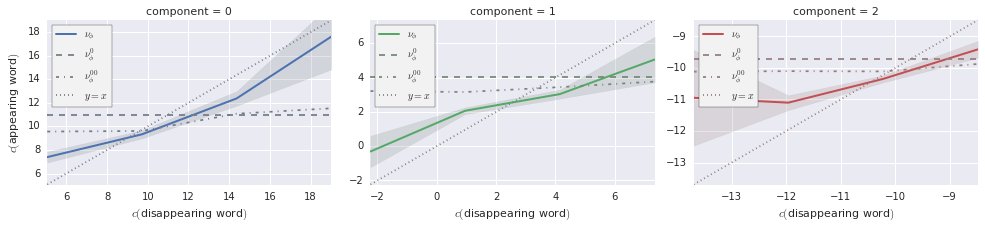

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.65598158  0.21098027]



aoa  frequency  letters_count
Component-0  0.753213  -0.396061       0.525173
Component-1 -0.345657   0.440958       0.828298

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 44026) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   17 of 44026) |                     | Elapsed Time: 0:00:02 ETA: 2:04:50

  0% (   51 of 44026) |                     | Elapsed Time: 0:00:03 ETA: 0:44:37

  0% (   82 of 44026) |                     | Elapsed Time: 0:00:03 ETA: 0:29:35

  0% (  110 of 44026) |                     | Elapsed Time: 0:00:03 ETA: 0:23:23

  0% (  138 of 44026) |                     | Elapsed Time: 0:00:03 ETA: 0:05:00

  0% (  166 of 44026) |                     | Elapsed Time: 0:00:03 ETA: 0:05:07

  0% (  194 of 44026) |                     | Elapsed Time: 0:00:04 ETA: 0:05:20

  0% (  223 of 44026) |                     | Elapsed Time: 0:00:04 ETA: 0:05:21

  0% (  253 of 44026) |                     | Elapsed Time: 0:00:04 ETA: 0:05:18

  0% (  284 of 44026) |                     | Elapsed Time: 0:00:04 ETA: 0:05:11

  0% (  315 of 44026) |                     | Elapsed Time: 0:00:04 ETA: 0:05:03

  0% (  346 of 44026) |                     | Elapsed Time: 0:00:05 ETA: 0:04:58

  0% (  376 of 44026) |                     | Elapsed Time: 0:00:05 ETA: 0:04:58

  0% (  406 of 44026) |                     | Elapsed Time: 0:00:05 ETA: 0:04:57

  0% (  434 of 44026) |                     | Elapsed Time: 0:00:05 ETA: 0:05:02

  1% (  464 of 44026) |                     | Elapsed Time: 0:00:06 ETA: 0:05:07

  1% (  495 of 44026) |                     | Elapsed Time: 0:00:06 ETA: 0:05:03

  1% (  525 of 44026) |                     | Elapsed Time: 0:00:06 ETA: 0:05:01

  1% (  565 of 44026) |                     | Elapsed Time: 0:00:06 ETA: 0:05:03

  1% (  595 of 44026) |                     | Elapsed Time: 0:00:06 ETA: 0:05:00

  1% (  624 of 44026) |                     | Elapsed Time: 0:00:07 ETA: 0:05:00

  1% (  654 of 44026) |                     | Elapsed Time: 0:00:07 ETA: 0:05:03

  1% (  684 of 44026) |                     | Elapsed Time: 0:00:07 ETA: 0:05:01

  1% (  714 of 44026) |                     | Elapsed Time: 0:00:07 ETA: 0:04:59

  1% (  744 of 44026) |                     | Elapsed Time: 0:00:07 ETA: 0:05:00

  1% (  775 of 44026) |                     | Elapsed Time: 0:00:08 ETA: 0:04:57

  1% (  807 of 44026) |                     | Elapsed Time: 0:00:08 ETA: 0:04:52

  1% (  839 of 44026) |                     | Elapsed Time: 0:00:08 ETA: 0:04:47

  1% (  870 of 44026) |                     | Elapsed Time: 0:00:08 ETA: 0:04:44

  2% (  902 of 44026) |                     | Elapsed Time: 0:00:08 ETA: 0:04:39

  2% (  936 of 44026) |                     | Elapsed Time: 0:00:09 ETA: 0:04:33

  2% (  967 of 44026) |                     | Elapsed Time: 0:00:09 ETA: 0:04:38

  2% ( 1000 of 44026) |                     | Elapsed Time: 0:00:09 ETA: 0:04:34

  2% ( 1031 of 44026) |                     | Elapsed Time: 0:00:09 ETA: 0:04:35

  2% ( 1064 of 44026) |                     | Elapsed Time: 0:00:10 ETA: 0:04:35

  2% ( 1101 of 44026) |                     | Elapsed Time: 0:00:10 ETA: 0:04:33

  2% ( 1133 of 44026) |                     | Elapsed Time: 0:00:10 ETA: 0:04:32

  2% ( 1166 of 44026) |                     | Elapsed Time: 0:00:10 ETA: 0:04:32

  2% ( 1198 of 44026) |                     | Elapsed Time: 0:00:10 ETA: 0:04:33

  2% ( 1232 of 44026) |                     | Elapsed Time: 0:00:11 ETA: 0:04:31

  2% ( 1265 of 44026) |                     | Elapsed Time: 0:00:11 ETA: 0:04:29

  2% ( 1297 of 44026) |                     | Elapsed Time: 0:00:11 ETA: 0:04:30

  3% ( 1330 of 44026) |                     | Elapsed Time: 0:00:11 ETA: 0:04:27

  3% ( 1364 of 44026) |                     | Elapsed Time: 0:00:11 ETA: 0:04:24

  3% ( 1401 of 44026) |                     | Elapsed Time: 0:00:12 ETA: 0:04:21

  3% ( 1435 of 44026) |                     | Elapsed Time: 0:00:12 ETA: 0:04:16

  3% ( 1469 of 44026) |                     | Elapsed Time: 0:00:12 ETA: 0:04:15

  3% ( 1495 of 44026) |                     | Elapsed Time: 0:00:12 ETA: 0:04:27

  3% ( 1517 of 44026) |                     | Elapsed Time: 0:00:12 ETA: 0:04:56

  3% ( 1539 of 44026) |                     | Elapsed Time: 0:00:13 ETA: 0:05:31

  3% ( 1561 of 44026) |                     | Elapsed Time: 0:00:13 ETA: 0:06:09

  3% ( 1581 of 44026) |                     | Elapsed Time: 0:00:13 ETA: 0:06:52

  3% ( 1602 of 44026) |                     | Elapsed Time: 0:00:13 ETA: 0:06:58

  3% ( 1622 of 44026) |                     | Elapsed Time: 0:00:13 ETA: 0:07:05

  3% ( 1642 of 44026) |                     | Elapsed Time: 0:00:14 ETA: 0:07:17

  3% ( 1661 of 44026) |                     | Elapsed Time: 0:00:14 ETA: 0:07:22

  3% ( 1681 of 44026) |                     | Elapsed Time: 0:00:14 ETA: 0:07:24

  3% ( 1701 of 44026) |                     | Elapsed Time: 0:00:14 ETA: 0:07:24

  3% ( 1721 of 44026) |                     | Elapsed Time: 0:00:15 ETA: 0:07:22

  3% ( 1741 of 44026) |                     | Elapsed Time: 0:00:15 ETA: 0:07:16

  4% ( 1762 of 44026) |                     | Elapsed Time: 0:00:15 ETA: 0:07:13

  4% ( 1782 of 44026) |                     | Elapsed Time: 0:00:15 ETA: 0:07:14

  4% ( 1803 of 44026) |                     | Elapsed Time: 0:00:15 ETA: 0:07:13

  4% ( 1822 of 44026) |                     | Elapsed Time: 0:00:16 ETA: 0:07:23

  4% ( 1843 of 44026) |                     | Elapsed Time: 0:00:16 ETA: 0:07:20

  4% ( 1868 of 44026) |                     | Elapsed Time: 0:00:16 ETA: 0:07:00

  4% ( 1888 of 44026) |                     | Elapsed Time: 0:00:16 ETA: 0:07:00

  4% ( 1908 of 44026) |                     | Elapsed Time: 0:00:16 ETA: 0:06:52

  4% ( 1929 of 44026) |                     | Elapsed Time: 0:00:17 ETA: 0:06:49

  4% ( 1963 of 44026) |                     | Elapsed Time: 0:00:17 ETA: 0:06:03

  4% ( 1999 of 44026) |                     | Elapsed Time: 0:00:17 ETA: 0:05:22

  4% ( 2035 of 44026) |                     | Elapsed Time: 0:00:17 ETA: 0:04:43

  4% ( 2071 of 44026) |                     | Elapsed Time: 0:00:17 ETA: 0:04:13

  4% ( 2107 of 44026) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:59

  4% ( 2143 of 44026) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:57

  4% ( 2179 of 44026) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:57

  5% ( 2220 of 44026) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:58

  5% ( 2252 of 44026) |#                    | Elapsed Time: 0:00:19 ETA: 0:04:04

  5% ( 2284 of 44026) |#                    | Elapsed Time: 0:00:19 ETA: 0:04:10

  5% ( 2317 of 44026) |#                    | Elapsed Time: 0:00:19 ETA: 0:04:16

  5% ( 2349 of 44026) |#                    | Elapsed Time: 0:00:19 ETA: 0:04:22

  5% ( 2381 of 44026) |#                    | Elapsed Time: 0:00:19 ETA: 0:04:23

  5% ( 2413 of 44026) |#                    | Elapsed Time: 0:00:20 ETA: 0:04:24

  5% ( 2445 of 44026) |#                    | Elapsed Time: 0:00:20 ETA: 0:04:25

  5% ( 2479 of 44026) |#                    | Elapsed Time: 0:00:20 ETA: 0:04:22

  5% ( 2515 of 44026) |#                    | Elapsed Time: 0:00:20 ETA: 0:04:17

  5% ( 2551 of 44026) |#                    | Elapsed Time: 0:00:20 ETA: 0:04:10

  5% ( 2587 of 44026) |#                    | Elapsed Time: 0:00:21 ETA: 0:04:04

  5% ( 2624 of 44026) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:57

  6% ( 2659 of 44026) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:58

  6% ( 2694 of 44026) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:58

  6% ( 2729 of 44026) |#                    | Elapsed Time: 0:00:21 ETA: 0:04:00

  6% ( 2769 of 44026) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:01

  6% ( 2804 of 44026) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:02

  6% ( 2838 of 44026) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:03

  6% ( 2872 of 44026) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:02

  6% ( 2905 of 44026) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:06

  6% ( 2939 of 44026) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:07

  6% ( 2975 of 44026) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:06

  6% ( 3010 of 44026) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:06

  6% ( 3044 of 44026) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:06

  6% ( 3078 of 44026) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:05

  7% ( 3111 of 44026) |#                    | Elapsed Time: 0:00:24 ETA: 0:04:07

  7% ( 3146 of 44026) |#                    | Elapsed Time: 0:00:24 ETA: 0:04:07

  7% ( 3182 of 44026) |#                    | Elapsed Time: 0:00:24 ETA: 0:04:06

  7% ( 3218 of 44026) |#                    | Elapsed Time: 0:00:24 ETA: 0:04:04

  7% ( 3254 of 44026) |#                    | Elapsed Time: 0:00:25 ETA: 0:03:56

  7% ( 3302 of 44026) |#                    | Elapsed Time: 0:00:25 ETA: 0:03:53

  7% ( 3336 of 44026) |#                    | Elapsed Time: 0:00:25 ETA: 0:03:57

  7% ( 3370 of 44026) |#                    | Elapsed Time: 0:00:25 ETA: 0:04:00

  7% ( 3404 of 44026) |#                    | Elapsed Time: 0:00:25 ETA: 0:04:04

  7% ( 3433 of 44026) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:16

  7% ( 3461 of 44026) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:30

  7% ( 3489 of 44026) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:39

  7% ( 3517 of 44026) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:49

  8% ( 3544 of 44026) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:58

  8% ( 3573 of 44026) |#                    | Elapsed Time: 0:00:27 ETA: 0:04:55

  8% ( 3602 of 44026) |#                    | Elapsed Time: 0:00:27 ETA: 0:04:54

  8% ( 3626 of 44026) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:06

  8% ( 3646 of 44026) |#                    | Elapsed Time: 0:00:27 ETA: 0:05:31

  8% ( 3665 of 44026) |#                    | Elapsed Time: 0:00:28 ETA: 0:06:02

  8% ( 3684 of 44026) |#                    | Elapsed Time: 0:00:28 ETA: 0:06:42

  8% ( 3719 of 44026) |#                    | Elapsed Time: 0:00:28 ETA: 0:06:15

  8% ( 3760 of 44026) |#                    | Elapsed Time: 0:00:28 ETA: 0:05:08

  8% ( 3793 of 44026) |#                    | Elapsed Time: 0:00:28 ETA: 0:04:33

  8% ( 3829 of 44026) |#                    | Elapsed Time: 0:00:29 ETA: 0:04:01

  8% ( 3871 of 44026) |#                    | Elapsed Time: 0:00:29 ETA: 0:03:44

  8% ( 3905 of 44026) |#                    | Elapsed Time: 0:00:29 ETA: 0:03:55

  8% ( 3939 of 44026) |#                    | Elapsed Time: 0:00:29 ETA: 0:03:58

  9% ( 3974 of 44026) |#                    | Elapsed Time: 0:00:29 ETA: 0:03:57

  9% ( 4009 of 44026) |#                    | Elapsed Time: 0:00:30 ETA: 0:03:57

  9% ( 4044 of 44026) |#                    | Elapsed Time: 0:00:30 ETA: 0:03:56

  9% ( 4080 of 44026) |#                    | Elapsed Time: 0:00:30 ETA: 0:03:55

  9% ( 4132 of 44026) |#                    | Elapsed Time: 0:00:30 ETA: 0:03:53

  9% ( 4169 of 44026) |#                    | Elapsed Time: 0:00:31 ETA: 0:03:51

  9% ( 4188 of 44026) |#                    | Elapsed Time: 0:00:31 ETA: 0:04:16

  9% ( 4209 of 44026) |##                   | Elapsed Time: 0:00:31 ETA: 0:04:48

  9% ( 4229 of 44026) |##                   | Elapsed Time: 0:00:31 ETA: 0:05:25

  9% ( 4250 of 44026) |##                   | Elapsed Time: 0:00:31 ETA: 0:06:17

  9% ( 4271 of 44026) |##                   | Elapsed Time: 0:00:32 ETA: 0:06:44

  9% ( 4292 of 44026) |##                   | Elapsed Time: 0:00:32 ETA: 0:06:36

  9% ( 4324 of 44026) |##                   | Elapsed Time: 0:00:32 ETA: 0:05:55

  9% ( 4356 of 44026) |##                   | Elapsed Time: 0:00:32 ETA: 0:05:17

 10% ( 4403 of 44026) |##                   | Elapsed Time: 0:00:33 ETA: 0:04:53

 10% ( 4436 of 44026) |##                   | Elapsed Time: 0:00:33 ETA: 0:04:21

 10% ( 4462 of 44026) |##                   | Elapsed Time: 0:00:33 ETA: 0:04:23

 10% ( 4488 of 44026) |##                   | Elapsed Time: 0:00:33 ETA: 0:04:35

 10% ( 4514 of 44026) |##                   | Elapsed Time: 0:00:33 ETA: 0:04:46

 10% ( 4539 of 44026) |##                   | Elapsed Time: 0:00:34 ETA: 0:05:21

 10% ( 4565 of 44026) |##                   | Elapsed Time: 0:00:34 ETA: 0:05:22

 10% ( 4590 of 44026) |##                   | Elapsed Time: 0:00:34 ETA: 0:05:23

 10% ( 4616 of 44026) |##                   | Elapsed Time: 0:00:34 ETA: 0:05:21

 10% ( 4646 of 44026) |##                   | Elapsed Time: 0:00:34 ETA: 0:05:05

 10% ( 4688 of 44026) |##                   | Elapsed Time: 0:00:35 ETA: 0:04:28

 10% ( 4728 of 44026) |##                   | Elapsed Time: 0:00:35 ETA: 0:04:01

 10% ( 4765 of 44026) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:44

 10% ( 4801 of 44026) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:30

 10% ( 4837 of 44026) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:32

 11% ( 4871 of 44026) |##                   | Elapsed Time: 0:00:36 ETA: 0:03:42

 11% ( 4900 of 44026) |##                   | Elapsed Time: 0:00:36 ETA: 0:03:57

 11% ( 4929 of 44026) |##                   | Elapsed Time: 0:00:36 ETA: 0:04:10

 11% ( 4967 of 44026) |##                   | Elapsed Time: 0:00:36 ETA: 0:04:24

 11% ( 4995 of 44026) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:36

 11% ( 5026 of 44026) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:37

 11% ( 5056 of 44026) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:33

 11% ( 5086 of 44026) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:32

 11% ( 5116 of 44026) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:29

 11% ( 5146 of 44026) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:31

 11% ( 5174 of 44026) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:34

 11% ( 5202 of 44026) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:37

 11% ( 5230 of 44026) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:39

 11% ( 5258 of 44026) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:42

 12% ( 5286 of 44026) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:44

 12% ( 5314 of 44026) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:43

 12% ( 5342 of 44026) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:43

 12% ( 5370 of 44026) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:41

 12% ( 5397 of 44026) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:44

 12% ( 5427 of 44026) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:41

 12% ( 5457 of 44026) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:38

 12% ( 5487 of 44026) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:35

 12% ( 5519 of 44026) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:30

 12% ( 5549 of 44026) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:25

 12% ( 5580 of 44026) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:22

 12% ( 5610 of 44026) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:21

 12% ( 5640 of 44026) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:21

 12% ( 5670 of 44026) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:21

 12% ( 5700 of 44026) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:22

 13% ( 5730 of 44026) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:21

 13% ( 5760 of 44026) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:20

 13% ( 5790 of 44026) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:21

 13% ( 5820 of 44026) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:21

 13% ( 5850 of 44026) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:22

 13% ( 5880 of 44026) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:22

 13% ( 5910 of 44026) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:21

 13% ( 5940 of 44026) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:21

 13% ( 5969 of 44026) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:22

 13% ( 5998 of 44026) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:22

 13% ( 6028 of 44026) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:22

 13% ( 6069 of 44026) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:22

 13% ( 6099 of 44026) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:21

 13% ( 6129 of 44026) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:19

 13% ( 6161 of 44026) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:16

 14% ( 6191 of 44026) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:15

 14% ( 6221 of 44026) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:13

 14% ( 6251 of 44026) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:14

 14% ( 6281 of 44026) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:16

 14% ( 6311 of 44026) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:18

 14% ( 6341 of 44026) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:18

 14% ( 6371 of 44026) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:18

 14% ( 6401 of 44026) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:17

 14% ( 6431 of 44026) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:17

 14% ( 6461 of 44026) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:17

 14% ( 6491 of 44026) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:17

 14% ( 6521 of 44026) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:16

 14% ( 6551 of 44026) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:16

 14% ( 6581 of 44026) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:17

 15% ( 6619 of 44026) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:17

 15% ( 6649 of 44026) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:15

 15% ( 6679 of 44026) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:15

 15% ( 6709 of 44026) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:15

 15% ( 6739 of 44026) |###                  | Elapsed Time: 0:00:49 ETA: 0:04:15

 15% ( 6769 of 44026) |###                  | Elapsed Time: 0:00:49 ETA: 0:04:13

 15% ( 6799 of 44026) |###                  | Elapsed Time: 0:00:49 ETA: 0:04:12

 15% ( 6830 of 44026) |###                  | Elapsed Time: 0:00:49 ETA: 0:04:11

 15% ( 6863 of 44026) |###                  | Elapsed Time: 0:00:49 ETA: 0:04:05

 15% ( 6900 of 44026) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:54

 15% ( 6934 of 44026) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:47

 15% ( 6969 of 44026) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:41

 15% ( 7001 of 44026) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:39

 15% ( 7035 of 44026) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:43

 16% ( 7067 of 44026) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:51

 16% ( 7101 of 44026) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:49

 16% ( 7134 of 44026) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:50

 16% ( 7173 of 44026) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:45

 16% ( 7204 of 44026) |###                  | Elapsed Time: 0:00:52 ETA: 0:03:47

 16% ( 7239 of 44026) |###                  | Elapsed Time: 0:00:52 ETA: 0:03:45

 16% ( 7273 of 44026) |###                  | Elapsed Time: 0:00:52 ETA: 0:03:44

 16% ( 7305 of 44026) |###                  | Elapsed Time: 0:00:52 ETA: 0:03:47

 16% ( 7340 of 44026) |###                  | Elapsed Time: 0:00:52 ETA: 0:03:46

 16% ( 7375 of 44026) |###                  | Elapsed Time: 0:00:53 ETA: 0:03:41

 16% ( 7408 of 44026) |###                  | Elapsed Time: 0:00:53 ETA: 0:03:43

 16% ( 7441 of 44026) |###                  | Elapsed Time: 0:00:53 ETA: 0:03:44

 16% ( 7476 of 44026) |###                  | Elapsed Time: 0:00:53 ETA: 0:03:41

 17% ( 7508 of 44026) |###                  | Elapsed Time: 0:00:53 ETA: 0:03:44

 17% ( 7540 of 44026) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:47

 17% ( 7575 of 44026) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:44

 17% ( 7609 of 44026) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:44

 17% ( 7642 of 44026) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:45

 17% ( 7677 of 44026) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:41

 17% ( 7721 of 44026) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:43

 17% ( 7752 of 44026) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:48

 17% ( 7782 of 44026) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:52

 17% ( 7810 of 44026) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:59

 17% ( 7842 of 44026) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:03

 17% ( 7871 of 44026) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:09

 17% ( 7902 of 44026) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:08

 18% ( 7934 of 44026) |###                  | Elapsed Time: 0:00:56 ETA: 0:04:02

 18% ( 7966 of 44026) |###                  | Elapsed Time: 0:00:56 ETA: 0:03:59

 18% ( 7993 of 44026) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:01

 18% ( 8022 of 44026) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:04

 18% ( 8054 of 44026) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:05

 18% ( 8086 of 44026) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:03

 18% ( 8116 of 44026) |###                  | Elapsed Time: 0:00:57 ETA: 0:04:04

 18% ( 8144 of 44026) |###                  | Elapsed Time: 0:00:58 ETA: 0:04:06

 18% ( 8177 of 44026) |###                  | Elapsed Time: 0:00:58 ETA: 0:03:57

 18% ( 8210 of 44026) |###                  | Elapsed Time: 0:00:58 ETA: 0:03:55

 18% ( 8255 of 44026) |###                  | Elapsed Time: 0:00:58 ETA: 0:03:56

 18% ( 8285 of 44026) |###                  | Elapsed Time: 0:00:58 ETA: 0:03:54

 18% ( 8315 of 44026) |###                  | Elapsed Time: 0:00:59 ETA: 0:03:53

 18% ( 8347 of 44026) |###                  | Elapsed Time: 0:00:59 ETA: 0:03:55

 19% ( 8376 of 44026) |###                  | Elapsed Time: 0:00:59 ETA: 0:04:00

 19% ( 8406 of 44026) |####                 | Elapsed Time: 0:00:59 ETA: 0:04:05

 19% ( 8439 of 44026) |####                 | Elapsed Time: 0:01:00 ETA: 0:04:00

 19% ( 8471 of 44026) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:57

 19% ( 8504 of 44026) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:55

 19% ( 8537 of 44026) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:49

 19% ( 8569 of 44026) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:45

 19% ( 8600 of 44026) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:46

 19% ( 8633 of 44026) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:46

 19% ( 8667 of 44026) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:44

 19% ( 8699 of 44026) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:44

 19% ( 8731 of 44026) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:41

 19% ( 8764 of 44026) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:39

 20% ( 8806 of 44026) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:47

 20% ( 8849 of 44026) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:56

 20% ( 8881 of 44026) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:57

 20% ( 8914 of 44026) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:58

 20% ( 8948 of 44026) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:49

 20% ( 8981 of 44026) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:42

 20% ( 9013 of 44026) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:37

 20% ( 9047 of 44026) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:35

 20% ( 9080 of 44026) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:36

 20% ( 9113 of 44026) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:38

 20% ( 9146 of 44026) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:38

 20% ( 9179 of 44026) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:37

 20% ( 9211 of 44026) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:37

 20% ( 9242 of 44026) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:39

 21% ( 9275 of 44026) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:40

 21% ( 9309 of 44026) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:38

 21% ( 9356 of 44026) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:36

 21% ( 9388 of 44026) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:34

 21% ( 9419 of 44026) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:37

 21% ( 9452 of 44026) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:39

 21% ( 9486 of 44026) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:38

 21% ( 9519 of 44026) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:35

 21% ( 9551 of 44026) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:35

 21% ( 9583 of 44026) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:33

 21% ( 9613 of 44026) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:39

 21% ( 9644 of 44026) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:43

 21% ( 9676 of 44026) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:45

 22% ( 9707 of 44026) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:47

 22% ( 9739 of 44026) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:44

 22% ( 9771 of 44026) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:43

 22% ( 9803 of 44026) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:39

 22% ( 9836 of 44026) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:38

 22% ( 9869 of 44026) |####                 | Elapsed Time: 0:01:09 ETA: 0:03:36

 22% ( 9906 of 44026) |####                 | Elapsed Time: 0:01:09 ETA: 0:03:35

 22% ( 9938 of 44026) |####                 | Elapsed Time: 0:01:09 ETA: 0:03:35

 22% ( 9968 of 44026) |####                 | Elapsed Time: 0:01:09 ETA: 0:03:38

 22% (10000 of 44026) |####                 | Elapsed Time: 0:01:09 ETA: 0:03:38

 22% (10032 of 44026) |####                 | Elapsed Time: 0:01:10 ETA: 0:03:41

 22% (10064 of 44026) |####                 | Elapsed Time: 0:01:10 ETA: 0:03:42

 22% (10096 of 44026) |####                 | Elapsed Time: 0:01:10 ETA: 0:03:41

 23% (10127 of 44026) |####                 | Elapsed Time: 0:01:10 ETA: 0:03:39

 23% (10158 of 44026) |####                 | Elapsed Time: 0:01:11 ETA: 0:03:41

 23% (10190 of 44026) |####                 | Elapsed Time: 0:01:11 ETA: 0:03:40

 23% (10220 of 44026) |####                 | Elapsed Time: 0:01:11 ETA: 0:03:43

 23% (10250 of 44026) |####                 | Elapsed Time: 0:01:11 ETA: 0:03:44

 23% (10283 of 44026) |####                 | Elapsed Time: 0:01:11 ETA: 0:03:40

 23% (10311 of 44026) |####                 | Elapsed Time: 0:01:12 ETA: 0:03:45

 23% (10343 of 44026) |####                 | Elapsed Time: 0:01:12 ETA: 0:03:46

 23% (10375 of 44026) |####                 | Elapsed Time: 0:01:12 ETA: 0:03:41

 23% (10408 of 44026) |####                 | Elapsed Time: 0:01:12 ETA: 0:03:40

 23% (10440 of 44026) |####                 | Elapsed Time: 0:01:12 ETA: 0:03:36

 23% (10473 of 44026) |####                 | Elapsed Time: 0:01:13 ETA: 0:03:36

 23% (10506 of 44026) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:34

 23% (10543 of 44026) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:28

 24% (10579 of 44026) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:24

 24% (10613 of 44026) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:20

 24% (10648 of 44026) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:15

 24% (10681 of 44026) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:17

 24% (10714 of 44026) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:23

 24% (10747 of 44026) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:24

 24% (10780 of 44026) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:24

 24% (10814 of 44026) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:26

 24% (10847 of 44026) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:23

 24% (10881 of 44026) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:23

 24% (10914 of 44026) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:22

 24% (10963 of 44026) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:23

 25% (11007 of 44026) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:25

 25% (11044 of 44026) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:21

 25% (11084 of 44026) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:13

 25% (11124 of 44026) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:06

 25% (11162 of 44026) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:00

 25% (11200 of 44026) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:54

 25% (11237 of 44026) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:56

 25% (11275 of 44026) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:57

 25% (11314 of 44026) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:57

 25% (11352 of 44026) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:56

 25% (11391 of 44026) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:55

 25% (11419 of 44026) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:05

 25% (11445 of 44026) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:21

 26% (11472 of 44026) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:38

 26% (11498 of 44026) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:57

 26% (11525 of 44026) |#####                | Elapsed Time: 0:01:19 ETA: 0:04:12

 26% (11557 of 44026) |#####                | Elapsed Time: 0:01:19 ETA: 0:04:11

 26% (11596 of 44026) |#####                | Elapsed Time: 0:01:19 ETA: 0:04:11

 26% (11635 of 44026) |#####                | Elapsed Time: 0:01:20 ETA: 0:04:10

 26% (11674 of 44026) |#####                | Elapsed Time: 0:01:20 ETA: 0:04:09

 26% (11700 of 44026) |#####                | Elapsed Time: 0:01:20 ETA: 0:04:11

 26% (11731 of 44026) |#####                | Elapsed Time: 0:01:21 ETA: 0:04:04

 26% (11765 of 44026) |#####                | Elapsed Time: 0:01:21 ETA: 0:03:50

 26% (11799 of 44026) |#####                | Elapsed Time: 0:01:21 ETA: 0:03:38

 26% (11835 of 44026) |#####                | Elapsed Time: 0:01:21 ETA: 0:03:23

 26% (11871 of 44026) |#####                | Elapsed Time: 0:01:21 ETA: 0:03:11

 27% (11907 of 44026) |#####                | Elapsed Time: 0:01:22 ETA: 0:03:08

 27% (11943 of 44026) |#####                | Elapsed Time: 0:01:22 ETA: 0:03:06

 27% (11980 of 44026) |#####                | Elapsed Time: 0:01:22 ETA: 0:03:03

 27% (12016 of 44026) |#####                | Elapsed Time: 0:01:22 ETA: 0:03:03

 27% (12052 of 44026) |#####                | Elapsed Time: 0:01:22 ETA: 0:03:02

 27% (12088 of 44026) |#####                | Elapsed Time: 0:01:23 ETA: 0:03:03

 27% (12127 of 44026) |#####                | Elapsed Time: 0:01:23 ETA: 0:03:02

 27% (12163 of 44026) |#####                | Elapsed Time: 0:01:23 ETA: 0:03:02

 27% (12197 of 44026) |#####                | Elapsed Time: 0:01:23 ETA: 0:03:04

 27% (12230 of 44026) |#####                | Elapsed Time: 0:01:23 ETA: 0:03:07

 27% (12264 of 44026) |#####                | Elapsed Time: 0:01:24 ETA: 0:03:08

 27% (12298 of 44026) |#####                | Elapsed Time: 0:01:24 ETA: 0:03:12

 28% (12331 of 44026) |#####                | Elapsed Time: 0:01:24 ETA: 0:03:15

 28% (12365 of 44026) |#####                | Elapsed Time: 0:01:24 ETA: 0:03:16

 28% (12399 of 44026) |#####                | Elapsed Time: 0:01:24 ETA: 0:03:15

 28% (12432 of 44026) |#####                | Elapsed Time: 0:01:25 ETA: 0:03:16

 28% (12464 of 44026) |#####                | Elapsed Time: 0:01:25 ETA: 0:03:17

 28% (12494 of 44026) |#####                | Elapsed Time: 0:01:25 ETA: 0:03:22

 28% (12522 of 44026) |#####                | Elapsed Time: 0:01:25 ETA: 0:03:31

 28% (12550 of 44026) |#####                | Elapsed Time: 0:01:26 ETA: 0:03:40

 28% (12578 of 44026) |#####                | Elapsed Time: 0:01:26 ETA: 0:03:47

 28% (12607 of 44026) |######               | Elapsed Time: 0:01:26 ETA: 0:03:51

 28% (12635 of 44026) |######               | Elapsed Time: 0:01:26 ETA: 0:03:51

 28% (12673 of 44026) |######               | Elapsed Time: 0:01:26 ETA: 0:03:49

 28% (12702 of 44026) |######               | Elapsed Time: 0:01:27 ETA: 0:03:46

 28% (12730 of 44026) |######               | Elapsed Time: 0:01:27 ETA: 0:03:48

 28% (12757 of 44026) |######               | Elapsed Time: 0:01:27 ETA: 0:03:48

 29% (12785 of 44026) |######               | Elapsed Time: 0:01:27 ETA: 0:03:47

 29% (12819 of 44026) |######               | Elapsed Time: 0:01:27 ETA: 0:03:38

 29% (12857 of 44026) |######               | Elapsed Time: 0:01:28 ETA: 0:03:24

 29% (12895 of 44026) |######               | Elapsed Time: 0:01:28 ETA: 0:03:08

 29% (12928 of 44026) |######               | Elapsed Time: 0:01:28 ETA: 0:03:03

 29% (12961 of 44026) |######               | Elapsed Time: 0:01:28 ETA: 0:02:59

 29% (12995 of 44026) |######               | Elapsed Time: 0:01:28 ETA: 0:03:04

 29% (13029 of 44026) |######               | Elapsed Time: 0:01:29 ETA: 0:03:10

 29% (13061 of 44026) |######               | Elapsed Time: 0:01:29 ETA: 0:03:19

 29% (13093 of 44026) |######               | Elapsed Time: 0:01:29 ETA: 0:03:14

 29% (13125 of 44026) |######               | Elapsed Time: 0:01:29 ETA: 0:03:15

 29% (13158 of 44026) |######               | Elapsed Time: 0:01:30 ETA: 0:03:15

 29% (13191 of 44026) |######               | Elapsed Time: 0:01:30 ETA: 0:03:15

 30% (13227 of 44026) |######               | Elapsed Time: 0:01:30 ETA: 0:03:17

 30% (13280 of 44026) |######               | Elapsed Time: 0:01:30 ETA: 0:03:09

 30% (13312 of 44026) |######               | Elapsed Time: 0:01:30 ETA: 0:03:09

 30% (13345 of 44026) |######               | Elapsed Time: 0:01:31 ETA: 0:03:09

 30% (13378 of 44026) |######               | Elapsed Time: 0:01:31 ETA: 0:03:06

 30% (13410 of 44026) |######               | Elapsed Time: 0:01:31 ETA: 0:03:13

 30% (13442 of 44026) |######               | Elapsed Time: 0:01:31 ETA: 0:03:12

 30% (13474 of 44026) |######               | Elapsed Time: 0:01:31 ETA: 0:03:13

 30% (13507 of 44026) |######               | Elapsed Time: 0:01:32 ETA: 0:03:12

 30% (13541 of 44026) |######               | Elapsed Time: 0:01:32 ETA: 0:03:11

 30% (13575 of 44026) |######               | Elapsed Time: 0:01:32 ETA: 0:03:09

 30% (13609 of 44026) |######               | Elapsed Time: 0:01:32 ETA: 0:03:08

 30% (13644 of 44026) |######               | Elapsed Time: 0:01:33 ETA: 0:03:05

 31% (13677 of 44026) |######               | Elapsed Time: 0:01:33 ETA: 0:03:05

 31% (13713 of 44026) |######               | Elapsed Time: 0:01:33 ETA: 0:03:03

 31% (13759 of 44026) |######               | Elapsed Time: 0:01:33 ETA: 0:03:00

 31% (13794 of 44026) |######               | Elapsed Time: 0:01:33 ETA: 0:02:59

 31% (13828 of 44026) |######               | Elapsed Time: 0:01:34 ETA: 0:02:59

 31% (13862 of 44026) |######               | Elapsed Time: 0:01:34 ETA: 0:03:00

 31% (13897 of 44026) |######               | Elapsed Time: 0:01:34 ETA: 0:03:00

 31% (13931 of 44026) |######               | Elapsed Time: 0:01:34 ETA: 0:03:01

 31% (13965 of 44026) |######               | Elapsed Time: 0:01:34 ETA: 0:03:01

 31% (13998 of 44026) |######               | Elapsed Time: 0:01:35 ETA: 0:03:02

 31% (14030 of 44026) |######               | Elapsed Time: 0:01:35 ETA: 0:03:05

 31% (14062 of 44026) |######               | Elapsed Time: 0:01:35 ETA: 0:03:08

 32% (14094 of 44026) |######               | Elapsed Time: 0:01:35 ETA: 0:03:10

 32% (14129 of 44026) |######               | Elapsed Time: 0:01:35 ETA: 0:03:09

 32% (14165 of 44026) |######               | Elapsed Time: 0:01:36 ETA: 0:03:03

 32% (14203 of 44026) |######               | Elapsed Time: 0:01:36 ETA: 0:02:57

 32% (14239 of 44026) |######               | Elapsed Time: 0:01:36 ETA: 0:02:52

 32% (14276 of 44026) |######               | Elapsed Time: 0:01:36 ETA: 0:02:46

 32% (14328 of 44026) |######               | Elapsed Time: 0:01:37 ETA: 0:02:43

 32% (14366 of 44026) |######               | Elapsed Time: 0:01:37 ETA: 0:02:42

 32% (14405 of 44026) |######               | Elapsed Time: 0:01:37 ETA: 0:02:39

 32% (14438 of 44026) |######               | Elapsed Time: 0:01:37 ETA: 0:02:43

 32% (14471 of 44026) |######               | Elapsed Time: 0:01:37 ETA: 0:02:48

 32% (14510 of 44026) |######               | Elapsed Time: 0:01:38 ETA: 0:02:49

 33% (14548 of 44026) |######               | Elapsed Time: 0:01:38 ETA: 0:02:48

 33% (14588 of 44026) |######               | Elapsed Time: 0:01:38 ETA: 0:02:46

 33% (14627 of 44026) |######               | Elapsed Time: 0:01:38 ETA: 0:02:37

 33% (14666 of 44026) |######               | Elapsed Time: 0:01:38 ETA: 0:02:34

 33% (14706 of 44026) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:34

 33% (14745 of 44026) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:34

 33% (14785 of 44026) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:34

 33% (14824 of 44026) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:33

 33% (14878 of 44026) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:34

 33% (14916 of 44026) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:35

 33% (14955 of 44026) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:35

 34% (14993 of 44026) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:36

 34% (15031 of 44026) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:36

 34% (15070 of 44026) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:35

 34% (15109 of 44026) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:34

 34% (15148 of 44026) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:32

 34% (15186 of 44026) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:32

 34% (15224 of 44026) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:32

 34% (15260 of 44026) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:35

 34% (15293 of 44026) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:41

 34% (15329 of 44026) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:44

 34% (15366 of 44026) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:44

 35% (15410 of 44026) |#######              | Elapsed Time: 0:01:43 ETA: 0:02:47

 35% (15438 of 44026) |#######              | Elapsed Time: 0:01:43 ETA: 0:02:53

 35% (15467 of 44026) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:01

 35% (15496 of 44026) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:10

 35% (15523 of 44026) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:24

 35% (15549 of 44026) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:33

 35% (15575 of 44026) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:38

 35% (15611 of 44026) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:26

 35% (15646 of 44026) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:14

 35% (15674 of 44026) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:12

 35% (15704 of 44026) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:04

 35% (15734 of 44026) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:05

 35% (15764 of 44026) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:12

 35% (15794 of 44026) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:11

 35% (15824 of 44026) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:11

 36% (15854 of 44026) |#######              | Elapsed Time: 0:01:46 ETA: 0:03:11

 36% (15884 of 44026) |#######              | Elapsed Time: 0:01:46 ETA: 0:03:11

 36% (15911 of 44026) |#######              | Elapsed Time: 0:01:46 ETA: 0:03:15

 36% (15939 of 44026) |#######              | Elapsed Time: 0:01:46 ETA: 0:03:19

 36% (15978 of 44026) |#######              | Elapsed Time: 0:01:46 ETA: 0:03:09

 36% (16009 of 44026) |#######              | Elapsed Time: 0:01:47 ETA: 0:03:07

 36% (16047 of 44026) |#######              | Elapsed Time: 0:01:47 ETA: 0:02:56

 36% (16080 of 44026) |#######              | Elapsed Time: 0:01:47 ETA: 0:02:47

 36% (16115 of 44026) |#######              | Elapsed Time: 0:01:47 ETA: 0:02:45

 36% (16149 of 44026) |#######              | Elapsed Time: 0:01:47 ETA: 0:02:44

 36% (16179 of 44026) |#######              | Elapsed Time: 0:01:48 ETA: 0:02:50

 36% (16210 of 44026) |#######              | Elapsed Time: 0:01:48 ETA: 0:02:56

 36% (16237 of 44026) |#######              | Elapsed Time: 0:01:48 ETA: 0:03:01

 36% (16269 of 44026) |#######              | Elapsed Time: 0:01:48 ETA: 0:03:09

 37% (16301 of 44026) |#######              | Elapsed Time: 0:01:48 ETA: 0:03:08

 37% (16336 of 44026) |#######              | Elapsed Time: 0:01:49 ETA: 0:03:02

 37% (16372 of 44026) |#######              | Elapsed Time: 0:01:49 ETA: 0:02:53

 37% (16408 of 44026) |#######              | Elapsed Time: 0:01:49 ETA: 0:02:44

 37% (16444 of 44026) |#######              | Elapsed Time: 0:01:49 ETA: 0:02:39

 37% (16478 of 44026) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:38

 37% (16528 of 44026) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:39

 37% (16561 of 44026) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:41

 37% (16594 of 44026) |#######              | Elapsed Time: 0:01:50 ETA: 0:02:45

 37% (16615 of 44026) |#######              | Elapsed Time: 0:01:50 ETA: 0:03:01

 37% (16636 of 44026) |#######              | Elapsed Time: 0:01:51 ETA: 0:03:18

 37% (16657 of 44026) |#######              | Elapsed Time: 0:01:51 ETA: 0:03:51

 37% (16679 of 44026) |#######              | Elapsed Time: 0:01:51 ETA: 0:04:26

 37% (16714 of 44026) |#######              | Elapsed Time: 0:01:51 ETA: 0:03:56

 38% (16753 of 44026) |#######              | Elapsed Time: 0:01:51 ETA: 0:03:19

 38% (16791 of 44026) |########             | Elapsed Time: 0:01:52 ETA: 0:02:54

 38% (16829 of 44026) |########             | Elapsed Time: 0:01:52 ETA: 0:02:36

 38% (16867 of 44026) |########             | Elapsed Time: 0:01:52 ETA: 0:02:27

 38% (16905 of 44026) |########             | Elapsed Time: 0:01:52 ETA: 0:02:26

 38% (16943 of 44026) |########             | Elapsed Time: 0:01:53 ETA: 0:02:27

 38% (16974 of 44026) |########             | Elapsed Time: 0:01:53 ETA: 0:02:32

 38% (17006 of 44026) |########             | Elapsed Time: 0:01:53 ETA: 0:02:38

 38% (17038 of 44026) |########             | Elapsed Time: 0:01:53 ETA: 0:02:44

 38% (17077 of 44026) |########             | Elapsed Time: 0:01:53 ETA: 0:02:53

 38% (17108 of 44026) |########             | Elapsed Time: 0:01:54 ETA: 0:02:59

 38% (17140 of 44026) |########             | Elapsed Time: 0:01:54 ETA: 0:02:57

 39% (17172 of 44026) |########             | Elapsed Time: 0:01:54 ETA: 0:02:57

 39% (17203 of 44026) |########             | Elapsed Time: 0:01:54 ETA: 0:02:56

 39% (17240 of 44026) |########             | Elapsed Time: 0:01:54 ETA: 0:02:49

 39% (17278 of 44026) |########             | Elapsed Time: 0:01:55 ETA: 0:02:42

 39% (17312 of 44026) |########             | Elapsed Time: 0:01:55 ETA: 0:02:39

 39% (17347 of 44026) |########             | Elapsed Time: 0:01:55 ETA: 0:02:34

 39% (17383 of 44026) |########             | Elapsed Time: 0:01:55 ETA: 0:02:32

 39% (17421 of 44026) |########             | Elapsed Time: 0:01:55 ETA: 0:02:31

 39% (17458 of 44026) |########             | Elapsed Time: 0:01:56 ETA: 0:02:30

 39% (17496 of 44026) |########             | Elapsed Time: 0:01:56 ETA: 0:02:27

 39% (17535 of 44026) |########             | Elapsed Time: 0:01:56 ETA: 0:02:23

 39% (17574 of 44026) |########             | Elapsed Time: 0:01:56 ETA: 0:02:22

 40% (17611 of 44026) |########             | Elapsed Time: 0:01:56 ETA: 0:02:24

 40% (17646 of 44026) |########             | Elapsed Time: 0:01:57 ETA: 0:02:26

 40% (17681 of 44026) |########             | Elapsed Time: 0:01:57 ETA: 0:02:28

 40% (17715 of 44026) |########             | Elapsed Time: 0:01:57 ETA: 0:02:35

 40% (17745 of 44026) |########             | Elapsed Time: 0:01:57 ETA: 0:02:40

 40% (17775 of 44026) |########             | Elapsed Time: 0:01:58 ETA: 0:02:46

 40% (17805 of 44026) |########             | Elapsed Time: 0:01:58 ETA: 0:02:53

 40% (17834 of 44026) |########             | Elapsed Time: 0:01:58 ETA: 0:03:01

 40% (17871 of 44026) |########             | Elapsed Time: 0:01:58 ETA: 0:02:53

 40% (17908 of 44026) |########             | Elapsed Time: 0:01:58 ETA: 0:02:44

 40% (17948 of 44026) |########             | Elapsed Time: 0:01:59 ETA: 0:02:33

 40% (17979 of 44026) |########             | Elapsed Time: 0:01:59 ETA: 0:02:30

 40% (18011 of 44026) |########             | Elapsed Time: 0:01:59 ETA: 0:02:31

 40% (18045 of 44026) |########             | Elapsed Time: 0:01:59 ETA: 0:02:33

 41% (18079 of 44026) |########             | Elapsed Time: 0:01:59 ETA: 0:02:38

 41% (18113 of 44026) |########             | Elapsed Time: 0:02:00 ETA: 0:02:40

 41% (18161 of 44026) |########             | Elapsed Time: 0:02:00 ETA: 0:02:35

 41% (18196 of 44026) |########             | Elapsed Time: 0:02:00 ETA: 0:02:34

 41% (18231 of 44026) |########             | Elapsed Time: 0:02:00 ETA: 0:02:33

 41% (18262 of 44026) |########             | Elapsed Time: 0:02:00 ETA: 0:02:35

 41% (18293 of 44026) |########             | Elapsed Time: 0:02:01 ETA: 0:02:37

 41% (18329 of 44026) |########             | Elapsed Time: 0:02:01 ETA: 0:02:36

 41% (18371 of 44026) |########             | Elapsed Time: 0:02:01 ETA: 0:02:30

 41% (18411 of 44026) |########             | Elapsed Time: 0:02:01 ETA: 0:02:23

 41% (18449 of 44026) |########             | Elapsed Time: 0:02:02 ETA: 0:02:17

 41% (18488 of 44026) |########             | Elapsed Time: 0:02:02 ETA: 0:02:14

 42% (18521 of 44026) |########             | Elapsed Time: 0:02:02 ETA: 0:02:16

 42% (18559 of 44026) |########             | Elapsed Time: 0:02:02 ETA: 0:02:18

 42% (18596 of 44026) |########             | Elapsed Time: 0:02:02 ETA: 0:02:21

 42% (18628 of 44026) |########             | Elapsed Time: 0:02:03 ETA: 0:02:26

 42% (18660 of 44026) |########             | Elapsed Time: 0:02:03 ETA: 0:02:30

 42% (18690 of 44026) |########             | Elapsed Time: 0:02:03 ETA: 0:02:37

 42% (18726 of 44026) |########             | Elapsed Time: 0:02:03 ETA: 0:02:47

 42% (18755 of 44026) |########             | Elapsed Time: 0:02:03 ETA: 0:02:54

 42% (18786 of 44026) |########             | Elapsed Time: 0:02:04 ETA: 0:02:55

 42% (18819 of 44026) |########             | Elapsed Time: 0:02:04 ETA: 0:02:51

 42% (18853 of 44026) |########             | Elapsed Time: 0:02:04 ETA: 0:02:46

 42% (18887 of 44026) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:38

 42% (18921 of 44026) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:32

 43% (18955 of 44026) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:30

 43% (18989 of 44026) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:29

 43% (19023 of 44026) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:29

 43% (19057 of 44026) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:30

 43% (19090 of 44026) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:31

 43% (19124 of 44026) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:31

 43% (19158 of 44026) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:31

 43% (19192 of 44026) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:31

 43% (19226 of 44026) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:29

 43% (19262 of 44026) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:29

 43% (19296 of 44026) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:28

 43% (19329 of 44026) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:29

 43% (19355 of 44026) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:38

 44% (19391 of 44026) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:36

 44% (19429 of 44026) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:32

 44% (19468 of 44026) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:27

 44% (19504 of 44026) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:16

 44% (19538 of 44026) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:16

 44% (19572 of 44026) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:20

 44% (19606 of 44026) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:23

 44% (19639 of 44026) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:28

 44% (19673 of 44026) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:28

 44% (19713 of 44026) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:22

 44% (19753 of 44026) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:18

 44% (19783 of 44026) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:21

 45% (19831 of 44026) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:17

 45% (19867 of 44026) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:18

 45% (19902 of 44026) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:21

 45% (19938 of 44026) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:19

 45% (19975 of 44026) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:16

 45% (20008 of 44026) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:19

 45% (20042 of 44026) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:20

 45% (20076 of 44026) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:23

 45% (20111 of 44026) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:23

 45% (20147 of 44026) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:23

 45% (20183 of 44026) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:21

 45% (20219 of 44026) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:20

 46% (20255 of 44026) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:18

 46% (20290 of 44026) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:18

 46% (20325 of 44026) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:18

 46% (20363 of 44026) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:20

 46% (20395 of 44026) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:22

 46% (20427 of 44026) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:25

 46% (20459 of 44026) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:28

 46% (20491 of 44026) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:30

 46% (20523 of 44026) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:31

 46% (20555 of 44026) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:31

 46% (20587 of 44026) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:31

 46% (20619 of 44026) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:31

 46% (20651 of 44026) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:31

 46% (20683 of 44026) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:30

 47% (20718 of 44026) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:26

 47% (20755 of 44026) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:21

 47% (20806 of 44026) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:18

 47% (20839 of 44026) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:16

 47% (20867 of 44026) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:23

 47% (20895 of 44026) |#########            | Elapsed Time: 0:02:16 ETA: 0:02:31

 47% (20927 of 44026) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:36

 47% (20955 of 44026) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:49

 47% (20983 of 44026) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:49

 47% (21011 of 44026) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:51

 47% (21037 of 44026) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:54

 47% (21065 of 44026) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:55

 47% (21093 of 44026) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:55

 47% (21129 of 44026) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:44

 48% (21162 of 44026) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:36

 48% (21186 of 44026) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:40

 48% (21209 of 44026) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:46

 48% (21232 of 44026) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:59

 48% (21261 of 44026) |##########           | Elapsed Time: 0:02:19 ETA: 0:03:10

 48% (21294 of 44026) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:59

 48% (21329 of 44026) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:41

 48% (21360 of 44026) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:33

 48% (21394 of 44026) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:21

 48% (21428 of 44026) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:21

 48% (21463 of 44026) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:22

 48% (21495 of 44026) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:19

 48% (21527 of 44026) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:21

 48% (21560 of 44026) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:21

 49% (21594 of 44026) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:21

 49% (21627 of 44026) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:21

 49% (21660 of 44026) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:20

 49% (21692 of 44026) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:20

 49% (21727 of 44026) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:19

 49% (21762 of 44026) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:16

 49% (21788 of 44026) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:26

 49% (21814 of 44026) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:30

 49% (21840 of 44026) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:40

 49% (21871 of 44026) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:46

 49% (21901 of 44026) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:45

 49% (21929 of 44026) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:41

 49% (21958 of 44026) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:37

 49% (21990 of 44026) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:31

 50% (22030 of 44026) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:32

 50% (22063 of 44026) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:30

 50% (22097 of 44026) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:20

 50% (22130 of 44026) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:19

 50% (22162 of 44026) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:19

 50% (22194 of 44026) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:19

 50% (22226 of 44026) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:21

 50% (22258 of 44026) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:22

 50% (22289 of 44026) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:22

 50% (22318 of 44026) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:25

 50% (22349 of 44026) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:25

 50% (22376 of 44026) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:29

 50% (22409 of 44026) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:27

 50% (22441 of 44026) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:26

 51% (22471 of 44026) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:22

 51% (22507 of 44026) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:17

 51% (22541 of 44026) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:13

 51% (22580 of 44026) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:13

 51% (22612 of 44026) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:12

 51% (22644 of 44026) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:12

 51% (22677 of 44026) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:14

 51% (22709 of 44026) |##########           | Elapsed Time: 0:02:29 ETA: 0:02:15

 51% (22743 of 44026) |##########           | Elapsed Time: 0:02:29 ETA: 0:02:14

 51% (22779 of 44026) |##########           | Elapsed Time: 0:02:29 ETA: 0:02:10

 51% (22818 of 44026) |##########           | Elapsed Time: 0:02:29 ETA: 0:02:05

 51% (22854 of 44026) |##########           | Elapsed Time: 0:02:29 ETA: 0:02:02

 51% (22888 of 44026) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:00

 52% (22922 of 44026) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:02

 52% (22956 of 44026) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:04

 52% (22987 of 44026) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:11

 52% (23018 of 44026) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:13

 52% (23052 of 44026) |##########           | Elapsed Time: 0:02:31 ETA: 0:02:13

 52% (23086 of 44026) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:12

 52% (23131 of 44026) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:11

 52% (23162 of 44026) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:10

 52% (23192 of 44026) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:12

 52% (23221 of 44026) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:18

 52% (23252 of 44026) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:18

 52% (23286 of 44026) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:17

 52% (23323 of 44026) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:12

 53% (23361 of 44026) |###########          | Elapsed Time: 0:02:33 ETA: 0:02:05

 53% (23399 of 44026) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:57

 53% (23436 of 44026) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:53

 53% (23468 of 44026) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:56

 53% (23502 of 44026) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:58

 53% (23535 of 44026) |###########          | Elapsed Time: 0:02:34 ETA: 0:02:02

 53% (23569 of 44026) |###########          | Elapsed Time: 0:02:34 ETA: 0:02:04

 53% (23602 of 44026) |###########          | Elapsed Time: 0:02:34 ETA: 0:02:05

 53% (23635 of 44026) |###########          | Elapsed Time: 0:02:34 ETA: 0:02:04

 53% (23681 of 44026) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:04

 53% (23715 of 44026) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:03

 53% (23749 of 44026) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:03

 54% (23784 of 44026) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:01

 54% (23818 of 44026) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:00

 54% (23851 of 44026) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:01

 54% (23885 of 44026) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:01

 54% (23920 of 44026) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:01

 54% (23954 of 44026) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:00

 54% (23990 of 44026) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:59

 54% (24028 of 44026) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:55

 54% (24066 of 44026) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:52

 54% (24102 of 44026) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:51

 54% (24137 of 44026) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:51

 54% (24173 of 44026) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:52

 55% (24215 of 44026) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:54

 55% (24255 of 44026) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:51

 55% (24295 of 44026) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:48

 55% (24330 of 44026) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:47

 55% (24366 of 44026) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:47

 55% (24402 of 44026) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:48

 55% (24440 of 44026) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:49

 55% (24481 of 44026) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:47

 55% (24517 of 44026) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:46

 55% (24552 of 44026) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:47

 55% (24586 of 44026) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:49

 55% (24620 of 44026) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:53

 55% (24652 of 44026) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:59

 56% (24683 of 44026) |###########          | Elapsed Time: 0:02:40 ETA: 0:02:02

 56% (24712 of 44026) |###########          | Elapsed Time: 0:02:41 ETA: 0:02:06

 56% (24739 of 44026) |###########          | Elapsed Time: 0:02:41 ETA: 0:02:12

 56% (24765 of 44026) |###########          | Elapsed Time: 0:02:41 ETA: 0:02:19

 56% (24794 of 44026) |###########          | Elapsed Time: 0:02:41 ETA: 0:02:21

 56% (24829 of 44026) |###########          | Elapsed Time: 0:02:41 ETA: 0:02:15

 56% (24867 of 44026) |###########          | Elapsed Time: 0:02:42 ETA: 0:02:05

 56% (24906 of 44026) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:54

 56% (24944 of 44026) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:46

 56% (24981 of 44026) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:43

 56% (25017 of 44026) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:44

 56% (25053 of 44026) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:45

 56% (25089 of 44026) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:47

 57% (25126 of 44026) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:46

 57% (25164 of 44026) |############         | Elapsed Time: 0:02:43 ETA: 0:01:45

 57% (25202 of 44026) |############         | Elapsed Time: 0:02:43 ETA: 0:01:43

 57% (25239 of 44026) |############         | Elapsed Time: 0:02:44 ETA: 0:01:42

 57% (25277 of 44026) |############         | Elapsed Time: 0:02:44 ETA: 0:01:41

 57% (25315 of 44026) |############         | Elapsed Time: 0:02:44 ETA: 0:01:41

 57% (25353 of 44026) |############         | Elapsed Time: 0:02:44 ETA: 0:01:40

 57% (25391 of 44026) |############         | Elapsed Time: 0:02:44 ETA: 0:01:40

 57% (25429 of 44026) |############         | Elapsed Time: 0:02:45 ETA: 0:01:39

 57% (25467 of 44026) |############         | Elapsed Time: 0:02:45 ETA: 0:01:39

 57% (25505 of 44026) |############         | Elapsed Time: 0:02:45 ETA: 0:01:39

 58% (25542 of 44026) |############         | Elapsed Time: 0:02:45 ETA: 0:01:39

 58% (25577 of 44026) |############         | Elapsed Time: 0:02:45 ETA: 0:01:41

 58% (25613 of 44026) |############         | Elapsed Time: 0:02:46 ETA: 0:01:41

 58% (25649 of 44026) |############         | Elapsed Time: 0:02:46 ETA: 0:01:44

 58% (25682 of 44026) |############         | Elapsed Time: 0:02:46 ETA: 0:01:47

 58% (25715 of 44026) |############         | Elapsed Time: 0:02:46 ETA: 0:01:49

 58% (25748 of 44026) |############         | Elapsed Time: 0:02:46 ETA: 0:01:52

 58% (25780 of 44026) |############         | Elapsed Time: 0:02:47 ETA: 0:01:54

 58% (25813 of 44026) |############         | Elapsed Time: 0:02:47 ETA: 0:01:54

 58% (25846 of 44026) |############         | Elapsed Time: 0:02:47 ETA: 0:01:54

 58% (25884 of 44026) |############         | Elapsed Time: 0:02:47 ETA: 0:01:52

 58% (25918 of 44026) |############         | Elapsed Time: 0:02:48 ETA: 0:01:50

 58% (25953 of 44026) |############         | Elapsed Time: 0:02:48 ETA: 0:01:49

 59% (25986 of 44026) |############         | Elapsed Time: 0:02:48 ETA: 0:01:48

 59% (26022 of 44026) |############         | Elapsed Time: 0:02:48 ETA: 0:01:46

 59% (26055 of 44026) |############         | Elapsed Time: 0:02:48 ETA: 0:01:47

 59% (26087 of 44026) |############         | Elapsed Time: 0:02:49 ETA: 0:01:48

 59% (26119 of 44026) |############         | Elapsed Time: 0:02:49 ETA: 0:01:51

 59% (26149 of 44026) |############         | Elapsed Time: 0:02:49 ETA: 0:01:54

 59% (26181 of 44026) |############         | Elapsed Time: 0:02:49 ETA: 0:01:56

 59% (26216 of 44026) |############         | Elapsed Time: 0:02:49 ETA: 0:01:54

 59% (26254 of 44026) |############         | Elapsed Time: 0:02:50 ETA: 0:01:49

 59% (26292 of 44026) |############         | Elapsed Time: 0:02:50 ETA: 0:01:44

 59% (26330 of 44026) |############         | Elapsed Time: 0:02:50 ETA: 0:01:40

 59% (26368 of 44026) |############         | Elapsed Time: 0:02:50 ETA: 0:01:36

 60% (26416 of 44026) |############         | Elapsed Time: 0:02:50 ETA: 0:01:35

 60% (26454 of 44026) |############         | Elapsed Time: 0:02:51 ETA: 0:01:35

 60% (26491 of 44026) |############         | Elapsed Time: 0:02:51 ETA: 0:01:34

 60% (26529 of 44026) |############         | Elapsed Time: 0:02:51 ETA: 0:01:34

 60% (26567 of 44026) |############         | Elapsed Time: 0:02:51 ETA: 0:01:34

 60% (26607 of 44026) |############         | Elapsed Time: 0:02:52 ETA: 0:01:34

 60% (26642 of 44026) |############         | Elapsed Time: 0:02:52 ETA: 0:01:34

 60% (26674 of 44026) |############         | Elapsed Time: 0:02:52 ETA: 0:01:37

 60% (26707 of 44026) |############         | Elapsed Time: 0:02:52 ETA: 0:01:40

 60% (26742 of 44026) |############         | Elapsed Time: 0:02:52 ETA: 0:01:42

 60% (26779 of 44026) |############         | Elapsed Time: 0:02:53 ETA: 0:01:44

 60% (26815 of 44026) |############         | Elapsed Time: 0:02:53 ETA: 0:01:42

 60% (26851 of 44026) |############         | Elapsed Time: 0:02:53 ETA: 0:01:38

 61% (26887 of 44026) |############         | Elapsed Time: 0:02:53 ETA: 0:01:37

 61% (26923 of 44026) |############         | Elapsed Time: 0:02:53 ETA: 0:01:37

 61% (26966 of 44026) |############         | Elapsed Time: 0:02:54 ETA: 0:01:37

 61% (27001 of 44026) |############         | Elapsed Time: 0:02:54 ETA: 0:01:37

 61% (27036 of 44026) |############         | Elapsed Time: 0:02:54 ETA: 0:01:38

 61% (27073 of 44026) |############         | Elapsed Time: 0:02:54 ETA: 0:01:37

 61% (27112 of 44026) |############         | Elapsed Time: 0:02:54 ETA: 0:01:35

 61% (27151 of 44026) |############         | Elapsed Time: 0:02:55 ETA: 0:01:33

 61% (27186 of 44026) |############         | Elapsed Time: 0:02:55 ETA: 0:01:32

 61% (27222 of 44026) |############         | Elapsed Time: 0:02:55 ETA: 0:01:31

 61% (27255 of 44026) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:35

 61% (27290 of 44026) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:37

 62% (27330 of 44026) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:35

 62% (27366 of 44026) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:35

 62% (27396 of 44026) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:39

 62% (27427 of 44026) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:37

 62% (27464 of 44026) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:39

 62% (27499 of 44026) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:43

 62% (27533 of 44026) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:41

 62% (27566 of 44026) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:40

 62% (27599 of 44026) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:41

 62% (27634 of 44026) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:41

 62% (27663 of 44026) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:44

 62% (27690 of 44026) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:47

 62% (27727 of 44026) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:44

 63% (27765 of 44026) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:41

 63% (27803 of 44026) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:37

 63% (27842 of 44026) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:30

 63% (27881 of 44026) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:27

 63% (27922 of 44026) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:25

 63% (27960 of 44026) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:24

 63% (27994 of 44026) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:26

 63% (28027 of 44026) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:29

 63% (28067 of 44026) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:32

 63% (28102 of 44026) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:36

 63% (28140 of 44026) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:34

 64% (28178 of 44026) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:31

 64% (28213 of 44026) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:30

 64% (28246 of 44026) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:29

 64% (28278 of 44026) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:32

 64% (28313 of 44026) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:34

 64% (28349 of 44026) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:35

 64% (28385 of 44026) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:33

 64% (28420 of 44026) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:32

 64% (28454 of 44026) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:31

 64% (28486 of 44026) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:33

 64% (28518 of 44026) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:35

 64% (28552 of 44026) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:36

 64% (28588 of 44026) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:34

 65% (28633 of 44026) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:32

 65% (28659 of 44026) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:35

 65% (28686 of 44026) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:38

 65% (28713 of 44026) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:44

 65% (28739 of 44026) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:54

 65% (28766 of 44026) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:58

 65% (28802 of 44026) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:50

 65% (28837 of 44026) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:43

 65% (28869 of 44026) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:39

 65% (28900 of 44026) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:34

 65% (28934 of 44026) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:35

 65% (28967 of 44026) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:35

 65% (29001 of 44026) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:35

 65% (29037 of 44026) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:31

 66% (29071 of 44026) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:30

 66% (29100 of 44026) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:33

 66% (29133 of 44026) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:32

 66% (29185 of 44026) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:31

 66% (29218 of 44026) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:32

 66% (29253 of 44026) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:30

 66% (29289 of 44026) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:26

 66% (29326 of 44026) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:26

 66% (29362 of 44026) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:24

 66% (29397 of 44026) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:23

 66% (29434 of 44026) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:23

 66% (29472 of 44026) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:22

 67% (29502 of 44026) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:25

 67% (29536 of 44026) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:25

 67% (29570 of 44026) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:27

 67% (29608 of 44026) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:26

 67% (29647 of 44026) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:23

 67% (29683 of 44026) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:20

 67% (29737 of 44026) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:18

 67% (29768 of 44026) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:20

 67% (29806 of 44026) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:21

 67% (29843 of 44026) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:21

 67% (29880 of 44026) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:21

 67% (29917 of 44026) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:21

 68% (29957 of 44026) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:16

 68% (29997 of 44026) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:15

 68% (30030 of 44026) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:18

 68% (30062 of 44026) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:19

 68% (30094 of 44026) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:23

 68% (30125 of 44026) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:27

 68% (30154 of 44026) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:31

 68% (30184 of 44026) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:34

 68% (30214 of 44026) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:34

 68% (30244 of 44026) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:35

 68% (30280 of 44026) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:38

 68% (30309 of 44026) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:38

 68% (30354 of 44026) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:37

 69% (30385 of 44026) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:36

 69% (30419 of 44026) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:30

 69% (30454 of 44026) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:26

 69% (30489 of 44026) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:23

 69% (30526 of 44026) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:20

 69% (30557 of 44026) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:20

 69% (30595 of 44026) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:18

 69% (30633 of 44026) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:16

 69% (30663 of 44026) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:19

 69% (30694 of 44026) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:19

 69% (30730 of 44026) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:20

 69% (30770 of 44026) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:18

 70% (30819 of 44026) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:15

 70% (30861 of 44026) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:09

 70% (30903 of 44026) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:07

 70% (30935 of 44026) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:09

 70% (30962 of 44026) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:14

 70% (30986 of 44026) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:23

 70% (31008 of 44026) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:36

 70% (31029 of 44026) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:51

 70% (31055 of 44026) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:54

 70% (31089 of 44026) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:45

 70% (31123 of 44026) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:35

 70% (31159 of 44026) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:24

 70% (31192 of 44026) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:17

 70% (31230 of 44026) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:14

 71% (31267 of 44026) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:13

 71% (31305 of 44026) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:12

 71% (31343 of 44026) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:10

 71% (31386 of 44026) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:09

 71% (31419 of 44026) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:11

 71% (31443 of 44026) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:17

 71% (31472 of 44026) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:21

 71% (31505 of 44026) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:24

 71% (31538 of 44026) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:25

 71% (31574 of 44026) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:21

 71% (31601 of 44026) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:19

 71% (31623 of 44026) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:27

 71% (31645 of 44026) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:34

 71% (31667 of 44026) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:45

 71% (31692 of 44026) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:54

 72% (31726 of 44026) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:42

 72% (31758 of 44026) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:33

 72% (31790 of 44026) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:25

 72% (31822 of 44026) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:19

 72% (31856 of 44026) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:17

 72% (31892 of 44026) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:15

 72% (31937 of 44026) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:13

 72% (31972 of 44026) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:11

 72% (32010 of 44026) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:08

 72% (32043 of 44026) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:09

 72% (32078 of 44026) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:09

 72% (32110 of 44026) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:10

 73% (32141 of 44026) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:13

 73% (32175 of 44026) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:13

 73% (32214 of 44026) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:10

 73% (32249 of 44026) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:10

 73% (32279 of 44026) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:10

 73% (32311 of 44026) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:10

 73% (32343 of 44026) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:12

 73% (32371 of 44026) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:16

 73% (32402 of 44026) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:17

 73% (32434 of 44026) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:17

 73% (32470 of 44026) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:16

 73% (32501 of 44026) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:15

 73% (32531 of 44026) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:14

 73% (32569 of 44026) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:12

 74% (32600 of 44026) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:12

 74% (32629 of 44026) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:15

 74% (32657 of 44026) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:15

 74% (32687 of 44026) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:17

 74% (32723 of 44026) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:16

 74% (32759 of 44026) |###############      | Elapsed Time: 0:03:29 ETA: 0:01:11

 74% (32796 of 44026) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:07

 74% (32820 of 44026) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:10

 74% (32844 of 44026) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:15

 74% (32877 of 44026) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:16

 74% (32908 of 44026) |###############      | Elapsed Time: 0:03:30 ETA: 0:01:20

 74% (32938 of 44026) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:21

 74% (32968 of 44026) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:14

 74% (32990 of 44026) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:19

 75% (33039 of 44026) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:15

 75% (33077 of 44026) |###############      | Elapsed Time: 0:03:31 ETA: 0:01:10

 75% (33115 of 44026) |###############      | Elapsed Time: 0:03:32 ETA: 0:01:06

 75% (33152 of 44026) |###############      | Elapsed Time: 0:03:32 ETA: 0:01:01

 75% (33189 of 44026) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:59

 75% (33226 of 44026) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:59

 75% (33263 of 44026) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:59

 75% (33301 of 44026) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:58

 75% (33338 of 44026) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:59

 75% (33372 of 44026) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:59

 75% (33406 of 44026) |###############      | Elapsed Time: 0:03:33 ETA: 0:01:00

 75% (33443 of 44026) |###############      | Elapsed Time: 0:03:34 ETA: 0:01:00

 76% (33477 of 44026) |###############      | Elapsed Time: 0:03:34 ETA: 0:01:02

 76% (33511 of 44026) |###############      | Elapsed Time: 0:03:34 ETA: 0:01:02

 76% (33544 of 44026) |################     | Elapsed Time: 0:03:34 ETA: 0:01:02

 76% (33587 of 44026) |################     | Elapsed Time: 0:03:34 ETA: 0:01:03

 76% (33616 of 44026) |################     | Elapsed Time: 0:03:35 ETA: 0:01:04

 76% (33646 of 44026) |################     | Elapsed Time: 0:03:35 ETA: 0:01:06

 76% (33677 of 44026) |################     | Elapsed Time: 0:03:35 ETA: 0:01:08

 76% (33717 of 44026) |################     | Elapsed Time: 0:03:35 ETA: 0:01:04

 76% (33756 of 44026) |################     | Elapsed Time: 0:03:35 ETA: 0:01:02

 76% (33790 of 44026) |################     | Elapsed Time: 0:03:36 ETA: 0:00:59

 76% (33827 of 44026) |################     | Elapsed Time: 0:03:36 ETA: 0:00:56

 76% (33862 of 44026) |################     | Elapsed Time: 0:03:36 ETA: 0:00:57

 76% (33894 of 44026) |################     | Elapsed Time: 0:03:36 ETA: 0:00:59

 77% (33930 of 44026) |################     | Elapsed Time: 0:03:36 ETA: 0:01:00

 77% (33965 of 44026) |################     | Elapsed Time: 0:03:37 ETA: 0:00:59

 77% (34000 of 44026) |################     | Elapsed Time: 0:03:37 ETA: 0:00:59

 77% (34033 of 44026) |################     | Elapsed Time: 0:03:37 ETA: 0:00:59

 77% (34066 of 44026) |################     | Elapsed Time: 0:03:37 ETA: 0:00:59

 77% (34121 of 44026) |################     | Elapsed Time: 0:03:38 ETA: 0:00:59

 77% (34158 of 44026) |################     | Elapsed Time: 0:03:38 ETA: 0:00:56

 77% (34194 of 44026) |################     | Elapsed Time: 0:03:38 ETA: 0:00:56

 77% (34230 of 44026) |################     | Elapsed Time: 0:03:38 ETA: 0:00:54

 77% (34265 of 44026) |################     | Elapsed Time: 0:03:38 ETA: 0:00:53

 77% (34292 of 44026) |################     | Elapsed Time: 0:03:39 ETA: 0:00:59

 77% (34312 of 44026) |################     | Elapsed Time: 0:03:39 ETA: 0:01:07

 78% (34343 of 44026) |################     | Elapsed Time: 0:03:39 ETA: 0:01:09

 78% (34375 of 44026) |################     | Elapsed Time: 0:03:39 ETA: 0:01:11

 78% (34406 of 44026) |################     | Elapsed Time: 0:03:39 ETA: 0:01:13

 78% (34438 of 44026) |################     | Elapsed Time: 0:03:40 ETA: 0:01:06

 78% (34466 of 44026) |################     | Elapsed Time: 0:03:40 ETA: 0:01:02

 78% (34504 of 44026) |################     | Elapsed Time: 0:03:40 ETA: 0:01:00

 78% (34537 of 44026) |################     | Elapsed Time: 0:03:40 ETA: 0:01:00

 78% (34571 of 44026) |################     | Elapsed Time: 0:03:40 ETA: 0:00:58

 78% (34613 of 44026) |################     | Elapsed Time: 0:03:41 ETA: 0:00:53

 78% (34640 of 44026) |################     | Elapsed Time: 0:03:41 ETA: 0:00:55

 78% (34692 of 44026) |################     | Elapsed Time: 0:03:41 ETA: 0:00:54

 78% (34734 of 44026) |################     | Elapsed Time: 0:03:41 ETA: 0:00:49

 78% (34777 of 44026) |################     | Elapsed Time: 0:03:42 ETA: 0:00:49

 79% (34815 of 44026) |################     | Elapsed Time: 0:03:42 ETA: 0:00:48

 79% (34839 of 44026) |################     | Elapsed Time: 0:03:42 ETA: 0:00:49

 79% (34868 of 44026) |################     | Elapsed Time: 0:03:42 ETA: 0:00:54

 79% (34898 of 44026) |################     | Elapsed Time: 0:03:42 ETA: 0:00:59

 79% (34931 of 44026) |################     | Elapsed Time: 0:03:43 ETA: 0:01:04

 79% (34969 of 44026) |################     | Elapsed Time: 0:03:43 ETA: 0:00:59

 79% (35007 of 44026) |################     | Elapsed Time: 0:03:43 ETA: 0:00:54

 79% (35041 of 44026) |################     | Elapsed Time: 0:03:43 ETA: 0:00:52

 79% (35074 of 44026) |################     | Elapsed Time: 0:03:43 ETA: 0:00:51

 79% (35108 of 44026) |################     | Elapsed Time: 0:03:44 ETA: 0:00:51

 79% (35144 of 44026) |################     | Elapsed Time: 0:03:44 ETA: 0:00:52

 79% (35181 of 44026) |################     | Elapsed Time: 0:03:44 ETA: 0:00:52

 80% (35221 of 44026) |################     | Elapsed Time: 0:03:44 ETA: 0:00:50

 80% (35259 of 44026) |################     | Elapsed Time: 0:03:44 ETA: 0:00:48

 80% (35291 of 44026) |################     | Elapsed Time: 0:03:45 ETA: 0:00:49

 80% (35325 of 44026) |################     | Elapsed Time: 0:03:45 ETA: 0:00:50

 80% (35360 of 44026) |################     | Elapsed Time: 0:03:45 ETA: 0:00:50

 80% (35397 of 44026) |################     | Elapsed Time: 0:03:45 ETA: 0:00:50

 80% (35431 of 44026) |################     | Elapsed Time: 0:03:45 ETA: 0:00:51

 80% (35464 of 44026) |################     | Elapsed Time: 0:03:46 ETA: 0:00:50

 80% (35503 of 44026) |################     | Elapsed Time: 0:03:46 ETA: 0:00:48

 80% (35560 of 44026) |################     | Elapsed Time: 0:03:46 ETA: 0:00:47

 80% (35599 of 44026) |################     | Elapsed Time: 0:03:46 ETA: 0:00:45

 80% (35638 of 44026) |################     | Elapsed Time: 0:03:47 ETA: 0:00:44

 81% (35676 of 44026) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:44

 81% (35711 of 44026) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:45

 81% (35733 of 44026) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:50

 81% (35756 of 44026) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:56

 81% (35791 of 44026) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:55

 81% (35829 of 44026) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:55

 81% (35858 of 44026) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:57

 81% (35884 of 44026) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:55

 81% (35914 of 44026) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:53

 81% (35952 of 44026) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:53

 81% (35991 of 44026) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:51

 81% (36029 of 44026) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:47

 81% (36069 of 44026) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:43

 82% (36105 of 44026) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:43

 82% (36140 of 44026) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:43

 82% (36176 of 44026) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:43

 82% (36215 of 44026) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:43

 82% (36244 of 44026) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:45

 82% (36267 of 44026) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:49

 82% (36290 of 44026) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:55

 82% (36322 of 44026) |#################    | Elapsed Time: 0:03:51 ETA: 0:01:00

 82% (36350 of 44026) |#################    | Elapsed Time: 0:03:51 ETA: 0:01:04

 82% (36379 of 44026) |#################    | Elapsed Time: 0:03:51 ETA: 0:01:00

 82% (36414 of 44026) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:54

 82% (36449 of 44026) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:50

 82% (36488 of 44026) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:45

 82% (36529 of 44026) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:42

 83% (36565 of 44026) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:40

 83% (36598 of 44026) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:40

 83% (36636 of 44026) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:40

 83% (36674 of 44026) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:41

 83% (36715 of 44026) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:40

 83% (36742 of 44026) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:42

 83% (36780 of 44026) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:41

 83% (36817 of 44026) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:41

 83% (36848 of 44026) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:43

 83% (36885 of 44026) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:43

 83% (36920 of 44026) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:42

 83% (36959 of 44026) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:42

 84% (36998 of 44026) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:40

 84% (37035 of 44026) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:39

 84% (37069 of 44026) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:37

 84% (37106 of 44026) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:38

 84% (37138 of 44026) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:39

 84% (37174 of 44026) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:40

 84% (37211 of 44026) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:39

 84% (37258 of 44026) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:40

 84% (37284 of 44026) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:42

 84% (37315 of 44026) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:43

 84% (37351 of 44026) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:43

 84% (37386 of 44026) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:42

 85% (37423 of 44026) |#################    | Elapsed Time: 0:03:58 ETA: 0:00:43

 85% (37461 of 44026) |#################    | Elapsed Time: 0:03:58 ETA: 0:00:38

 85% (37501 of 44026) |#################    | Elapsed Time: 0:03:58 ETA: 0:00:37

 85% (37528 of 44026) |#################    | Elapsed Time: 0:03:58 ETA: 0:00:39

 85% (37564 of 44026) |#################    | Elapsed Time: 0:03:58 ETA: 0:00:38

 85% (37602 of 44026) |#################    | Elapsed Time: 0:03:59 ETA: 0:00:37

 85% (37628 of 44026) |#################    | Elapsed Time: 0:03:59 ETA: 0:00:40

 85% (37659 of 44026) |#################    | Elapsed Time: 0:03:59 ETA: 0:00:41

 85% (37691 of 44026) |#################    | Elapsed Time: 0:03:59 ETA: 0:00:40

 85% (37723 of 44026) |#################    | Elapsed Time: 0:03:59 ETA: 0:00:41

 85% (37754 of 44026) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:42

 85% (37791 of 44026) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:38

 85% (37827 of 44026) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:37

 86% (37863 of 44026) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:36

 86% (37897 of 44026) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:36

 86% (37931 of 44026) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:35

 86% (37973 of 44026) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:35

 86% (38013 of 44026) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:33

 86% (38050 of 44026) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:33

 86% (38088 of 44026) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:32

 86% (38123 of 44026) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:32

 86% (38159 of 44026) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:32

 86% (38194 of 44026) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:33

 86% (38228 of 44026) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:33

 86% (38259 of 44026) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:34

 86% (38295 of 44026) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:34

 87% (38334 of 44026) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:33

 87% (38370 of 44026) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:33

 87% (38403 of 44026) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:32

 87% (38438 of 44026) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:31

 87% (38476 of 44026) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:31

 87% (38523 of 44026) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:31

 87% (38562 of 44026) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:29

 87% (38600 of 44026) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:29

 87% (38636 of 44026) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:28

 87% (38673 of 44026) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:29

 87% (38711 of 44026) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:29

 88% (38751 of 44026) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:28

 88% (38789 of 44026) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:28

 88% (38826 of 44026) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:28

 88% (38864 of 44026) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:27

 88% (38903 of 44026) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:27

 88% (38938 of 44026) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:27

 88% (38977 of 44026) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:27

 88% (39016 of 44026) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:26

 88% (39052 of 44026) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:27

 88% (39094 of 44026) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:27

 88% (39131 of 44026) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:26

 88% (39170 of 44026) |##################   | Elapsed Time: 0:04:08 ETA: 0:00:26

 89% (39210 of 44026) |##################   | Elapsed Time: 0:04:08 ETA: 0:00:25

 89% (39248 of 44026) |##################   | Elapsed Time: 0:04:08 ETA: 0:00:25

 89% (39288 of 44026) |##################   | Elapsed Time: 0:04:08 ETA: 0:00:25

 89% (39309 of 44026) |##################   | Elapsed Time: 0:04:08 ETA: 0:00:27

 89% (39334 of 44026) |##################   | Elapsed Time: 0:04:09 ETA: 0:00:30

 89% (39370 of 44026) |##################   | Elapsed Time: 0:04:09 ETA: 0:00:31

 89% (39406 of 44026) |##################   | Elapsed Time: 0:04:09 ETA: 0:00:31

 89% (39440 of 44026) |##################   | Elapsed Time: 0:04:09 ETA: 0:00:30

 89% (39477 of 44026) |##################   | Elapsed Time: 0:04:09 ETA: 0:00:26

 89% (39513 of 44026) |##################   | Elapsed Time: 0:04:10 ETA: 0:00:25

 89% (39543 of 44026) |##################   | Elapsed Time: 0:04:10 ETA: 0:00:27

 89% (39565 of 44026) |##################   | Elapsed Time: 0:04:10 ETA: 0:00:29

 89% (39601 of 44026) |##################   | Elapsed Time: 0:04:10 ETA: 0:00:28

 90% (39644 of 44026) |##################   | Elapsed Time: 0:04:10 ETA: 0:00:27

 90% (39681 of 44026) |##################   | Elapsed Time: 0:04:11 ETA: 0:00:26

 90% (39717 of 44026) |##################   | Elapsed Time: 0:04:11 ETA: 0:00:24

 90% (39752 of 44026) |##################   | Elapsed Time: 0:04:11 ETA: 0:00:23

 90% (39790 of 44026) |##################   | Elapsed Time: 0:04:11 ETA: 0:00:23

 90% (39822 of 44026) |##################   | Elapsed Time: 0:04:11 ETA: 0:00:24

 90% (39854 of 44026) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:25

 90% (39890 of 44026) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:24

 90% (39925 of 44026) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:24

 90% (39957 of 44026) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:25

 90% (39988 of 44026) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:25

 90% (40018 of 44026) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:25

 90% (40050 of 44026) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:25

 91% (40089 of 44026) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:24

 91% (40127 of 44026) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:23

 91% (40174 of 44026) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:21

 91% (40209 of 44026) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:21

 91% (40245 of 44026) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:20

 91% (40281 of 44026) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:21

 91% (40317 of 44026) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:21

 91% (40354 of 44026) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:21

 91% (40387 of 44026) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:21

 91% (40419 of 44026) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:21

 91% (40452 of 44026) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:21

 91% (40483 of 44026) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:22

 92% (40517 of 44026) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:22

 92% (40555 of 44026) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:21

 92% (40578 of 44026) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:22

 92% (40607 of 44026) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:22

 92% (40642 of 44026) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:22

 92% (40679 of 44026) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:21

 92% (40725 of 44026) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:20

 92% (40762 of 44026) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:18

 92% (40796 of 44026) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:18

 92% (40831 of 44026) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:17

 92% (40867 of 44026) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:18

 92% (40910 of 44026) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:17

 93% (40949 of 44026) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:16

 93% (40985 of 44026) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:16

 93% (41022 of 44026) |###################  | Elapsed Time: 0:04:19 ETA: 0:00:15

 93% (41059 of 44026) |###################  | Elapsed Time: 0:04:19 ETA: 0:00:16

 93% (41091 of 44026) |###################  | Elapsed Time: 0:04:19 ETA: 0:00:16

 93% (41126 of 44026) |###################  | Elapsed Time: 0:04:19 ETA: 0:00:17

 93% (41156 of 44026) |###################  | Elapsed Time: 0:04:19 ETA: 0:00:17

 93% (41189 of 44026) |###################  | Elapsed Time: 0:04:20 ETA: 0:00:17

 93% (41227 of 44026) |###################  | Elapsed Time: 0:04:20 ETA: 0:00:16

 93% (41260 of 44026) |###################  | Elapsed Time: 0:04:20 ETA: 0:00:16

 93% (41287 of 44026) |###################  | Elapsed Time: 0:04:20 ETA: 0:00:17

 93% (41324 of 44026) |###################  | Elapsed Time: 0:04:20 ETA: 0:00:16

 93% (41359 of 44026) |###################  | Elapsed Time: 0:04:21 ETA: 0:00:16

 94% (41392 of 44026) |###################  | Elapsed Time: 0:04:21 ETA: 0:00:17

 94% (41422 of 44026) |###################  | Elapsed Time: 0:04:21 ETA: 0:00:16

 94% (41459 of 44026) |###################  | Elapsed Time: 0:04:21 ETA: 0:00:15

 94% (41496 of 44026) |###################  | Elapsed Time: 0:04:21 ETA: 0:00:15

 94% (41530 of 44026) |###################  | Elapsed Time: 0:04:22 ETA: 0:00:14

 94% (41564 of 44026) |###################  | Elapsed Time: 0:04:22 ETA: 0:00:14

 94% (41598 of 44026) |###################  | Elapsed Time: 0:04:22 ETA: 0:00:14

 94% (41631 of 44026) |###################  | Elapsed Time: 0:04:22 ETA: 0:00:14

 94% (41666 of 44026) |###################  | Elapsed Time: 0:04:22 ETA: 0:00:14

 94% (41703 of 44026) |###################  | Elapsed Time: 0:04:23 ETA: 0:00:13

 94% (41739 of 44026) |###################  | Elapsed Time: 0:04:23 ETA: 0:00:13

 94% (41776 of 44026) |###################  | Elapsed Time: 0:04:23 ETA: 0:00:12

 94% (41805 of 44026) |###################  | Elapsed Time: 0:04:23 ETA: 0:00:12

 95% (41843 of 44026) |###################  | Elapsed Time: 0:04:24 ETA: 0:00:12

 95% (41879 of 44026) |###################  | Elapsed Time: 0:04:24 ETA: 0:00:12

 95% (41914 of 44026) |###################  | Elapsed Time: 0:04:24 ETA: 0:00:12

 95% (41949 of 44026) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:12

 95% (41987 of 44026) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:11

 95% (42020 of 44026) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:11

 95% (42050 of 44026) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:11

 95% (42086 of 44026) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:11

 95% (42125 of 44026) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:11

 95% (42162 of 44026) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:10

 95% (42200 of 44026) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:10

 95% (42235 of 44026) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:09

 96% (42270 of 44026) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:09

 96% (42300 of 44026) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:10

 96% (42337 of 44026) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:10

 96% (42376 of 44026) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:09

 96% (42416 of 44026) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:09

 96% (42449 of 44026) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:09

 96% (42484 of 44026) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:08

 96% (42518 of 44026) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:08

 96% (42555 of 44026) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:08

 96% (42594 of 44026) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:08

 96% (42633 of 44026) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:07

 96% (42662 of 44026) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:07

 96% (42697 of 44026) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:07

 97% (42730 of 44026) |#################### | Elapsed Time: 0:04:29 ETA: 0:00:07

 97% (42764 of 44026) |#################### | Elapsed Time: 0:04:29 ETA: 0:00:07

 97% (42797 of 44026) |#################### | Elapsed Time: 0:04:29 ETA: 0:00:07

 97% (42825 of 44026) |#################### | Elapsed Time: 0:04:29 ETA: 0:00:07

 97% (42859 of 44026) |#################### | Elapsed Time: 0:04:30 ETA: 0:00:07

 97% (42893 of 44026) |#################### | Elapsed Time: 0:04:30 ETA: 0:00:07

 97% (42926 of 44026) |#################### | Elapsed Time: 0:04:30 ETA: 0:00:07

 97% (42964 of 44026) |#################### | Elapsed Time: 0:04:30 ETA: 0:00:06

 97% (43000 of 44026) |#################### | Elapsed Time: 0:04:30 ETA: 0:00:06

 97% (43037 of 44026) |#################### | Elapsed Time: 0:04:31 ETA: 0:00:05

 97% (43074 of 44026) |#################### | Elapsed Time: 0:04:31 ETA: 0:00:05

 97% (43106 of 44026) |#################### | Elapsed Time: 0:04:31 ETA: 0:00:05

 97% (43138 of 44026) |#################### | Elapsed Time: 0:04:31 ETA: 0:00:05

 98% (43175 of 44026) |#################### | Elapsed Time: 0:04:31 ETA: 0:00:05

 98% (43214 of 44026) |#################### | Elapsed Time: 0:04:32 ETA: 0:00:04

 98% (43251 of 44026) |#################### | Elapsed Time: 0:04:32 ETA: 0:00:04

 98% (43290 of 44026) |#################### | Elapsed Time: 0:04:32 ETA: 0:00:04

 98% (43331 of 44026) |#################### | Elapsed Time: 0:04:32 ETA: 0:00:03

 98% (43370 of 44026) |#################### | Elapsed Time: 0:04:32 ETA: 0:00:03

 98% (43408 of 44026) |#################### | Elapsed Time: 0:04:33 ETA: 0:00:03

 98% (43444 of 44026) |#################### | Elapsed Time: 0:04:33 ETA: 0:00:03

 98% (43496 of 44026) |#################### | Elapsed Time: 0:04:33 ETA: 0:00:02

 98% (43535 of 44026) |#################### | Elapsed Time: 0:04:33 ETA: 0:00:02

 98% (43565 of 44026) |#################### | Elapsed Time: 0:04:34 ETA: 0:00:02

 99% (43600 of 44026) |#################### | Elapsed Time: 0:04:34 ETA: 0:00:02

 99% (43633 of 44026) |#################### | Elapsed Time: 0:04:34 ETA: 0:00:02

 99% (43668 of 44026) |#################### | Elapsed Time: 0:04:34 ETA: 0:00:02

 99% (43707 of 44026) |#################### | Elapsed Time: 0:04:34 ETA: 0:00:01

 99% (43745 of 44026) |#################### | Elapsed Time: 0:04:35 ETA: 0:00:01

 99% (43779 of 44026) |#################### | Elapsed Time: 0:04:35 ETA: 0:00:01

 99% (43818 of 44026) |#################### | Elapsed Time: 0:04:35 ETA: 0:00:01

 99% (43850 of 44026) |#################### | Elapsed Time: 0:04:35 ETA: 0:00:00

 99% (43888 of 44026) |#################### | Elapsed Time: 0:04:35 ETA: 0:00:00

 99% (43927 of 44026) |#################### | Elapsed Time: 0:04:36 ETA: 0:00:00

 99% (43966 of 44026) |#################### | Elapsed Time: 0:04:36 ETA: 0:00:00

 99% (44005 of 44026) |#################### | Elapsed Time: 0:04:36 ETA: 0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:04:36 Time: 0:04:36


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |


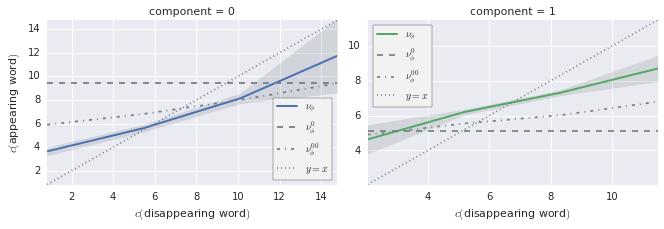

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1107 (cluster-unique) substitutions, but the PCA is in fact computed on 871 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering


    * global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 682 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.19047678424659464

intercept                      3.726962
global_aoa                     0.099202
global_clustering              0.030530
global_frequency               0.507443
global_letters_count          -0.008235
global_orthographic_density    0.060528
global_synonyms_count          0.029526
dtype: float64

Regressing global frequency with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.2069830506690662

intercept                                              5.432534
global_aoa                                            -0.004253
global_clustering                                      1.023872
global_frequency                                       0.396384
global_letters_count                                   0.244999
global_orthographic_density                            2.148272
global_synon

Regressing rel frequency with 682 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.3673232746824088

intercept                  -1.037386
rel_aoa                     0.084208
rel_clustering              0.080803
rel_frequency               0.676724
rel_letters_count          -0.044000
rel_orthographic_density   -0.072526
rel_synonyms_count         -0.000250
dtype: float64

Regressing rel frequency with 682 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.38294756429363525

intercept                                       -1.163849
rel_aoa                                          0.045675
rel_clustering                                   0.166338
rel_frequency                                    0.668117
rel_letters_count                                0.013722
rel_orthographic_density                        -0.288323
rel_synonyms_count                              -0.007402
rel_aoa * rel_clustering                        -0.051858
rel_aoa * rel_frequency             

Regressing global aoa with 635 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.21641069215510733

intercept                      4.806943
global_aoa                     0.401947
global_clustering              0.065190
global_frequency              -0.020297
global_letters_count           0.069150
global_orthographic_density   -0.132825
global_synonyms_count         -0.138163
dtype: float64

Regressing global aoa with 635 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.2437773102289419

intercept                                              8.895359
global_aoa                                             0.710912
global_clustering                                      0.271603
global_frequency                                      -0.215595
global_letters_count                                  -0.436149
global_orthographic_density                           -2.261495
global_synonyms_count                                 -3.402136
global_aoa * global_clustering             

Regressing rel aoa with 635 measures, with interactions
           ^^^^^^^
R^2 = 0.316313977277751

intercept                                        0.680226
rel_aoa                                          0.459187
rel_clustering                                  -0.166996
rel_frequency                                    0.076908
rel_letters_count                               -0.087764
rel_orthographic_density                         0.191656
rel_synonyms_count                               0.128068
rel_aoa * rel_clustering                         0.064564
rel_aoa * rel_frequency                         -0.016773
rel_aoa * rel_letters_count                     -0.006377
rel_aoa * rel_orthographic_density              -0.024868
rel_aoa * rel_synonyms_count                    -0.020501
rel_clustering * rel_frequency                  -0.079497
rel_clustering * rel_letters_count              -0.036186
rel_clustering * rel_orthographic_density       -0.083952
rel_clustering * rel_synonyms_

Regressing global clustering with 583 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2753754195501543

intercept                                             -2.257137
global_aoa                                             0.191561
global_clustering                                      0.083187
global_frequency                                      -0.584695
global_letters_count                                   0.074004
global_orthographic_density                            0.121794
global_synonyms_count                                 -0.915248
global_aoa * global_clustering                         0.059906
global_aoa * global_frequency                          0.003440
global_aoa * global_letters_count                      0.012512
global_aoa * global_orthographic_density               0.026621
global_aoa * global_synonyms_count                     0.011949
global_clustering * global_frequency                  -0.056900
global_clustering * global_letters_count       

Regressing global clustering with 583 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2322294165719666

intercept                     -1.724040
global_aoa                    -0.032974
global_clustering              0.477473
global_frequency              -0.090206
global_letters_count           0.003774
global_orthographic_density   -0.056538
global_synonyms_count         -0.028321
rel_aoa                        0.011249
rel_clustering                -0.005473
rel_frequency                  0.053941
rel_letters_count              0.007546
rel_orthographic_density       0.083112
rel_synonyms_count            -0.082183
dtype: float64

Regressing global clustering with 583 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.3668869102630491

intercept                                                 4.113247
global_aoa                                                0.296653
global_clustering                                         2.144053
global_frequency       

Regressing rel letters_count with 682 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.13636835261997182

intercept                      0.765714
global_aoa                    -0.043322
global_clustering              0.001756
global_frequency              -0.034820
global_letters_count           0.377041
global_orthographic_density    0.007295
global_synonyms_count         -0.446755
dtype: float64

Regressing rel letters_count with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.16020607240455953

intercept                                             -3.500622
global_aoa                                             0.473026
global_clustering                                     -1.581015
global_frequency                                       0.176153
global_letters_count                                  -0.192677
global_orthographic_density                           -1.193094
global_synonyms_count                                 -3.118193
global_aoa * g

Regressing global letters_count with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.3420154408638349

intercept                                                -15.267036
global_aoa                                                 2.345221
global_clustering                                         -4.479587
global_frequency                                           0.543772
global_letters_count                                      -0.829321
global_orthographic_density                               -4.439372
global_synonyms_count                                     -2.303207
rel_aoa                                                   -3.946052
rel_clustering                                             1.416346
rel_frequency                                             -0.139905
rel_letters_count                                          0.425174
rel_orthographic_density                                   1.930782
rel_synonyms_count                                       

Regressing rel synonyms_count with 665 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.14297244259508646

intercept                                              0.409640
global_aoa                                            -0.070374
global_clustering                                     -0.019696
global_frequency                                      -0.004353
global_letters_count                                   0.011344
global_orthographic_density                           -0.085409
global_synonyms_count                                  1.024466
global_aoa * global_clustering                        -0.000031
global_aoa * global_frequency                          0.000440
global_aoa * global_letters_count                      0.003494
global_aoa * global_orthographic_density               0.017974
global_aoa * global_synonyms_count                     0.009012
global_clustering * global_frequency                  -0.000105
global_clustering * global_letters_count    

Regressing global synonyms_count with 665 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2803640721528628

intercept                                                 8.599575
global_aoa                                               -0.354970
global_clustering                                         2.307858
global_frequency                                         -0.228971
global_letters_count                                      0.052331
global_orthographic_density                               0.293001
global_synonyms_count                                     5.301405
rel_aoa                                                  -0.257480
rel_clustering                                           -2.236507
rel_frequency                                            -0.121218
rel_letters_count                                        -0.347752
rel_orthographic_density                                 -0.617486
rel_synonyms_count                                       -5.365166


Regressing rel orthographic_density with 608 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2146347141842767

intercept                                              2.004563
global_aoa                                            -0.367828
global_clustering                                      0.054868
global_frequency                                      -0.059746
global_letters_count                                  -0.443433
global_orthographic_density                           -0.316275
global_synonyms_count                                 -0.293824
global_aoa * global_clustering                        -0.019282
global_aoa * global_frequency                         -0.000849
global_aoa * global_letters_count                      0.029164
global_aoa * global_orthographic_density               0.067641
global_aoa * global_synonyms_count                     0.017224
global_clustering * global_frequency                   0.009996
global_clustering * global_letter

Regressing global orthographic_density with 608 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.33683849794408127

intercept                                                 10.026141
global_aoa                                                -1.438427
global_clustering                                          0.876129
global_frequency                                           0.343193
global_letters_count                                      -0.562806
global_orthographic_density                               -1.455428
global_synonyms_count                                     -1.651990
rel_aoa                                                    0.364759
rel_clustering                                            -0.798210
rel_frequency                                             -0.182524
rel_letters_count                                          0.506819
rel_orthographic_density                                  -0.376436
rel_synonyms_count                        